# Телеком | Прогноз оттока клиентов

**Источник данных:** данные предоставлены заказчиком.

**Расположение данных:** база данных PostgreSQL.

**Характер данных:** персональные данные о некоторых клиентах, информация об их тарифах и услугах.

**Концепт исследования:** предупреждение оттока клиентов за счёт предложения промокодов и специальных условий всем, кто планирует отказаться от услуг связи. 

**Задача исследования:** построить модель, которая будет предсказывать, разорвёт ли абонент договор с оператором.

**Условия обучения модели:** метрика ROC-AUC > 0.85.

---

<h1>Содержание<span class="tocSkip"></span></h1>
<br>
<div class="toc">
    <ul class="toc-item">
        <li>
            <span>
                <a href="#1-Подготовка-данных">
                    <span class="toc-item-num">1&nbsp;&nbsp;</span>
                    Подготовка данных
                </a>
            </span>
            <ul class="toc-item">
                <li>
                    <span>
                        <a href="#1.1-Подготовка-окружения">
                            <span class="toc-item-num">1.1&nbsp;&nbsp;</span>
                            Подготовка окружения
                        </a>
                    </span>
                </li>
                <li>
                    <span>
                        <a href="#1.2-Проверка-данных">
                            <span class="toc-item-num">1.2&nbsp;&nbsp;</span>
                            Проверка данных
                        </a>
                    </span>
                </li>
                <li>
                    <span>
                        <a href="#1.3-Загрузка-данных">
                            <span class="toc-item-num">1.3&nbsp;&nbsp;</span>
                            Загрузка данных
                        </a>
                    </span>
                </li>
                <li>
                    <span>
                        <a href="#1.4-Анализ-и-обработка-данных">
                            <span class="toc-item-num">1.4&nbsp;&nbsp;</span>
                            Анализ и обработка данных
                        </a>
                    </span>
                    <ul class="toc-item" style="margin: 10px 0;">
                        <li>
                            <span>
                                <a href="#1.4.1-telecom.contract">
                                    <span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>
                                    telecom.contract
                                </a>
                            </span>
                        </li>
                        <li>
                            <span>
                                <a href="#1.4.2-telecom.personal">
                                    <span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>
                                    telecom.personal
                                </a>
                            </span>
                        </li>
                        <li>
                            <span>
                                <a href="#1.4.3-telecom.internet">
                                    <span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>
                                    telecom.internet
                                </a>
                            </span>
                        </li>
                        <li>
                            <span>
                                <a href="#1.4.4-telecom.phone">
                                    <span class="toc-item-num">1.4.4&nbsp;&nbsp;</span>
                                    telecom.phone
                                </a>
                            </span>
                        </li>
                    </ul>
                </li>
                <li>
                    <span>
                        <a href="#1.5-Объединение-таблиц">
                            <span class="toc-item-num">1.5&nbsp;&nbsp;</span>
                            Объединение таблиц
                        </a>
                    </span>
                </li>
                <li>
                    <span>
                        <a href="#1.6-Обработка-пропусков">
                            <span class="toc-item-num">1.6&nbsp;&nbsp;</span>
                            Обработка пропусков
                        </a>
                    </span>
                    <ul style="margin: 10px 0;">
                        <li>
                            <span>
                                <a href="#1.6.1-Столбец-total_charges">
                                    <span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>
                                    Столбец `total_charges`
                                </a>
                            </span>
                        </li>
                        <li>
                            <span>
                                <a href="#1.6.2-Столбец-has_multiple_lines">
                                    <span class="toc-item-num">1.6.2&nbsp;&nbsp;</span>
                                    Столбец `has_multiple_lines`
                                </a>
                            </span>
                        </li>
                        <li>
                            <span>
                                <a href="#1.6.3-Столбцы-с-дополнительными-услугами">
                                    <span class="toc-item-num">1.6.3&nbsp;&nbsp;</span>
                                    Столбцы с дополнительными услугами
                                </a>
                            </span>
                        </li>
                    </ul>
                </li>
                <li>
                    <span>
                        <a href="#1.7-Обработка-аномалий-и-выбросов">
                            <span class="toc-item-num">1.7&nbsp;&nbsp;</span>
                            Обработка аномалий и выбросов
                        </a>
                    </span>
                    <ul style="margin: 10px 0;">
                        <li>
                            <span>
                                <a href="#1.7.1-Столбец-monthly_charges">
                                    <span class="toc-item-num">1.7.1&nbsp;&nbsp;</span>
                                    Столбец `monthly_charges`
                                </a>
                            </span>
                        </li>
                        <li>
                            <span>
                                <a href="#1.7.2-Столбец-total_charges">
                                    <span class="toc-item-num">1.7.2&nbsp;&nbsp;</span>
                                    Столбец `total_charges`
                                </a>
                            </span>
                        </li>
                    </ul>
                </li>
                <li>
                    <span>
                        <a href="#1.8-Генерация-признаков">
                            <span class="toc-item-num">1.8&nbsp;&nbsp;</span>
                            Генерация признаков
                        </a>
                    </span>
                    <ul style="margin: 10px 0;">
                        <li>
                            <span>
                                <a href="#1.8.1-Тип-оказываемых-услуг">
                                    <span class="toc-item-num">1.8.1&nbsp;&nbsp;</span>
                                    Тип оказываемых услуг
                                </a>
                            </span>
                        </li>
                        <li>
                            <span>
                                <a href="#1.8.2-Целевой-признак">
                                    <span class="toc-item-num">1.8.2&nbsp;&nbsp;</span>
                                    Целевой признак
                                </a>
                            </span>
                        </li>
                        <li>
                            <span>
                                <a href="#1.8.3-Категории-выплат">
                                    <span class="toc-item-num">1.8.3&nbsp;&nbsp;</span>
                                    Категории выплат
                                </a>
                            </span>
                        </li>
                        <li>
                            <span>
                                <a href="#1.8.4-Длительность-контракта">
                                    <span class="toc-item-num">1.8.4&nbsp;&nbsp;</span>
                                    Длительность контракта
                                </a>
                            </span>
                        </li>
                        <li>
                            <span>
                                <a href="#1.8.5-Количество-дней-до-оплаты">
                                    <span class="toc-item-num">1.8.5&nbsp;&nbsp;</span>
                                    Количество дней до оплаты
                                </a>
                            </span>
                        </li>
                        <li>
                            <span>
                                <a href="#1.8.6-Удаление-лишних-столбцов">
                                    <span class="toc-item-num">1.8.6&nbsp;&nbsp;</span>
                                    Удаление лишних столбцов
                                </a>
                            </span>
                        </li>
                    </ul>
                </li>
            </ul>
        </li>
        <li>
            <span>
                <a href="#2-Исследовательский-анализ-данных">
                    <span class="toc-item-num">2&nbsp;&nbsp;</span>
                    Исследовательский анализ данных
                </a>
            </span>
            <ul class="toc-item">
                <li>
                    <span>
                        <a href="#2.1-Корреляционный-анализ">
                            <span class="toc-item-num">2.1&nbsp;&nbsp;</span>
                            Корреляционный анализ
                        </a>
                    </span>
                </li>
                <li>
                    <span>
                        <a href="#2.2-Оценка-важности-признаков">
                            <span class="toc-item-num">2.2&nbsp;&nbsp;</span>
                            Оценка важности признаков
                        </a>
                    </span>
                    <ul class="toc-item" style="margin: 10px 0;">
                        <li>
                            <span>
                                <a href="#2.2.1-Столбец-type">
                                    <span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>
                                    Столбец `type`
                                </a>
                            </span>
                        </li>
                        <li>
                            <span>
                                <a href="#2.2.2-Столбец-paperless_billing">
                                    <span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>
                                    Столбец `paperless_billing`
                                </a>
                            </span>
                        </li>
                        <li>
                            <span>
                                <a href="#2.2.3-Столбец-payment_method">
                                    <span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>
                                    Столбец `payment_method`
                                </a>
                            </span>
                        </li>
                        <li>
                            <span>
                                <a href="#2.2.4-Столбец-monthly_charges">
                                    <span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>
                                    Столбец `monthly_charges`
                                </a>
                            </span>
                        </li>
                        <li>
                            <span>
                                <a href="#2.2.5-Столбец-monthly_charges_group">
                                    <span class="toc-item-num">2.2.5&nbsp;&nbsp;</span>
                                    Столбец `monthly_charges_group`
                                </a>
                            </span>
                        </li>
                        <li>
                            <span>
                                <a href="#2.2.6-Столбец-total_charges">
                                    <span class="toc-item-num">2.2.6&nbsp;&nbsp;</span>
                                    Столбец `total_charges`
                                </a>
                            </span>
                        </li>
                        <li>
                            <span>
                                <a href="#2.2.7-Столбец-total_charges_group">
                                    <span class="toc-item-num">2.2.7&nbsp;&nbsp;</span>
                                    Столбец `total_charges_group`
                                </a>
                            </span>
                        </li>
                        <li>
                            <span>
                                <a href="#2.2.8-Столбец-is_male">
                                    <span class="toc-item-num">2.2.8&nbsp;&nbsp;</span>
                                    Столбец `is_male`
                                </a>
                            </span>
                        </li>
                        <li>
                            <span>
                                <a href="#2.2.9-Столбец-is_senior_citizen">
                                    <span class="toc-item-num">2.2.9&nbsp;&nbsp;</span>
                                    Столбец `is_senior_citizen`
                                </a>
                            </span>
                        </li>
                        <li>
                            <span>
                                <a href="#2.2.10-Столбец-is_married">
                                    <span class="toc-item-num">2.2.10&nbsp;&nbsp;</span>
                                    Столбец `is_married`
                                </a>
                            </span>
                        </li>
                        <li>
                            <span>
                                <a href="#2.2.11-Столбец-has_children">
                                    <span class="toc-item-num">2.2.11&nbsp;&nbsp;</span>
                                    Столбец `has_children`
                                </a>
                            </span>
                        </li>
                        <li>
                            <span>
                                <a href="#2.2.12-Столбец-internet_service">
                                    <span class="toc-item-num">2.2.12&nbsp;&nbsp;</span>
                                    Столбец `internet_service`
                                </a>
                            </span>
                        </li>
                        <li>
                            <span>
                                <a href="#2.2.13-Столбец-service">
                                    <span class="toc-item-num">2.2.13&nbsp;&nbsp;</span>
                                    Столбец `service`
                                </a>
                            </span>
                        </li>
                        <li>
                            <span>
                                <a href="#2.2.14-Столбец-has_online_security">
                                    <span class="toc-item-num">2.2.14&nbsp;&nbsp;</span>
                                    Столбец `has_online_security`
                                </a>
                            </span>
                        </li>
                        <li>
                            <span>
                                <a href="#2.2.15-Столбец-has_online_backup">
                                    <span class="toc-item-num">2.2.15&nbsp;&nbsp;</span>
                                    Столбец `has_online_backup`
                                </a>
                            </span>
                        </li>
                        <li>
                            <span>
                                <a href="#2.2.16-Столбец-has_device_protection">
                                    <span class="toc-item-num">2.2.16&nbsp;&nbsp;</span>
                                    Столбец `has_device_protection`
                                </a>
                            </span>
                        </li>
                        <li>
                            <span>
                                <a href="#2.2.17-Столбец-has_tech_support">
                                    <span class="toc-item-num">2.2.17&nbsp;&nbsp;</span>
                                    Столбец `has_tech_support`
                                </a>
                            </span>
                        </li>
                        <li>
                            <span>
                                <a href="#2.2.18-Столбец-has_streaming_tv">
                                    <span class="toc-item-num">2.2.18&nbsp;&nbsp;</span>
                                    Столбец `has_streaming_tv`
                                </a>
                            </span>
                        </li>
                        <li>
                            <span>
                                <a href="#2.2.19-Столбец-has_streaming_movies">
                                    <span class="toc-item-num">2.2.19&nbsp;&nbsp;</span>
                                    Столбец `has_streaming_movies`
                                </a>
                            </span>
                        </li>
                        <li>
                            <span>
                                <a href="#2.2.20-Столбец-has_multiple_lines">
                                    <span class="toc-item-num">2.2.20&nbsp;&nbsp;</span>
                                    Столбец `has_multiple_lines`
                                </a>
                            </span>
                        </li>
                        <li>
                            <span>
                                <a href="#2.2.21-Столбец-contract_duration_days">
                                    <span class="toc-item-num">2.2.21&nbsp;&nbsp;</span>
                                    Столбец `contract_duration_days`
                                </a>
                            </span>
                        </li>
                        <li>
                            <span>
                                <a href="#2.2.22-Столбец-contract_duration_months">
                                    <span class="toc-item-num">2.2.22&nbsp;&nbsp;</span>
                                    Столбец `contract_duration_months`
                                </a>
                            </span>
                        </li>
                        <li>
                            <span>
                                <a href="#2.2.23-Столбец-contract_duration_years">
                                    <span class="toc-item-num">2.2.23&nbsp;&nbsp;</span>
                                    Столбец `contract_duration_years`
                                </a>
                            </span>
                        </li>
                        <li>
                            <span>
                                <a href="#2.2.24-Столбец-days_until_payment_term">
                                    <span class="toc-item-num">2.2.24&nbsp;&nbsp;</span>
                                    Столбец `days_until_payment_term`
                                </a>
                            </span>
                        </li>
                    </ul>
                </li>
                <li>
                    <span>
                        <a href="#2.3-Отбор-признаков">
                            <span class="toc-item-num">2.3&nbsp;&nbsp;</span>
                             Отбор признаков
                        </a>
                    </span>
                </li>
            </ul>
        </li>
        <li style="margin-top: 10px;">
            <span>
                <a href="#3-Обучение-модели">
                    <span class="toc-item-num">3&nbsp;&nbsp;</span>
                    Обучение модели
                </a>
            </span>
            <ul class="toc-item">
                <li>
                    <span>
                        <a href="#3.1-Разделение-на-выборки">
                            <span class="toc-item-num">3.1&nbsp;&nbsp;</span>
                             Разделение на выборки
                        </a>
                    </span>
                </li>
                <li>
                    <span>
                        <a href="#3.2-Кодирование-данных">
                            <span class="toc-item-num">3.2&nbsp;&nbsp;</span>
                             Кодирование данных
                        </a>
                    </span>
                </li>
                <li>
                    <span>
                        <a href="#3.3-Подготовка-к-обучению">
                            <span class="toc-item-num">3.3&nbsp;&nbsp;</span>
                             Подготовка к обучению
                        </a>
                    </span>
                    <ul class="toc-item" style="margin: 10px 0;">
                        <li>
                            <span>
                                <a href="#3.3.1-Метрика">
                                    <span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>
                                    Метрика
                                </a>
                            </span>
                        </li>
                        <li>
                            <span>
                                <a href="#3.3.2-Модель">
                                    <span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>
                                    Модель
                                </a>
                            </span>
                        </li>
                        <li>
                            <span>
                                <a href="#3.3.3-Баланс-классов">
                                    <span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>
                                    Баланс классов
                                </a>
                            </span>
                        </li>
                    </ul>
                </li>
                <li>
                    <span>
                        <a href="#3.4-Построение-моделей">
                            <span class="toc-item-num">3.4&nbsp;&nbsp;</span>
                             Построение моделей
                        </a>
                    </span>
                    <ul class="toc-item" style="margin: 10px 0;">
                        <li>
                            <span>
                                <a href="#3.4.1-LogisticRegression">
                                    <span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>
                                    LogisticRegression
                                </a>
                            </span>
                        </li>
                        <li>
                            <span>
                                <a href="#3.4.2-DecisionTreeClassifier">
                                    <span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>
                                    DecisionTreeClassifier
                                </a>
                            </span>
                        </li>
                        <li>
                            <span>
                                <a href="#3.4.3-RandomForestClassifier">
                                    <span class="toc-item-num">3.4.3&nbsp;&nbsp;</span>
                                    RandomForestClassifier
                                </a>
                            </span>
                        </li>
                        <li>
                            <span>
                                <a href="#3.4.4-SVC">
                                    <span class="toc-item-num">3.4.4&nbsp;&nbsp;</span>
                                    SVC
                                </a>
                            </span>
                        </li>
                        <li>
                            <span>
                                <a href="#3.4.5-GaussianNB">
                                    <span class="toc-item-num">3.4.5&nbsp;&nbsp;</span>
                                    GaussianNB
                                </a>
                            </span>
                        </li>
                        <li>
                            <span>
                                <a href="#3.4.6-LGBMClassifier">
                                    <span class="toc-item-num">3.4.6&nbsp;&nbsp;</span>
                                    LGBMClassifier
                                </a>
                            </span>
                        </li>
                        <li>
                            <span>
                                <a href="#3.4.7-CatBoostClassifier">
                                    <span class="toc-item-num">3.4.7&nbsp;&nbsp;</span>
                                    CatBoostClassifier
                                </a>
                            </span>
                        </li>
                        <li>
                            <span>
                                <a href="#3.4.8-XGBClassifier">
                                    <span class="toc-item-num">3.4.8&nbsp;&nbsp;</span>
                                    XGBClassifier
                                </a>
                            </span>
                        </li>
                        <li>
                            <span>
                                <a href="#3.4.9-Нейронная-сеть">
                                    <span class="toc-item-num">3.4.9&nbsp;&nbsp;</span>
                                    Нейронная сеть
                                </a>
                            </span>
                        </li>
                    </ul>
                </li>
                <li>
                    <span>
                        <a href="#3.5-Выбор-модели">
                            <span class="toc-item-num">3.5&nbsp;&nbsp;</span>
                             Выбор модели
                        </a>
                    </span>
                </li>
            </ul>
        </li>
        <li style="margin-top:10px;">
            <span>
                <a href="#4-Тестирование-модели">
                    <span class="toc-item-num">4&nbsp;&nbsp;</span>
                    Тестирование модели
                </a>
            </span>
            <ul>
                <li>
                    <span>
                        <a href="#4.1-Получение-предсказаний">
                            <span class="toc-item-num">4.1&nbsp;&nbsp;</span>
                             Получение предсказаний
                        </a>
                    </span>
                </li>
                <li>
                    <span>
                        <a href="#4.2-Метрики">
                            <span class="toc-item-num">4.2&nbsp;&nbsp;</span>
                             Метрики
                        </a>
                    </span>
                </li>
                <li>
                    <span>
                        <a href="#4.3-Важность-признаков">
                            <span class="toc-item-num">4.3&nbsp;&nbsp;</span>
                             Важность признаков
                        </a>
                    </span>
                </li>
                <li>
                    <span>
                        <a href="#4.4-Вменяемость-модели">
                            <span class="toc-item-num">4.4&nbsp;&nbsp;</span>
                             Вменяемость модели
                        </a>
                    </span>
                </li>
            </ul>
        </li>
        <li style="margin-top:10px;">
            <span>
                <a href="#5-Общий-вывод">
                    <span class="toc-item-num">5&nbsp;&nbsp;</span>
                    Общий вывод
                </a>
            </span>
        </li>
    </ul>
</div>

<div style="background-color: blue; height: 2px; margin: 10px 0;"></div>

## 1 Подготовка данных

### 1.1 Подготовка окружения

Установка необходимых библиотек:

In [1]:
%%capture no-display
!pip install imbalanced-learn skorch lightgbm torcheval xgboost phik

In [2]:
%%capture no-display
!pip install --upgrade matplotlib==3.7.2

Импорт библиотек:

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns

from typing import List, Dict, Tuple

import warnings
import math
import re
import time
import datetime
import itertools

from sqlalchemy import create_engine
from sqlalchemy.engine.base import Engine

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# search
import imblearn
from imblearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, cross_val_predict, \
                                    RandomizedSearchCV, GridSearchCV

# over- and undersampling
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import EditedNearestNeighbours, AllKNN, \
                                    InstanceHardnessThreshold, NearMiss, \
                                    OneSidedSelection, RandomUnderSampler, TomekLinks

# neural network search
from skorch.classifier import NeuralNetClassifier
from skorch.dataset import ValidSplit
from skorch.callbacks import EpochScoring, EarlyStopping

# metrics
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, \
                            precision_recall_curve, PrecisionRecallDisplay

import phik
from phik.report import plot_correlation_matrix
from phik import report

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

# neural network
import torch
import torch.nn as nn

Игнорирование предупреждений:

In [4]:
warnings.filterwarnings('ignore')

Фиксирование случайных величин:

In [5]:
RANDOM_STATE = 270623

np.random.seed(RANDOM_STATE)
torch.manual_seed(RANDOM_STATE)
torch.use_deterministic_algorithms(True)

<div style="background-color: blue; opacity: 0.2; height: 2px; margin: 10px 0;"></div>

### 1.2 Проверка данных

Задание параметров подключения к базе данных:

In [6]:
db_config = {
    'user': 'praktikum_student', # имя пользователя,
    'pwd': 'Sdf4$2;d-d30pp', # пароль,
    'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
    'port': 6432, # порт подключения,
    'db': 'data-science-final' # название базы данных,
}

Задание строки соединения с базой данных:

In [7]:
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
)

Подключение к базе данных:

In [8]:
engine = create_engine(connection_string) 

---

Задание функции, выводящей результат запроса к базе данных:

In [9]:
def read_sql_query(query: str, engine: Engine = engine) -> pd.DataFrame:
    return pd.read_sql_query(query, con=engine)

---

#### 1.2.1 Уникальные идентификаторы абонентов

Создание запроса:

In [10]:
query = '''
SELECT COUNT(*) AS total_rows,
       COUNT(DISTINCT "customerID") AS total_customer_id
FROM telecom.contract;
'''

read_sql_query(query)

total_rows  total_customer_id
0        7043               7043

Создание запроса:

In [11]:
query = '''
SELECT COUNT(*) AS total_rows,
       COUNT(DISTINCT "customerID") AS total_customer_id
FROM telecom.personal;
'''

read_sql_query(query)

total_rows  total_customer_id
0        7043               7043

Создание запроса:

In [12]:
query = '''
SELECT COUNT(*) AS total_rows,
       COUNT(DISTINCT c1) AS total_customer_id
FROM telecom.internet;
'''

read_sql_query(query)

total_rows  total_customer_id
0        5518               5518

Создание запроса:

In [13]:
query = '''
SELECT COUNT(*) AS total_rows,
       COUNT(DISTINCT c1) AS total_customer_id
FROM telecom.phone;
'''

read_sql_query(query)

total_rows  total_customer_id
0        6362               6362

<div style="background-color: #296eaa10; border: 2px dashed #296eaa; border-radius: 5px; padding: 15px 30px">

**Вывод:**
    
* Все таблицы существуют.
* Во всех таблицах каждой записи соответствует уникальный идентификатор.

</div>

---

#### 1.2.2 Соотнесение идентификаторов абонентов

Создание запроса:

In [14]:
query = '''
SELECT COUNT(*) as total_rows,
       COUNT(DISTINCT c."customerID") AS contract_id,
       COUNT(DISTINCT p_l."customerID") AS personal_id,
       COUNT(DISTINCT i.c1) AS internet_id,
       COUNT(DISTINCT p_e.c1) AS phone_id
FROM telecom.contract AS c
FULL JOIN telecom.personal AS p_l ON c."customerID" = p_l."customerID"
FULL JOIN telecom.internet AS i ON c."customerID" = i.c1
FULL JOIN telecom.phone AS p_e ON c."customerID" = p_e.c1;
'''

read_sql_query(query)

total_rows  contract_id  personal_id  internet_id  phone_id
0        7045         7043         7043         5518      6362

>Необходимо:
>
>* Проверить соответствие уникальных идентификаторов в таблицах с договорами и персональными данными.
>* Проверить, входят ли идентификаторы в таблицах с интернет-услугами и телефонией в число идентификаторов в таблице с договорами.

Проверка идентификаторов в таблицах с договорами и персональными данными:

In [15]:
print('Уникальные значения столбца customerID в таблицах telecom.contract и telecom.personal',
      'совпадают' if set(read_sql_query(
          '''SELECT "customerID" FROM telecom.contract;'''
      )['customerID']) == set(read_sql_query(
          '''SELECT "customerID" FROM telecom.personal;'''
      )['customerID']) else 'НЕ совпадают',
)

Уникальные значения столбца customerID в таблицах telecom.contract и telecom.personal совпадают


<div style="background-color: #296eaa10; border: 2px dashed #296eaa; border-radius: 5px; padding: 15px 30px">

**Вывод:**
    
* На каждую запись договора приходится одна запись с персональными данными.
* Все таблицы связаны по ключу с идентификаторами абонентов.
* Общее число записей после объединения таблиц не соответствует количеству уникальных идентификаторов в таблице с договорами - необходимо определить происхождение двух избыточных записей.
* В таблицах с интернет-услугами и телефонией количество уникальных идентификаторов не соответствует количеству уникальных идентификаторов в таблице с договорами - необходимо проверить входят ли идентификаторы в этих таблицах в число идентификаторов в таблице с договорами.

</div>

---

#### 1.2.3 Названия столбцов

Создание запроса:

In [16]:
list(read_sql_query('''SELECT * FROM telecom.contract LIMIT 1''').columns)

['customerID',
 'BeginDate',
 'EndDate',
 'Type',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

Создание запроса:

In [17]:
list(read_sql_query('''SELECT * FROM telecom.personal LIMIT 1''').columns)

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents']

Создание запроса:

In [18]:
list(read_sql_query('''SELECT * FROM telecom.internet LIMIT 1''').iloc[0])

['customerID',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

Создание запроса:

In [19]:
list(read_sql_query('''SELECT * FROM telecom.phone LIMIT 1''').iloc[0])

['customerID', 'MultipleLines']

<div style="background-color: #296eaa10; border: 2px dashed #296eaa; border-radius: 5px; padding: 15px 30px">

**Вывод:**
    
* Названия столбцов соответствуют описанию.

</div>

<div style="background-color: blue; opacity: 0.2; height: 2px; margin: 10px 0;"></div>

### 1.3 Загрузка данных

Загрузка набора данных:

In [20]:
data_contract = read_sql_query('''SELECT * FROM telecom.contract;''')
data_personal = read_sql_query('''SELECT * FROM telecom.personal;''')
data_internet = read_sql_query('''SELECT * FROM telecom.internet;''') 
data_phone = read_sql_query('''SELECT * FROM telecom.phone;''') 

<div style="background-color: #296eaa10; border: 2px dashed #296eaa; border-radius: 5px; padding: 15px 30px">

**Вывод:**
    
* Данные были загружены.

</div>

<div style="background-color: blue; opacity: 0.2; height: 2px; margin: 10px 0;"></div>

### 1.4 Анализ и обработка данных

Задание функции, выводящей описание данных:

In [21]:
def describe_data(data: pd.DataFrame, drop_col: str = None) -> None:
    if drop_col is None:
        display(data.describe().T)
    else:
        display(data.describe().T.drop(drop_col, axis=1))

Задание функции, выводящей уникальные значения столбцов:

In [22]:
def print_unique(data: pd.DataFrame, columns: List[str]) -> None:
    for col_name in columns:
        print(col_name.upper())
        print(data[col_name].unique())
        print('\n---\n')

Задание функции, выводящей количественное распределение значений в столбцах:

In [23]:
def print_value_counts(data: pd.DataFrame, columns: List[str]) -> None:
    for col_name in columns:
        print(data[col_name].value_counts().sort_values(ascending=False))
        print('\n---\n')

Задание функции, разделяющий названия столбцов по прописным буквам с понижением регистра:

In [24]:
def split_column_name(columns: List[str]) -> List[str]:
    return ['_'.join(list(
                filter(None, re.split(r'([A-Z]+[a-z]*)', col_name))
            )).lower() for col_name in columns]

Задание функции, формирующей списки столбцов по их типам данных:

In [25]:
def get_columns(data: pd.DataFrame) -> Dict[str, List[str]]:
    column_names = {}
    
    for val in set(data.dtypes.values):
        column_names[str(val)] = list(data.select_dtypes([val]).columns)
    
    return column_names

Задание функции, выводящей распределение значений в переданных столбцах:

In [26]:
def plot_hist_box(data: pd.Series, n_bins: int = 50) -> None:
    font_s = 12
    
    fig = plt.figure(figsize=(16, 5))
    fig.suptitle(f'Распределение значений в столбце {data.name}\n', fontsize=font_s+4)
    
    gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])
    ax_hist = plt.subplot(gs[0])
    ax_box = plt.subplot(gs[1])
    
    sns.histplot(data, bins=n_bins, kde=True, ax=ax_hist)
    ax_hist.set_xlabel(data.name, fontsize=font_s)
    ax_hist.set_ylabel('frequency', fontsize=font_s)
    ax_hist.legend(['Ядерная оценка плотности', f'Распределение значений'])
    ax_hist.grid()
    
    ax_box.boxplot(data[~data.isna()])
    ax_box.set_ylabel(data.name, fontsize=font_s)
    ax_box.grid()

    plt.show()

---

#### 1.4.1 telecom.contract

Выведение на экран первых строк набора данных:

In [27]:
data_contract.head()

customerID   BeginDate     EndDate            Type PaperlessBilling  \
0  4472-LVYGI  2020-02-01        None        Two year              Yes   
1  3115-CZMZD  2020-02-01        None        Two year               No   
2  3668-QPYBK  2018-08-09  2019-12-01  Month-to-month              Yes   
3  5709-LVOEQ  2020-02-01        None        Two year               No   
4  9237-HQITU  2019-01-26  2019-11-01  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges  TotalCharges  
0  Bank transfer (automatic)           52.55           NaN  
1               Mailed check           20.25           NaN  
2               Mailed check           53.85        108.15  
3               Mailed check           80.85           NaN  
4           Electronic check           70.70        151.65

>Необходимо:
>
>* Изменить оформление названий столбцов.
>* Привести к нижнему регистру все строковые значения.

Выведение на экран краткого резюме данных:

In [28]:
data_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           1869 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7032 non-null   float64
dtypes: float64(2), object(6)
memory usage: 440.3+ KB


>Необходимо:
>
>* Изменить тип данных в столбцах `begin_date` и `end_date` на даты.
>* Проверить варианты значений в столбце `paperless_billing` и привести к логическому типу данных при наличии только двух значений.

Изменение оформления названий столбцов:

In [29]:
data_contract.columns = split_column_name(data_contract.columns)

Выведение на экран названий столбцов набора данных для проверки применённых изменений:

In [30]:
data_contract.columns

Index(['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges'],
      dtype='object')

Изменение типа данных столбцов набора данных:

In [31]:
for col_name in ['begin_date', 'end_date']:
    data_contract[col_name] = pd.to_datetime(data_contract[col_name])

Получение разделённых по типам данных названий столбцов:

In [32]:
data_contract_columns = get_columns(data_contract)

Выведение на экран разделённых по типам данных названий столбцов:

In [33]:
data_contract_columns

{'datetime64[ns]': ['begin_date', 'end_date'],
 'float64': ['monthly_charges', 'total_charges'],
 'object': ['customer_id', 'type', 'paperless_billing', 'payment_method']}

Приведение строковых значений к нижнему регистру:

In [34]:
data_contract[data_contract_columns['object']] = data_contract[data_contract_columns['object']].apply(
    lambda x: x.str.lower(), axis=1
)

Выведение на экран первых строк набора данных для проверки применённых изменений:

In [35]:
data_contract.head()

customer_id begin_date   end_date            type paperless_billing  \
0  4472-lvygi 2020-02-01        NaT        two year               yes   
1  3115-czmzd 2020-02-01        NaT        two year                no   
2  3668-qpybk 2018-08-09 2019-12-01  month-to-month               yes   
3  5709-lvoeq 2020-02-01        NaT        two year                no   
4  9237-hqitu 2019-01-26 2019-11-01  month-to-month               yes   

              payment_method  monthly_charges  total_charges  
0  bank transfer (automatic)            52.55            NaN  
1               mailed check            20.25            NaN  
2               mailed check            53.85         108.15  
3               mailed check            80.85            NaN  
4           electronic check            70.70         151.65

Выведение на экран количества пропущенных значений в столбцах набора данных:

In [36]:
data_contract.isna().sum()

customer_id             0
begin_date              0
end_date             5174
type                    0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges          11
dtype: int64

>Необходимо:
>
>* Проверить, не превышают ли даты начала действия договора даты окончания.
>* Установить характер происхождения пропущенных значений в столбце `total_charges`.

Выведение на экран описания нечисловых признаков:

In [37]:
describe_data(data_contract[data_contract_columns['object']], drop_col='top')

count unique  freq
customer_id        7043   7043     1
type               7043      3  3875
paperless_billing  7043      2  4171
payment_method     7043      4  2365

>В столбце `paperless_billing` всего два значения.

Выведение на экран уникальных значений в столбцах набора данных:

In [38]:
print_unique(data_contract, data_contract_columns['object'][1:])

TYPE
['two year' 'month-to-month' 'one year']

---

PAPERLESS_BILLING
['yes' 'no']

---

PAYMENT_METHOD
['bank transfer (automatic)' 'mailed check' 'electronic check'
 'credit card (automatic)']

---



>В столбце `paperless_billing` только два значения, которые можно привести к логическому типу данных.

Выведение на экран описания числовых признаков:

In [39]:
describe_data(data_contract[data_contract_columns['float64']])

count         mean          std    min     25%       50%  \
monthly_charges  7043.0    64.761692    30.090047  18.25   35.50    70.350   
total_charges    7032.0  2283.300441  2266.771362  18.80  401.45  1397.475   

                       75%      max  
monthly_charges    89.8500   118.75  
total_charges    3794.7375  8684.80

>Минимальные значения в столбцах `monthly_charges` и `total_charges` соответствуют.

>Необходимо:
>
>* Проверить значения столбцов на наличие аномалий или выбросов.

<div style="background-color: #296eaa10; border: 2px dashed #296eaa; border-radius: 5px; padding: 15px 30px">

**Вывод:**
    
* Таблицы были приведены к корректному оформлению.
* Строковые значения столбцов были приведены к нижнему регистру.

</div>

---

**Столбцы `paperless_billing`, `begin_date`, `end_date`**

Приведение значений столбца к логическому типу:

In [40]:
data_contract['paperless_billing'] = data_contract['paperless_billing'].apply(
    lambda x: 1 if x == 'yes' else 0
)

Выведение на экран краткого резюме данных для проверки применённых изменений:

In [41]:
data_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           1869 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   int64         
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7032 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(3)
memory usage: 440.3+ KB


Обновление разделения названий столбцов по типам данных:

In [42]:
data_contract_columns = get_columns(data_contract)

Выведение на экран количественного распределения значений в столбцах набора данных:

In [43]:
print_value_counts(data_contract, data_contract.columns[1:])

begin_date
2019-03-24    43
2019-03-13    43
2019-04-03    41
2019-04-08    41
2019-03-09    41
              ..
2018-06-23     1
2018-07-15     1
2018-06-08     1
2018-08-14     1
2019-10-12     1
Name: count, Length: 515, dtype: int64

---

end_date
2019-11-01    485
2019-12-01    466
2020-01-01    460
2019-10-01    458
Name: count, dtype: int64

---

type
month-to-month    3875
two year          1695
one year          1473
Name: count, dtype: int64

---

paperless_billing
1    4171
0    2872
Name: count, dtype: int64

---

payment_method
electronic check             2365
mailed check                 1612
bank transfer (automatic)    1544
credit card (automatic)      1522
Name: count, dtype: int64

---

monthly_charges
20.05     61
19.85     45
19.90     44
19.95     44
20.00     43
          ..
68.10      1
115.25     1
109.00     1
93.75      1
78.70      1
Name: count, Length: 1585, dtype: int64

---

total_charges
20.20      11
19.75       9
19.65       8
19.90       8
20.05     

Выведение на экран пяти минимальных промежутков между датами заключения договора и его расторжения:

In [44]:
data_contract.query('~end_date.isna()').apply(
    lambda x: x['end_date'] - x['begin_date'], axis=1
).sort_values()[:5]

1713   42 days
954    42 days
1540   54 days
118    62 days
1285   67 days
dtype: timedelta64[ns]

>Даты заключения договора не превышают дат его окончания.

Выведение на экран последней даты в наборе данных:

In [45]:
print('Последняя дата begin_date:', data_contract['begin_date'].max())
print('Последняя дата end_date:', data_contract['end_date'].max())

Последняя дата begin_date: 2020-02-01 00:00:00
Последняя дата end_date: 2020-01-01 00:00:00


>Последняя дата соответствует описанию данных.

<div style="background-color: #296eaa10; border: 2px dashed #296eaa; border-radius: 5px; padding: 15px 30px">

**Вывод:**
    
* Даты составлены корректно.
* Значения столбца с электронным расчётным листом приведены к логическому типу данных.

</div>

---

**Столбец `monthly_charges`**

Выведение на экран графика распределения значений в столбце набора данных:

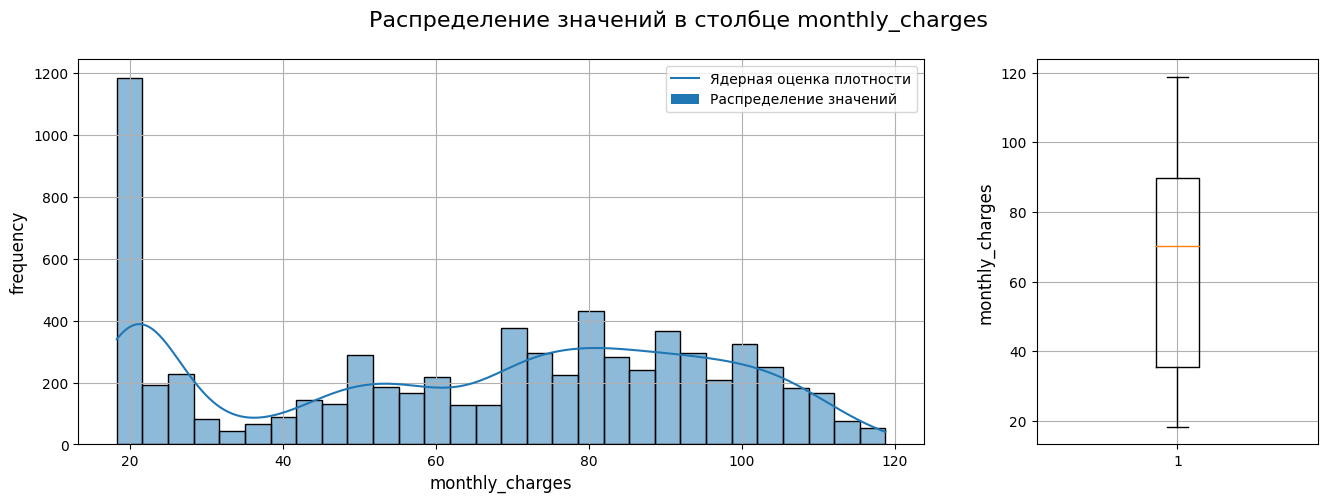

In [46]:
plot_hist_box(data_contract['monthly_charges'], n_bins=30)

>Распределение значений смещено влево, однако превышает недостоверный минимум, а поскольку в описании данных информации о нормах не предоставлено, до объединения таблиц значения меньше 35 нельзя считать выбросами.

>Необходимо:
>
>* Проверить наличие зависимостей между выплатами за месяц и подключенными услугами.

<div style="background-color: #296eaa10; border: 2px dashed #296eaa; border-radius: 5px; padding: 15px 30px">

**Вывод:**
    
* Распределение значений имеет смещение, которое необходимо проверить при объединении таблиц.

</div>

---

**Столбец `total_charges`**

Выведение на экран количества разорванных договоров с пропущенными значениями в столбце с общими расходами:

In [47]:
print('Всего разорванных договоров:', len(data_contract.query('~end_date.isna()')))
print('Из них пропущенных значений в столбце c общими расходами абонента:', 
      data_contract.query('~end_date.isna()')['total_charges'].isna().sum())

Всего разорванных договоров: 1869
Из них пропущенных значений в столбце c общими расходами абонента: 0


>Для всех разорванных договоров заполнены все значения общих расходов за всё время действия договора.

Выведение на экран количества неразорванных договоров с пропущенными значениями в столбце с общими расходами:

In [48]:
print('Всего НЕразорванных договоров:', len(data_contract.query('end_date.isna()')))
print('Из них пропущенных значений в столбце c общими расходами абонента:', 
      len(data_contract.query('end_date.isna() and total_charges.isna()')))

Всего НЕразорванных договоров: 5174
Из них пропущенных значений в столбце c общими расходами абонента: 11


>Среди неразорванных договоров присутствуют пропуски в столбце с общими расходами, которые можно удалить после объединения таблиц, поскольку их доля относительно всего набора данных незначительна.

Выведение на экран графика распределения значений в столбце набора данных:

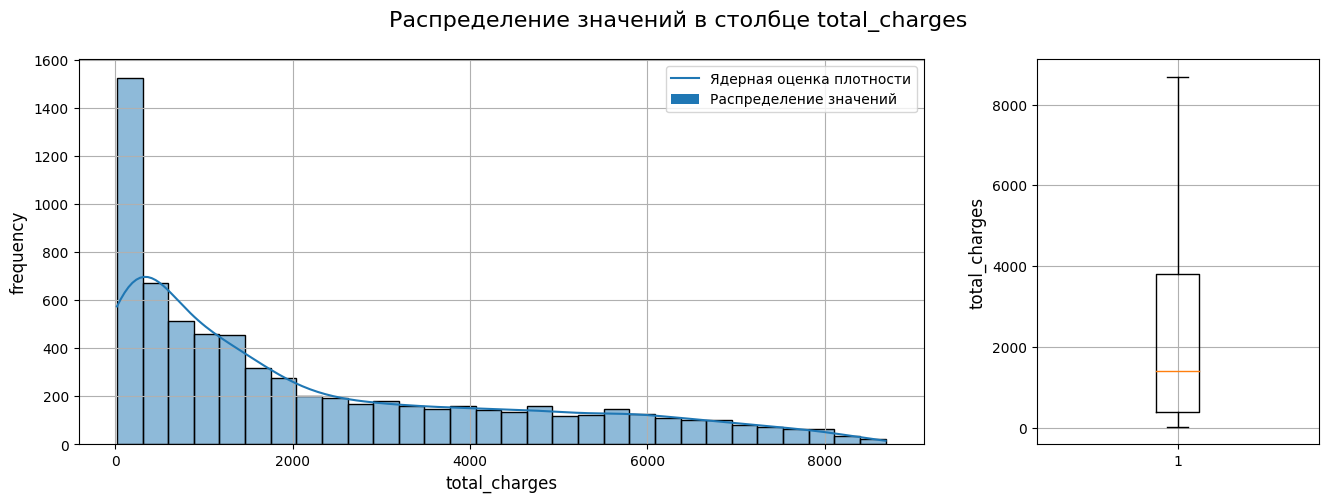

In [49]:
plot_hist_box(data_contract['total_charges'], n_bins=30)

>Распределение значений смещено влево, однако поскольку в описании данных информации о нормах не предоставлено, до объединения таблиц значения меньше 35 нельзя считать выбросами.

>Необходимо:
>
>* Убедиться, что значения в столбце с ежемесячными тратами не превышают значений в столбце с общими тратами.

Выведение на экран общего числа общих расходов, которые меньше ежемесячных расходов:

In [50]:
print('Всего несоответствий общих расходов ежемесячным расходам:',
      data_contract.apply(
         lambda x: x['total_charges'] - x['monthly_charges'] < 0, axis=1
      ).sum()
)

Всего несоответствий общих расходов ежемесячным расходам: 0


>Ежемесячные расходы не превышают общих расходов.

<div style="background-color: #296eaa10; border: 2px dashed #296eaa; border-radius: 5px; padding: 15px 30px">

**Вывод:**
    
* Распределение значений имеет смещение, которое необходимо проверить при объединении таблиц.
* Были заполнены пропущенные значения в столбце с общими расходами.
* Общие расходы составлены корректно относительно ежемесячных расходов.

</div>

---

**Столбец `type`**

Выведение на экран сводной таблицы по типам оплаты:

In [51]:
data_contract[['type', 'monthly_charges', 'total_charges']] \
    .pivot_table(values=['monthly_charges', 'total_charges'],
                 index='type', 
                 aggfunc=['count', 'sum'])

count                           sum              
               monthly_charges total_charges monthly_charges total_charges
type                                                                      
month-to-month            3875          3875       257294.15     5305861.5
one year                  1473          1472        95816.60     4467053.5
two year                  1695          1685       103005.85     6283253.7

>Больше всего абонентов предпочитают помесячную оплату, но больше всего прибыли приносит оплата за два года, а меньше - оплата за год.

---

**Столбец `payment_method`**

Выведение на экран сводной таблицы по типам оплаты:

In [52]:
data_contract[['customer_id', 'paperless_billing', 'payment_method']] \
    .pivot_table(columns='payment_method',
                 values='customer_id',
                 index='paperless_billing', 
                 aggfunc='count')

payment_method     bank transfer (automatic)  credit card (automatic)  \
paperless_billing                                                       
0                                        653                      640   
1                                        891                      882   

payment_method     electronic check  mailed check  
paperless_billing                                  
0                               623           956  
1                              1742           656

>Тип платежа в целом не зависит от электронного расчётного листа.

---

#### 1.4.2 telecom.personal

Выведение на экран первых строк набора данных:

In [53]:
data_personal.head()

customerID  gender  SeniorCitizen Partner Dependents
0  7590-VHVEG  Female              0     Yes         No
1  5575-GNVDE    Male              0      No         No
2  3668-QPYBK    Male              0      No         No
3  7795-CFOCW    Male              0      No         No
4  9237-HQITU  Female              0      No         No

>Необходимо:
>
>* Изменить оформление названий столбцов.
>* Привести все строковые значения к нижнему регистру.

Изменение оформления названий столбцов:

In [54]:
data_personal.columns = split_column_name(data_personal.columns)

Выведение на экран названий столбцов набора данных для проверки применённых изменений:

In [55]:
data_personal.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents'], dtype='object')

Получение разделённых по типам данных названий столбцов:

In [56]:
data_personal_columns = get_columns(data_personal)

Выведение на экран разделённых по типам данных названий столбцов:

In [57]:
data_personal_columns

{'int64': ['senior_citizen'],
 'object': ['customer_id', 'gender', 'partner', 'dependents']}

Приведение строковых значений к нижнему регистру:

In [58]:
data_personal[data_personal_columns['object']] = data_personal[data_personal_columns['object']].apply(
    lambda x: x.str.lower(), axis=1
)

Выведение на экран первых строк набора данных для проверки применённых изменений:

In [59]:
data_personal.head()

customer_id  gender  senior_citizen partner dependents
0  7590-vhveg  female               0     yes         no
1  5575-gnvde    male               0      no         no
2  3668-qpybk    male               0      no         no
3  7795-cfocw    male               0      no         no
4  9237-hqitu  female               0      no         no

Выведение на экран краткого резюме данных:

In [60]:
data_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     7043 non-null   object
 1   gender          7043 non-null   object
 2   senior_citizen  7043 non-null   int64 
 3   partner         7043 non-null   object
 4   dependents      7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


>Необходимо:
>
>* Проверить варианты значений в столбцах `gender`, `partner`, `dependents` и привести к логическому типу данных при наличии только двух значений.
>* Переименовать эти столбцы так, чтобы названия более точно указывали на их значения.

Выведение на экран количества пропущенных значений в столбцах набора данных:

In [61]:
data_personal.isna().sum()

customer_id       0
gender            0
senior_citizen    0
partner           0
dependents        0
dtype: int64

>В наборе данных нет пропущенных значений.

Выведение на экран описания нечисловых признаков:

In [62]:
describe_data(data_personal[data_personal_columns['object']], drop_col='top')

count unique  freq
customer_id  7043   7043     1
gender       7043      2  3555
partner      7043      2  3641
dependents   7043      2  4933

>В стобцах `gender`, `partner`, `dependents` всего два значения.

Выведение на экран уникальных значений в столбцах набора данных:

In [63]:
print_unique(data_personal, data_personal.columns[1:])

GENDER
['female' 'male']

---

SENIOR_CITIZEN
[0 1]

---

PARTNER
['yes' 'no']

---

DEPENDENTS
['no' 'yes']

---



>В стобцах `gender`, `partner`, `dependents` только два значения, которые можно привести к логическому типу данных.

<div style="background-color: #296eaa10; border: 2px dashed #296eaa; border-radius: 5px; padding: 15px 30px">

**Вывод:**
    
* Таблицы были приведены к корректному оформлению.
* Строковые значения столбцов были приведены к нижнему регистру.

</div>

---

**Столбцы `gender`, `partner`, `dependents`**

Приведение значений столбца к логическому типу:

In [64]:
data_personal['gender'] = data_personal['gender'].apply(
    lambda x: 1 if x == 'male' else 0
)

Приведение значений столбцов к логическому типу:

In [65]:
for col_name in data_personal_columns['object'][2:]:
    data_personal[col_name] = data_personal[col_name].apply(
        lambda x: 1 if x == 'yes' else 0
    )

Выведение на экран краткого резюме данных для проверки применённых изменений:

In [66]:
data_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     7043 non-null   object
 1   gender          7043 non-null   int64 
 2   senior_citizen  7043 non-null   int64 
 3   partner         7043 non-null   int64 
 4   dependents      7043 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 275.2+ KB


Обновление разделения названий столбцов по типам данных:

In [67]:
data_personal_columns = get_columns(data_personal)

Выведение на экран количественного распределения значений в столбцах набора данных:

In [68]:
print_value_counts(data_personal, data_personal.columns[1:])

gender
1    3555
0    3488
Name: count, dtype: int64

---

senior_citizen
0    5901
1    1142
Name: count, dtype: int64

---

partner
0    3641
1    3402
Name: count, dtype: int64

---

dependents
0    4933
1    2110
Name: count, dtype: int64

---



>Распределение значений в столбцах разнится.

Изменение названий столбцов:

In [69]:
data_personal.columns = [data_personal.columns[0], 'is_male', 'is_senior_citizen', 'is_married', 'has_children']

Выведение на экран названий столбцов набора данных для проверки применённых изменений:

In [70]:
data_personal.columns

Index(['customer_id', 'is_male', 'is_senior_citizen', 'is_married',
       'has_children'],
      dtype='object')

Выведение на экран сводной таблицы по полу абонента:

In [71]:
data_personal.pivot_table(
    values='customer_id',
    index=list(data_personal.columns[1:]),
    aggfunc='count'
)

customer_id
is_male is_senior_citizen is_married has_children             
0       0                 0          0                    1338
                                     1                     142
                          1          0                     596
                                     1                     844
        1                 0          0                     317
                                     1                       3
                          1          0                     209
                                     1                      39
1       0                 0          0                    1381
                                     1                     211
                          1          0                     567
                                     1                     822
        1                 0          0                     244
                                     1                       5
                          1          0                     281
                                     1                      44

>Подавляющее большинство абонентов - это женщины и мужчины непенсионного возраста, не состоящие в браке и не имеющие детей.
>
>Меньшинство абонентов - это женщины и мужчины пенсионного возраста как в браке, так и нет, но имеющие детей.

<div style="background-color: #296eaa10; border: 2px dashed #296eaa; border-radius: 5px; padding: 15px 30px">

**Вывод:**
    
* Значения столбцов с полом, семейным положением и наличием детей у абонентов были приведены к логическому типу данных.

</div>

---

#### 1.4.3 telecom.internet

Выведение на экран первых строк набора данных:

In [72]:
data_internet.head()

c1               c2              c3            c4  \
0  customerID  InternetService  OnlineSecurity  OnlineBackup   
1  7590-VHVEG              DSL              No           Yes   
2  5575-GNVDE              DSL             Yes            No   
3  3668-QPYBK              DSL             Yes           Yes   
4  7795-CFOCW              DSL             Yes            No   

                 c5           c6           c7               c8  
0  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  
1                No           No           No               No  
2               Yes           No           No               No  
3                No           No           No               No  
4               Yes          Yes           No               No

>Необходимо:
>
>* Определить первую строку набора данных в качестве названий столбцов.
>* Изменить оформление названий столбцов.
>* Привести все строковые значения к нижнему регистру.
>* Проверить варианты значений в столбцах `OnlineSecurity`, `OnlineSecurity`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies` и привести к логическому типу данных при наличии только двух значений.

Задание первой строки набора данных в качестве названий столбцов:

In [73]:
data_internet.columns = data_internet.iloc[0]

Удаление первой строки набора данных с названиями столбцов:

In [74]:
data_internet = data_internet.drop(0, axis=0).reset_index(drop=True)

Выведение на экран первых строк набора данных для проверки применённых изменений:

In [75]:
data_internet.head()

0  customerID InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0  7590-VHVEG             DSL             No          Yes               No   
1  5575-GNVDE             DSL            Yes           No              Yes   
2  3668-QPYBK             DSL            Yes          Yes               No   
3  7795-CFOCW             DSL            Yes           No              Yes   
4  9237-HQITU     Fiber optic             No           No               No   

0 TechSupport StreamingTV StreamingMovies  
0          No          No              No  
1          No          No              No  
2          No          No              No  
3         Yes          No              No  
4          No          No              No

Изменение оформления названий столбцов:

In [76]:
data_internet.columns = split_column_name(data_internet.columns)

Выведение на экран названий столбцов набора данных для проверки применённых изменений:

In [77]:
data_internet.columns

Index(['customer_id', 'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies'],
      dtype='object')

Приведение строковых значений к нижнему регистру:

In [78]:
data_internet = data_internet.apply(lambda x: x.str.lower(), axis=1)

Выведение на экран первых строк набора данных для проверки применённых изменений:

In [79]:
data_internet.head()

customer_id internet_service online_security online_backup  \
0  7590-vhveg              dsl              no           yes   
1  5575-gnvde              dsl             yes            no   
2  3668-qpybk              dsl             yes           yes   
3  7795-cfocw              dsl             yes            no   
4  9237-hqitu      fiber optic              no            no   

  device_protection tech_support streaming_tv streaming_movies  
0                no           no           no               no  
1               yes           no           no               no  
2                no           no           no               no  
3               yes          yes           no               no  
4                no           no           no               no

Выведение на экран краткого резюме данных:

In [80]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        5517 non-null   object
 1   internet_service   5517 non-null   object
 2   online_security    5517 non-null   object
 3   online_backup      5517 non-null   object
 4   device_protection  5517 non-null   object
 5   tech_support       5517 non-null   object
 6   streaming_tv       5517 non-null   object
 7   streaming_movies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


Выведение на экран количества пропущенных значений в столбцах набора данных:

In [81]:
data_internet.isna().sum()

customer_id          0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
dtype: int64

>В наборе данных нет пропущенных значений.

Выведение на экран описания нечисловых признаков:

In [82]:
describe_data(data_internet, drop_col='top')

count unique  freq
customer_id        5517   5517     1
internet_service   5517      2  3096
online_security    5517      2  3498
online_backup      5517      2  3088
device_protection  5517      2  3095
tech_support       5517      2  3473
streaming_tv       5517      2  2810
streaming_movies   5517      2  2785

>В столбцах `online_security`, `online_backup`, `device_protection`, `tech_support`, `streaming_tv`, `streaming_movies` всего два значения.

Выведение на экран уникальных значений в столбцах набора данных:

In [83]:
print_unique(data_internet, data_internet.columns[1:])

INTERNET_SERVICE
['dsl' 'fiber optic']

---

ONLINE_SECURITY
['no' 'yes']

---

ONLINE_BACKUP
['yes' 'no']

---

DEVICE_PROTECTION
['no' 'yes']

---

TECH_SUPPORT
['no' 'yes']

---

STREAMING_TV
['no' 'yes']

---

STREAMING_MOVIES
['no' 'yes']

---



>В столбцах `online_security`, `online_backup`, `device_protection`, `tech_support`, `streaming_tv`, `streaming_movies` всего два значения, которые можно привести к логическому типу данных.

<div style="background-color: #296eaa10; border: 2px dashed #296eaa; border-radius: 5px; padding: 15px 30px">

**Вывод:**
    
* Таблицы были приведены к корректному оформлению.
* Строковые значения столбцов были приведены к нижнему регистру.

</div>

---

**Столбцы `online_security`, `online_backup`, `device_protection`, `tech_support`, `streaming_tv`, `streaming_movies`**

Приведение значений столбцов к логическому типу:

In [84]:
for col_name in data_internet.columns[2:]:
    data_internet[col_name] = data_internet[col_name].apply(
        lambda x: 1 if x == 'yes' else 0
    )

Выведение на экран количественного распределения значений в столбцах набора данных:

In [85]:
print_value_counts(data_internet, data_internet.columns[2:])

online_security
0    3498
1    2019
Name: count, dtype: int64

---

online_backup
0    3088
1    2429
Name: count, dtype: int64

---

device_protection
0    3095
1    2422
Name: count, dtype: int64

---

tech_support
0    3473
1    2044
Name: count, dtype: int64

---

streaming_tv
0    2810
1    2707
Name: count, dtype: int64

---

streaming_movies
0    2785
1    2732
Name: count, dtype: int64

---



>В целом, распределение значений в столбцах с услугами примерно одинаковое.

Изменение названий столбцов:

In [86]:
data_internet.columns = [*list(data_internet.columns[:2]), 
                         *['has_' + col_name for col_name in data_internet.columns[2:]]]

Выведение на экран названий столбцов набора данных для проверки применённых изменений:

In [87]:
data_internet.columns

Index(['customer_id', 'internet_service', 'has_online_security',
       'has_online_backup', 'has_device_protection', 'has_tech_support',
       'has_streaming_tv', 'has_streaming_movies'],
      dtype='object')

<div style="background-color: #296eaa10; border: 2px dashed #296eaa; border-radius: 5px; padding: 15px 30px">

**Вывод:**
    
* Значения столбцов с блокировкой опасных сайтов, облачным хранилищем, антивирусом, линией техподдержки, стриминговым телевидением и каталогом фильмов были приведены к логическому типу данных.

</div>

---

#### 1.4.4 telecom.phone

Выведение на экран первых строк набора данных:

In [88]:
data_phone.head()

c1             c2
0  customerID  MultipleLines
1  5575-GNVDE             No
2  3668-QPYBK             No
3  9237-HQITU             No
4  9305-CDSKC            Yes

>Необходимо:
>
>* Определить первую строку набора данных в качестве названий столбцов.
>* Изменить оформление названий столбцов.
>* Привести все строковые значения к нижнему регистру.
>* Проверить варианты значений в столбце `MultipleLines` и привести к логическому типу данных при наличии только двух значений.

Задание первой строки набора данных в качестве названий столбцов:

In [89]:
data_phone.columns = data_phone.iloc[0]

Удаление первой строки набора данных с названиями столбцов:

In [90]:
data_phone = data_phone.drop(0, axis=0).reset_index(drop=True)

Выведение на экран первых строк набора данных для проверки применённых изменений:

In [91]:
data_phone.head()

0  customerID MultipleLines
0  5575-GNVDE            No
1  3668-QPYBK            No
2  9237-HQITU            No
3  9305-CDSKC           Yes
4  1452-KIOVK           Yes

Изменение оформления названий столбцов:

In [92]:
data_phone.columns = split_column_name(data_phone.columns)

Выведение на экран названий столбцов набора данных для проверки применённых изменений:

In [93]:
data_phone.columns

Index(['customer_id', 'multiple_lines'], dtype='object')

Приведение строковых значений к нижнему регистру:

In [94]:
data_phone = data_phone.apply(lambda x: x.str.lower())

Выведение на экран первых строк набора данных для проверки применённых изменений:

In [95]:
data_phone.head()

customer_id multiple_lines
0  5575-gnvde             no
1  3668-qpybk             no
2  9237-hqitu             no
3  9305-cdskc            yes
4  1452-kiovk            yes

Выведение на экран краткого резюме данных:

In [96]:
data_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     6361 non-null   object
 1   multiple_lines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


Выведение на экран количества пропущенных значений в столбцах набора данных:

In [97]:
data_phone.isna().sum()

customer_id       0
multiple_lines    0
dtype: int64

>В наборе данных нет пропущенных значений.

Выведение на экран описания нечисловых признаков:

In [98]:
describe_data(data_phone, drop_col='top')

count unique  freq
customer_id     6361   6361     1
multiple_lines  6361      2  3390

>В стобце `multiple_lines` всего два значения.

Выведение на экран уникальных значений в столбцах набора данных:

In [99]:
print_unique(data_phone, data_phone.columns[1:])

MULTIPLE_LINES
['no' 'yes']

---



>В стобце `multiple_lines` всего два значения, которые можно привести к логческому типу данных.

<div style="background-color: #296eaa10; border: 2px dashed #296eaa; border-radius: 5px; padding: 15px 30px">

**Вывод:**
    
* Таблицы были приведены к корректному оформлению.
* Строковые значения столбцов были приведены к нижнему регистру.

</div>

---

**Столбец `multiple_lines`**

Приведение значений столбца к логическому типу:

In [100]:
data_phone['multiple_lines'] = data_phone['multiple_lines'].apply(
    lambda x: 1 if x == 'yes' else 0
)

Выведение на экран количественного распределения значений в столбцах набора данных:

In [101]:
print_value_counts(data_phone, data_phone.columns[1:])

multiple_lines
0    3390
1    2971
Name: count, dtype: int64

---



>В целом, распределение значений в столбце с наличием подключеня телефона к нескольким линиям одновременно примерно одинаковое.

Изменение названий столбцов:

In [102]:
data_phone.columns = [data_phone.columns[0], 'has_multiple_lines']

Выведение на экран названий столбцов набора данных для проверки применённых изменений:

In [103]:
data_phone.columns

Index(['customer_id', 'has_multiple_lines'], dtype='object')

<div style="background-color: #296eaa10; border: 2px dashed #296eaa; border-radius: 5px; padding: 15px 30px">

**Вывод:**
    
* Значения столбца с наличием подключения телефона к нескольким линиям одновременно были приведены к логическому типу данных.

</div>

<div style="background-color: blue; opacity: 0.2; height: 2px; margin: 10px 0;"></div>

### 1.5 Объединение таблиц

Объединение таблиц:

In [104]:
data = data_contract.merge(data_personal, on='customer_id', how='outer') \
                    .merge(data_internet, on='customer_id', how='outer') \
                    .merge(data_phone, on='customer_id', how='outer')

Выведение на экран первых строк набора данных:

In [105]:
data.head()

customer_id begin_date   end_date            type  paperless_billing  \
0  4472-lvygi 2020-02-01        NaT        two year                  1   
1  3115-czmzd 2020-02-01        NaT        two year                  0   
2  3668-qpybk 2018-08-09 2019-12-01  month-to-month                  1   
3  5709-lvoeq 2020-02-01        NaT        two year                  0   
4  9237-hqitu 2019-01-26 2019-11-01  month-to-month                  1   

              payment_method  monthly_charges  total_charges  is_male  \
0  bank transfer (automatic)            52.55            NaN        0   
1               mailed check            20.25            NaN        1   
2               mailed check            53.85         108.15        1   
3               mailed check            80.85            NaN        0   
4           electronic check            70.70         151.65        0   

   is_senior_citizen  is_married  has_children internet_service  \
0                  0           1             1              dsl   
1                  0           0             1              NaN   
2                  0           0             0              dsl   
3                  0           1             1              dsl   
4                  0           0             0      fiber optic   

   has_online_security  has_online_backup  has_device_protection  \
0                  1.0                0.0                    1.0   
1                  NaN                NaN                    NaN   
2                  1.0                1.0                    0.0   
3                  1.0                1.0                    1.0   
4                  0.0                0.0                    0.0   

   has_tech_support  has_streaming_tv  has_streaming_movies  \
0               1.0               1.0                   0.0   
1               NaN               NaN                   NaN   
2               0.0               0.0                   0.0   
3               0.0               1.0                   1.0   
4               0.0               0.0                   0.0   

   has_multiple_lines  
0                 NaN  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

Выведение на экран размерности набора данных:

In [106]:
print('Размерность набора данных:', data.shape)

Размерность набора данных: (7043, 20)


Получение разделённых по типам данных названий столбцов:

In [107]:
data_columns = get_columns(data)

Выведение на экран разделённых по типам данных названий столбцов:

In [108]:
data_columns

{'datetime64[ns]': ['begin_date', 'end_date'],
 'int64': ['paperless_billing',
  'is_male',
  'is_senior_citizen',
  'is_married',
  'has_children'],
 'float64': ['monthly_charges',
  'total_charges',
  'has_online_security',
  'has_online_backup',
  'has_device_protection',
  'has_tech_support',
  'has_streaming_tv',
  'has_streaming_movies',
  'has_multiple_lines'],
 'object': ['customer_id', 'type', 'payment_method', 'internet_service']}

<div style="background-color: #296eaa10; border: 2px dashed #296eaa; border-radius: 5px; padding: 15px 30px">

**Вывод:**
    
* Все исходные наборы данных были объединены в одну таблицу по идентификаторам пользователей.

</div>

<div style="background-color: blue; opacity: 0.2; height: 2px; margin: 10px 0;"></div>

### 1.6 Обработка пропусков

Задание функции, выводящей долю пропущенных значений относительно всего набора данных:

In [109]:
def print_fraction(condition: pd.DataFrame, data: pd.DataFrame) -> None:
    print('Всего значений:', condition.shape[0])
    print('Доля относительно всего набора данных:', 
          round(condition.shape[0] / data.shape[0] * 100, 2), '%')

---

Выведение на экран количества пропущенных значений в столбцах набора данных:

In [110]:
data.isna().sum()

customer_id                 0
begin_date                  0
end_date                 5174
type                        0
paperless_billing           0
payment_method              0
monthly_charges             0
total_charges              11
is_male                     0
is_senior_citizen           0
is_married                  0
has_children                0
internet_service         1526
has_online_security      1526
has_online_backup        1526
has_device_protection    1526
has_tech_support         1526
has_streaming_tv         1526
has_streaming_movies     1526
has_multiple_lines        682
dtype: int64

>Пропущенные значения касаются нерасторженных договоров, услуг оператора и наличия подключенем телефона к нескольким линиям одновременно.

Выведение на экран доли пропущенных значений в столбце относительно всего набора данных:

In [111]:
print_fraction(data.query('has_online_security.isna()'), data)

Всего значений: 1526
Доля относительно всего набора данных: 21.67 %


Выведение на экран доли пропущенных значений в столбце относительно всего набора данных:

In [112]:
print_fraction(data.query('has_multiple_lines.isna()'), data)

Всего значений: 682
Доля относительно всего набора данных: 9.68 %


>Доля пропусков слишком велика, чтобы безболезненно удалить их из набора данных.

>Необходимо:
>
>* Определить, приходятся ли все пропуски в услугах на одну строку набора данных.
>* Проверить соответствие пропусков нерасторженным договорам.
>* Определить, имеют ли отношение пропущенные значения в столбце с наличием подключения телефона к нескольким линиям одновременно к пропускам в услугах.
>* Проверить, к какому типу основных услуг принадлежат строки с пропущенными значениями.

Выведение на экран количества строк с пропущенными значениями во всех услугах:

In [113]:
print('Всего строк с пропусками во всех услугах:',
      data.query('internet_service.isna() and has_online_security.isna() and \
                  has_online_backup.isna() and has_device_protection.isna() and \
                  has_tech_support.isna() and has_streaming_tv.isna() and \
                  has_streaming_movies.isna()').shape[0])

Всего строк с пропусками во всех услугах: 1526


>Количество строк с пропущенными значениями во всех услугах соответствует общему числу пропусков во всех этих столбцах.
>
>Поскольку в столбце `internet_service` только два значения, а остальные - пропуски, а из описания данных известно, что оператор предоставляет два типа услуг: Стационарную связь и Интернет, можно предположить, что дополнительными услугами пользуются только абоненты, у которых подключена услуга Интернет. То есть все строки, имеющие пропуски в столбцах с услугами, представляют собой стационарную связь, а без пропусков - Интернет. 
>
>Однако в соответствии с описанием данных итоговое заключение напрямую зависит от определения характера происхождения пропущенных значений в столбце с наличием подключения телефона к нескольким линиям одновременно.

Выведение на экран количества пропущенных значений в столбцах набора данных с нерасторженными контрактами:

In [114]:
data.query('end_date.isna()').isna().sum()

customer_id                 0
begin_date                  0
end_date                 5174
type                        0
paperless_billing           0
payment_method              0
monthly_charges             0
total_charges              11
is_male                     0
is_senior_citizen           0
is_married                  0
has_children                0
internet_service         1413
has_online_security      1413
has_online_backup        1413
has_device_protection    1413
has_tech_support         1413
has_streaming_tv         1413
has_streaming_movies     1413
has_multiple_lines        512
dtype: int64

>Подавляющее большинство строк с пропущенными значениями в услугах оператора и наличия подключения телефона к нескольким линиям одновременно приходится на строки набора данных с нерасторженными договорами. Однако это говорит лишь о том, что большинство пользователей предпочитают стационарную связь, и не влияет на пропущенные значения.

---

#### 1.6.1 Столбец `total_charges`

Удаление пропущенных значений:

In [115]:
data = data[~data.index.isin(data['total_charges'].isna())].reset_index(drop=True)

Выведение на экран количества пропущенных значений для проверки применённых изменений:

In [116]:
print('Пропущенных значений:', data.query('total_charges.isna()')['total_charges'].count())

Пропущенных значений: 0


---

#### 1.6.2 Столбец `has_multiple_lines`

Выведение на экран количества строк с совпадающими пропущенными значениями во всех услугах при наличии подключеня телефона к нескольким линиям одновременно:

In [117]:
print('Всего строк с совпадающими пропусками во всех услугах при наличии подключения телефона к нескольким линиям:',
      data.query('internet_service.isna() and has_online_security.isna() and \
                  has_online_backup.isna() and has_device_protection.isna() and \
                  has_tech_support.isna() and has_streaming_tv.isna() and \
                  has_streaming_movies.isna() and has_multiple_lines.isna()').shape[0])

Всего строк с совпадающими пропусками во всех услугах при наличии подключения телефона к нескольким линиям: 0


>Пропущенные значения в столбце с подключенем телефона к нескольким линиям одновременно не соответствуют пропущенным значениям услуг.

Выведение на экран количественного распределения значений в столбце типом подключения при наличии пропущенных значений в столбце с наличием подключения телефона к нескольким линиям одновременно:

In [118]:
data.query('has_multiple_lines.isna()')['internet_service'].value_counts()

internet_service
dsl    681
Name: count, dtype: int64

>Пропущенным значениям соответствует тип подключения, который предоставляет услуга Интернет.

Выведение на экран сводной таблицы распределения значений по типу подключения:

In [119]:
data[['customer_id', 'has_multiple_lines', 'internet_service']].pivot_table(
    columns='internet_service',
    values='customer_id',
    index='has_multiple_lines',
    aggfunc='count'
)

internet_service     dsl  fiber optic
has_multiple_lines                   
0.0                 1048         1158
1.0                  691         1938

>Необходимо:
>
>* Определить возможность заполнения пропущенных значений в столбце с наличием подключения телефона к нескольким линиям одновременно на основании других строк.

Выведение на экран количества дубликатов строк в столбцах с услугами при наличии значения подключения телефона к нескольким линиям одновременно и заданном типе подключения:

In [120]:
print('Количество дубликатов строк:', 
      data.query('~has_multiple_lines.isna() and internet_service == "dsl"')[
          data_columns['float64'][2:]
      ].duplicated().sum())

Количество дубликатов строк: 1611


>Можно произвести замену пропущенных значений в столбце с наличием подключения телефона к нескольким линиям одновременно на основании других строк на основании значений столбцов с услугами.

>Необходимо:
>
>* Заполнить пропущенные значения в столбце с наличием подключения телефона к нескольким линиям.

---

Задание функции заполнения пропущенных значений на основании значений других столбцов:

In [121]:
def fill_has_multiple_lines_nan(row, data: pd.DataFrame = data.query('internet_service == "dsl"')) -> float:
    if pd.isnull(row['has_multiple_lines']):
        
        row_has_online_backup = row['has_online_backup']
        row_has_device_protection = row['has_device_protection'],
        row_has_tech_support = row['has_tech_support'],
        row_has_streaming_tv = row['has_streaming_tv'],
        row_has_streaming_movies = row['has_streaming_movies']
        
        has_multiple_lines_mean = (data[
            (data['has_online_backup'] == row_has_online_backup) & 
            (data['has_device_protection'] == row_has_device_protection) &
            (data['has_tech_support'] == row_has_tech_support) &
            (data['has_streaming_tv'] == row_has_streaming_tv) &
            (data['has_streaming_movies'] == row_has_streaming_movies)
        ]['has_multiple_lines'].mean())
        
        return np.round(has_multiple_lines_mean, 0)
    
    else:
        return row['has_multiple_lines']

---

Заполнение пропущенных значений:

In [122]:
data['has_multiple_lines'] = data.apply(fill_has_multiple_lines_nan, axis=1)

Выведение на экран сводной таблицы распределения значений по типу подключения для проверки применённых изменений:

In [123]:
data[['customer_id', 'has_multiple_lines', 'internet_service']].pivot_table(
    columns='internet_service',
    values='customer_id',
    index='has_multiple_lines',
    aggfunc='count'
)

internet_service     dsl  fiber optic
has_multiple_lines                   
0.0                 1565         1158
1.0                  855         1938

Выведение на экран количества пропущенных значений в столбце для проверки применённых изменений:

In [124]:
print('Пропущенных значений:', data.query('end_date.isna()')['has_multiple_lines'].isna().sum())

Пропущенных значений: 0


---

#### 1.6.3 Столбцы с дополнительными услугами

>Необходимо:
>
>* Заменить пропущенные значения в столбцах с улугами на 0.
>* Заменить пропущенные значения в столбце `internet_service` на `no_internet`.

Замена пропущенных значений:

In [125]:
data[data_columns['float64'][2:-1]] = data[data_columns['float64'][2:-1]].fillna(0)

Замена пропущенных значений:

In [126]:
data['internet_service'] = data['internet_service'].fillna('no internet')

Выведение на экран количества пропущенных значений в столбцах набора данных для проверки применённых изменений:

In [127]:
data.isna().sum()

customer_id                 0
begin_date                  0
end_date                 5172
type                        0
paperless_billing           0
payment_method              0
monthly_charges             0
total_charges               9
is_male                     0
is_senior_citizen           0
is_married                  0
has_children                0
internet_service            0
has_online_security         0
has_online_backup           0
has_device_protection       0
has_tech_support            0
has_streaming_tv            0
has_streaming_movies        0
has_multiple_lines          0
dtype: int64

<div style="background-color: #296eaa10; border: 2px dashed #296eaa; border-radius: 5px; padding: 15px 30px">

**Вывод:**
    
* Все пропущенные значения были заполнены на основании предоставляемых оператором услуг.

</div>

<div style="background-color: blue; opacity: 0.2; height: 2px; margin: 10px 0;"></div>

### 1.7 Обработка аномалий и выбросов

#### 1.7.1 Столбец `monthly_charges`

Построение графика распределения значений ежемесячных выплат:

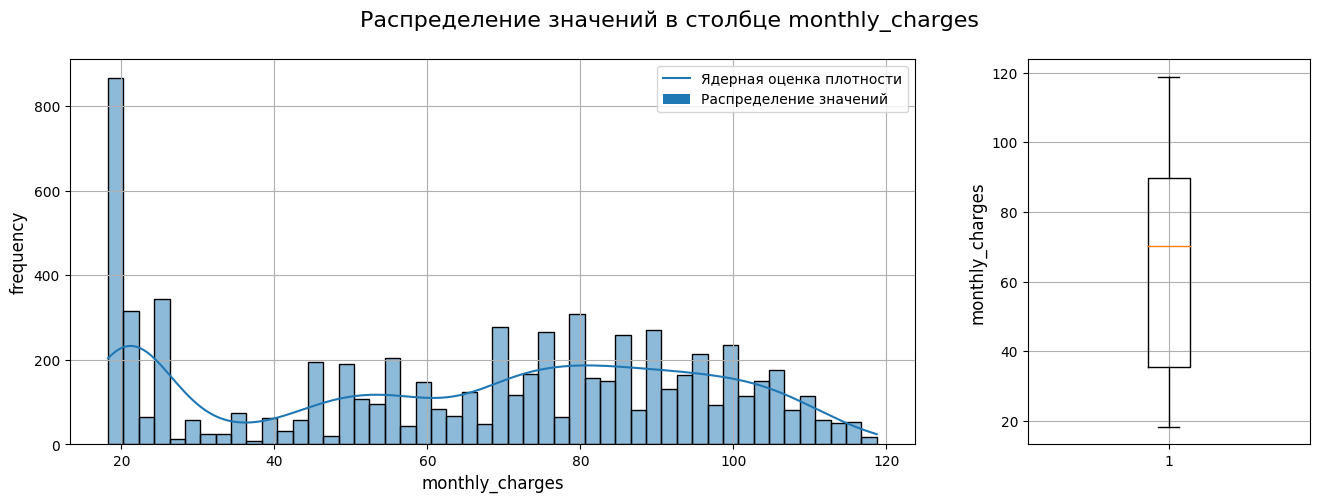

In [128]:
plot_hist_box(data['monthly_charges'])

---

Построение графика распределения значений ежемесячных выплат для абонентов, пользующихся стационарной связью:

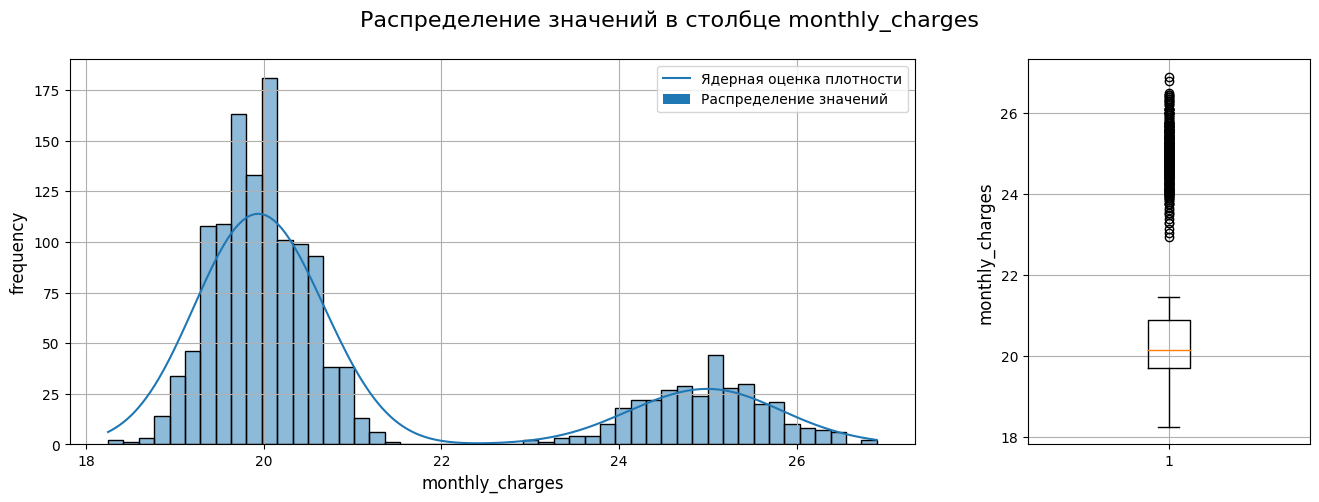

In [129]:
plot_hist_box(data.query('internet_service == "no internet"')['monthly_charges'])

>Стационарная связь обходится абонентам дешевле, поскольку не включает в себя дополнительных услуг.
>
>С учётом наличия двух нормальных распределений, график свидетельствует о двух видах выплат в месяц, и значения больше 22 не являются выбросами.

>Необходимо:
>
>* Определить, возможно ли удалить меньшее распределение значений в этой группе.

Выведение на экран доли значений в столбце относительно всего набора данных:

In [130]:
print_fraction(data.query('internet_service == "no internet"'), data)

Всего значений: 1525
Доля относительно всего набора данных: 21.66 %


Выведение на экран доли отрезка значений в столбце относительно всего набора данных:

In [131]:
print_fraction(data.query('internet_service == "no internet" and monthly_charges > 22'), data)

Всего значений: 342
Доля относительно всего набора данных: 4.86 %


Выведение на экран отрезка доли значений в столбце относительно всего набора данных при наличии ушедших абонентов:

In [132]:
print_fraction(data.query('internet_service == "no internet" and \
                           monthly_charges > 22 and ~end_date.isna()'), data)

Всего значений: 10
Доля относительно всего набора данных: 0.14 %


>Значения можно удалить, поскольку подавляющая их часть относится к большему классу значений целевой переменной.
>
>Однако также следует учитывать, что общая доля этих значений относительно всего набора данных слишком велика, чтобы их удалять. Прежде следует рассмотреть распределение значений для абонентов, которые пользуются интернетом.

---

Построение графика распределения значений ежемесячных выплат для абонентов, пользующихся интернетом:

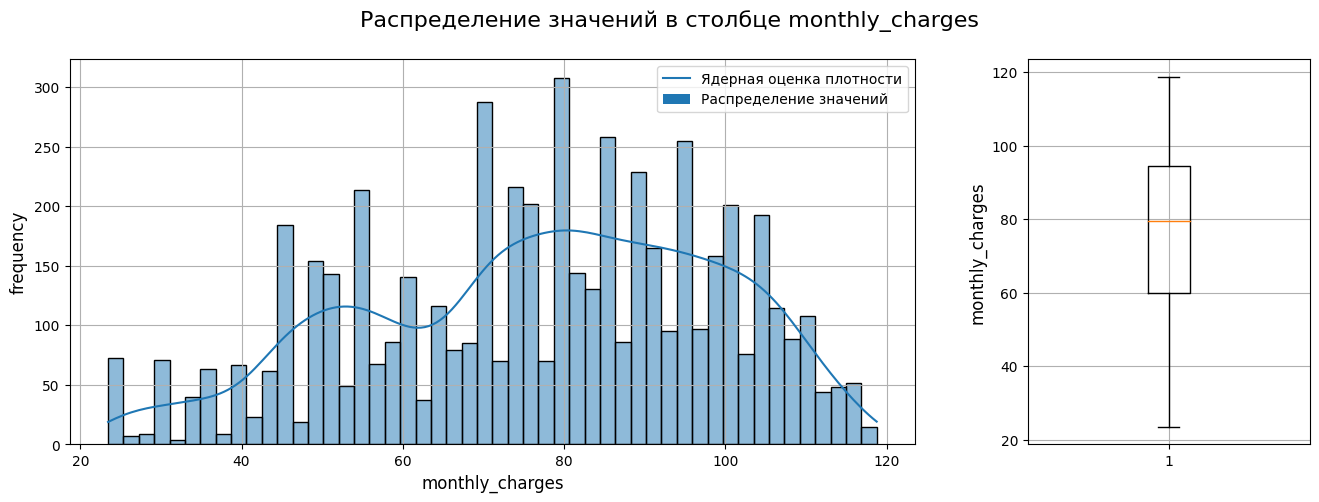

In [133]:
plot_hist_box(data.query('internet_service != "no internet"')['monthly_charges'])

>Интернет-связь обходится абонентам дороже за счёт дополнительных услуг.
>
>График немного смещён вправо, но в целом сохраняет нормальное распределение для переданного типа услуг.

>Необходимо:
>
>* Определить, возможно ли удалить начало распределения значений в этой группе.

Выведение на экран доли значений в столбце относительно всего набора данных:

In [134]:
print_fraction(data.query('internet_service != "no internet"'), data)

Всего значений: 5516
Доля относительно всего набора данных: 78.34 %


Выведение на экран доли отрезка значений в столбце относительно всего набора данных:

In [135]:
print_fraction(data.query('internet_service != "no internet" and monthly_charges < 40'), data)

Всего значений: 311
Доля относительно всего набора данных: 4.42 %


Выведение на экран отрезка доли значений в столбце относительно всего набора данных при наличии ушедших абонентов:

In [136]:
print_fraction(data.query('internet_service != "no internet" and \
                           monthly_charges < 40 and ~end_date.isna()'), data)

Всего значений: 100
Доля относительно всего набора данных: 1.42 %


>Значения можно удалить, поскольку подавляющая их часть относится к большему классу значений целевой переменной.
>
>Однако следует учесть, что при рассмотрении распределения значений абонентов, которые не пользуются интернетом, доля выбранного под удаление отрезка в сумме с долей нынешнего отрезка близка к 10% - верхняя граница возможной доли данных для удаления.
>
>При этом также заметно, что в данных есть некоторые группы, которые можно выделить и вместо удаления сформировать новый признак.

>Необходимо:
>
>* Категоризировать значения столбца, разделив абонентов на группы по ежемесячным затратам: до 40, от 40 до 60, от 60 до 120. 

<div style="background-color: #296eaa10; border: 2px dashed #296eaa; border-radius: 5px; padding: 15px 30px">

**Вывод:**
    
* В столбце не обнаружены выбросы.
* Необходимо категоризировать значения столбца.

</div>

---

#### 1.7.2 Столбец `total_charges`

Построение графика распределения значений общих выплат:

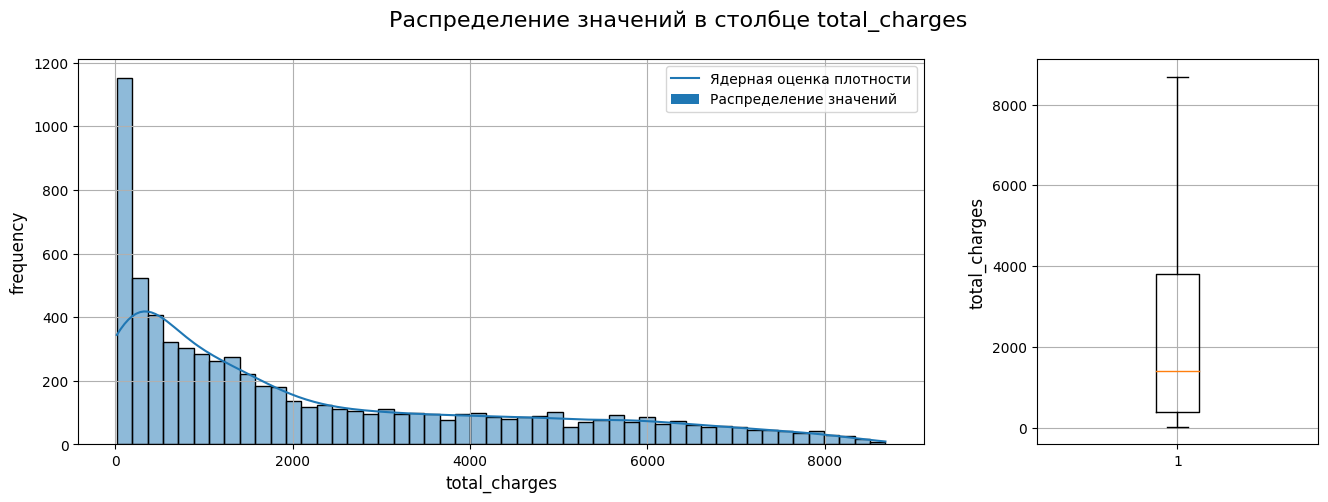

In [137]:
plot_hist_box(data['total_charges'])

---

Построение графика распределения значений общих выплат для абонентов, пользующихся стационарной связью:

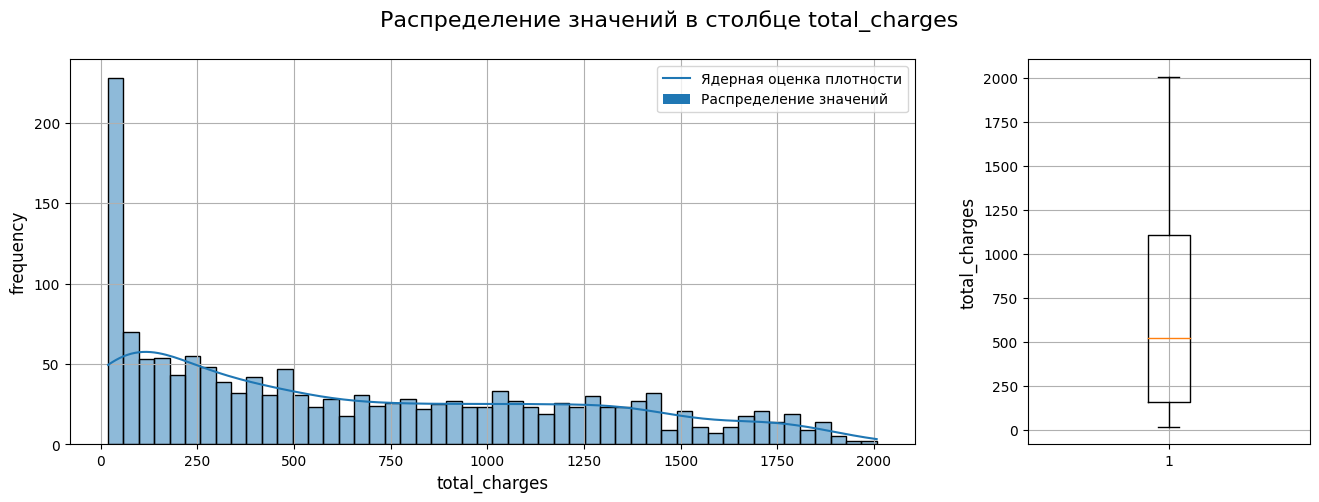

In [138]:
plot_hist_box(data.query('internet_service == "no internet"')['total_charges'])

>Распределение сохраняет динамику общего по всему столбцу. 
>
>У абонентов, которые не пользуются услугой Интернет, несут меньшие общие расходы.

>Необходимо:
>
>* Определить, возможно ли удалить меньшее распределение значений в этой группе.

Выведение на экран доли отрезка значений в столбце относительно всего набора данных:

In [139]:
print_fraction(data.query('internet_service == "no internet" and total_charges < 30'), data)

Всего значений: 168
Доля относительно всего набора данных: 2.39 %


Выведение на экран доли отрезка значений в столбце относительно всего набора данных при наличии ушедших абонентов:

In [140]:
print_fraction(data.query('internet_service == "no internet" and \
                           total_charges < 30 and ~end_date.isna()'), data)

Всего значений: 59
Доля относительно всего набора данных: 0.84 %


>Значения можно удалить, поскольку подавляющая их часть относится к большему классу значений целевой переменной.
>
>Однако прежде следует рассмотреть распределение значений для абонентов, которые пользуются интернетом.

---

Построение графика распределения значений общих выплат для абонентов, пользующихся интернетом:

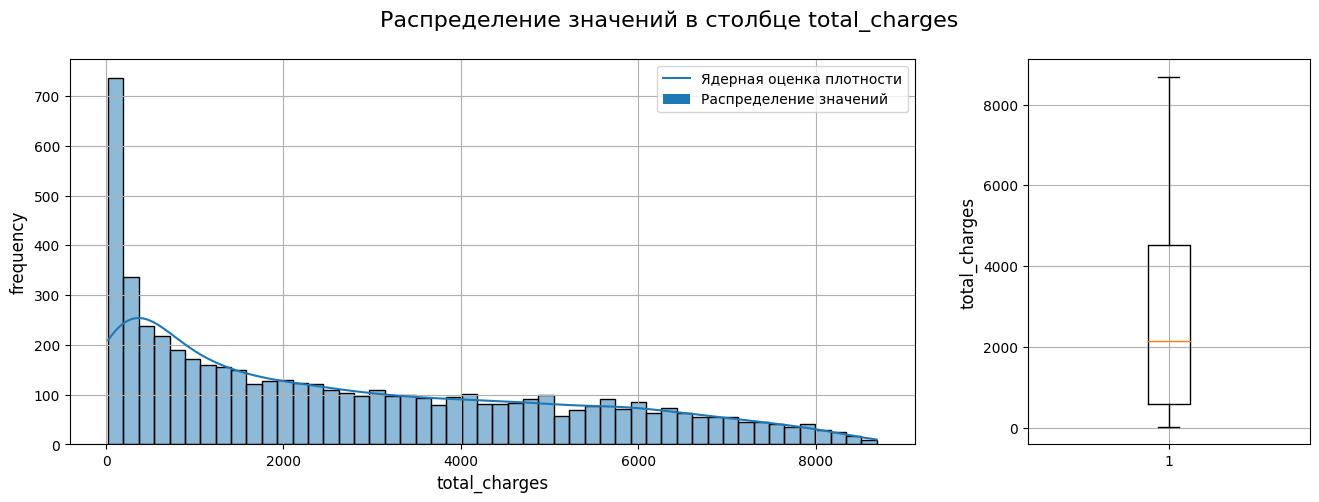

In [141]:
plot_hist_box(data.query('internet_service != "no internet"')['total_charges'])

>Распределение сохраняет динамику общего по всему столбцу.
>
>У абонентов, которые пользуются услугой Интернет, несут большие общие расходы.

>Необходимо:
>
>* Определить, возможно ли удалить меньшее распределение значений в этой группе.

Выведение на экран доли отрезка значений в столбце относительно всего набора данных:

In [142]:
print_fraction(data.query('internet_service != "no internet" and total_charges < 100'), data)

Всего значений: 512
Доля относительно всего набора данных: 7.27 %


Выведение на экран доли отрезка значений в столбце относительно всего набора данных при наличии ушедших абонентов:

In [143]:
print_fraction(data.query('internet_service != "no internet" and \
                           total_charges < 100 and ~end_date.isna()'), data)

Всего значений: 358
Доля относительно всего набора данных: 5.08 %


>Значения нельзя удалить, поскольку подавляющая их часть относится к меньшему классу значений целевой переменной.

>Необходимо:
>
>* Категоризировать значения столбца, разделив абонентов на группы по общим затратам: до 1000, от 1000 до 2000 и далее с шагом 1000.

<div style="background-color: #296eaa10; border: 2px dashed #296eaa; border-radius: 5px; padding: 15px 30px">

**Вывод:**
   
* В столбце не обнаружены выбросы.
* Необходимо категоризировать значения столбца.

</div>

<div style="background-color: blue; opacity: 0.2; height: 2px; margin: 10px 0;"></div>

### 1.8 Генерация признаков

#### 1.8.1 Тип оказываемых услуг

Выведение на экран количественного распределения значений в столбце:

In [144]:
data['internet_service'].value_counts()

internet_service
fiber optic    3096
dsl            2420
no internet    1525
Name: count, dtype: int64

>Необходимо:
>
>* Добавить новый столбец, определяющий тип оказываемых услуг на основании значений столбца: стационарная связь (значения `fiber optic`, `dsl`) или Интернет (`no internet`).

Добавление нового столбца с типом оказываемых услуг:

In [145]:
data['service'] = data.apply(
    lambda x: 'stationary' if x['internet_service'] == 'no internet' else 'internet', axis=1
)

Выведение на экран долевого распределения значений в столбце для проверки применённых изменений:

In [146]:
data['service'].value_counts(normalize=True)

service
internet      0.783411
stationary    0.216589
Name: proportion, dtype: float64

>Большинство абонентов выбирают связь с предоставлением интернета.

<div style="background-color: #296eaa10; border: 2px dashed #296eaa; border-radius: 5px; padding: 15px 30px">

**Вывод:**
    
* Был добавлен столбец с типом оказываемых услуг.

</div>

---

#### 1.8.2 Целевой признак

Выведение на экран количества пропущенных значений в столбце:

In [147]:
print('Пропущенных значений:', data['end_date'].isna().sum())

Пропущенных значений: 5172


>Необходимо:
>
>* Добавить столбец с целевой переменной на основании значений столбца: 1 - абонент разорвал контракт, 0 - абонент не разорвал контракт.

Добавление столбца с целевой переменной:

In [148]:
data['target'] = data['end_date'].apply(lambda x: 0 if pd.isnull(x) else 1)

Выведение на экран долевого распределения значений в столбце для проверки применённых изменений:

In [149]:
data['target'].value_counts(normalize=True)

target
0    0.734555
1    0.265445
Name: proportion, dtype: float64

<div style="background-color: #296eaa10; border: 2px dashed #296eaa; border-radius: 5px; padding: 15px 30px">

**Вывод:**
    
* Был добавлен столбец с целевым признаком.

</div>

---

#### 1.8.3 Категории выплат

>Необходимо:
>
>* Категоризировать значения столбца `monthly_charges`, разделив абонентов на группы по ежемесячным затратам: до 40, от 40 до 60, от 60 до 120. 
>* Категоризировать значения столбца `total_charges`, разделив абонентов на группы по общим затратам: до 1000, от 1000 до 2000 и далее с шагом 1000.

Задание функции, категоризирующей значения столбца с ежемесячными выплатами:

In [150]:
def create_monthly_charges_category(row):
    row_monthly_charges = row['monthly_charges']
    
    if row_monthly_charges <= 40:
        return 'до 40'
    elif 40 < row_monthly_charges <= 60:
        return 'от 40 до 60'
    else:
        return 'от 60 до 120'

Задание функции, категоризирующей значения столбца с общими выплатами:

In [151]:
def create_total_charges_category(row):
    row_total_charges = row['total_charges']
    
    if row_total_charges <= 1000:
        return 'до 1000'
    elif 1000 < row_total_charges <= 2000:
        return 'от 1000 до 2000'
    elif 2000 < row_total_charges <= 3000:
        return 'от 2000 до 3000'
    elif 3000 < row_total_charges <= 4000:
        return 'от 3000 до 4000'
    elif 4000 < row_total_charges <= 5000:
        return 'от 4000 до 5000'
    elif 5000 < row_total_charges <= 6000:
        return 'от 5000 до 6000'
    elif 6000 < row_total_charges <= 7000:
        return 'от 6000 до 7000'
    elif 7000 < row_total_charges <= 8000:
        return 'от 7000 до 8000'
    else:
        return 'от 8000'

---

**Столбец `monthly_charges`**

Распределение абонентов по группам  в зависимости от ежемесячных выплат:

In [152]:
data['monthly_charges_group'] = data.apply(create_monthly_charges_category, axis=1)

Выведение на экран количественного распределения значений в столбце для проверки применённых изменений:

In [153]:
data['monthly_charges_group'].value_counts()

monthly_charges_group
от 60 до 120    4125
до 40           1837
от 40 до 60     1079
Name: count, dtype: int64

---

**Столбец `total_charges`**

Распределение абонентов по группам  в зависимости от общих выплат:

In [154]:
data['total_charges_group'] = data.apply(create_total_charges_category, axis=1)

Выведение на экран количественного распределения значений в столбце для проверки применённых изменений:

In [155]:
data['total_charges_group'].value_counts()

total_charges_group
до 1000            2893
от 1000 до 2000    1283
от 2000 до 3000     652
от 3000 до 4000     556
от 4000 до 5000     513
от 5000 до 6000     443
от 6000 до 7000     365
от 7000 до 8000     249
от 8000              87
Name: count, dtype: int64

<div style="background-color: #296eaa10; border: 2px dashed #296eaa; border-radius: 5px; padding: 15px 30px">

**Вывод:**
    
* Абоненты были разделены на группы по сумме ежемесячного платежа и общих расходов.

</div>

---

#### 1.8.4 Длительность контракта

Выведение на экран первой и последней дат в столбцах набора данных:

In [156]:
print('Первая дата begin_date:', data_contract['begin_date'].min())
print('Последняя дата begin_date:', data_contract['begin_date'].max())

print('\nПервая дата end_date:', data_contract['end_date'].min())
print('Последняя дата end_date:', data_contract['end_date'].max())

Первая дата begin_date: 2018-04-17 00:00:00
Последняя дата begin_date: 2020-02-01 00:00:00

Первая дата end_date: 2019-10-01 00:00:00
Последняя дата end_date: 2020-01-01 00:00:00


>Для формирования дополнительных признаком имеет смысл вычислить длительность контрактов абонентов. Это могут быть количество дней, месяцев и лет контракта.
>
>Однако прежде за крайнюю дату неразрывавших договор пользователей следует взять дату, на которую, согласно описанию данных, актуален набор данных.

>Необходимо:
>
>* Заполнить пропущенные значения в столбце `end_date` максимальным значением из столбца `begin_date` - актуальной датой по данным описания данных.
>* В случае формирования признака длительности контракта абонента, удалить столбцы с датами, чтобы избежать утечки данных.

Заполнение пропусков:

In [157]:
data['end_date'] = data['end_date'].fillna(data['begin_date'].max())

Вычисление количества дней в промежутке:

In [158]:
data['contract_duration_days'] = data.apply(lambda x: x['end_date'] - x['begin_date'], axis=1).dt.days

Вычисление количества лет в промежутке:

In [159]:
data['contract_duration_years'] = data['end_date'].dt.year - data['begin_date'].dt.year
data['contract_duration_years'] = data['contract_duration_years'].apply(lambda x: x if x > 0 else 0)

Вычисление количества месяцев в промежутке:

In [160]:
data['contract_duration_months'] = data['contract_duration_years'] * 12 + \
                                   data['end_date'].dt.month - data['begin_date'].dt.month

Выведение на экран количественного распределения значений в столбце для проверки применённых изменений:

In [161]:
print_unique(data, data.columns[-3:])

CONTRACT_DURATION_DAYS
[479   0 279 310 188 322 465 297 212 289 126 168 358 342 346 476 353 364
 402 241 206 375 304 236 437 258 196 130 208 397 347 331 254 307 140 299
 335 266 160 379 366 226 357 269 326 341 359 395 189 291 426 255 351 232
 288 292 338 309 240 242 388 414 228 220 372 215 295 244 205 321 274 286
 175 247 330 275 106 225 350 134 332 507 371 418 329 314 283 444 229 344
 318 238  62 337 294 268 328 333 277 452 343 455 211 164 380 532 265 305
 354 185 270 276 356 369 280 252 315 303  74 327 282 214 419 425 552 181
 216 264 320 293 334 324 234 227 348 250 394 362 415 245 421 159 319 263
 284 278 316 235 149 384 217 431 272 178 209 273 200 308 454 317 296 396
 302 176 190 210 423 417 325 187 224 133 411 267 300 290 422 398 207 248
 365 429 161 378 413 193 404  80 237 311 151 385 306 165 201 143 382 197
 179 420 407 451 323 339 313 118 408 249 183 463 186 233 202 312 257 110
 139 246 412 401 497 287 416 260 301 363 406 430 499  92 352 433 488 518
 409 251 472 466 281 204 152

Построение графика распределения значений в столбце:

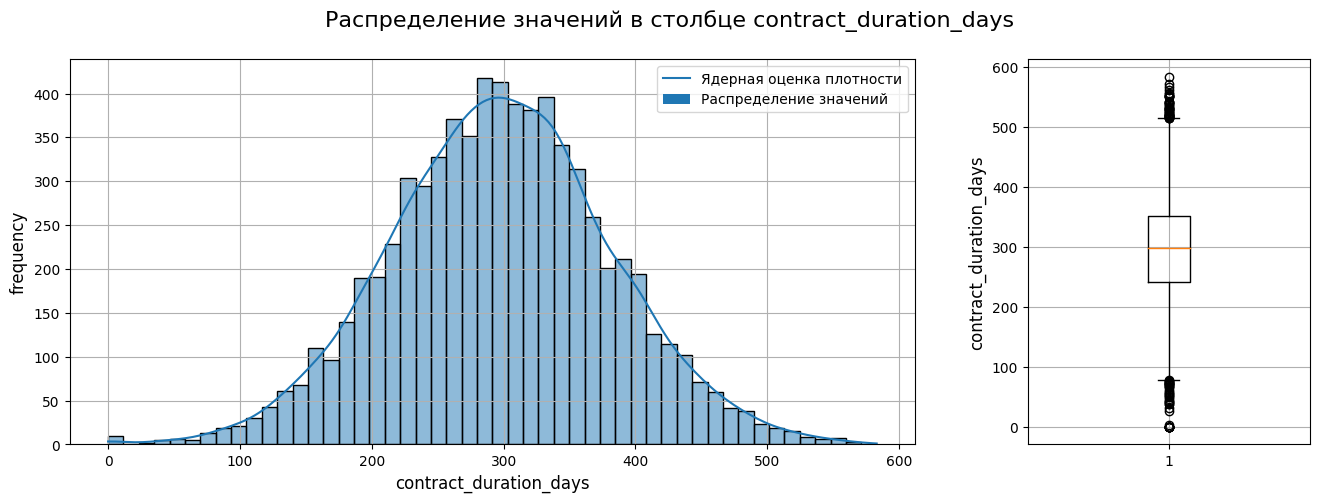

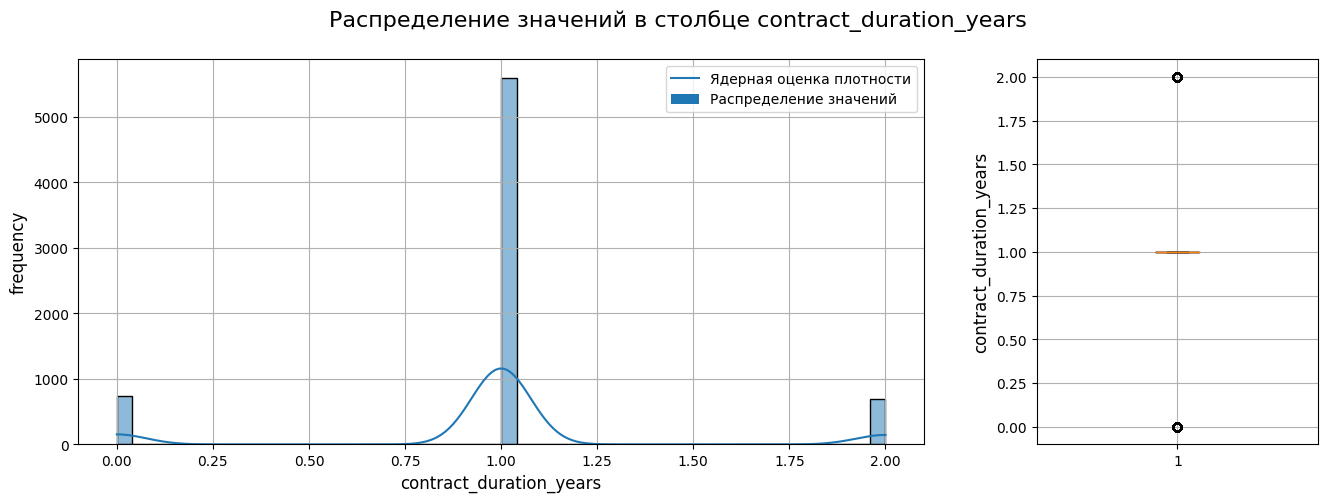

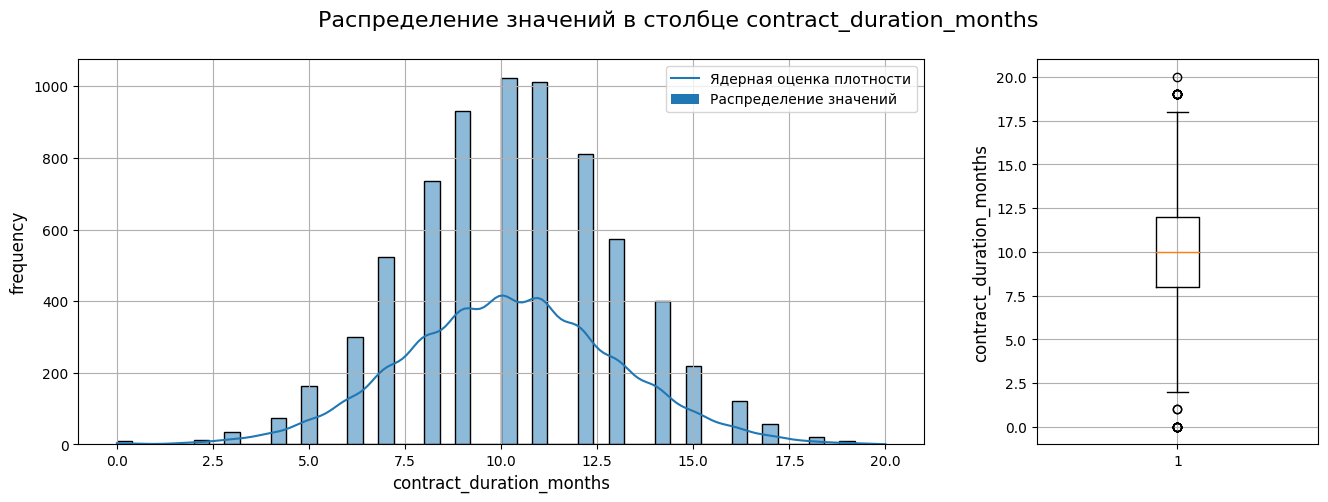

In [162]:
for col_name in data.columns[-3:]:
    plot_hist_box(data[col_name])

>Значения имеют нормальное распределение.

>Необходимо:
>
>* Определить, возможно ли удалить начало и конец распределения значений.

Выведение на экран доли значений в столбце относительно всего набора данных:

In [163]:
print_fraction(data.query('contract_duration_days < 100'), data)

Всего значений: 70
Доля относительно всего набора данных: 0.99 %


Выведение на экран доли значений в столбце относительно всего набора данных:

In [164]:
print_fraction(data.query('contract_duration_days < 100 and target == 1'), data)

Всего значений: 18
Доля относительно всего набора данных: 0.26 %


Выведение на экран доли значений в столбце относительно всего набора данных:

In [165]:
print_fraction(data.query('contract_duration_days > 500'), data)

Всего значений: 61
Доля относительно всего набора данных: 0.87 %


Выведение на экран доли значений в столбце относительно всего набора данных:

In [166]:
print_fraction(data.query('contract_duration_days > 500 and target == 1'), data)

Всего значений: 18
Доля относительно всего набора данных: 0.26 %


>Обнаруженные выбросы можно удалить из набора данных, поскольку их содержание в наборе данных незначительно.

Удаление части данных:

In [167]:
data = data.query('100 < contract_duration_days < 500').reset_index(drop=True)

Выведение на экран размерности набора данных:

In [168]:
print('Размерность набора данных:', data.shape)

Размерность набора данных: (6905, 27)


<div style="background-color: #296eaa10; border: 2px dashed #296eaa; border-radius: 5px; padding: 15px 30px">

**Вывод:**
    
* Был добавлен столбец с длительностью действия контрактов.

</div>

---

#### 1.8.5 Количество дней до оплаты

Задание функции, вычисляющей количество дней до следующей оплаты тарифа:

In [169]:
def count_payment_term(row):
    row_type = row['type']
    row_contract_duration = row['contract_duration_days']
    
    if row_type == 'month-to-month':
        return row_contract_duration % 30
    elif row_type == 'one year':
        return row_contract_duration % 365
    else:
        return row_contract_duration % (365 * 2)

---

Вычисление количества дней до следующей оплаты тарифа:

In [170]:
data['days_until_payment_term'] = data.apply(count_payment_term, axis=1)

Выведение на экран количественного распределения значений в столбце для проверки применённых изменений:

In [171]:
data['days_until_payment_term'].value_counts()

days_until_payment_term
3      147
18     145
4      145
6      145
8      140
      ... 
452      1
451      1
47       1
49       1
71       1
Name: count, Length: 456, dtype: int64

Построение графика распределения значений в столбце:

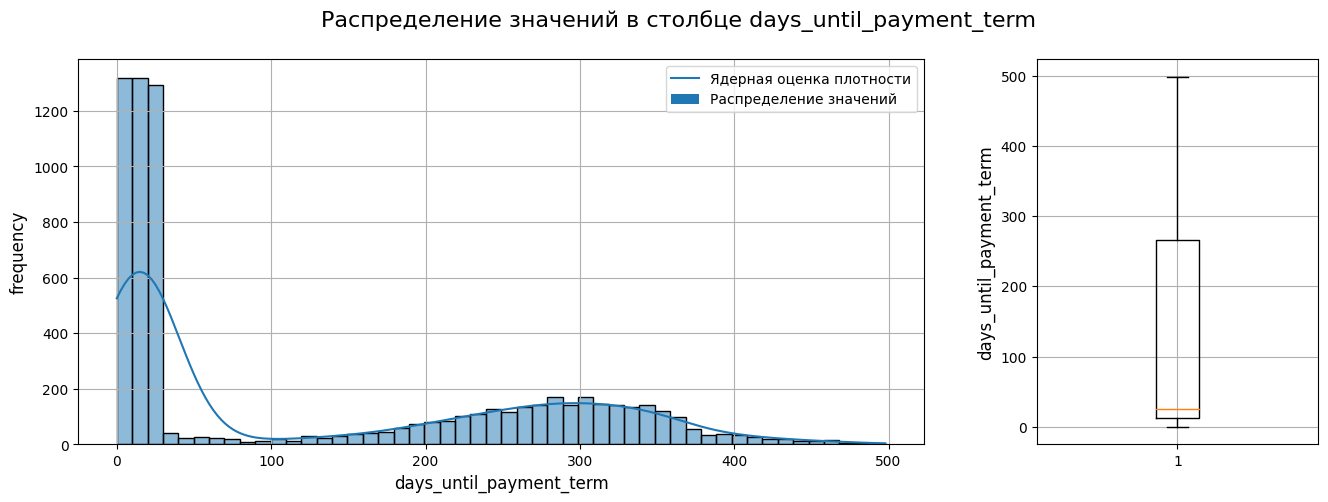

In [172]:
plot_hist_box(data['days_until_payment_term'])

>Распределение значений смещено влево.
>
>С учётом распределения значений в столбце с ежемесячным платежом, распределение корректно, поскольку повторяет динамику распределения значений ежемесячного платежа.

<div style="background-color: #296eaa10; border: 2px dashed #296eaa; border-radius: 5px; padding: 15px 30px">

**Вывод:**
    
* Был добавлен столбец с количеством дней до следующей оплаты абонентом тарифа.

</div>

---

#### 1.8.6 Удаление лишних столбцов

Поскольку в наборе данных есть столбцы с датами, а задача обучения не представляет собой временные ряды, эти столбцы не будут нужны при дальнейшей работе с данными. Как и столбец с идентификаторами абонентов, который не является признаком объекта.

>Необходимо:
>
>* Удалить столбцы с датами, чтобы избежать утечки данных.
>* Удалить столбец с идентификаторами абонентов.

Удаление столбцов:

In [173]:
data = data.drop(['customer_id', *data_columns['datetime64[ns]']], axis=1)

Выведение на экран первых строк набора данных для проверки применённых изменений:

In [174]:
data.head()

type  paperless_billing             payment_method  \
0  month-to-month                  1               mailed check   
1  month-to-month                  1           electronic check   
2  month-to-month                  1           electronic check   
3  month-to-month                  1           electronic check   
4  month-to-month                  1  bank transfer (automatic)   

   monthly_charges  total_charges  is_male  is_senior_citizen  is_married  \
0            53.85         108.15        1                  0           0   
1            70.70         151.65        0                  0           0   
2            99.65         820.50        0                  0           0   
3           104.80        3046.05        0                  0           1   
4           103.70        5036.30        1                  0           0   

   has_children internet_service  ...  has_streaming_movies  \
0             0              dsl  ...                   0.0   
1             0      fiber optic  ...                   0.0   
2             0      fiber optic  ...                   1.0   
3             0      fiber optic  ...                   1.0   
4             0      fiber optic  ...                   1.0   

   has_multiple_lines   service  target  monthly_charges_group  \
0                 0.0  internet       1            от 40 до 60   
1                 0.0  internet       1           от 60 до 120   
2                 1.0  internet       1           от 60 до 120   
3                 1.0  internet       1           от 60 до 120   
4                 1.0  internet       1           от 60 до 120   

   total_charges_group  contract_duration_days contract_duration_years  \
0              до 1000                     479                       1   
1              до 1000                     279                       0   
2              до 1000                     310                       1   
3      от 3000 до 4000                     188                       0   
4      от 5000 до 6000                     322                       1   

   contract_duration_months days_until_payment_term  
0                        16                      29  
1                        10                       9  
2                        11                      10  
3                         7                       8  
4                        11                      22  

[5 rows x 25 columns]

<div style="background-color: #296eaa10; border: 2px dashed #296eaa; border-radius: 5px; padding: 15px 30px">

**Вывод:**
    
* Из набора данных были удалены ненужные при дальнейшей работе с данными столбцы.

</div>

<div style="background-color: blue; height: 2px; margin: 10px 0;"></div>

## 2 Исследовательский анализ данных

### 2.1 Корреляционный анализ

Добавление в модель признака со слабой связью с целевым признаком оказывает негативное влияние на производительность моделей, поэтому необходимо рассмотреть взаимосвязь признаков друг с другом, в чём поможет построение матрицы корреляции.

---

Задание функции, выводящей матрицу корреляции признаков:

In [175]:
def plot_corr_matrix(data: pd.DataFrame) -> pd.DataFrame:
    data_corr = data.phik_matrix().round(2)
    
    plot_correlation_matrix(data_corr.values, 
                            x_labels=data_corr.columns, 
                            y_labels=data_corr.index, 
                            vmin=0, 
                            vmax=1, 
                            color_map='Blues', 
                            title='Матрица корреляции признаков\n', 
                            fontsize_factor=0.8, 
                            figsize=(12, 10))
    plt.tight_layout()
    plt.show()
    
    return data_corr

Задание функции, выводящей соотношение признаков с целевым признаком:

In [176]:
def display_corr_features(data_corr: pd.DataFrame, 
                          target_col: str,
                          threshold: float,
                          operator: str = '>') -> None:
    
    target_corr = data_corr[target_col]
    
    if operator == '>':
        relevant_features = target_corr[target_corr > threshold]
        
    elif operator == '>=':
        relevant_features = target_corr[target_corr >= threshold]
        
    elif operator == '<':
        relevant_features = target_corr[target_corr < threshold]
        
    elif operator == '<=':
        relevant_features = target_corr[target_corr <= threshold]
        
    else:
        relevant_features = target_corr[target_corr == threshold]
        
    display(relevant_features.to_frame())

---

Выведение на экран матрицы корреляции признаков:

interval columns not set, guessing: ['paperless_billing', 'monthly_charges', 'total_charges', 'is_male', 'is_senior_citizen', 'is_married', 'has_children', 'has_online_security', 'has_online_backup', 'has_device_protection', 'has_tech_support', 'has_streaming_tv', 'has_streaming_movies', 'has_multiple_lines', 'target', 'contract_duration_days', 'contract_duration_years', 'contract_duration_months', 'days_until_payment_term']


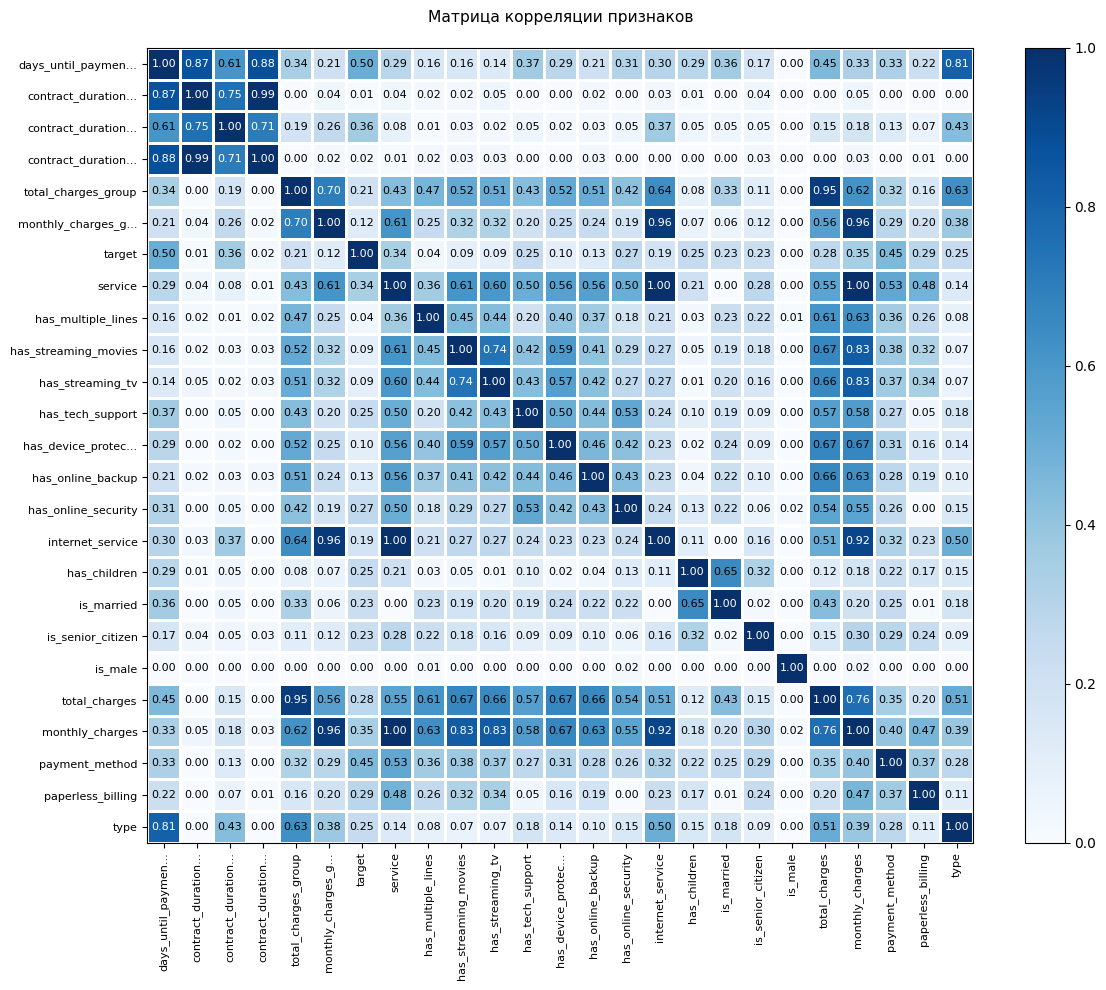

In [177]:
data_corr = plot_corr_matrix(data)

>Необходимо:
>
>* Рассмотреть корреляцию признаков с целевым признаком с порогом 0.1.

Выведение на экран признаков с превышающей заданный порог корреляцией:

In [178]:
display_corr_features(data_corr.sort_values(by='target', ascending=False), 'target', threshold=0.1)

target
target                     1.00
days_until_payment_term    0.50
payment_method             0.45
contract_duration_years    0.36
monthly_charges            0.35
service                    0.34
paperless_billing          0.29
total_charges              0.28
has_online_security        0.27
has_tech_support           0.25
type                       0.25
has_children               0.25
is_married                 0.23
is_senior_citizen          0.23
total_charges_group        0.21
internet_service           0.19
has_online_backup          0.13
monthly_charges_group      0.12

>Самая сильная корреляция у количества дней до оплаты, типа оплаты, длительности контракта в годах, расходов в месяц, типа услуг.

Выведение на экран признаков с низкой корреляцией:

In [179]:
display_corr_features(data_corr, 'target', threshold=0.1, operator='<')

target
is_male                     0.00
has_streaming_tv            0.09
has_streaming_movies        0.09
has_multiple_lines          0.04
contract_duration_days      0.02
contract_duration_months    0.01

>Самая слабая корреляция у пола абонента, наличия некоторых дополнительных услуг и более одной линии подключения, длительности контракта в днях и месяцах.

>Однако как при сильной, так и при слабой корреляции, она представлена для целевого признака в целом, поэтому корректнее будет также рассмотреть распределение значений по каждому признаку в зависимости от значения целевого признака.

>Необходимо:
>
>* Рассмотреть распределение каждого признака в зависимости от значений целевого признака.
>* Проанализировать нечисловые признаки.

<div style="background-color: blue; opacity: 0.2; height: 2px; margin: 10px 0;"></div>

### 2.2 Оценка важности признаков

Более детальное рассмотрение признаков относительно целевого признака поможет определить их весомость и отобрать признаки, по которым обучение модели будет наиболее эффективным.

---

Задание функции, группирующей данные по переданным столбцам:

In [180]:
def group_data(data: pd.DataFrame,
               col_x: str,
               col_labels: str,
               labels: Dict[int, str],
               col_x_labels: Dict[int, str] = None,
               col_y: str = None,
               col_y_labels: Dict[int, str] = None) -> pd.DataFrame:
    
    # group data
    if col_y is None:
        columns = [col_x, col_labels]
    else:
        columns = [col_x, col_y, col_labels]
        
    data_grouped = data[columns].groupby(columns) \
                                .size() \
                                .reset_index(name='count')
    
    # move col_labels to the end
    data_grouped = data_grouped.drop(col_labels, axis=1) \
                               .join(data_grouped[col_labels])
    
    # change col_labels names
    if labels is not None:
        data_grouped[col_labels] = data_grouped[col_labels].apply(lambda x: labels[x])
        
    # change col_x names
    if col_x_labels is not None:
        data_grouped[col_x] = data_grouped[col_x].apply(lambda x: col_x_labels[x])
    
    # change col_y names
    if col_y_labels is not None:
        data_grouped[col_y] = data_grouped[col_y].apply(lambda x: col_y_labels[x])
    
    # add column with fraction of col_x value to total data
    data_grouped.insert(2, 'fraction', 
                        data_grouped['count'].apply(lambda x: round(x / data.shape[0], 2)))
    
    # add void rows
    data_grouped_value_counts = data_grouped[col_x].value_counts() 
    data_grouped_void_indexes = data_grouped_value_counts[data_grouped_value_counts < 2].index

    for idx in data_grouped_void_indexes:
        data_group_full = data_grouped[data_grouped[col_x] == idx]
        data_group_void_label = list(labels.values())
        data_group_void_label.remove(data_group_full['target'].values[0])
        
        data_grouped.loc[-1] = [idx, 0, 0, *data_group_void_label]
        data_grouped.index += 1

    data_grouped = data_grouped.sort_values(by=col_x)
    
    return data_grouped

Задание функции, выводящей частоту значений в переданном столбце для каждого значения целевой переменной:

In [181]:
def plot_multi_bar(data: pd.DataFrame,
                   col_x: str,
                   col_labels: str = 'target',
                   labels: Dict[int, str] = {0: 'Не разорвали договор', 1: 'Разорвали договор'},
                   col_x_labels: Dict[int, str] = None,
                   col_y: str = None,
                   col_y_labels: Dict[int, str] = None,
                   data_corr: pd.DataFrame = None,
                   bar_width = 0.25) -> None:
    
    font_s = 12
    plt.figure(figsize=(16, 4))
    
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2])
    ax_bar = plt.subplot(gs[0])
    ax_multi_bar = plt.subplot(gs[1])
    
    
    # titles
    ax_bar.title.set_text(f'Распределение значений признака {col_x}\n')
    
    if col_y is None:
        ax_multi_bar_title = f'Распределение значений признака {col_labels}\n в зависимости от значений признака {col_x}\n'
    else:
        ax_multi_bar_title = f'Распределение значений признака {col_labels}\n в зависимости от значений признаков {col_x} и {col_y}\n'
        
    ax_multi_bar.title.set_text(ax_multi_bar_title)
    
    
    # ---------
    # plot bars
    # group data
    data_grouped = pd.DataFrame(data.groupby(col_x).size()).reset_index()
    data_grouped.columns = [col_x, 'count']
    
    x = data_grouped[col_x]
    y = data_grouped['count']
    
    if col_x_labels is not None:
        x = [col_x_labels[label] for label in x]
    else:
        x = [str(x_i) for x_i in x]
        
    ax_bar.bar(x, y)
    
    # rotate xticks
    check_len = any([len(x_i) >= 15 for x_i in x]) if isinstance(x[0], str) else False
    
    if check_len and len(x) <= 5:
        rotation = 15
    elif check_len and len(x) > 5:
        rotation = 90
    else:
        rotation = 0
    
    # add labels to X axis
    ax_bar.set_xticks(range(len(x)), x, rotation=rotation)
        
    ax_bar.set_xlabel(col_x, fontsize=font_s)
    ax_bar.set_ylabel('frequency', fontsize=font_s)
    
    ax_bar.grid()
    
    
    # --------
    # display features correlation
    if data_corr is not None:
        print('Корреляция с другими принаками:')
        
        if col_y is None:
            display(pd.DataFrame(data_corr[col_x]).T)
        else:
            display(pd.DataFrame(data_corr[col_y]).T)
        
        print()
    
    
    # group data
    data_grouped = group_data(data, col_x, col_labels, labels, col_x_labels, col_y, col_y_labels)
    
    print(f'Распределение значений в столбце {col_x} по значениям столбца {col_labels}:')
    display(data_grouped)
    print()
    
    
    # get default values
    if col_y is None:
        x_ticks = data_grouped[col_x].unique()
    else:
        x_ticks = set('\n'.join([col_x_y[0], str(col_x_y[1])]) 
                      for col_x_y in zip(data_grouped[col_x], data_grouped[col_y]))
    
    x_ticks = list(x_ticks)
    
    labels_legend = data_grouped[col_labels].unique()
    
    
    x, y = [], []
    
    # create Y and X values
    for i in range(len(labels_legend)):
        # get value counts of filtered data
        y.append(data_grouped[data_grouped[col_labels] == labels_legend[i]]['count'])
        
        # update x value
        if len(x) == 0:
            x_new = np.arange(len(y[i]))
            x_new = [x for x in x_new]
        else:
            x_new = np.arange(len(y[i])) + i * bar_width
            
        x.append(x_new)
    
    # plot multi bars
    for i in range(len(y)):
        ax_multi_bar.bar(x[i], 
                         y[i], 
                         width=bar_width, 
                         edgecolor='grey',
                         alpha=0.6,
                         label=labels_legend[i])
        
    # rotate labels
    check_len = any([len(x_i) >= 15 for x_i in x_ticks]) if isinstance(x_ticks[0], str) else False
    
    if check_len and len(x) <= 5:
        rotation = 15
    elif check_len and len(x) > 5:
        rotation = 90
    else:
        rotation = 0
        
    # add labels to X axis      
    ax_multi_bar.set_xticks([i + bar_width - bar_width / 2 for i in range(len(x_ticks))], 
                            x_ticks, 
                            rotation=rotation)
    
    ax_multi_bar.set_xlabel(col_x, fontsize=font_s)
    ax_multi_bar.set_ylabel('frequency', fontsize=font_s)

    ax_multi_bar.legend(loc='upper right')
    ax_multi_bar.grid()
    
    plt.show()

Задание функции, выводящей распределение значений в переданном столбце для каждого значения целевой переменной:

In [182]:
def plot_multi_box(data: pd.DataFrame,
                   col_x: str,
                   col_labels: str = 'target',
                   labels: Dict[int, str] = {0: 'Не разорвали договор', 1: 'Разорвали договор'},
                   col_x_labels: Dict[int, str] = None,
                   data_corr: pd.DataFrame = None,
                   box_width = 0.5) -> None:
    
    font_s = 12
    plt.figure(figsize=(16, 5))
    
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2])
    ax_box = plt.subplot(gs[0])
    ax_multi_box = plt.subplot(gs[1])
    
    
    # titles
    ax_box.title.set_text(f'Распределение значений признака {col_x}\n')
    ax_multi_box.title. set_text(f'Распределение значений признака {col_labels}\n в зависимости от значений признака {col_x}\n')
    
    
    # ---------
    # plot box        
    ax_box.boxplot(data[col_x])
    
    ax_box.set_xticks([])
    ax_box.set_xlabel(col_x, fontsize=font_s)
    ax_box.set_ylabel('frequency', fontsize=font_s)
    
    ax_box.grid()
    
    
    # ---------
    # display features correlation
    if data_corr is not None:
        print('Корреляция с другими принаками:')
        display(pd.DataFrame(data_corr[col_x]).T)
        print()
    
    
    # group data
    data_grouped = group_data(data, col_x, col_labels, labels, col_x_labels)
    
    
    # get default values
    labels_legend = data_grouped[col_labels].unique()
    
    
    x_ticks, col_x_filtered = [], []
    
    # filter data 
    for label in labels_legend:
        label = list(labels.keys())[list(labels.values()).index(label)]
        data_filtered = data[data[col_labels] == label]
        
        col_x_filtered.append(data_filtered[col_x])
        x_ticks.append(labels[label])
        
    
    # plot boxes
    ax_multi_box.boxplot(col_x_filtered, widths=box_width)
    
    
    # add labels to X axis
    ax_multi_box.set_xticks(range(len(x_ticks) + 2), ['', *x_ticks, ''])
    
    ax_multi_box.set_xlabel(col_labels, fontsize=font_s)
    ax_multi_box.set_ylabel(col_x, fontsize=font_s)
    
    ax_multi_box.grid()
    
    plt.show()

Задание функции, выводящей гистограмму значений в переданном столбце для каждого значения целевой переменной:

In [183]:
def plot_multi_hist(data: pd.DataFrame, 
                    col_x: str,
                    col_labels: str = 'target',
                    labels: Dict[int, str] = {0: 'Не разорвали договор', 1: 'Разорвали договор'},
                    n_bins: int = 50) -> None:
    
    font_s = 12
    plt.figure(figsize=(16, 5))
    
    plt.title(f'Распределение значений в столбце {col_x}\n', fontsize=font_s+4)
    
    colors = ['blue', 'orange', 'red', 'green', 'yellow']
    
    for i, value in enumerate(data[col_labels].unique()):
        sns.histplot(data[data[col_labels] == value][col_x], 
                     bins=n_bins, 
                     kde=True, 
                     alpha=0.5,
                     label=labels[value],
                     color=colors[i])
    
    plt.xlabel(col_x, fontsize=font_s)
    plt.ylabel('frequency', fontsize=font_s)
    
    plt.legend(loc='upper right')
    plt.grid()

    plt.show()

Задание функции, выводящей гистограммы значений в переданном столбце для каждого значения целевой переменной с фильтрацией по каждому из уникальных значений переданного столбца:

In [184]:
def plot_multi_hist_filter(data: pd.DataFrame, 
                           col_filter: str,
                           col_x: str,
                           col_labels: str = 'target',
                           labels: Dict[int, str] = {0: 'Не разорвали договор', 1: 'Разорвали договор'},
                           n_bins: int = 50) -> None:
    
    for value in data[col_filter].unique():
        print(f'С фильтром по столбцу {col_filter} по значению', value)
        plot_multi_hist(data[data[col_filter] == value], col_x, col_labels, labels, n_bins)
        print()

---

#### 2.2.1 Столбец `type`

>Необходимо:
>
>* Определить наличие или отсутствие зависимости целевого признака от типа оплаты.

Построение графика распределения значений столбца по значениям целевой переменной:

Распределение значений в столбце type по значениям столбца target:


type  count  fraction                target
0  month-to-month   2187      0.32  Не разорвали договор
1  month-to-month   1621      0.23     Разорвали договор
2        one year   1285      0.19  Не разорвали договор
3        one year    163      0.02     Разорвали договор
4        two year   1601      0.23  Не разорвали договор
5        two year     48      0.01     Разорвали договор

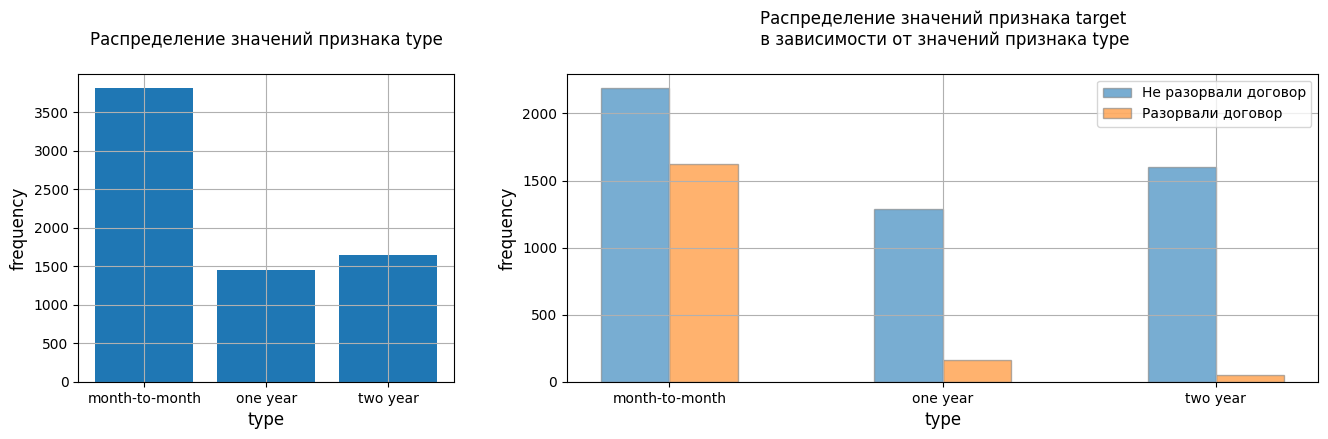

In [185]:
plot_multi_bar(data=data, col_x='type')

<div style="background-color: #296eaa10; border: 2px dashed #296eaa; border-radius: 5px; padding: 15px 30px">
    
**Вывод**

* Целевой признак **зависит** от типа оплаты.

</div>

---

#### 2.2.2 Столбец `paperless_billing`

>Необходимо:
>
>* Определить наличие или отсутствие зависимости целевого признака от электронного расчётного листа.

Построение графика распределения значений столбца по значениям целевой переменной:

Корреляция с другими принаками:


type  paperless_billing  payment_method  monthly_charges  \
paperless_billing  0.11                1.0            0.37             0.47   

                   total_charges  is_male  is_senior_citizen  is_married  \
paperless_billing            0.2      0.0               0.24        0.01   

                   has_children  internet_service  ...  has_streaming_movies  \
paperless_billing          0.17              0.23  ...                  0.32   

                   has_multiple_lines  service  target  monthly_charges_group  \
paperless_billing                0.26     0.48    0.29                    0.2   

                   total_charges_group  contract_duration_days  \
paperless_billing                 0.16                    0.01   

                   contract_duration_years  contract_duration_months  \
paperless_billing                     0.07                       0.0   

                   days_until_payment_term  
paperless_billing                     0.22  

[1 rows x 25 columns]


Распределение значений в столбце paperless_billing по значениям столбца target:


paperless_billing  count  fraction                target
0         без листа   2354      0.34  Не разорвали договор
1         без листа    461      0.07     Разорвали договор
2          с листом   2719      0.39  Не разорвали договор
3          с листом   1371      0.20     Разорвали договор

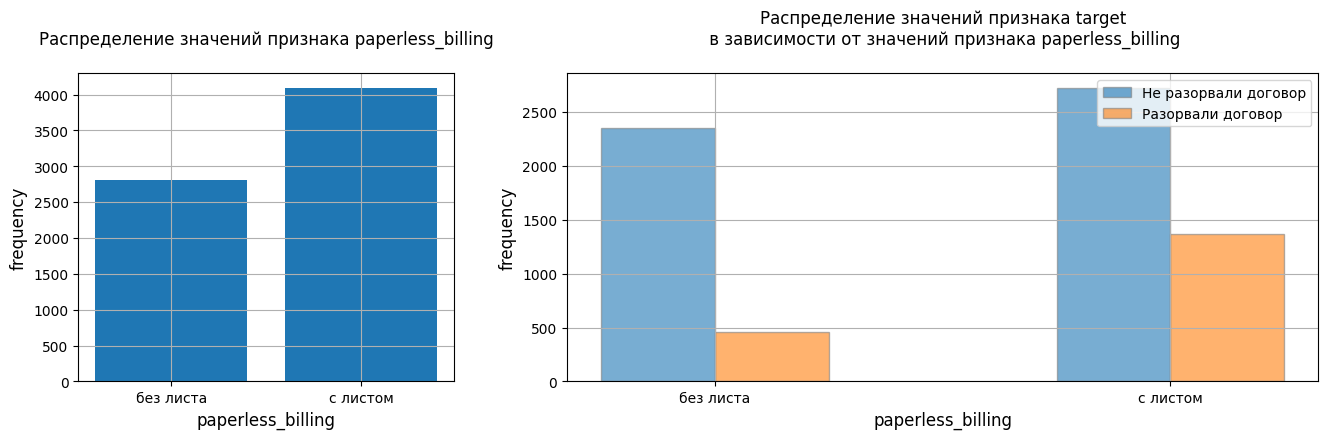

In [186]:
plot_multi_bar(
    data=data,
    col_x='paperless_billing',
    col_x_labels={0: 'без листа', 1: 'с листом'}, 
    data_corr=data_corr
)

<div style="background-color: #296eaa10; border: 2px dashed #296eaa; border-radius: 5px; padding: 15px 30px">
    
**Вывод**

* Целевой признак **зависит** от наличия электронного расчётного листа.

</div>

---

#### 2.2.3 Столбец `payment_method`

>Необходимо:
>
>* Определить наличие или отсутствие зависимости целевого признака от типа платежа.

Построение графика распределения значений столбца по значениям целевой переменной:

Распределение значений в столбце payment_method по значениям столбца target:


payment_method  count  fraction                target
0  bank transfer (automatic)   1257      0.18  Не разорвали договор
1  bank transfer (automatic)    252      0.04     Разорвали договор
2    credit card (automatic)   1266      0.18  Не разорвали договор
3    credit card (automatic)    228      0.03     Разорвали договор
4           electronic check   1277      0.18  Не разорвали договор
5           electronic check   1049      0.15     Разорвали договор
6               mailed check   1273      0.18  Не разорвали договор
7               mailed check    303      0.04     Разорвали договор

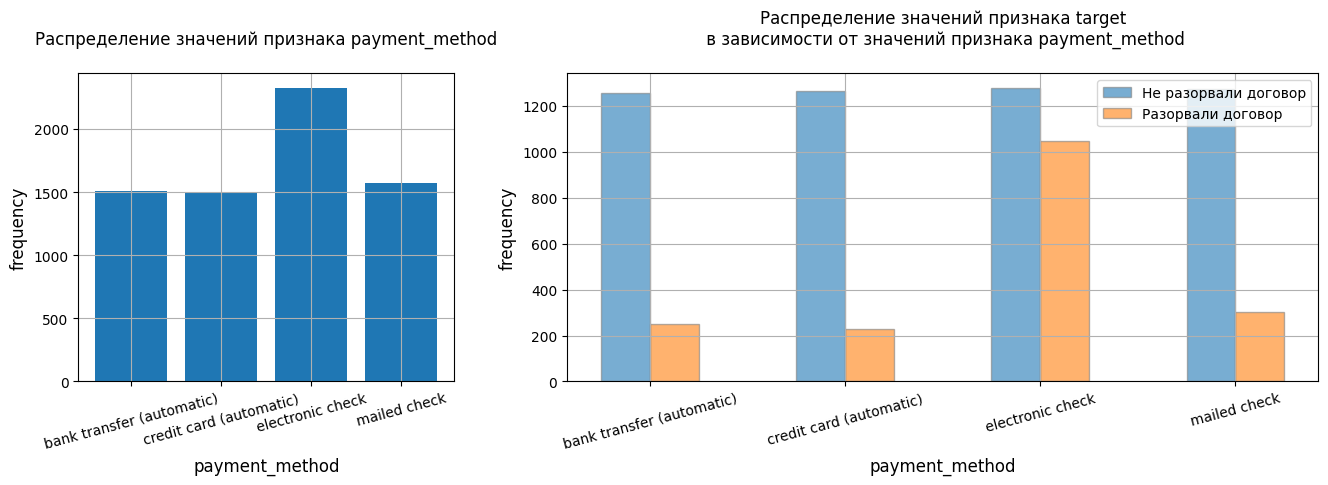

In [187]:
plot_multi_bar(data=data, col_x='payment_method')

<div style="background-color: #296eaa10; border: 2px dashed #296eaa; border-radius: 5px; padding: 15px 30px">
    
**Вывод**

* Целевой признак **зависит** от типа платежа.

</div>

---

#### 2.2.4 Столбец `monthly_charges`

>Необходимо:
>
>* Определить наличие или отсутствие зависимости целевого признака от расходов в месяц.

Выведение на экран графика распределения значений в столбце набора данных:

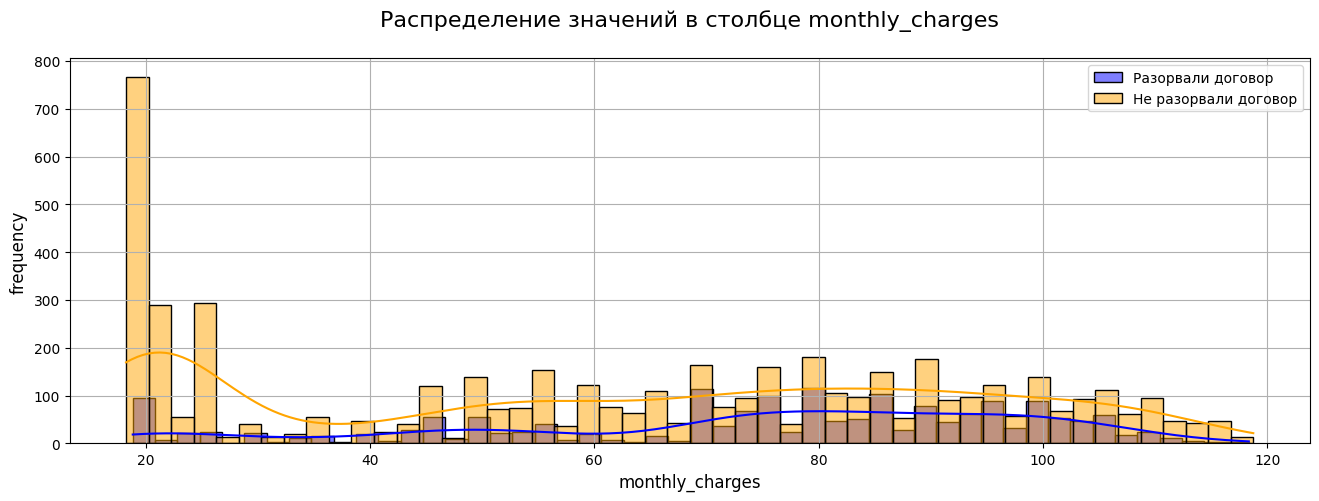

In [188]:
plot_multi_hist(data, 'monthly_charges')

>Распределение групп целевого признака имеет смещение влево, однако у неразорвавших договор значения в том числе концентрируются в начале графика.

Построение графика распределения значений столбца по значениям целевой переменной:

Корреляция с другими принаками:


type  paperless_billing  payment_method  monthly_charges  \
monthly_charges  0.39               0.47             0.4              1.0   

                 total_charges  is_male  is_senior_citizen  is_married  \
monthly_charges           0.76     0.02                0.3         0.2   

                 has_children  internet_service  ...  has_streaming_movies  \
monthly_charges          0.18              0.92  ...                  0.83   

                 has_multiple_lines  service  target  monthly_charges_group  \
monthly_charges                0.63      1.0    0.35                   0.96   

                 total_charges_group  contract_duration_days  \
monthly_charges                 0.62                    0.03   

                 contract_duration_years  contract_duration_months  \
monthly_charges                     0.18                      0.05   

                 days_until_payment_term  
monthly_charges                     0.33  

[1 rows x 25 columns]

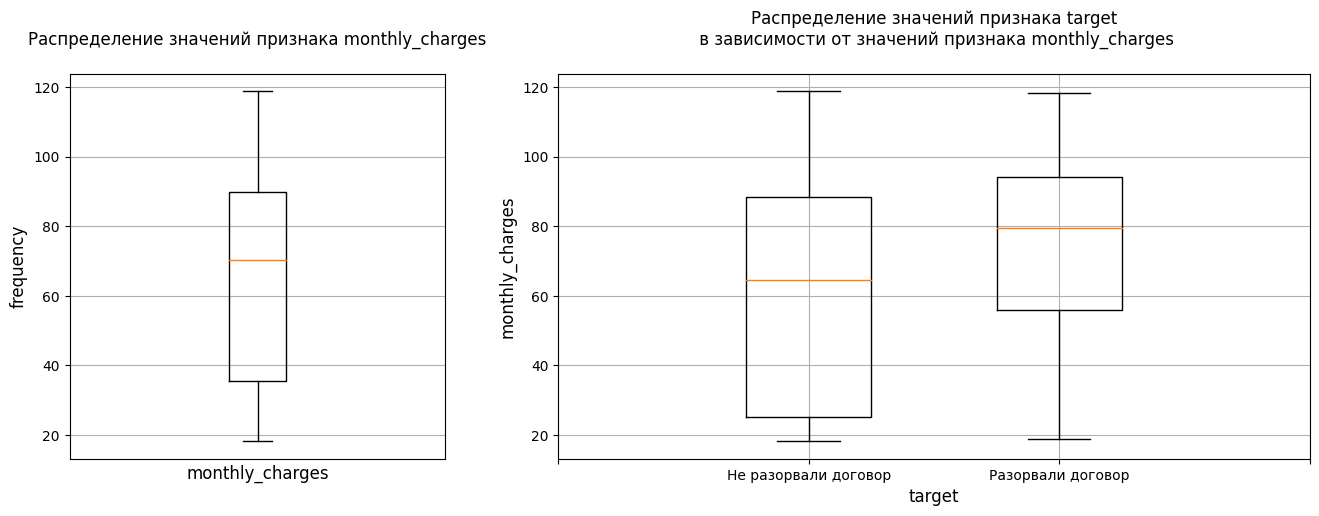

In [189]:
plot_multi_box(
    data=data, 
    col_x='monthly_charges', 
    data_corr=data_corr
)

>Можно было бы сделать заключение, что абоненты разрывают договор при более высоких тратах в месяц. Однако следует учитывать, что были выделены разные группы пользователей по расходам в месяц.

>Необходимо:
>
>* Определить наличие или отсутствие зависимости целевого признака от расходов абонента в месяц в зависимости от группы расходов абонента в месяц.

Выведение на экран графика распределения значений в столбце набора данных:

С фильтром по столбцу monthly_charges_group по значению от 40 до 60


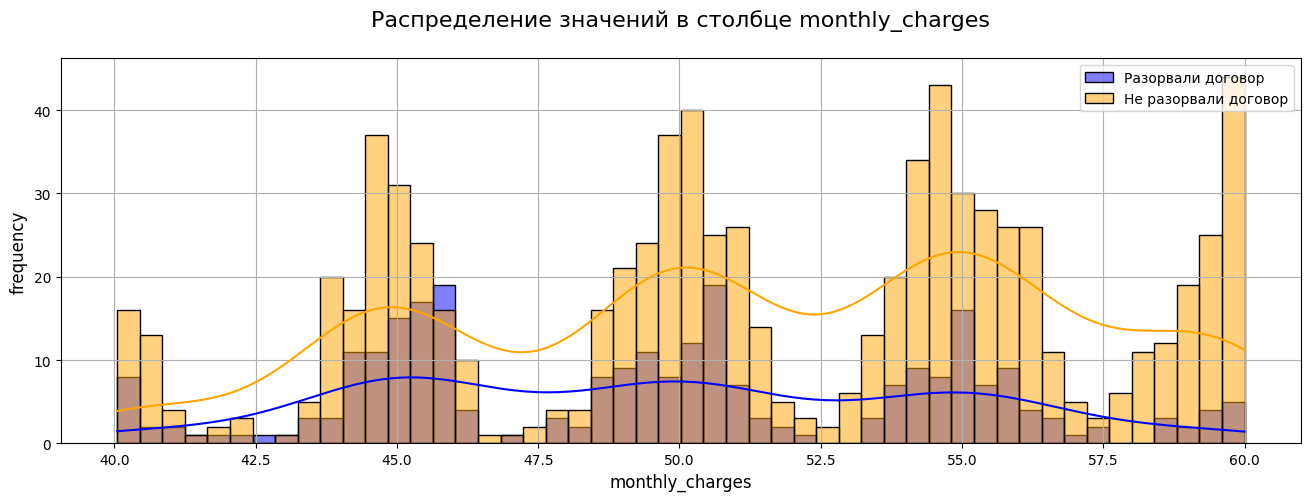


С фильтром по столбцу monthly_charges_group по значению от 60 до 120


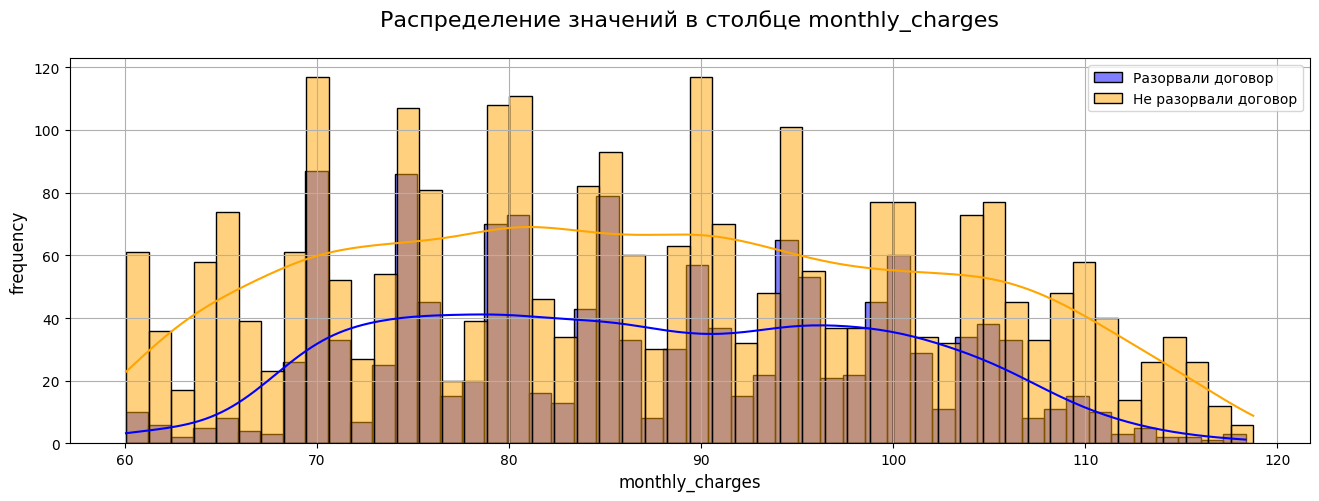


С фильтром по столбцу monthly_charges_group по значению до 40


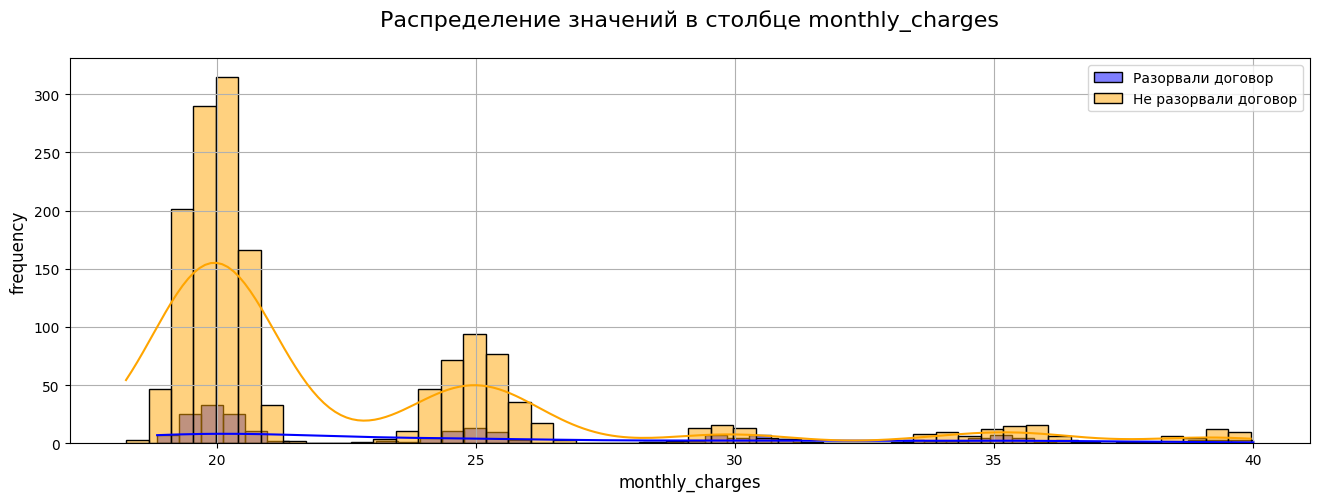

In [190]:
plot_multi_hist_filter(
    data=data,
    col_filter='monthly_charges_group',
    col_x='monthly_charges'
)

<div style="background-color: #296eaa10; border: 2px dashed #296eaa; border-radius: 5px; padding: 15px 30px">
    
**Вывод**

* Целевой признак **зависит** от расходов абонента за месяц.

</div>

---

#### 2.2.5 Столбец `monthly_charges_group`

>Необходимо:
>
>* Определить наличие или отсутствие зависимости целевого признака от группы расходов абонента за месяц.

Построение графика распределения значений столбца по значениям целевой переменной:

Распределение значений в столбце monthly_charges_group по значениям столбца target:


monthly_charges_group  count  fraction                target
0                 до 40   1585      0.23  Не разорвали договор
1                 до 40    214      0.03     Разорвали договор
2           от 40 до 60    786      0.11  Не разорвали договор
3           от 40 до 60    269      0.04     Разорвали договор
4          от 60 до 120   2702      0.39  Не разорвали договор
5          от 60 до 120   1349      0.20     Разорвали договор

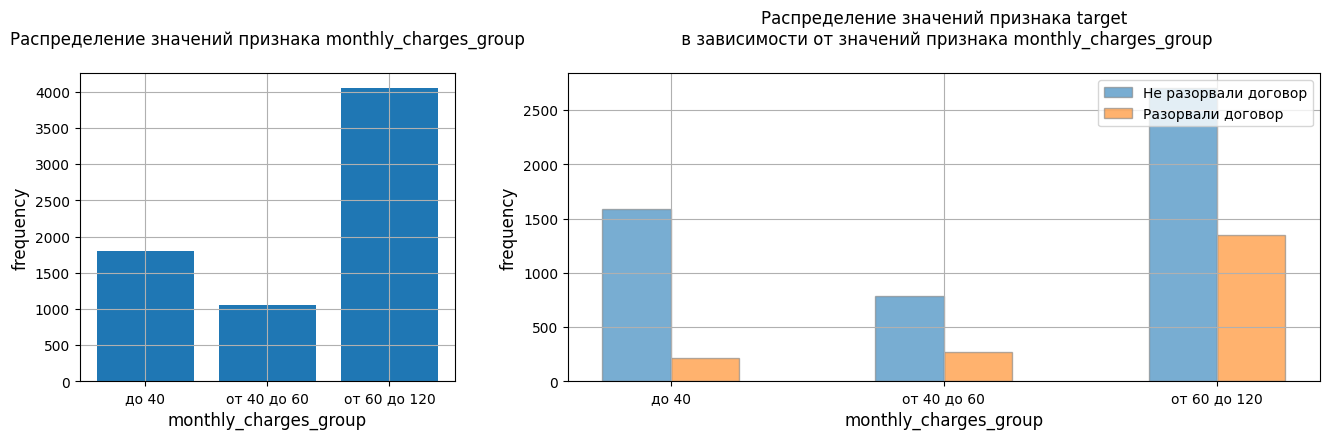

In [191]:
plot_multi_bar(data=data, col_x='monthly_charges_group')

<div style="background-color: #296eaa10; border: 2px dashed #296eaa; border-radius: 5px; padding: 15px 30px">
    
**Вывод**

* Целевой признак **зависит** от группы расходов абонента за месяц. Также этот признак более предпочтителен относительно признака `monthly_charges`, поскольку разделяет расходы на ограниченное число категорий. А так как эти признаки линейно зависимы, будет использован **только** признак `monthly_charges_group`.
</div>

---

#### 2.2.6 Столбец `total_charges`

>Необходимо:
>
>* Определить наличие или отсутствие зависимости целевого признака от общих расходов абонента.

Выведение на экран графика распределения значений в столбце набора данных:

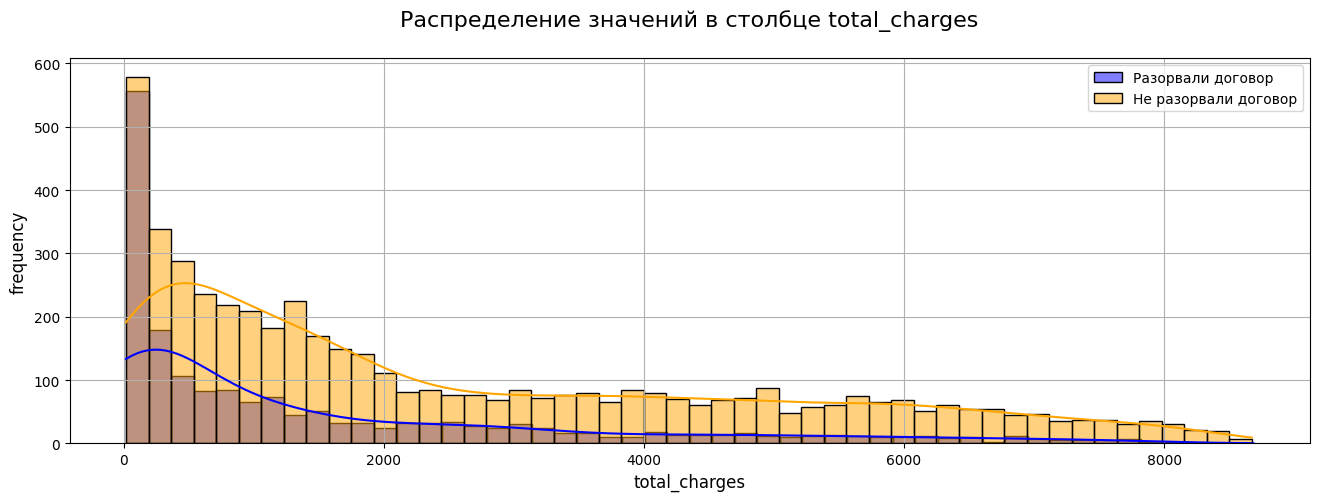

In [192]:
plot_multi_hist(data, 'total_charges')

>Распределение групп целевого признака имеет смещение влево.

>Можно было бы сделать заключение, что абоненты чаще разрывают договор сразу после оплаты. Однако следует учитывать, что есть разные типы оплаты с разными соответствующими им сроками оплаты.

>Необходимо:
>
>* Определить наличие или отсутствие зависимости целевого признака от расходов абонента в месяц в зависимости от группы общих расходов.

Выведение на экран графика распределения значений в столбце набора данных:

С фильтром по столбцу total_charges_group по значению до 1000


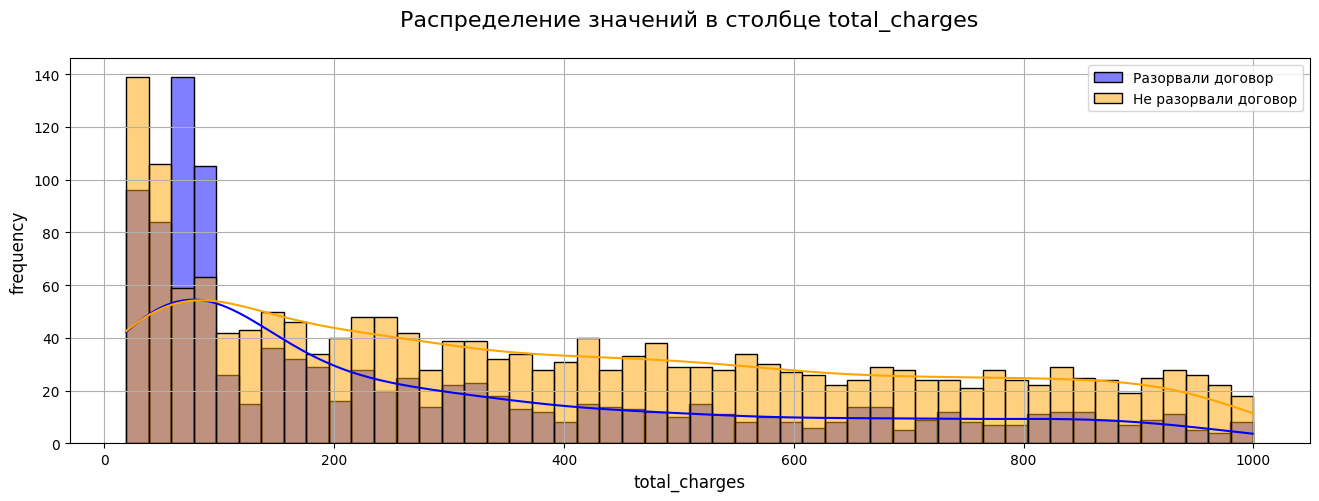


С фильтром по столбцу total_charges_group по значению от 3000 до 4000


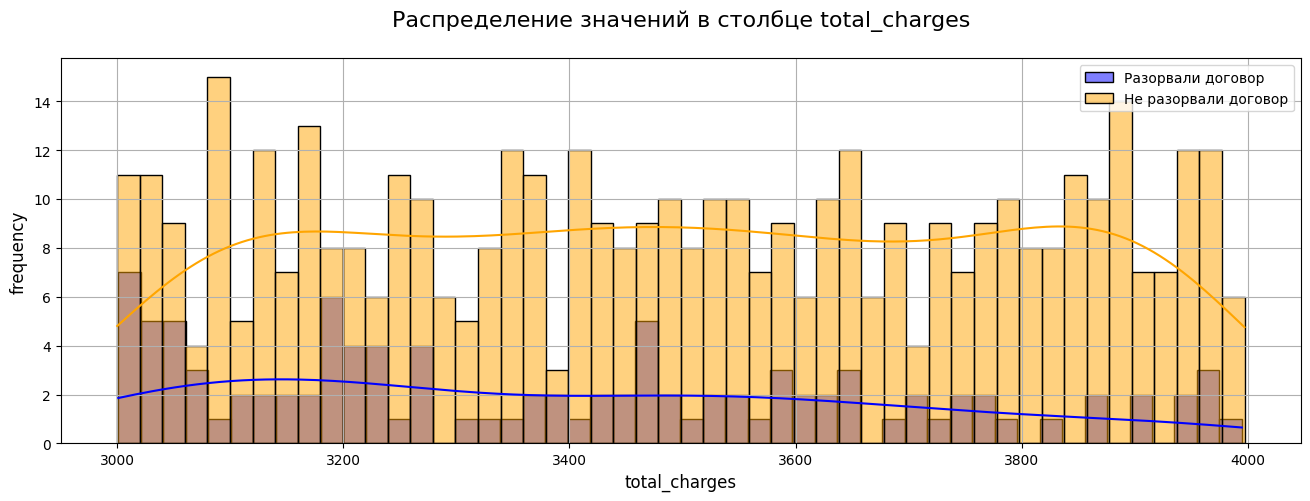


С фильтром по столбцу total_charges_group по значению от 5000 до 6000


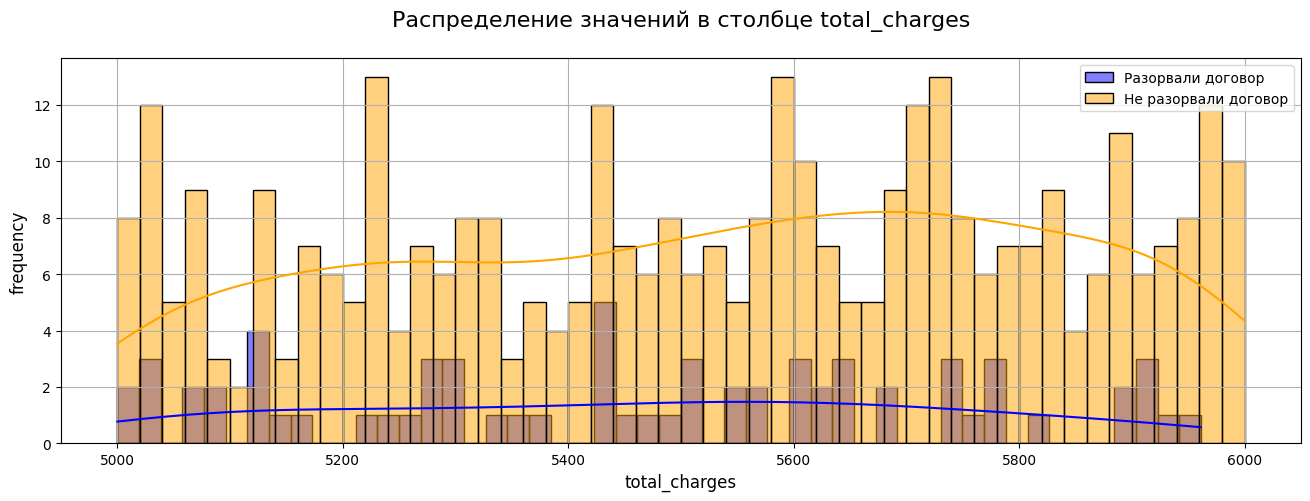


С фильтром по столбцу total_charges_group по значению от 4000 до 5000


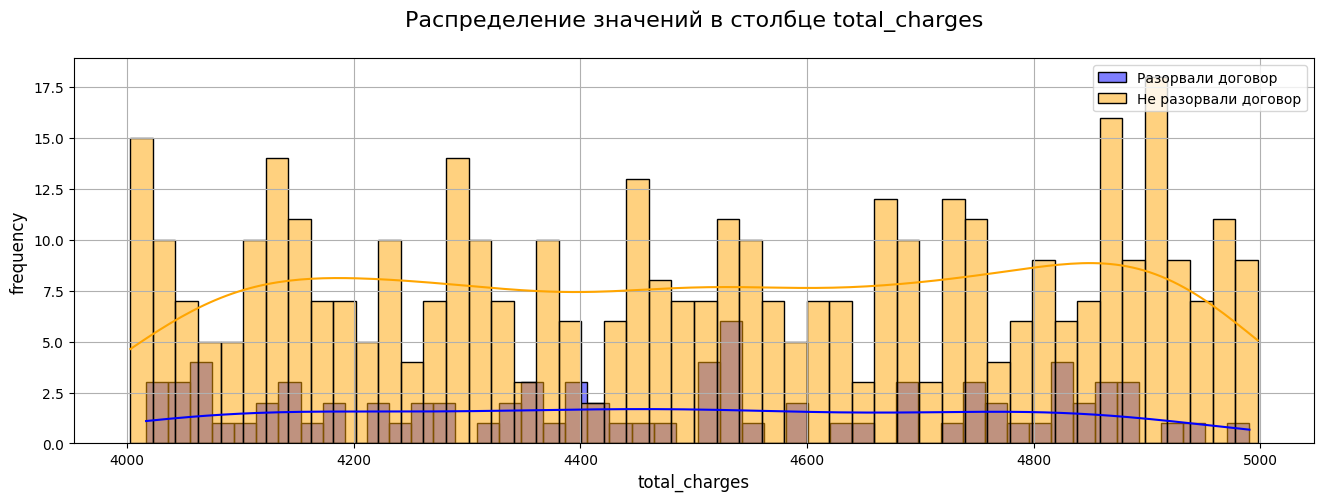


С фильтром по столбцу total_charges_group по значению от 1000 до 2000


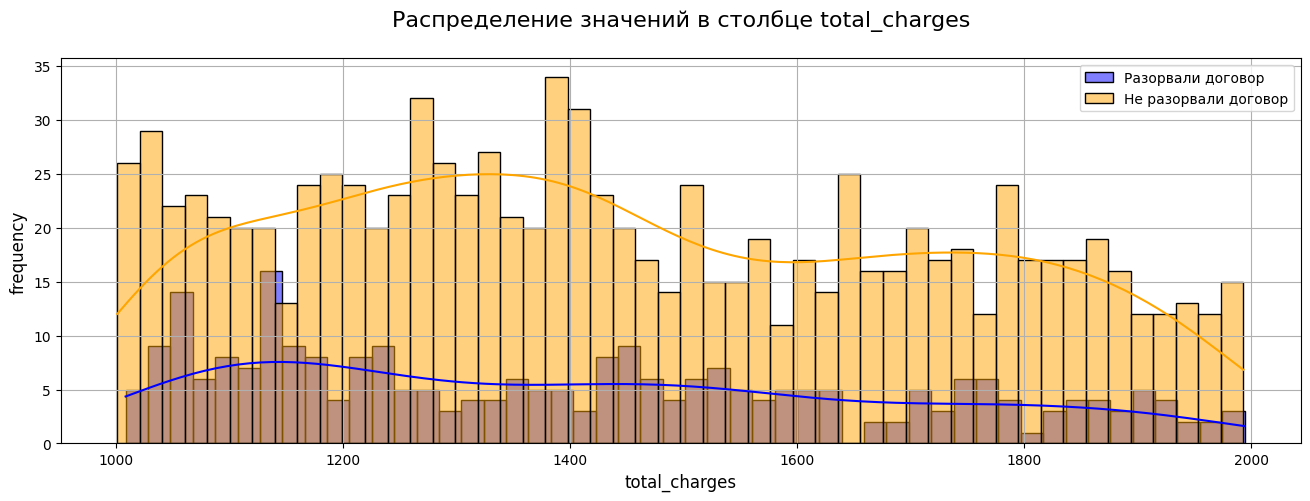


С фильтром по столбцу total_charges_group по значению от 2000 до 3000


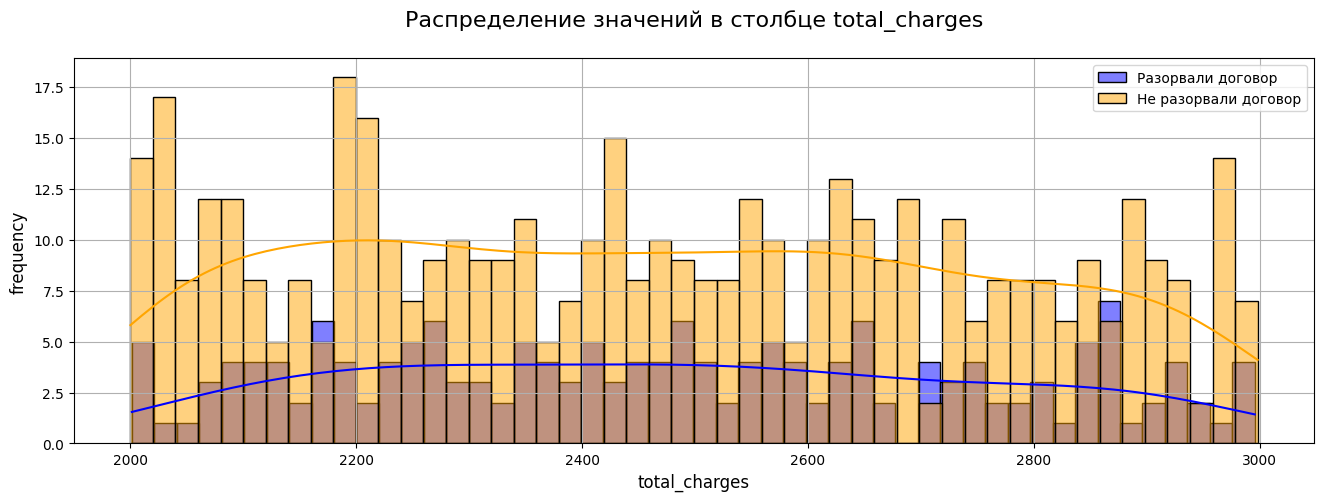


С фильтром по столбцу total_charges_group по значению от 7000 до 8000


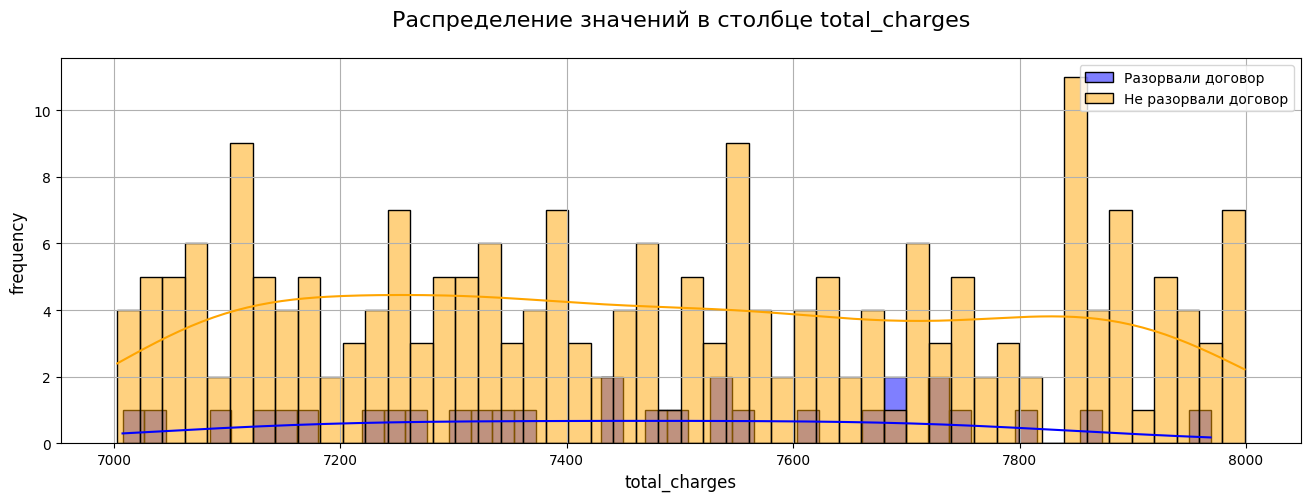


С фильтром по столбцу total_charges_group по значению от 6000 до 7000


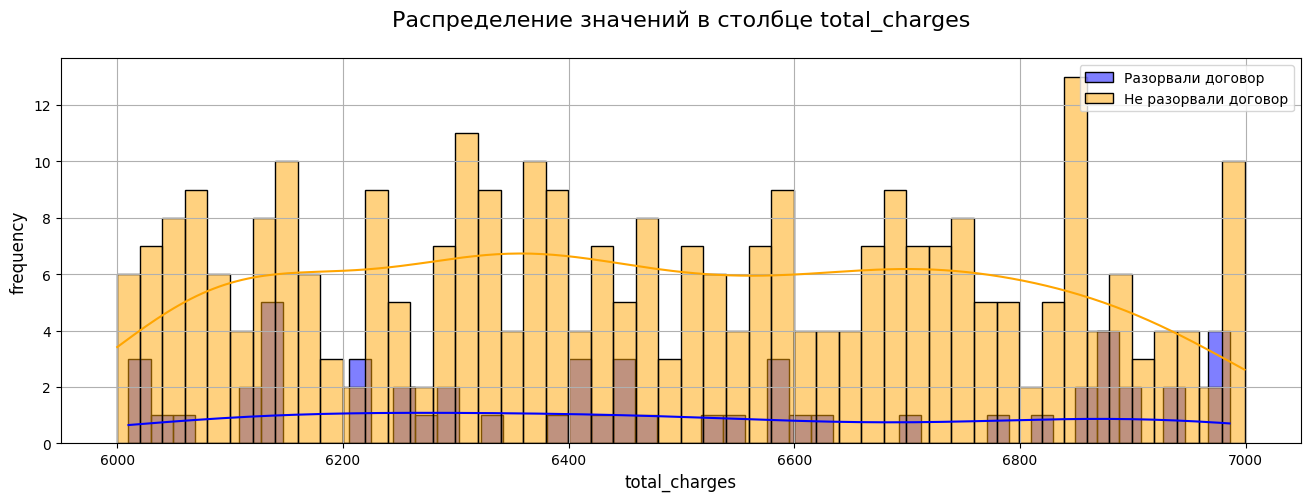


С фильтром по столбцу total_charges_group по значению от 8000


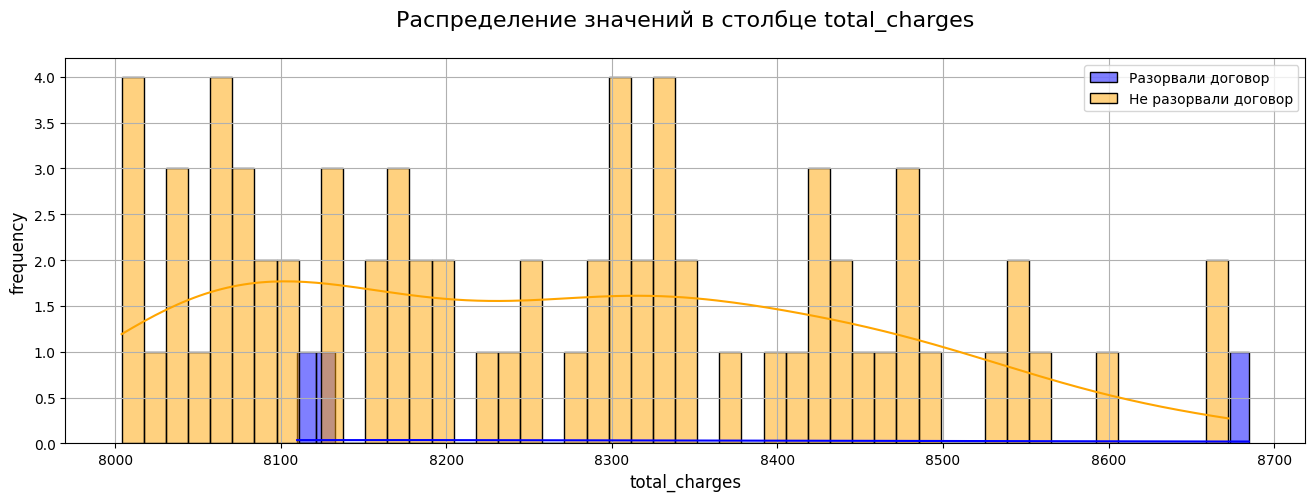

In [193]:
plot_multi_hist_filter(
    data=data,
    col_filter='total_charges_group',
    col_x='total_charges'
)

<div style="background-color: #296eaa10; border: 2px dashed #296eaa; border-radius: 5px; padding: 15px 30px">
    
**Вывод**

* Целевой признак **зависит** от общих расходов абонента.

</div>

---

#### 2.2.7 Столбец `total_charges_group`

>Необходимо:
>
>* Определить наличие или отсутствие зависимости целевого признака от группы расходов абонента за месяц.

Построение графика распределения значений столбца по значениям целевой переменной:

Распределение значений в столбце total_charges_group по значениям столбца target:


total_charges_group  count  fraction                target
0              до 1000   1795      0.26  Не разорвали договор
1              до 1000   1055      0.15     Разорвали договор
2      от 1000 до 2000    991      0.14  Не разорвали договор
3      от 1000 до 2000    266      0.04     Разорвали договор
4      от 2000 до 3000    466      0.07  Не разорвали договор
5      от 2000 до 3000    171      0.02     Разорвали договор
6      от 3000 до 4000    444      0.06  Не разорвали договор
7      от 3000 до 4000    103      0.01     Разорвали договор
9      от 4000 до 5000     83      0.01     Разорвали договор
8      от 4000 до 5000    419      0.06  Не разорвали договор
10     от 5000 до 6000    366      0.05  Не разорвали договор
11     от 5000 до 6000     67      0.01     Разорвали договор
12     от 6000 до 7000    308      0.04  Не разорвали договор
13     от 6000 до 7000     54      0.01     Разорвали договор
14     от 7000 до 8000    212      0.03  Не разорвали договор
15     от 7000 до 8000     30      0.00     Разорвали договор
16             от 8000     72      0.01  Не разорвали договор
17             от 8000      3      0.00     Разорвали договор

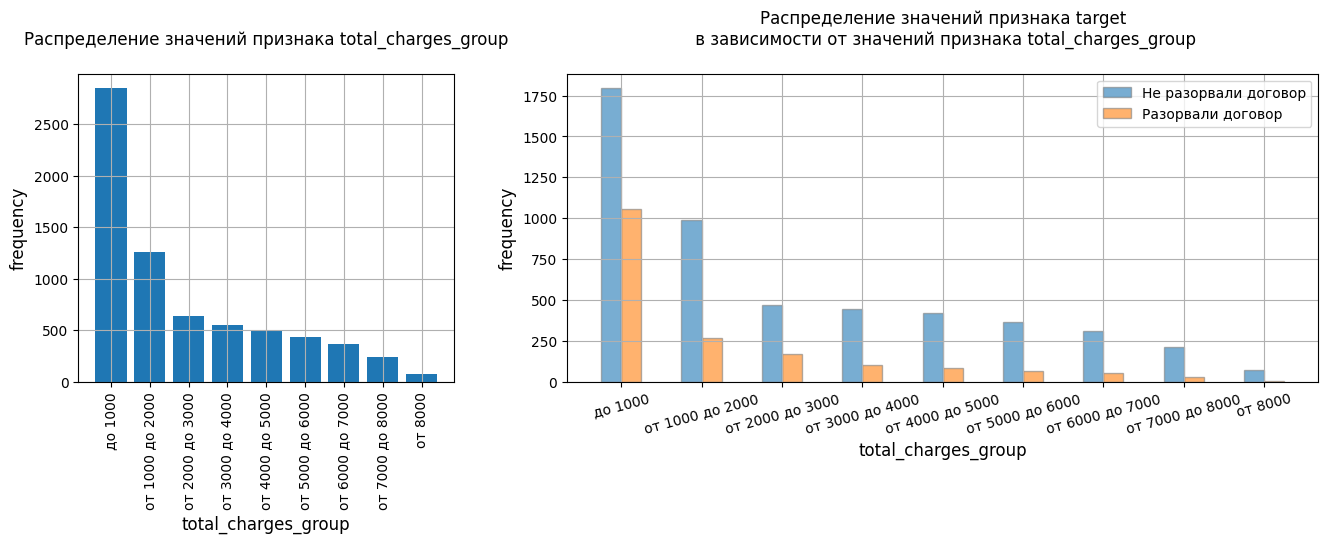

In [194]:
plot_multi_bar(data=data, col_x='total_charges_group')

<div style="background-color: #296eaa10; border: 2px dashed #296eaa; border-radius: 5px; padding: 15px 30px">
    
**Вывод**

* Целевой признак **зависит** от группы общих расходов абонента. Также этот признак более предпочтителен относительно признака `total_charges`, поскольку разделяет расходы на ограниченное число категорий. А так как эти признаки линейно зависимы, будет использован **только** признак `total_charges_group`.

</div>

---

#### 2.2.8 Столбец `is_male`

>Необходимо:
>
>* Определить наличие или отсутствие зависимости целевого признака от пола абонента.

Построение графика распределения значений столбца по значениям целевой переменной:

Корреляция с другими принаками:


type  paperless_billing  payment_method  monthly_charges  \
is_male   0.0                0.0             0.0             0.02   

         total_charges  is_male  is_senior_citizen  is_married  has_children  \
is_male            0.0      1.0                0.0         0.0           0.0   

         internet_service  ...  has_streaming_movies  has_multiple_lines  \
is_male               0.0  ...                   0.0                0.01   

         service  target  monthly_charges_group  total_charges_group  \
is_male      0.0     0.0                    0.0                  0.0   

         contract_duration_days  contract_duration_years  \
is_male                     0.0                      0.0   

         contract_duration_months  days_until_payment_term  
is_male                       0.0                      0.0  

[1 rows x 25 columns]


Распределение значений в столбце is_male по значениям столбца target:


is_male  count  fraction                target
0  женщины   2501      0.36  Не разорвали договор
1  женщины    917      0.13     Разорвали договор
2  мужчины   2572      0.37  Не разорвали договор
3  мужчины    915      0.13     Разорвали договор

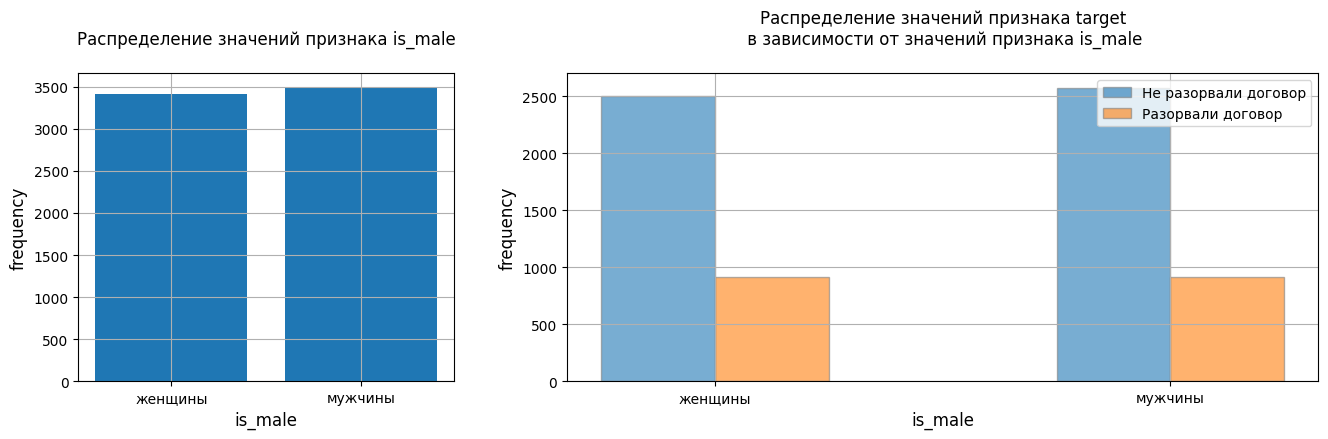

In [195]:
plot_multi_bar(
    data=data,
    col_x='is_male',
    col_x_labels={0: 'женщины', 1: 'мужчины'}, 
    data_corr=data_corr
)

<div style="background-color: #296eaa10; border: 2px dashed #296eaa; border-radius: 5px; padding: 15px 30px">
    
**Вывод**

* Целевой признак **не зависит** от пола абонента.

</div>

---

#### 2.2.9 Столбец `is_senior_citizen`

>Необходимо:
>
>* Определить наличие или отсутствие зависимости целевого признака от возраста абонента.

Построение графика распределения значений столбца по значениям целевой переменной:

Корреляция с другими принаками:


type  paperless_billing  payment_method  monthly_charges  \
is_senior_citizen  0.09               0.24            0.29              0.3   

                   total_charges  is_male  is_senior_citizen  is_married  \
is_senior_citizen           0.15      0.0                1.0        0.02   

                   has_children  internet_service  ...  has_streaming_movies  \
is_senior_citizen          0.32              0.16  ...                  0.18   

                   has_multiple_lines  service  target  monthly_charges_group  \
is_senior_citizen                0.22     0.28    0.23                   0.12   

                   total_charges_group  contract_duration_days  \
is_senior_citizen                 0.11                    0.03   

                   contract_duration_years  contract_duration_months  \
is_senior_citizen                     0.05                      0.04   

                   days_until_payment_term  
is_senior_citizen                     0.17  

[1 rows x 25 columns]


Распределение значений в столбце is_senior_citizen по значениям столбца target:


is_senior_citizen  count  fraction                target
0      не пенсионер   4419      0.64  Не разорвали договор
1      не пенсионер   1366      0.20     Разорвали договор
2         пенсионер    654      0.09  Не разорвали договор
3         пенсионер    466      0.07     Разорвали договор

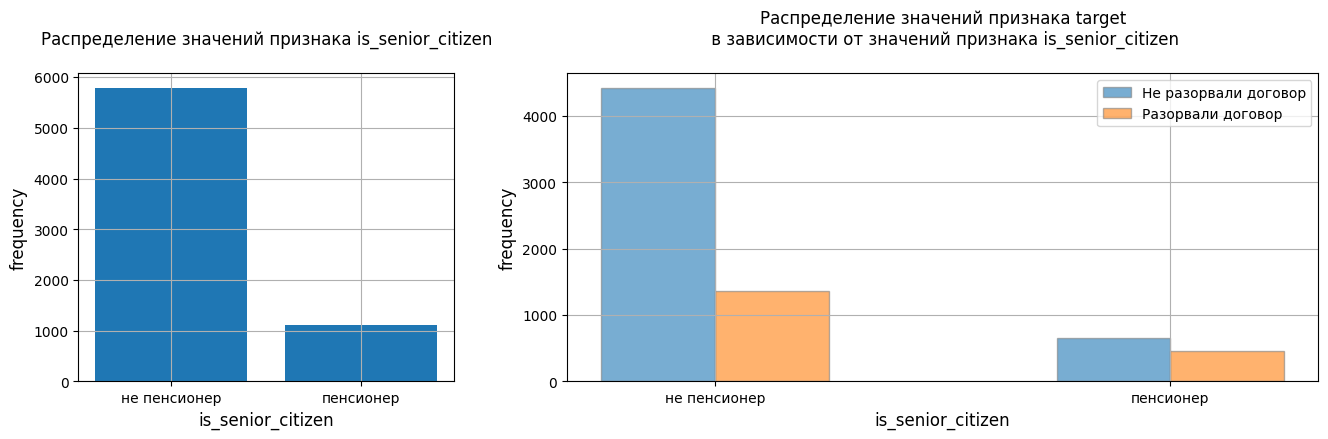

In [196]:
plot_multi_bar(
    data=data,
    col_x='is_senior_citizen',
    col_x_labels={0: 'не пенсионер', 1: 'пенсионер'}, 
    data_corr=data_corr
)

<div style="background-color: #296eaa10; border: 2px dashed #296eaa; border-radius: 5px; padding: 15px 30px">
    
**Вывод**

* Целевой признак **зависит** от возраста абонента.

</div>

---

#### 2.2.10 Столбец `is_married`

>Необходимо:
>
>* Определить наличие или отсутствие зависимости целевого признака от семейного положения абонента.

Построение графика распределения значений столбца по значениям целевой переменной:

Корреляция с другими принаками:


type  paperless_billing  payment_method  monthly_charges  \
is_married  0.18               0.01            0.25              0.2   

            total_charges  is_male  is_senior_citizen  is_married  \
is_married           0.43      0.0               0.02         1.0   

            has_children  internet_service  ...  has_streaming_movies  \
is_married          0.65               0.0  ...                  0.19   

            has_multiple_lines  service  target  monthly_charges_group  \
is_married                0.23      0.0    0.23                   0.06   

            total_charges_group  contract_duration_days  \
is_married                 0.33                     0.0   

            contract_duration_years  contract_duration_months  \
is_married                     0.05                       0.0   

            days_until_payment_term  
is_married                     0.36  

[1 rows x 25 columns]


Распределение значений в столбце is_married по значениям столбца target:


is_married  count  fraction                target
2     в браке   2677      0.39  Не разорвали договор
3     в браке    653      0.09     Разорвали договор
0  не в браке   2396      0.35  Не разорвали договор
1  не в браке   1179      0.17     Разорвали договор

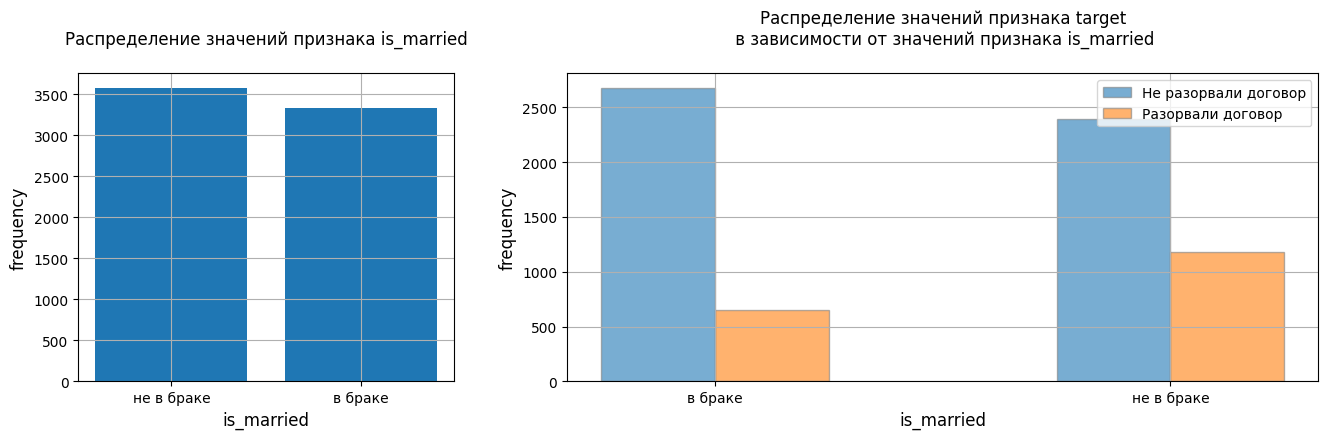

In [197]:
plot_multi_bar(
    data=data,
    col_x='is_married',
    col_x_labels={0: 'не в браке', 1: 'в браке'}, 
    data_corr=data_corr
)

<div style="background-color: #296eaa10; border: 2px dashed #296eaa; border-radius: 5px; padding: 15px 30px">
    
**Вывод**

* Несмотря на значение матрицы корреляции, распределение классов в целевом признаке **зависит** от семейного положения абонента.

</div>

---

#### 2.2.11 Столбец `has_children`

>Необходимо:
>
>* Определить наличие или отсутствие зависимости целевого признака от наличия у абонента детей.

Построение графика распределения значений столбца по значениям целевой переменной:

Корреляция с другими принаками:


type  paperless_billing  payment_method  monthly_charges  \
has_children  0.15               0.17            0.22             0.18   

              total_charges  is_male  is_senior_citizen  is_married  \
has_children           0.12      0.0               0.32        0.65   

              has_children  internet_service  ...  has_streaming_movies  \
has_children           1.0              0.11  ...                  0.05   

              has_multiple_lines  service  target  monthly_charges_group  \
has_children                0.03     0.21    0.25                   0.07   

              total_charges_group  contract_duration_days  \
has_children                 0.08                     0.0   

              contract_duration_years  contract_duration_months  \
has_children                     0.05                      0.01   

              days_until_payment_term  
has_children                     0.29  

[1 rows x 25 columns]


Распределение значений в столбце has_children по значениям столбца target:


has_children  count  fraction                target
2     имеют детей   1740      0.25  Не разорвали договор
3     имеют детей    320      0.05     Разорвали договор
0  не имеют детей   3333      0.48  Не разорвали договор
1  не имеют детей   1512      0.22     Разорвали договор

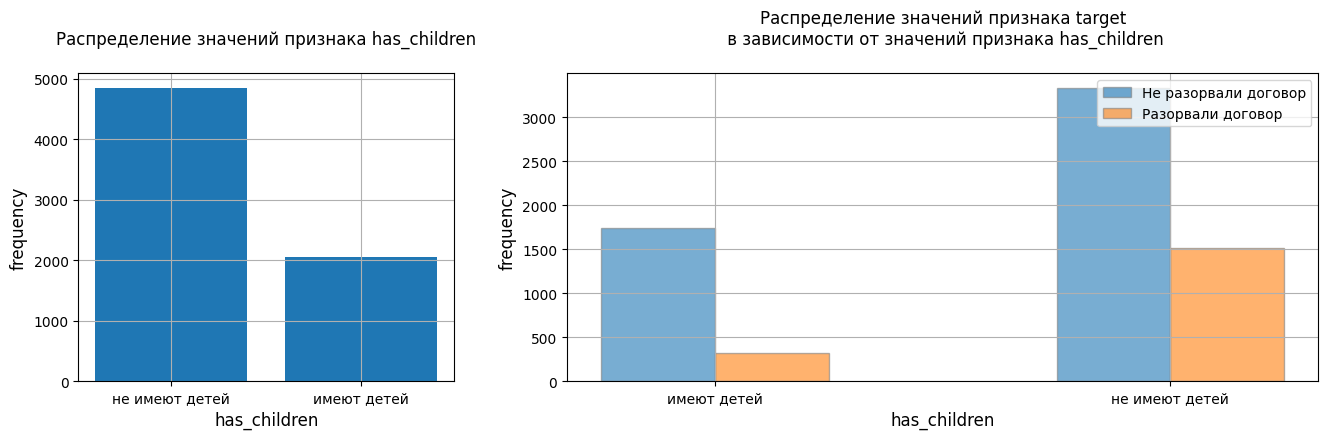

In [198]:
plot_multi_bar(
    data=data,
    col_x='has_children',
    col_x_labels={0: 'не имеют детей', 1: 'имеют детей'}, 
    data_corr=data_corr
)

<div style="background-color: #296eaa10; border: 2px dashed #296eaa; border-radius: 5px; padding: 15px 30px">
    
**Вывод**

* Несмотря на значение матрицы корреляции, распределение классов в целевом признаке **зависит** от наличия у абонента детей.

</div>

---

#### 2.2.12 Столбец `internet_service`

>Необходимо:
>
>* Определить наличие или отсутствие зависимости целевого признака от типа подключения.

Построение графика распределения значений столбца по значениям целевой переменной:

Распределение значений в столбце internet_service по значениям столбца target:


internet_service  count  fraction                target
0              dsl   1926      0.28  Не разорвали договор
1              dsl    451      0.07     Разорвали договор
2      fiber optic   1772      0.26  Не разорвали договор
3      fiber optic   1268      0.18     Разорвали договор
4      no internet   1375      0.20  Не разорвали договор
5      no internet    113      0.02     Разорвали договор

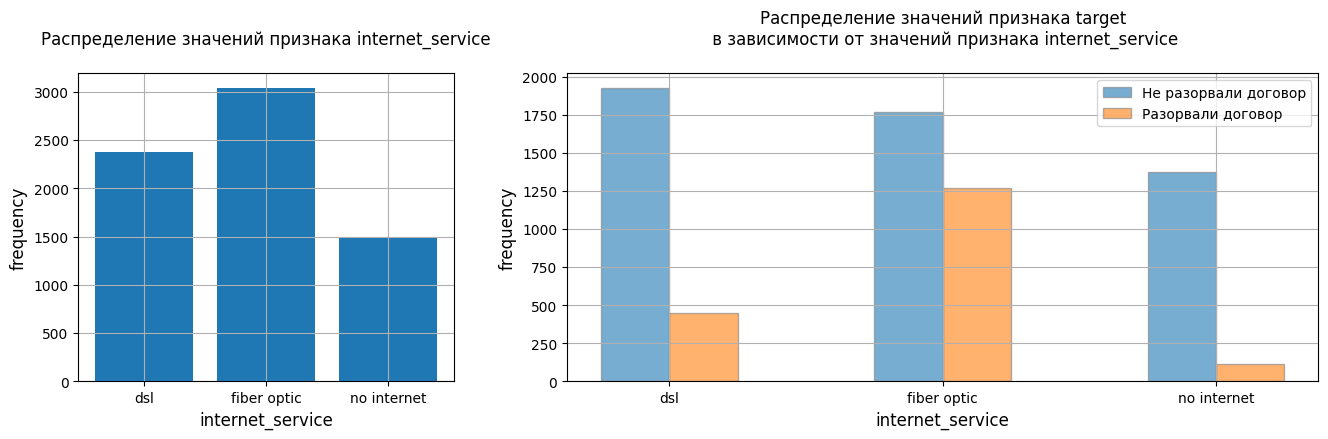

In [199]:
plot_multi_bar(data=data, col_x='internet_service')

<div style="background-color: #296eaa10; border: 2px dashed #296eaa; border-radius: 5px; padding: 15px 30px">
    
**Вывод**

* Целевой признак **зависит** от типа подключения.

</div>

---

#### 2.2.13 Столбец `service`

>Необходимо:
>
>* Определить наличие или отсутствие зависимости целевого признака от типа услуг.

Построение графика распределения значений столбца по значениям целевой переменной:

Распределение значений в столбце service по значениям столбца target:


service  count  fraction                target
0    internet   3698      0.54  Не разорвали договор
1    internet   1719      0.25     Разорвали договор
2  stationary   1375      0.20  Не разорвали договор
3  stationary    113      0.02     Разорвали договор

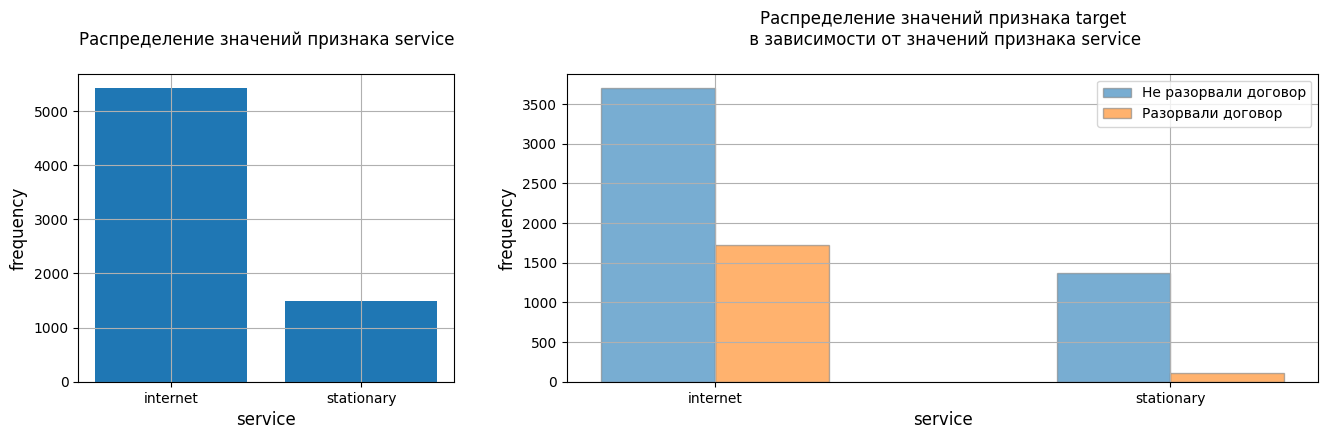

In [200]:
plot_multi_bar(data=data, col_x='service')

<div style="background-color: #296eaa10; border: 2px dashed #296eaa; border-radius: 5px; padding: 15px 30px">
    
**Вывод**

* Целевой признак **зависит** от типа услуг. Однако в целом более информативным будет признак `internet_service`, поскольку он также указывает на тип подключения. А так как эти признаки линейно зависимы, признак с типом услуг **не будет** использован при формировании итогового набора признаков.

</div>

---

#### 2.2.14 Столбец `has_online_security`

>Необходимо:
>
>* Определить наличие или отсутствие зависимости целевого признака от наличия блокировки опасных сайтов.

Построение графика распределения значений столбца по значениям целевой переменной:

Корреляция с другими принаками:


type  paperless_billing  payment_method  monthly_charges  \
has_online_security  0.15                0.0            0.26             0.55   

                     total_charges  is_male  is_senior_citizen  is_married  \
has_online_security           0.54     0.02               0.06        0.22   

                     has_children  internet_service  ...  \
has_online_security          0.13              0.24  ...   

                     has_streaming_movies  has_multiple_lines  service  \
has_online_security                  0.29                0.18      0.5   

                     target  monthly_charges_group  total_charges_group  \
has_online_security    0.27                   0.19                 0.42   

                     contract_duration_days  contract_duration_years  \
has_online_security                     0.0                     0.05   

                     contract_duration_months  days_until_payment_term  
has_online_security                       0.0                     0.31  

[1 rows x 25 columns]


Распределение значений в столбце internet_service по значениям столбца target:


internet_service has_online_security  fraction  count                target
0              dsl      без блокировки      0.13    878  Не разорвали договор
1              dsl      без блокировки      0.05    341     Разорвали договор
2              dsl       с блокировкой      0.15   1048  Не разорвали договор
3              dsl       с блокировкой      0.02    110     Разорвали договор
4      fiber optic      без блокировки      0.16   1128  Не разорвали договор
5      fiber optic      без блокировки      0.16   1091     Разорвали договор
6      fiber optic       с блокировкой      0.09    644  Не разорвали договор
7      fiber optic       с блокировкой      0.03    177     Разорвали договор
8      no internet      без блокировки      0.20   1375  Не разорвали договор
9      no internet      без блокировки      0.02    113     Разорвали договор

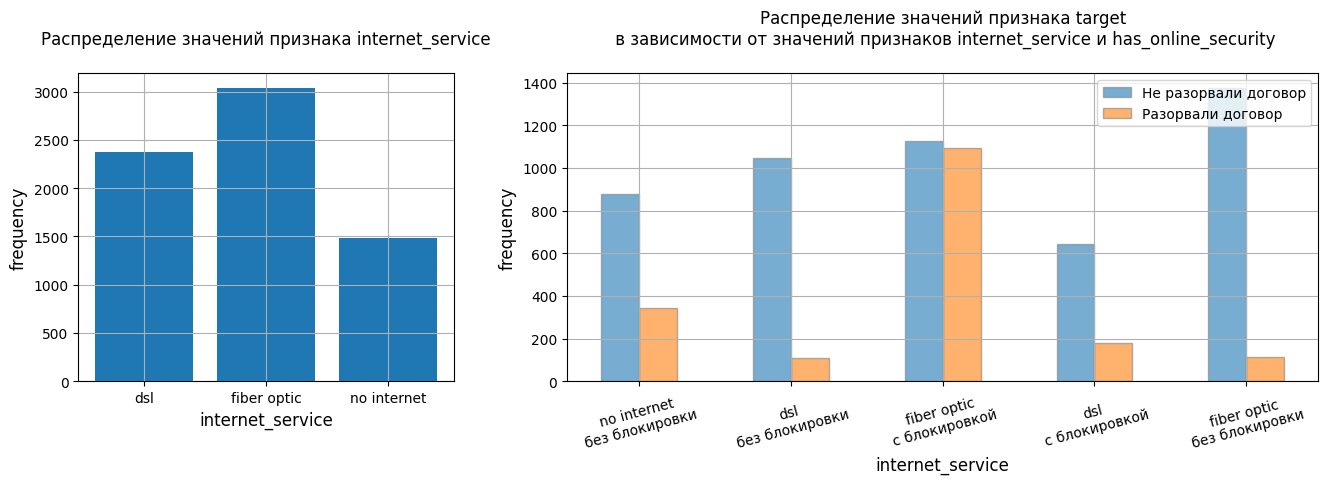

In [201]:
plot_multi_bar(
    data=data,
    col_x='internet_service',
    col_y='has_online_security',
    col_y_labels={0: 'без блокировки', 1: 'с блокировкой'},
    data_corr=data_corr
)

<div style="background-color: #296eaa10; border: 2px dashed #296eaa; border-radius: 5px; padding: 15px 30px">
    
**Вывод**

* Целевой признак **зависит** от наличия блокировки опасных сайтов.

</div>

---

#### 2.2.15 Столбец `has_online_backup`

>Необходимо:
>
>* Определить наличие или отсутствие зависимости целевого признака от наличия резервного копирования данных.

Построение графика распределения значений столбца по значениям целевой переменной:

Корреляция с другими принаками:


type  paperless_billing  payment_method  monthly_charges  \
has_online_backup   0.1               0.19            0.28             0.63   

                   total_charges  is_male  is_senior_citizen  is_married  \
has_online_backup           0.66      0.0                0.1        0.22   

                   has_children  internet_service  ...  has_streaming_movies  \
has_online_backup          0.04              0.23  ...                  0.41   

                   has_multiple_lines  service  target  monthly_charges_group  \
has_online_backup                0.37     0.56    0.13                   0.24   

                   total_charges_group  contract_duration_days  \
has_online_backup                 0.51                    0.03   

                   contract_duration_years  contract_duration_months  \
has_online_backup                     0.03                      0.02   

                   days_until_payment_term  
has_online_backup                     0.21  

[1 rows x 25 columns]


Распределение значений в столбце internet_service по значениям столбца target:


internet_service has_online_backup  fraction  count                target
0              dsl      с хранилищем      0.14    977  Не разорвали договор
1              dsl      с хранилищем      0.05    336     Разорвали договор
2              dsl     без хранилица      0.14    949  Не разорвали договор
3              dsl     без хранилица      0.02    115     Разорвали договор
4      fiber optic      с хранилищем      0.12    855  Не разорвали договор
5      fiber optic      с хранилищем      0.13    875     Разорвали договор
6      fiber optic     без хранилица      0.13    917  Не разорвали договор
7      fiber optic     без хранилица      0.06    393     Разорвали договор
8      no internet      с хранилищем      0.20   1375  Не разорвали договор
9      no internet      с хранилищем      0.02    113     Разорвали договор

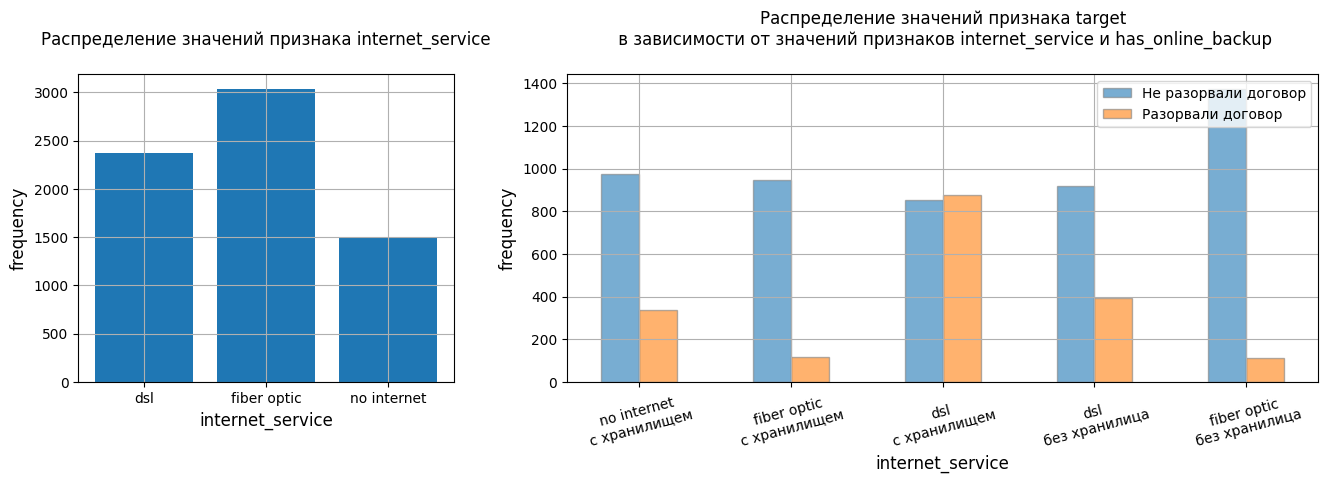

In [202]:
plot_multi_bar(
    data=data,
    col_x='internet_service',
    col_y='has_online_backup',
    col_y_labels={0: 'с хранилищем', 1: 'без хранилица'},
    data_corr=data_corr
)

<div style="background-color: #296eaa10; border: 2px dashed #296eaa; border-radius: 5px; padding: 15px 30px">
    
**Вывод**

* Несмотря на значение матрицы корреляции, распределение классов в целевом признаке **зависит** от резервного копирования данных.

</div>

---

#### 2.2.16 Столбец `has_device_protection`

>Необходимо:
>
>* Определить наличие или отсутствие зависимости целевого признака от наличия антивируса.

Построение графика распределения значений столбца по значениям целевой переменной:

Корреляция с другими принаками:


type  paperless_billing  payment_method  \
has_device_protection  0.14               0.16            0.31   

                       monthly_charges  total_charges  is_male  \
has_device_protection             0.67           0.67      0.0   

                       is_senior_citizen  is_married  has_children  \
has_device_protection               0.09        0.24          0.02   

                       internet_service  ...  has_streaming_movies  \
has_device_protection              0.23  ...                  0.59   

                       has_multiple_lines  service  target  \
has_device_protection                 0.4     0.56     0.1   

                       monthly_charges_group  total_charges_group  \
has_device_protection                   0.25                 0.52   

                       contract_duration_days  contract_duration_years  \
has_device_protection                     0.0                     0.02   

                       contract_duration_months  days_until_payment_term  
has_device_protection                       0.0                     0.29  

[1 rows x 25 columns]


Распределение значений в столбце internet_service по значениям столбца target:


internet_service has_device_protection  fraction  count  \
0              dsl        без антивируса      0.14   1000   
1              dsl        без антивируса      0.05    336   
2              dsl         с антивирусом      0.13    926   
3              dsl         с антивирусом      0.02    115   
4      fiber optic        без антивируса      0.12    858   
5      fiber optic        без антивируса      0.12    853   
6      fiber optic         с антивирусом      0.13    914   
7      fiber optic         с антивирусом      0.06    415   
8      no internet        без антивируса      0.20   1375   
9      no internet        без антивируса      0.02    113   

                 target  
0  Не разорвали договор  
1     Разорвали договор  
2  Не разорвали договор  
3     Разорвали договор  
4  Не разорвали договор  
5     Разорвали договор  
6  Не разорвали договор  
7     Разорвали договор  
8  Не разорвали договор  
9     Разорвали договор

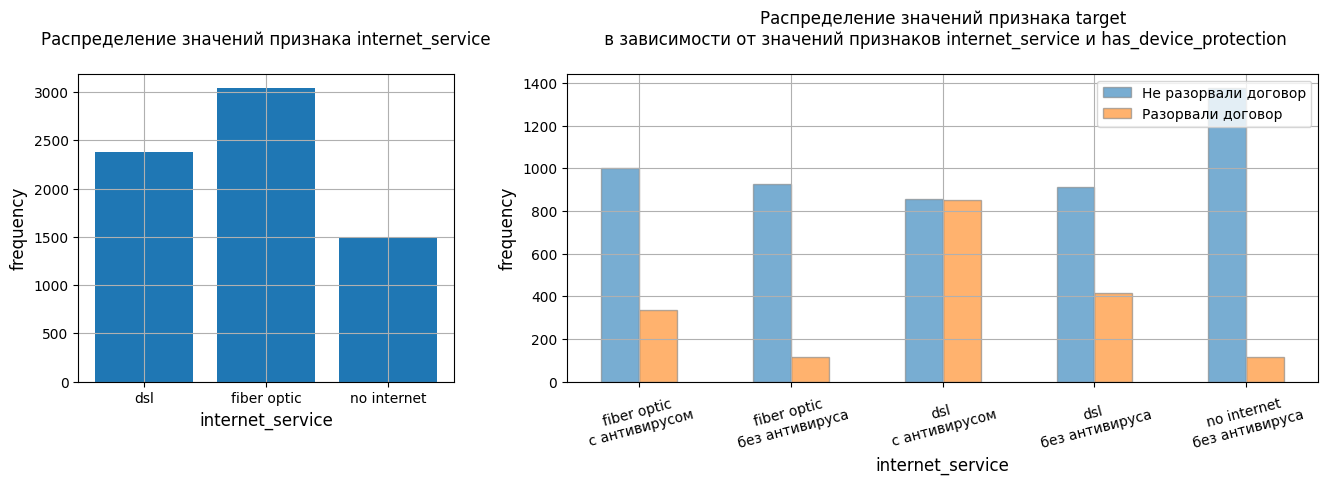

In [203]:
plot_multi_bar(
    data=data,
    col_x='internet_service',
    col_y='has_device_protection',
    col_y_labels={0: 'без антивируса', 1: 'с антивирусом'},
    data_corr=data_corr
)

<div style="background-color: #296eaa10; border: 2px dashed #296eaa; border-radius: 5px; padding: 15px 30px">
    
**Вывод**

* Несмотря на значение матрицы корреляции, распределение классов в целевом признаке **зависит** от наличия антивируса.

</div>

---

#### 2.2.17 Столбец `has_tech_support`

>Необходимо:
>
>* Определить наличие или отсутствие зависимости целевого признака от наличия выделенной линии технической поддержки.

Построение графика распределения значений столбца по значениям целевой переменной:

Корреляция с другими принаками:


type  paperless_billing  payment_method  monthly_charges  \
has_tech_support  0.18               0.05            0.27             0.58   

                  total_charges  is_male  is_senior_citizen  is_married  \
has_tech_support           0.57      0.0               0.09        0.19   

                  has_children  internet_service  ...  has_streaming_movies  \
has_tech_support           0.1              0.24  ...                  0.42   

                  has_multiple_lines  service  target  monthly_charges_group  \
has_tech_support                 0.2      0.5    0.25                    0.2   

                  total_charges_group  contract_duration_days  \
has_tech_support                 0.43                     0.0   

                  contract_duration_years  contract_duration_months  \
has_tech_support                     0.05                       0.0   

                  days_until_payment_term  
has_tech_support                     0.37  

[1 rows x 25 columns]


Распределение значений в столбце internet_service по значениям столбца target:


internet_service  has_tech_support  fraction  count                target
0              dsl  без техподдержки      0.13    884  Не разорвали договор
1              dsl  без техподдержки      0.05    338     Разорвали договор
2              dsl   с техподдержкой      0.15   1042  Не разорвали договор
3              dsl   с техподдержкой      0.02    113     Разорвали договор
4      fiber optic  без техподдержки      0.16   1113  Не разорвали договор
5      fiber optic  без техподдержки      0.16   1077     Разорвали договор
6      fiber optic   с техподдержкой      0.10    659  Не разорвали договор
7      fiber optic   с техподдержкой      0.03    191     Разорвали договор
8      no internet  без техподдержки      0.20   1375  Не разорвали договор
9      no internet  без техподдержки      0.02    113     Разорвали договор

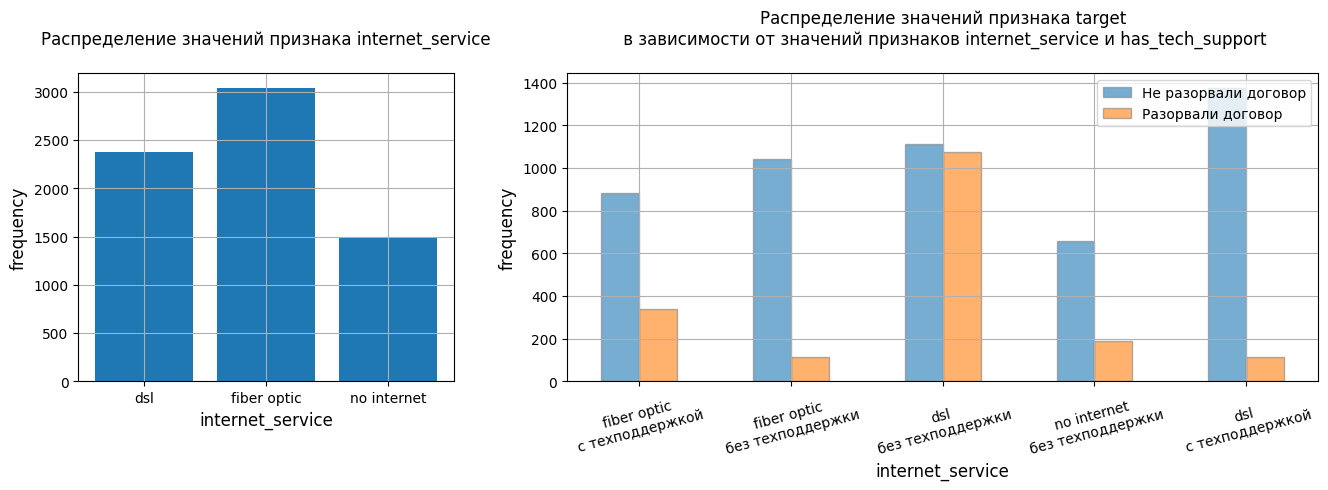

In [204]:
plot_multi_bar(
    data=data,
    col_x='internet_service',
    col_y='has_tech_support',
    col_y_labels={0: 'без техподдержки', 1: 'с техподдержкой'},
    data_corr=data_corr
)

<div style="background-color: #296eaa10; border: 2px dashed #296eaa; border-radius: 5px; padding: 15px 30px">
    
**Вывод**

* Несмотря на значение матрицы корреляции, распределение классов в целевом признаке **зависит** от наличия выделенной линии техподдержки.

</div>

---

#### 2.2.18 Столбец `has_streaming_tv`

>Необходимо:
>
>* Определить наличие или отсутствие зависимости целевого признака от наличия стримингого телевидения.

Построение графика распределения значений столбца по значениям целевой переменной:

Корреляция с другими принаками:


type  paperless_billing  payment_method  monthly_charges  \
has_streaming_tv  0.07               0.34            0.37             0.83   

                  total_charges  is_male  is_senior_citizen  is_married  \
has_streaming_tv           0.66      0.0               0.16         0.2   

                  has_children  internet_service  ...  has_streaming_movies  \
has_streaming_tv          0.01              0.27  ...                  0.74   

                  has_multiple_lines  service  target  monthly_charges_group  \
has_streaming_tv                0.44      0.6    0.09                   0.32   

                  total_charges_group  contract_duration_days  \
has_streaming_tv                 0.51                    0.03   

                  contract_duration_years  contract_duration_months  \
has_streaming_tv                     0.02                      0.05   

                  days_until_payment_term  
has_streaming_tv                     0.14  

[1 rows x 25 columns]


Распределение значений в столбце internet_service по значениям столбца target:


internet_service has_streaming_tv  fraction  count                target
0              dsl  без телевидения      0.16   1113  Не разорвали договор
1              dsl  без телевидения      0.05    328     Разорвали договор
2              dsl   с телевидением      0.12    813  Не разорвали договор
3              dsl   с телевидением      0.02    123     Разорвали договор
4      fiber optic  без телевидения      0.11    729  Не разорвали договор
5      fiber optic  без телевидения      0.09    598     Разорвали договор
6      fiber optic   с телевидением      0.15   1043  Не разорвали договор
7      fiber optic   с телевидением      0.10    670     Разорвали договор
8      no internet  без телевидения      0.20   1375  Не разорвали договор
9      no internet  без телевидения      0.02    113     Разорвали договор

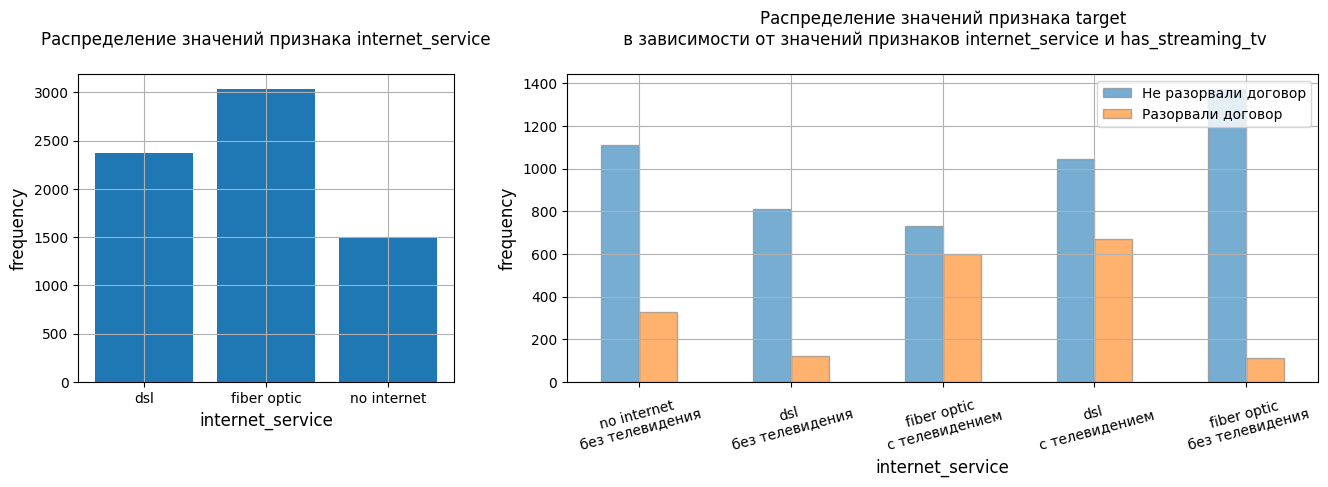

In [205]:
plot_multi_bar(
    data=data,
    col_x='internet_service',
    col_y='has_streaming_tv',
    col_y_labels={0: 'без телевидения', 1: 'с телевидением'},
    data_corr=data_corr
)

<div style="background-color: #296eaa10; border: 2px dashed #296eaa; border-radius: 5px; padding: 15px 30px">
    
**Вывод**

* Целевой признак **зависит** от наличия стримингого телевидения.

</div>

---

#### 2.2.19 Столбец `has_streaming_movies`

>Необходимо:
>
>* Определить наличие или отсутствие зависимости целевого признака от наличия каталога фильмов.

Построение графика распределения значений столбца по значениям целевой переменной:

Корреляция с другими принаками:


type  paperless_billing  payment_method  \
has_streaming_movies  0.07               0.32            0.38   

                      monthly_charges  total_charges  is_male  \
has_streaming_movies             0.83           0.67      0.0   

                      is_senior_citizen  is_married  has_children  \
has_streaming_movies               0.18        0.19          0.05   

                      internet_service  ...  has_streaming_movies  \
has_streaming_movies              0.27  ...                   1.0   

                      has_multiple_lines  service  target  \
has_streaming_movies                0.45     0.61    0.09   

                      monthly_charges_group  total_charges_group  \
has_streaming_movies                   0.32                 0.52   

                      contract_duration_days  contract_duration_years  \
has_streaming_movies                    0.03                     0.03   

                      contract_duration_months  days_until_payment_term  
has_streaming_movies                      0.02                     0.16  

[1 rows x 25 columns]


Распределение значений в столбце internet_service по значениям столбца target:


internet_service has_streaming_movies  fraction  count                target
0              dsl          без фильмов      0.16   1102  Не разорвали договор
1              dsl          без фильмов      0.05    318     Разорвали договор
2              dsl           с фильмами      0.12    824  Не разорвали договор
3              dsl           с фильмами      0.02    133     Разорвали договор
4      fiber optic          без фильмов      0.10    722  Не разорвали договор
5      fiber optic          без фильмов      0.09    601     Разорвали договор
6      fiber optic           с фильмами      0.15   1050  Не разорвали договор
7      fiber optic           с фильмами      0.10    667     Разорвали договор
8      no internet          без фильмов      0.20   1375  Не разорвали договор
9      no internet          без фильмов      0.02    113     Разорвали договор

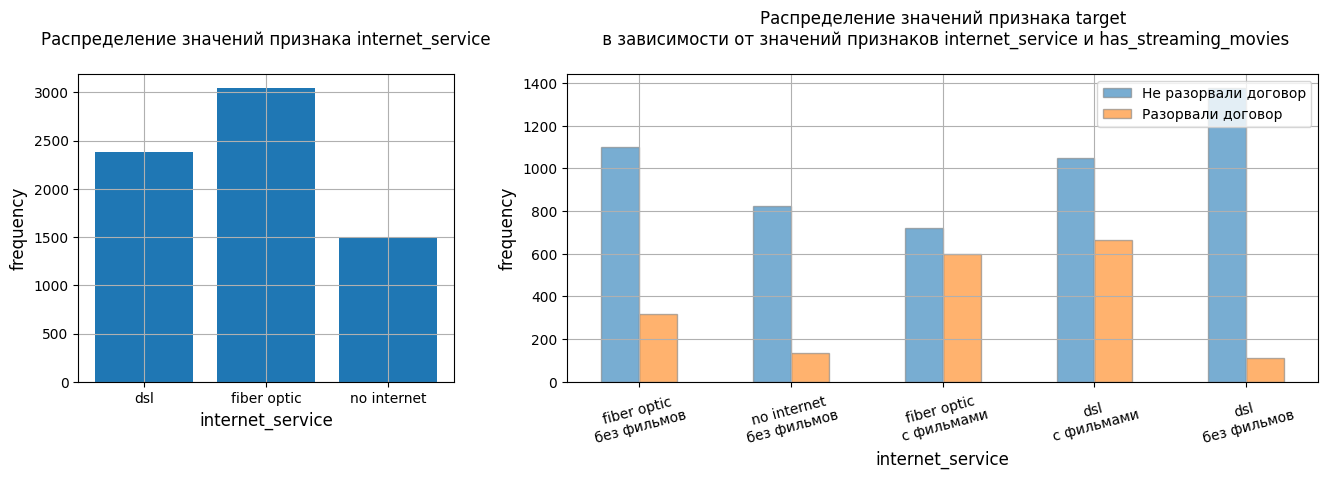

In [206]:
plot_multi_bar(
    data=data,
    col_x='internet_service',
    col_y='has_streaming_movies',
    col_y_labels={0: 'без фильмов', 1: 'с фильмами'},
    data_corr=data_corr
)

<div style="background-color: #296eaa10; border: 2px dashed #296eaa; border-radius: 5px; padding: 15px 30px">
    
**Вывод**

* Целевой признак **зависит** от наличия каталога фильмов.

</div>

---

#### 2.2.20 Столбец `has_multiple_lines`

>Необходимо:
>
>* Определить наличие или отсутствие зависимости целевого признака от наличия подключения телефона к нескольким линиям одновременно.

Построение графика распределения значений столбца по значениям целевой переменной:

Корреляция с другими принаками:


type  paperless_billing  payment_method  monthly_charges  \
has_multiple_lines  0.08               0.26            0.36             0.63   

                    total_charges  is_male  is_senior_citizen  is_married  \
has_multiple_lines           0.61     0.01               0.22        0.23   

                    has_children  internet_service  ...  has_streaming_movies  \
has_multiple_lines          0.03              0.21  ...                  0.45   

                    has_multiple_lines  service  target  \
has_multiple_lines                 1.0     0.36    0.04   

                    monthly_charges_group  total_charges_group  \
has_multiple_lines                   0.25                 0.47   

                    contract_duration_days  contract_duration_years  \
has_multiple_lines                    0.02                     0.01   

                    contract_duration_months  days_until_payment_term  
has_multiple_lines                      0.02                     0.16  

[1 rows x 25 columns]


Распределение значений в столбце has_multiple_lines по значениям столбца target:


has_multiple_lines  count  fraction                target
2    несколько линий   2205      0.32  Не разорвали договор
3    несколько линий    860      0.12     Разорвали договор
0         одна линия   2868      0.42  Не разорвали договор
1         одна линия    972      0.14     Разорвали договор

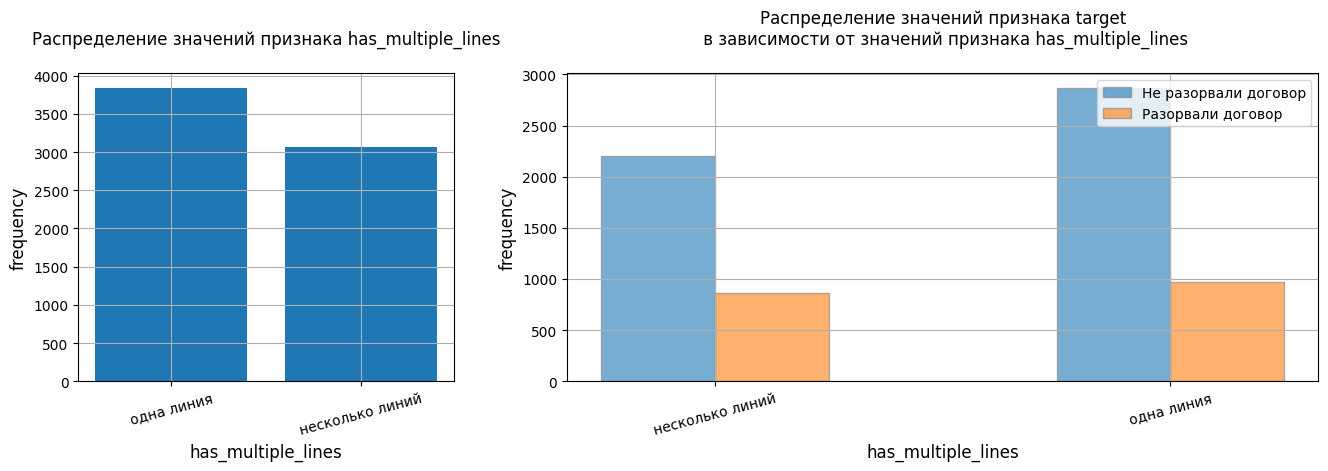

In [207]:
plot_multi_bar(
    data=data,
    col_x='has_multiple_lines',
    col_x_labels={0: 'одна линия', 1: 'несколько линий'},
    data_corr=data_corr
)

<div style="background-color: #296eaa10; border: 2px dashed #296eaa; border-radius: 5px; padding: 15px 30px">
    
**Вывод**

* Целевой признак **зависит** от наличия подключения телефона к нескольким линиям одновременно.

</div>

---

#### 2.2.21 Столбец `contract_duration_days`

>Необходимо:
>
>* Определить наличие или отсутствие зависимости целевого признака от длительности контракта.

Выведение на экран графика распределения значений в столбце набора данных:

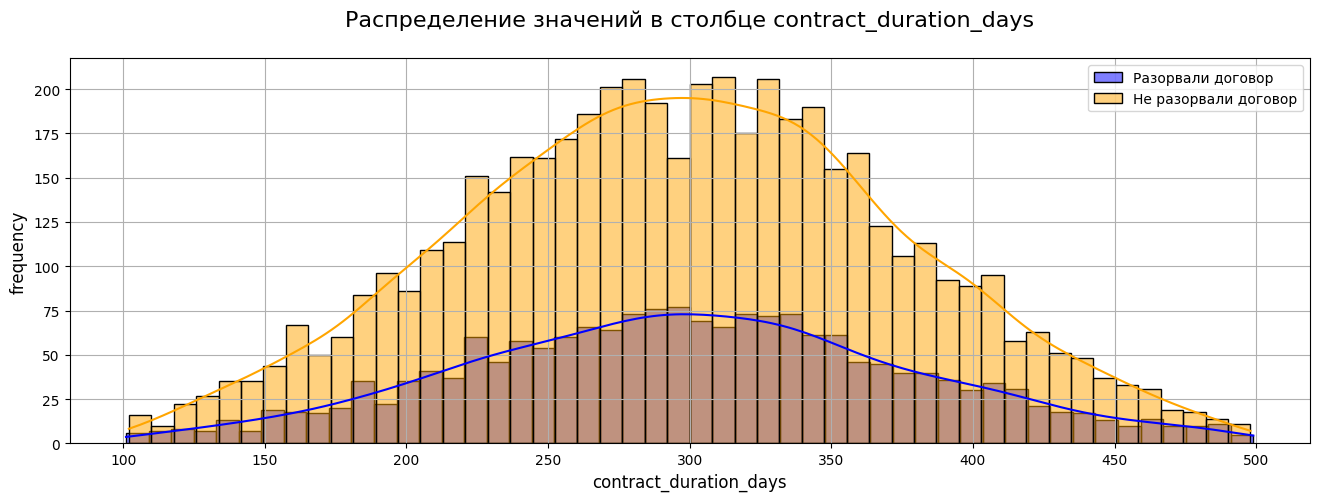

In [208]:
plot_multi_hist(data, 'contract_duration_days', 'target')

>У групп целевого признака разное распределение значений по длительности контракта, которое указывает на разное соотношение групп целевого признака.

Построение графика распределения значений столбца по значениям целевой переменной:

Корреляция с другими принаками:


type  paperless_billing  payment_method  \
contract_duration_days   0.0               0.01             0.0   

                        monthly_charges  total_charges  is_male  \
contract_duration_days             0.03            0.0      0.0   

                        is_senior_citizen  is_married  has_children  \
contract_duration_days               0.03         0.0           0.0   

                        internet_service  ...  has_streaming_movies  \
contract_duration_days               0.0  ...                  0.03   

                        has_multiple_lines  service  target  \
contract_duration_days                0.02     0.01    0.02   

                        monthly_charges_group  total_charges_group  \
contract_duration_days                   0.02                  0.0   

                        contract_duration_days  contract_duration_years  \
contract_duration_days                     1.0                     0.71   

                        contract_duration_months  days_until_payment_term  
contract_duration_days                      0.99                     0.88  

[1 rows x 25 columns]

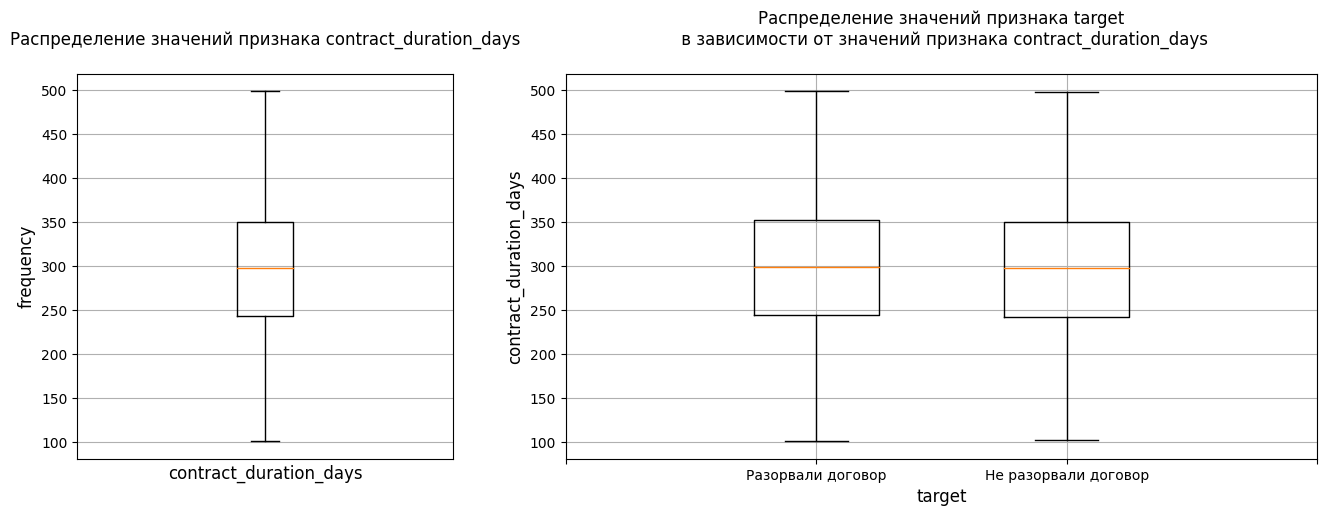

In [209]:
plot_multi_box(
    data=data, 
    col_x='contract_duration_days', 
    data_corr=data_corr
)

<div style="background-color: #296eaa10; border: 2px dashed #296eaa; border-radius: 5px; padding: 15px 30px">
    
**Вывод**

* Целевой признак **зависит** от длительности контракта.

</div>

---

#### 2.2.22 Столбец `contract_duration_months`

>Необходимо:
>
>* Определить наличие или отсутствие зависимости целевого признака от длительности контракта.

Построение графика распределения значений столбца по значениям целевой переменной:

Корреляция с другими принаками:


type  paperless_billing  payment_method  \
contract_duration_months   0.0                0.0             0.0   

                          monthly_charges  total_charges  is_male  \
contract_duration_months             0.05            0.0      0.0   

                          is_senior_citizen  is_married  has_children  \
contract_duration_months               0.04         0.0          0.01   

                          internet_service  ...  has_streaming_movies  \
contract_duration_months              0.03  ...                  0.02   

                          has_multiple_lines  service  target  \
contract_duration_months                0.02     0.04    0.01   

                          monthly_charges_group  total_charges_group  \
contract_duration_months                   0.04                  0.0   

                          contract_duration_days  contract_duration_years  \
contract_duration_months                    0.99                     0.75   

                          contract_duration_months  days_until_payment_term  
contract_duration_months                       1.0                     0.87  

[1 rows x 25 columns]


Распределение значений в столбце contract_duration_months по значениям столбца target:


contract_duration_months  count  fraction                target
0                          4     41      0.01  Не разорвали договор
1                          4     19      0.00     Разорвали договор
2                          5    120      0.02  Не разорвали договор
3                          5     44      0.01     Разорвали договор
4                          6    230      0.03  Не разорвали договор
5                          6     71      0.01     Разорвали договор
6                          7    395      0.06  Не разорвали договор
7                          7    128      0.02     Разорвали договор
8                          8    542      0.08  Не разорвали договор
9                          8    195      0.03     Разорвали договор
10                         9    702      0.10  Не разорвали договор
11                         9    228      0.03     Разорвали договор
13                        10    285      0.04     Разорвали договор
12                        10    739      0.11  Не разорвали договор
14                        11    741      0.11  Не разорвали договор
15                        11    271      0.04     Разорвали договор
16                        12    591      0.09  Не разорвали договор
17                        12    219      0.03     Разорвали договор
18                        13    423      0.06  Не разорвали договор
19                        13    152      0.02     Разорвали договор
20                        14    290      0.04  Не разорвали договор
21                        14    111      0.02     Разорвали договор
22                        15    161      0.02  Не разорвали договор
23                        15     59      0.01     Разорвали договор
24                        16     83      0.01  Не разорвали договор
25                        16     39      0.01     Разорвали договор
26                        17     15      0.00  Не разорвали договор
27                        17     11      0.00     Разорвали договор

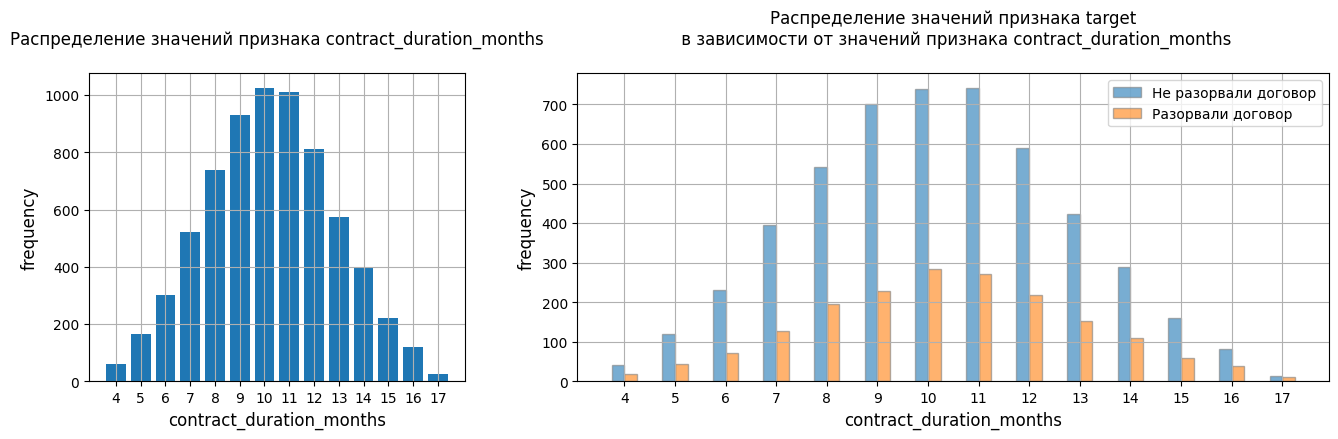

In [210]:
plot_multi_bar(
    data=data,
    col_x='contract_duration_months',
    data_corr=data_corr
)

<div style="background-color: #296eaa10; border: 2px dashed #296eaa; border-radius: 5px; padding: 15px 30px">
    
**Вывод**

* Целевой признак **зависит** от групп длительности контракта по месяцам.

</div>

---

#### 2.2.23 Столбец `contract_duration_years`

>Необходимо:
>
>* Определить наличие или отсутствие зависимости целевого признака от длительности контракта.

Построение графика распределения значений столбца по значениям целевой переменной:

Корреляция с другими принаками:


type  paperless_billing  payment_method  \
contract_duration_years  0.43               0.07            0.13   

                         monthly_charges  total_charges  is_male  \
contract_duration_years             0.18           0.15      0.0   

                         is_senior_citizen  is_married  has_children  \
contract_duration_years               0.05        0.05          0.05   

                         internet_service  ...  has_streaming_movies  \
contract_duration_years              0.37  ...                  0.03   

                         has_multiple_lines  service  target  \
contract_duration_years                0.01     0.08    0.36   

                         monthly_charges_group  total_charges_group  \
contract_duration_years                   0.26                 0.19   

                         contract_duration_days  contract_duration_years  \
contract_duration_years                    0.71                      1.0   

                         contract_duration_months  days_until_payment_term  
contract_duration_years                      0.75                     0.61  

[1 rows x 25 columns]


Распределение значений в столбце contract_duration_years по значениям столбца target:


contract_duration_years  count  fraction                target
1                        0    719      0.10     Разорвали договор
0                        0      0      0.00  Не разорвали договор
2                        1   4524      0.66  Не разорвали договор
3                        1   1018      0.15     Разорвали договор
4                        2    549      0.08  Не разорвали договор
5                        2     95      0.01     Разорвали договор

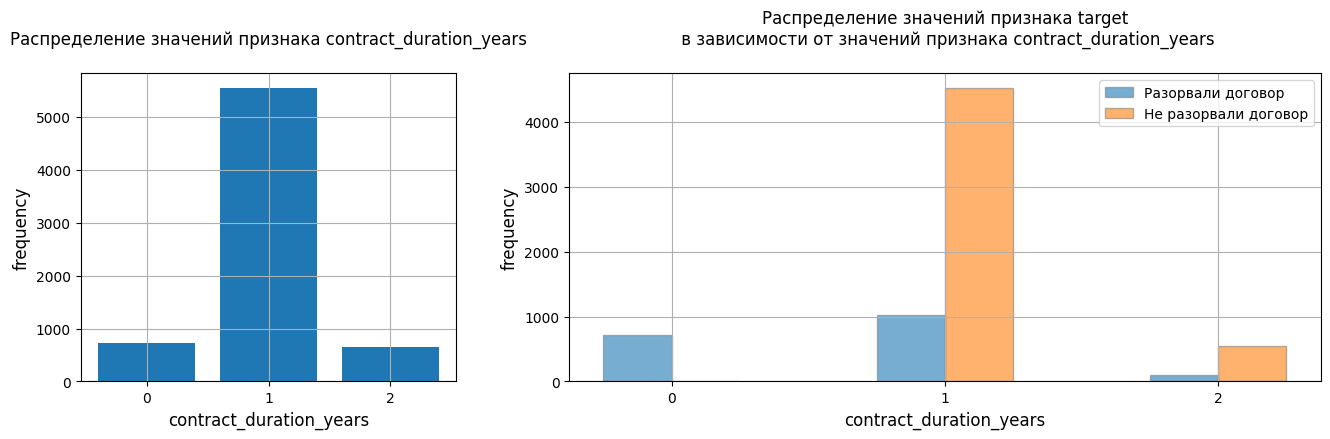

In [211]:
plot_multi_bar(
    data=data,
    col_x='contract_duration_years',
    data_corr=data_corr
)

>У групп целевого признака разное распределение значений по длительности контракта, которое указывает на разное соотношение групп целевого признака.

<div style="background-color: #296eaa10; border: 2px dashed #296eaa; border-radius: 5px; padding: 15px 30px">
    
**Вывод**

* Несмотря на значение матрицы корреляции, распределение классов в целевом признаке **зависит** от групп длительности контракта по годам. Таким образом, с учётом наличия трёх сгенерированных столбцов `contract_duration_days`, `contract_duration_months`, `contract_duration_years` в качестве признаков будут взяты дни и годы, поскольку в обоих этих столбцах абоненты подразделены на группы.

</div>

---

#### 2.2.24 Столбец `days_until_payment_term`

>Необходимо:
>
>* Определить наличие или отсутствие зависимости целевого признака от количества дней до оплаты.

Выведение на экран графика распределения значений в столбце набора данных:

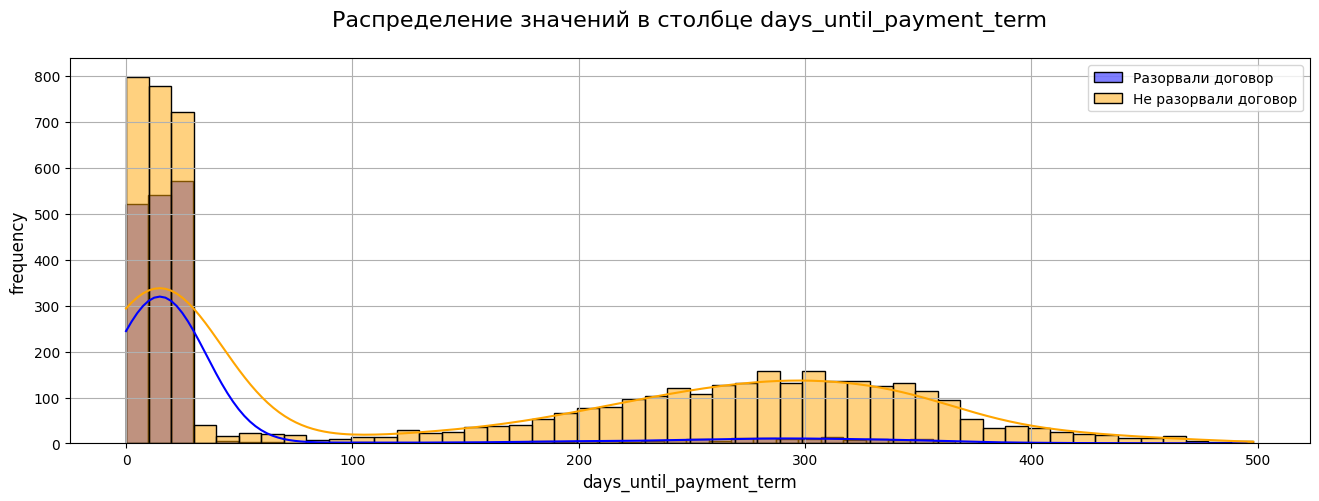

In [212]:
plot_multi_hist(data, 'days_until_payment_term', 'target')

>Распределение групп целевого признака имеет смещение влево, однако у разорвавших договор концентрация значений приходится именно на начало графика.

Построение графика распределения значений столбца по значениям целевой переменной:

Корреляция с другими принаками:


type  paperless_billing  payment_method  \
days_until_payment_term  0.81               0.22            0.33   

                         monthly_charges  total_charges  is_male  \
days_until_payment_term             0.33           0.45      0.0   

                         is_senior_citizen  is_married  has_children  \
days_until_payment_term               0.17        0.36          0.29   

                         internet_service  ...  has_streaming_movies  \
days_until_payment_term               0.3  ...                  0.16   

                         has_multiple_lines  service  target  \
days_until_payment_term                0.16     0.29     0.5   

                         monthly_charges_group  total_charges_group  \
days_until_payment_term                   0.21                 0.34   

                         contract_duration_days  contract_duration_years  \
days_until_payment_term                    0.88                     0.61   

                         contract_duration_months  days_until_payment_term  
days_until_payment_term                      0.87                      1.0  

[1 rows x 25 columns]

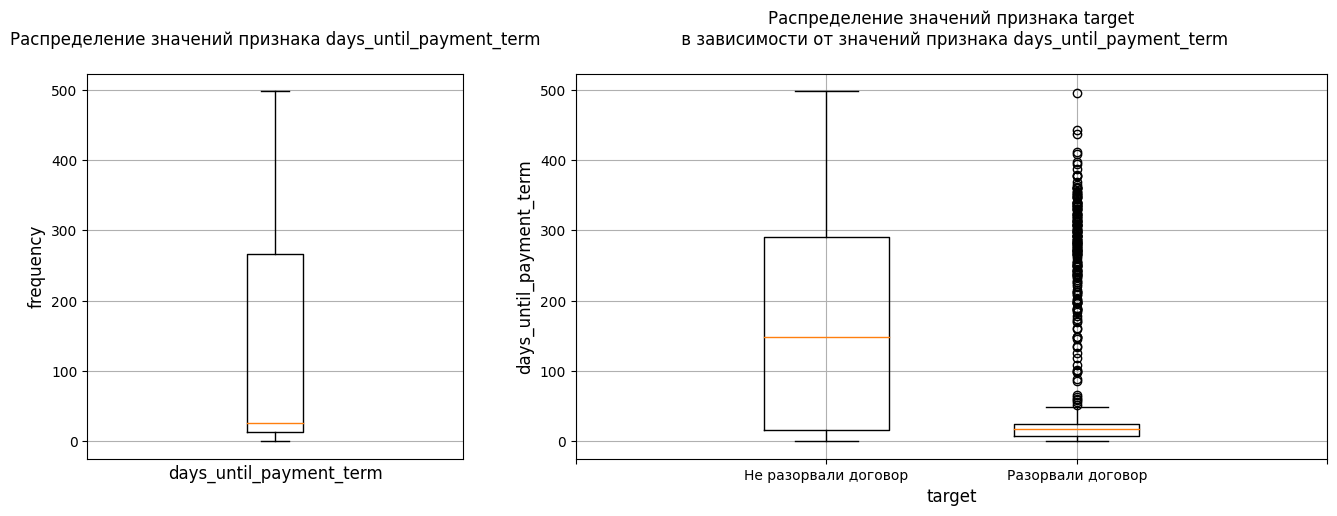

In [213]:
plot_multi_box(
    data=data, 
    col_x='days_until_payment_term', 
    data_corr=data_corr
)

>Можно было бы сделать заключение, что абоненты чаще разрывают договор сразу после оплаты. Однако следует учитывать, что есть разные типы оплаты с разными соответствующими им сроками оплаты.

>Необходимо:
>
>* Определить наличие или отсутствие зависимости целевого признака от количества дней до оплаты в зависимости от типа оплаты.

Выведение на экран графика распределения значений в столбце набора данных:

С фильтром по столбцу type по значению month-to-month


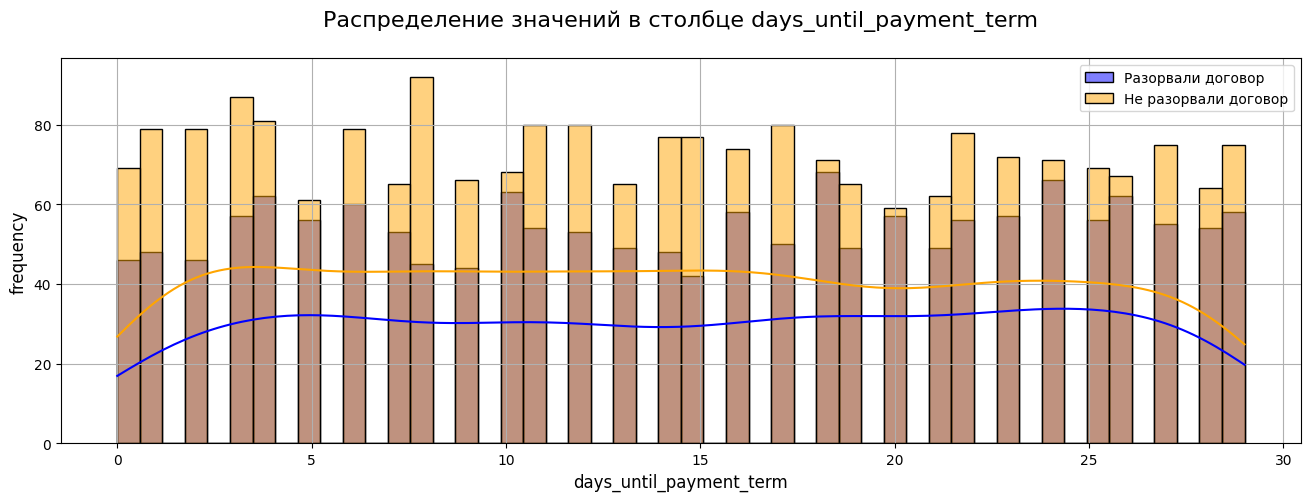


С фильтром по столбцу type по значению two year


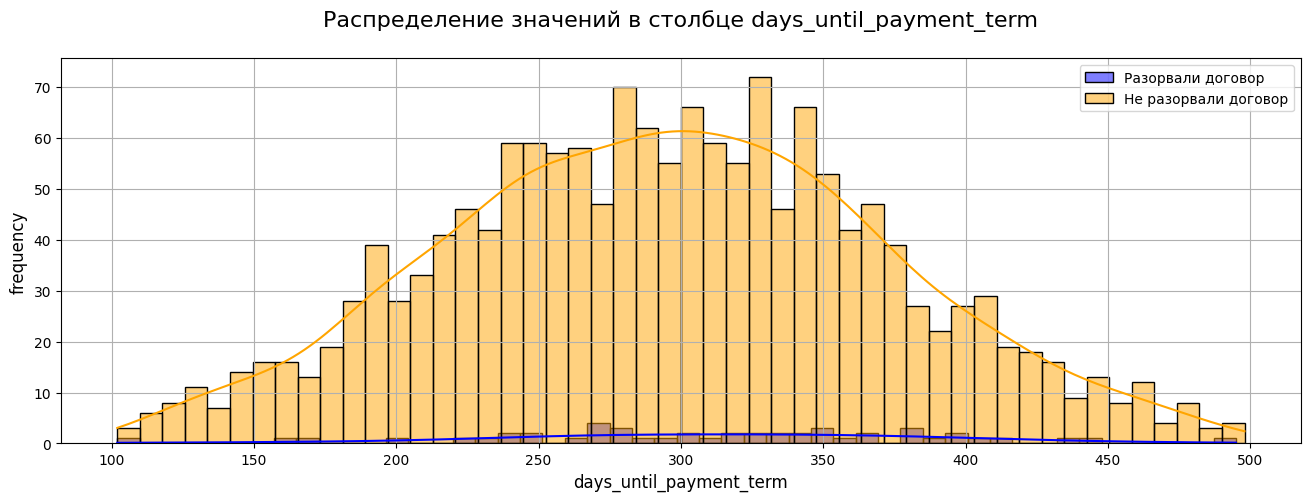


С фильтром по столбцу type по значению one year


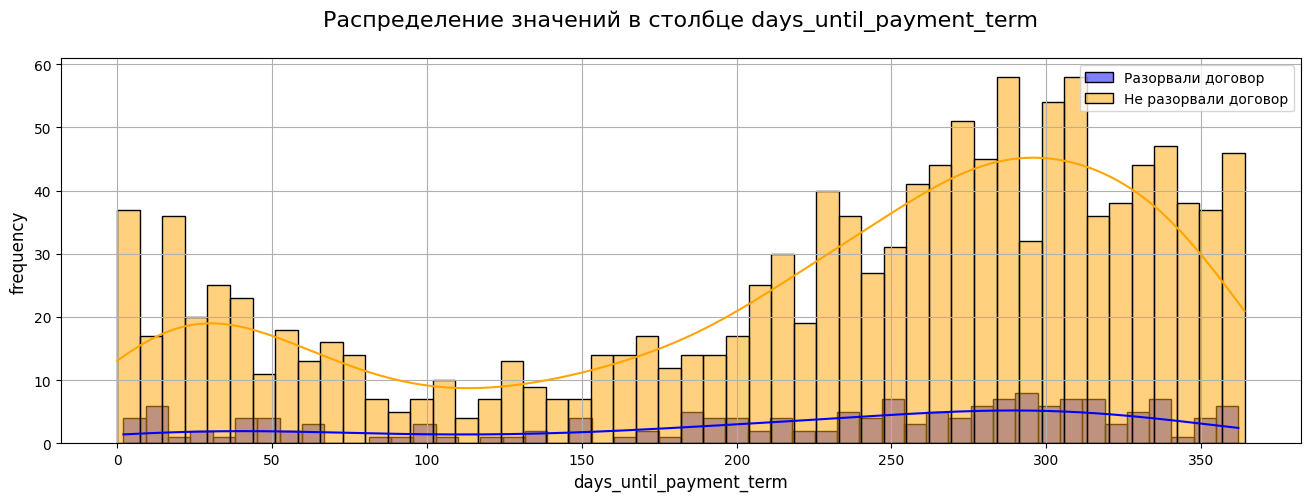

In [214]:
plot_multi_hist_filter(
    data=data,
    col_filter='type',
    col_x='days_until_payment_term'
)

<div style="background-color: #296eaa10; border: 2px dashed #296eaa; border-radius: 5px; padding: 15px 30px">
    
**Вывод**

* Целевой признак **не зависит** от количества дней до оплаты.

</div>

<div style="background-color: blue; opacity: 0.2; height: 2px; margin: 10px 0;"></div>

### 2.3 Отбор признаков

Удаление признаков, которые показали слабую важность при взаимодействии с целевым признаком:

In [215]:
data_filtered = data.drop([
    'monthly_charges',
    'total_charges',
    'service',
    'is_male',
    'contract_duration_months',
    'days_until_payment_term'
], axis=1)

Выведение на экран количества дубликатов:

In [216]:
print('Количество дубликатов:', data_filtered.duplicated().sum())

Количество дубликатов: 54


Удаление дубликатов:

In [217]:
data_filtered = data_filtered.drop_duplicates().reset_index(drop=True)

Выведение на экран количества дубликатов для проверки применённых изменений:

In [218]:
print('Количество дубликатов:', data_filtered.duplicated().sum())

Количество дубликатов: 0


Задание признаков и целевого признака:

In [219]:
features = data_filtered.drop('target', axis=1)
target = data_filtered['target']

Выведение на экран размерностей признаков и целевого признака:

In [220]:
print('Features shape:', features.shape)
print('Target shape:', target.shape)

Features shape: (6851, 18)
Target shape: (6851,)


<div style="background-color: #296eaa10; border: 2px dashed #296eaa; border-radius: 5px; padding: 15px 30px">
    
**Вывод**

* Был произведён отбор признаков, продемонстрировавших наибольшую важность при рассмотрении их распределений относительно целевого признака.

</div>

<div style="background-color: blue; height: 2px; margin: 10px 0;"></div>

## 3 Обучение модели

### 3.1 Разделение на выборки

Выведение на экран описания данных:

In [221]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6851 entries, 0 to 6850
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   type                     6851 non-null   object 
 1   paperless_billing        6851 non-null   int64  
 2   payment_method           6851 non-null   object 
 3   is_senior_citizen        6851 non-null   int64  
 4   is_married               6851 non-null   int64  
 5   has_children             6851 non-null   int64  
 6   internet_service         6851 non-null   object 
 7   has_online_security      6851 non-null   float64
 8   has_online_backup        6851 non-null   float64
 9   has_device_protection    6851 non-null   float64
 10  has_tech_support         6851 non-null   float64
 11  has_streaming_tv         6851 non-null   float64
 12  has_streaming_movies     6851 non-null   float64
 13  has_multiple_lines       6851 non-null   float64
 14  monthly_charges_group   

>Необходимо:
>
>* Привести столбцы с типом данных `object` к типу данных `category`.

Приведение столбцов с типом данных `object` к типу данных `category`:

In [222]:
for col_name in features.select_dtypes(['object']).columns:
    features[col_name] = features[col_name].astype('category')

---

Разделение признаков и целевого признака на выборки:

In [223]:
X_train, X_test, y_train, y_test = train_test_split(
    features,
    target,
    test_size=0.25, 
    random_state=RANDOM_STATE
)

Выведение на экран размерностей выборок:

In [224]:
print('Features train shape:', X_train.shape)
print('Features test shape:', X_test.shape)
print('Target train shape:', y_train.shape)
print('Target test shape:', y_test.shape)

Features train shape: (5138, 18)
Features test shape: (1713, 18)
Target train shape: (5138,)
Target test shape: (1713,)


<div style="background-color: #296eaa10; border: 2px dashed #296eaa; border-radius: 5px; padding: 15px 30px">
    
**Вывод**

* Признаки с типом данных `object` были приведены к типу данных `category`.
* Признаки были разделены на тренировочную и тестовую выборки.

</div>

<div style="background-color: blue; opacity: 0.2; height: 2px; margin: 10px 0;"></div>

### 3.2 Кодирование данных

Задание функции определения значений категориальных признаков, различных для тестовой и тренировочной выборок:

In [225]:
def print_train_test_cat_difference(cat_cols: list, 
                                    X_train: np.ndarray,
                                    X_test: np.ndarray) -> None:
    
    get_unique = lambda x, y: set(x[y].unique())
    
    for col_name in cat_cols:
        cat_train = get_unique(X_train, col_name)
        cat_test = get_unique(X_test, col_name)
        
        if len(cat_train) != len(cat_test) or cat_train != cat_test:
            
            print(f'Признак {col_name.upper()}\n')
            print('Разные значения признака в тренировочной и тестовой выборках')

            if cat_train - cat_test != set():
                print('Значения только в тренировочной выборке:\n',
                      cat_train - cat_test, '\n')

            if cat_test - cat_train != set():
                print('Значения только в тестовой выборке:\n',
                      cat_test - cat_train, '\n')

            print('---\n')
        
        else:
            print(f'Все значения признака {col_name} совпали')

---

Получение разделённых по типам данных названий столбцов:

In [226]:
columns = get_columns(X_train)

Выведение на экран разделённых по типам данных названий столбцов:

In [227]:
columns

{'category': ['type',
  'payment_method',
  'internet_service',
  'monthly_charges_group',
  'total_charges_group'],
 'float64': ['has_online_security',
  'has_online_backup',
  'has_device_protection',
  'has_tech_support',
  'has_streaming_tv',
  'has_streaming_movies',
  'has_multiple_lines'],
 'int64': ['paperless_billing',
  'is_senior_citizen',
  'is_married',
  'has_children',
  'contract_duration_days',
  'contract_duration_years']}

Сохранение названий столбов с числовыми и категориальными признаками:

In [228]:
num_cols = [*columns['int64'], *columns['float64']]
cat_cols = columns['category']

Выведение на экран значений категориальных признаков, различных для тестовой и тренировочной выборок:

In [229]:
print_train_test_cat_difference(cat_cols, X_train, X_test)

Все значения признака type совпали
Все значения признака payment_method совпали
Все значения признака internet_service совпали
Все значения признака monthly_charges_group совпали
Все значения признака total_charges_group совпали


---

Поскольку признаки содержат как категориальные, так и численные значения, требуется провести масштабирование представленных в разных диапазонах числовых признаков (для приведения их к единому диапазону) с помощью StandardScaler и категоризация категориальных признаков (для приведения их к численным значениям) с помощью OneHotEncoding.

Задание объекта трансформации столбцов в зависимости от типа данных признаков:

In [230]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), cat_cols)
    ],
    remainder='passthrough'
)

<div style="background-color: #296eaa10; border: 2px dashed #296eaa; border-radius: 5px; padding: 15px 30px">
    
**Вывод**

* Был сформирован конвейер для трансформирования данных.

</div>

<div style="background-color: blue; opacity: 0.2; height: 2px; margin: 10px 0;"></div>

### 3.3 Подготовка к обучению

#### 3.3.1 Метрика

Поскольку поставленная задача представляет собой бинарную классификацию (целевой признак представляет собой значений 0 и 1 - абонент не разорвал контракт и абонент разорвал контракт соответственно), для обучения подходят следующие метрики:

* **Accuracy** — общая точность предсказания модели по всем классам.

* **Precision** (точность) — доля объектов, названных классификатором положительными и при этом действительно являющимися положительными.

>Чем меньше положительных, тем ниже точность. 

* **Recall** (полнота) — доля объектов положительного класса из всех объектов положительного класса, которую нашел алгоритм. 


* **F-мера** — среднее гармоническое precision и recall.

>Достигает максимума при полноте и точности, равными единице, и близка к нулю, если один из аргументов близок к нулю.

* **AUC-ROC** — площадь под кривой ошибок. Помогает понять, насколько сильно модель отличается от случайной.

В качестве метрик, по которым будет производиться оценка моделей, будут взяты метрики **Accuracy** и **AUC-ROC**.

---

#### 3.3.2 Модель

Наиболее подходящими для решения поставленной перед исследованием задачи являются следующие модели:

* `LogisticRegression`
* `DecisionTreeClassifier`
* `RandomForestClassifier`
* `SVC`
* `GaussianNB`
* `LGBMClassifier`
* `CatBoostClassifier`
* `XGBClassifier`
* `Нейронная сеть`

Все они и будут рассмотрены при выборе наилучшей модели.

---

#### 3.3.3 Баланс классов

Выведение на экран долевого распределения значений в целевом признаке:

In [231]:
target.value_counts(normalize=True)

target
0    0.73347
1    0.26653
Name: proportion, dtype: float64

---

С учётом большого перевеса одного из целевых классов, необходимо обратиться к алгоритмам, которые будут балансировать значения целевого признака:

* Oversampling (добавление большего количества элементов в недостаточно большой набор):
    * `SMOTE`
    * `RandomOverSampling`
    * `ADASYN`
<br><br>

* Undersampling (удаление элементов из слишком большого набора):
    * `EditedNearestNeighbours`
    * `RepeatedEditedNearestNeighbours`
    * `AllKNN`
    * `InstanceHardnessThreshold`
    * `NearMiss`
    * `NeighbourhoodCleaningRule`
    * `OneSidedSelection`
    * `RandomUnderSampler`
    * `TomekLinks`

Все они и будут рассмотрены при выборе наилучшей модели.

---

**Oversampling**

Задание параметров баланса классов SMOTE:

In [232]:
params_smote = {
    'over__random_state': [RANDOM_STATE],
    'over__k_neighbors': range(1, 21),
    'over__n_jobs': [-1]
}

Задание параметров баланса классов RandomOverSampling:

In [233]:
params_random_os = {
    'over__sampling_strategy': ['minority', 'not minority', 'not majority', 'all'],
    'over__random_state': [RANDOM_STATE]
}

Задание параметров баланса классов ADASYN:

In [234]:
params_adasyn = {
    'over__sampling_strategy': ['minority', 'not minority', 'not majority', 'all'],
    'over__random_state': [RANDOM_STATE],
    'over__n_neighbors': range(1, 21),
    'over__n_jobs': [-1]
}

Формирование итераций баланса классов:

In [235]:
OVERSAMPLING = [
    ('smote', SMOTE(), params_smote), 
    ('adasyn', ADASYN(), params_adasyn),
    ('random_os', RandomOverSampler(), params_random_os)
]

---

**Undersampling**

Задание параметров баланса классов OneSidedSelection:

In [236]:
params_one_ss = {
    'under__sampling_strategy': ['minority', 'not minority', 'not majority', 'all'],
    'under__random_state': [RANDOM_STATE],
    'under__n_neighbors': range(1, 21),
    'under__n_seeds_S': range(1, 11),
    'under__n_jobs': [-1]
}

Задание параметров баланса классов EditedNearestNeighbors:

In [237]:
params_enn = {
    'under__sampling_strategy': ['minority', 'not minority', 'not majority', 'all'],
    'under__n_neighbors': range(1, 21),
    'under__kind_sel': ['all', 'mode'],
    'under__n_jobs': [-1]
}

Задание параметров баланса классов AllKNN:

In [238]:
params_allknn = {
    'under__sampling_strategy': ['minority', 'not minority', 'not majority', 'all'],
    'under__n_neighbors': range(1, 21),
    'under__kind_sel': ['all', 'mode'],
    'under__allow_minority': [True, False],
    'under__n_jobs': [-1]
}

Задание параметров баланса классов InstanceHardnessThreshold:

In [239]:
params_instance_ht = {
    'under__sampling_strategy': ['minority', 'not minority', 'not majority', 'all'],
    'under__random_state': [RANDOM_STATE],
    'under__cv': range(1, 6),
    'under__n_jobs': [-1]
}

Задание параметров баланса классов NearMiss:

In [240]:
params_near_m = {
    'under__sampling_strategy': ['minority', 'not minority', 'not majority', 'all'],
    'under__n_neighbors': range(1, 21),
    'under__n_jobs': [-1]
}

Задание параметров баланса классов RandomUnderSampler:

In [241]:
params_random_us = {
    'under__sampling_strategy': ['minority', 'not minority', 'not majority', 'all'],
    'under__replacement': [True, False],
    'under__random_state': [RANDOM_STATE]
}

Задание параметров баланса классов TomekLinks:

In [242]:
params_tomek_l = {
    'under__sampling_strategy': ['minority', 'not minority', 'not majority', 'all'],
    'under__n_jobs': [-1]
}

Формирование итераций баланса классов:

In [243]:
UNDERSAMPLING = [
    ('one_ss', OneSidedSelection(), params_one_ss),
    ('edited_nn', EditedNearestNeighbours(), params_enn),
    ('allknn', AllKNN(), params_allknn),
    ('instance_ht', InstanceHardnessThreshold(), params_instance_ht),
    ('near_m', NearMiss(), params_near_m),
    ('random_us', RandomUnderSampler(), params_random_us),
    ('tomek_l', TomekLinks(), params_tomek_l)
]

<div style="background-color: blue; opacity: 0.2; height: 2px; margin: 10px 0;"></div>

### 3.4 Построение моделей

Задание функции построения матрицы неточностей:

In [244]:
def plot_corr_matrix(y_train: np.ndarray, y_pred: np.ndarray, title: str, ax = None) -> None:
    font_s = 12
    
    if ax is None:
        plt.figure(figsize=(4, 3))
        plt.title(f'{title}\n', fontsize=font_s+4)
    else:
        ax.set_title(f'{title}\n')

    c_matrix = confusion_matrix(y_train, y_pred)
    c_matrix = pd.DataFrame(c_matrix, 
                            index=['real not leaved', 'real leaved'],
                            columns=['pred not leaved', 'pred leaved'])
    
    sns.heatmap(c_matrix, 
                annot=True, 
                fmt='g',
                cmap='Blues',
                xticklabels=c_matrix.columns, 
                yticklabels=c_matrix.index, 
                annot_kws={'size': font_s+2},
                ax=ax)
    
    if ax is None:
        plt.xlabel('preds', fontsize=font_s)
        plt.ylabel('real', fontsize=font_s)
        plt.show()
    else:
        ax.set_xlabel('preds')
        ax.set_ylabel('real')

Задание функции, выводящей несколько матриц корреляции по сохранённым значениям:

In [245]:
def plot_multi_corr_matrix(save_to: dict, name: str) -> None:
    font_s = 12
    
    
    # filter by name
    filtered_save_to = list(filter(lambda x: name in x, save_to.keys()))
    
    
    n_cols = 4
    n_rows = int(np.ceil(len(filtered_save_to) / n_cols))
    
    fig_height = len(filtered_save_to) * 1.5 if n_rows == 1 else len(filtered_save_to)
    
    fig, ax = plt.subplots(n_rows, 
                           n_cols, 
                           sharex='row', 
                           sharey='col', 
                           figsize=(16, fig_height))
    
    if n_rows > 1:
        plt.suptitle(f'Матрицы неточностей моделей {name}\n\n', fontsize=font_s+4)

    col, row, count = 0, 0, 0
    
    # plot matrices
    for i, key in enumerate(filtered_save_to):
        y_train = save_to[key]['train_pred'][:, 0]
        y_pred = save_to[key]['train_pred'][:, 1]
        
        axis = ax[col] if n_rows == 1 else ax[row, col]
            
        plot_corr_matrix(y_train, y_pred, key, axis)

        col = col + 1 if col < n_cols - 1 else 0
        row = row + 1 if col == 0 else row
        count += 1
    
    
    # delete extra axes
    while count < n_cols * n_rows:
        axis = ax[count] if n_rows == 1 else ax[row, col]
        
        fig.delaxes(axis)

        col = col + 1 if col < n_cols - 1 else 0
        row = row + 1 if col == 0 else row
        count += 1
    
    
    plt.tight_layout()    
    plt.show()

Задание функции, конвертирующей словарь в датафрейм:

In [246]:
def convert_to_dataframe(save_to: dict) -> pd.DataFrame:
    return pd.DataFrame(
        [val['score'] for val in save_to.values()], 
        index=save_to.keys(),
        columns=['score']
    ).reset_index()

Задание функции, выводящей столбчатую диаграмму значений метрики:

In [247]:
def plot_bar(data: pd.DataFrame, 
             name: str = '',
             col_x: str = 'index',
             col_y: str = 'score',
             print_vals: bool = True,
             deg_rotate_x: int = 90,
             deg_rotate_labels: int = 0,
             shift: float = -0.25) -> None:
    
    font_s = 12
    fig = plt.subplots(figsize=(16, 4))
    
    if data[col_x].str.contains(name).any() and name != '':
        title = name.lower()
        data = data[data[col_x].str.contains(name)].reset_index(drop=True)
        title = f'Accuracy {name}'
    else:
        title = 'Accuracy'
    
    plt.title(f'{title}\n', fontsize=font_s+4)        
    
    labels = data[col_x]
    x = range(len(labels))
    y = data[col_y]
    
    plt.bar(x, y)
    
    if print_vals:
        for i, val in enumerate(y):
            plt.text(i+shift,  
                     val-0.1, 
                     str(round(val * 100, 2)), 
                     rotation=deg_rotate_labels, 
                     color='white',
                     fontsize=font_s)

    plt.xticks([i for i in x], labels, rotation=deg_rotate_x)

    plt.xlabel(col_x, fontsize=font_s)
    plt.ylabel(col_y, fontsize=font_s)

    plt.grid()
    plt.plot()

Задание функции, строящей кривые ROC:

In [248]:
def plot_roc_curve(save_to: dict, name: str = '') -> None:
    font_s = 12
    plt.figure(figsize=(16, 6))
    
    if any(name in value for value in list(save_to.keys())) and name != '':
        title = f'ROC-кривая {name.lower()}'
        filtered_save_to = list(filter(lambda x: name in x, save_to.keys()))
    
    else:
        title = 'ROC-кривая'
        filtered_save_to = save_to
        
    plt.title(f'{title}\n', fontsize=font_s+4)
    
    
    # get values
    labels = []
    fpr_tpr_auc_roc = []
    roc_auc = []

    for key in filtered_save_to:
        labels.append(key)
        fpr_tpr_auc_roc.append(save_to[key]['fpr_tpr_auc_roc'])
        roc_auc.append(save_to[key]['roc_auc'])
    
    
    # random model
    plt.plot([0, 1], [0, 1], linestyle='--', label='random_model - 0.5')
    
    
    # AUC-ROC
    for i in range(len(fpr_tpr_auc_roc)):
        fpr, tpr, auc_roc = fpr_tpr_auc_roc[i]
        plt.plot(fpr, tpr, label=f'{labels[i]} - {round(roc_auc[i], 3)}')
        
        
    plt.legend(loc='lower right')

    plt.xlabel('false positive rate', fontsize=font_s)
    plt.ylabel('true positive rate', fontsize=font_s)

    plt.grid()
    plt.show()

Задание функции, перечисляющей построение нескольких графиков:

In [249]:
def plot_charts(save_to: dict, name: str, shift: float = -0.25, bar: bool = True) -> None:
    # correlation matrices
    plot_multi_corr_matrix(results, name)
    
    # accuracy bars
    if bar:
        plot_bar(convert_to_dataframe(results), name, shift=shift)
    
    # AUC-ROC
    plot_roc_curve(results, name)

Задание нескольких полезных строчных функций:

In [250]:
print_message_start = lambda x, y, z: print(f'[{x}/{y}] Searching with {z}...')
print_message_end = lambda x: print(f'Estimated time: {x}')
check_time = lambda x: str(datetime.timedelta(seconds=time.time() - x))
print_separator = lambda x: print('\n---\n')

Задание функции поиска лучшей модели:

In [251]:
def train_model(pipeline,
                params: dict,
                X_train: np.ndarray,
                y_train: np.ndarray,
                name: str,
                save_to: dict,
                n_verbose: int = 0,
                n_cv: int = 3,
                metrics: str = ['roc_auc', 'accuracy'],
                plot_charts: bool = False,
                single: bool = False) -> None:
    
    time_start = time.time()
    
    params = {} if params is None else params
    
    if single:
        print('Searching...')
    
    
    # search        
    if len(params) > 2:
        search = RandomizedSearchCV(
            pipeline, 
            params, 
            cv=n_cv, 
            n_jobs=-1, 
            scoring=metrics, 
            refit = metrics[1],
            verbose=n_verbose
        )
    else:
        search = GridSearchCV(
            pipeline, 
            params, 
            cv=n_cv, 
            n_jobs=-1, 
            scoring=metrics, 
            refit = metrics[1],
            verbose=n_verbose
        )
        
    search.fit(X_train, y_train)
    
    
    # best results
    best_model = search.best_estimator_
    best_params = search.best_params_
    best_score = search.best_score_
    
    best_results = pd.DataFrame(search.cv_results_).loc[search.best_index_]
    
    best_roc_auc = best_results['mean_test_roc_auc']
    
    print(f'{metrics[1].capitalize()}: {round(best_score * 100, 2)} %')
    print('ROC-AUC:', round(best_roc_auc * 100, 2), '%')
    
    
    # save
    save_to[name] = {
        'model': best_model,
        'params': best_params,
        'score': best_score,
        'roc_auc': best_roc_auc
    }
    
    
    try:
        y_pred = cross_val_predict(best_model, X_train, y_train, cv=n_cv, method='predict_proba')[:, 1]
        X_valid, y_valid = X_train, y_train
    except:
        X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25)
        y_pred = best_model.forward(X_valid).flatten()
    
    
    # AUC-ROC
    save_to[name]['fpr_tpr_auc_roc'] = roc_curve(y_valid, y_pred)
    
    # correlation matrix 
    y_pred = best_model.predict(X_valid)
    save_to[name]['train_pred'] = np.array(list(zip(y_valid, y_pred)))
    
    
    print_message_end(check_time(time_start))


    if single:
        print_separator('')
        print('Finished\n')
        
    if plot_charts:
        # correlation matrix        
        plot_corr_matrix(y_valid, y_pred, name)
        
        # AUC-ROC
        plot_roc_curve(save_to, name)

Задание функции, ищущей лучшую модель среди:

1. обучения без баланса классов
2. обучения со стандартным балансом классов (class_weight)
3. обучения с помощью подхода oversampling
4. обучения с помощью подхода undersampling

In [252]:
def train_multi_models(estimator, 
                       params_model: dict,
                       X_train: np.ndarray,
                       y_train: np.ndarray,
                       name: str, 
                       save_to: dict,
                       n_verbose: int = 0,
                       oversampling: bool = True,
                       shift: float = -0.25) -> None:
    
    params_model = {} if params_model is None else params_model
    params = params_model.copy()
    
    total_step = 4 if oversampling else (3 if oversampling is False else 2)
    
    
    if 'cb_class' in name:
        steps=[
            ('model', estimator)
        ]
    else:        
        steps=[
            ('preprocessor', preprocessor),
            ('model', estimator)
          ]
    
    
    # ------------
    # no balancing
    current_step = 1
    print_message_start(current_step, total_step, 'no balancing')
      
    pipeline = Pipeline(steps=steps)    
    model_name = name.lower()
    
    train_model(pipeline, params, X_train, y_train, model_name, n_verbose=n_verbose, save_to=save_to)
    print_separator('')
    
    
    # ------------------
    # standard balancing
    current_step += 1
    print_message_start(current_step, total_step, 'standard balancing')
    
    if any(name_part in name for name_part in ['gauss', 'xgb']):
        print('Pass')
        print_separator('')
        
    else:
        if 'rf_class' in name:
            param = {'model__class_weight': ['balanced', 'balanced_subsample']}
        elif 'cb_class' in name:
            param = {'model__auto_class_weights': ['Balanced', 'SqrtBalanced']}
        else:
            param = {'model__class_weight': ['balanced']}
        
        params.update(param)
        model_name = name + '_class_w'
        
        train_model(pipeline, params, X_train, y_train, model_name, n_verbose=n_verbose, save_to=save_to)
        print_separator('')

        del params['model__class_weight']
    
    
    # ------------
    # oversampling
    if oversampling:
        current_step += 1
        
        print_message_start(current_step, total_step, 'oversampling')
        counter = 1

        for (over_name, over_model, over_params) in OVERSAMPLING:
            params_over = params.copy()

            print(f'\n| [{counter}/{len(OVERSAMPLING)}] {over_name.capitalize()}...')
            counter += 1

            # add oversampling step
            steps.insert(-1, ('over', over_model))
            pipeline = Pipeline(steps=steps)

            params_over.update(over_params)        
            model_name = name + '_' + over_name

            train_model(pipeline, params_over, X_train, y_train, model_name, n_verbose=n_verbose, save_to=save_to)

            # remove oversampling step
            del steps[-2]

        print_separator('')
    
    
    # -------------
    # undersampling
    current_step += 1
    
    print_message_start(current_step, total_step, 'undersampling')
    counter = 1
    
    for (under_name, under_model, under_params) in UNDERSAMPLING:
        params_under = params.copy()
        
        print(f'\n| [{counter}/{len(UNDERSAMPLING)}] {under_name.capitalize()}...')
        counter += 1
        
        # add undersampling step
        steps.insert(-1, ('under', under_model))
        pipeline = Pipeline(steps=steps)
        
        params_under.update(under_params)        
        model_name = name + '_' + under_name
        
        train_model(pipeline, params_under, X_train, y_train, model_name, n_verbose=n_verbose, save_to=save_to)
        
        # remove undersampling step
        del steps[-2]
    
    print_separator('')
    
    print('Finished\n')
    
    
    # plot charts
    shift = -0.18 if oversampling is False else shift
    
    plot_charts(save_to, name.lower(), shift)

Задание функции, добавляющей значения в словарь:

In [253]:
def update_best_results(name: str, best_results: dict, results) -> None:
    best_results.update({name: results[name]})

---

Задание словарей с результатами подбора моделей:

In [254]:
results = {}
best_results = {}

---

#### 3.4.1 LogisticRegression

Задание параметров модели:

In [255]:
params_lr = {
    'model__C': range(1, 11),
    'model__fit_intercept': [True, False],
    'model__solver': ['liblinear', 'newton-cholesky'],
    'model__random_state': [RANDOM_STATE],
    'model__n_jobs': [-1],
    'model__multi_class': ['ovr'],
    'model__warm_start': [True, False]
}

Обучение модели с отбором признаков по исследовательскому анализу:

[1/4] Searching with no balancing...
Accuracy: 86.28 %
ROC-AUC: 89.87 %
Estimated time: 0:00:01.713224

---

[2/4] Searching with standard balancing...
Accuracy: 81.61 %
ROC-AUC: 90.01 %
Estimated time: 0:00:00.966925

---

[3/4] Searching with oversampling...

| [1/3] Smote...
Accuracy: 82.8 %
ROC-AUC: 90.0 %
Estimated time: 0:00:02.008054

| [2/3] Adasyn...
Accuracy: 86.32 %
ROC-AUC: 89.85 %
Estimated time: 0:00:01.164883

| [3/3] Random_os...
Accuracy: 86.32 %
ROC-AUC: 89.85 %
Estimated time: 0:00:00.989218

---

[4/4] Searching with undersampling...

| [1/7] One_ss...
Accuracy: 85.93 %
ROC-AUC: 89.96 %
Estimated time: 0:00:03.247092

| [2/7] Edited_nn...
Accuracy: 85.95 %
ROC-AUC: 88.59 %
Estimated time: 0:00:02.590046

| [3/7] Allknn...
Accuracy: 84.92 %
ROC-AUC: 87.46 %
Estimated time: 0:00:05.704448

| [4/7] Instance_ht...
Accuracy: 86.32 %
ROC-AUC: 89.85 %
Estimated time: 0:00:10.535658

| [5/7] Near_m...
Accuracy: 86.2 %
ROC-AUC: 89.87 %
Estimated time: 0:00:01.389929

| [6/7]

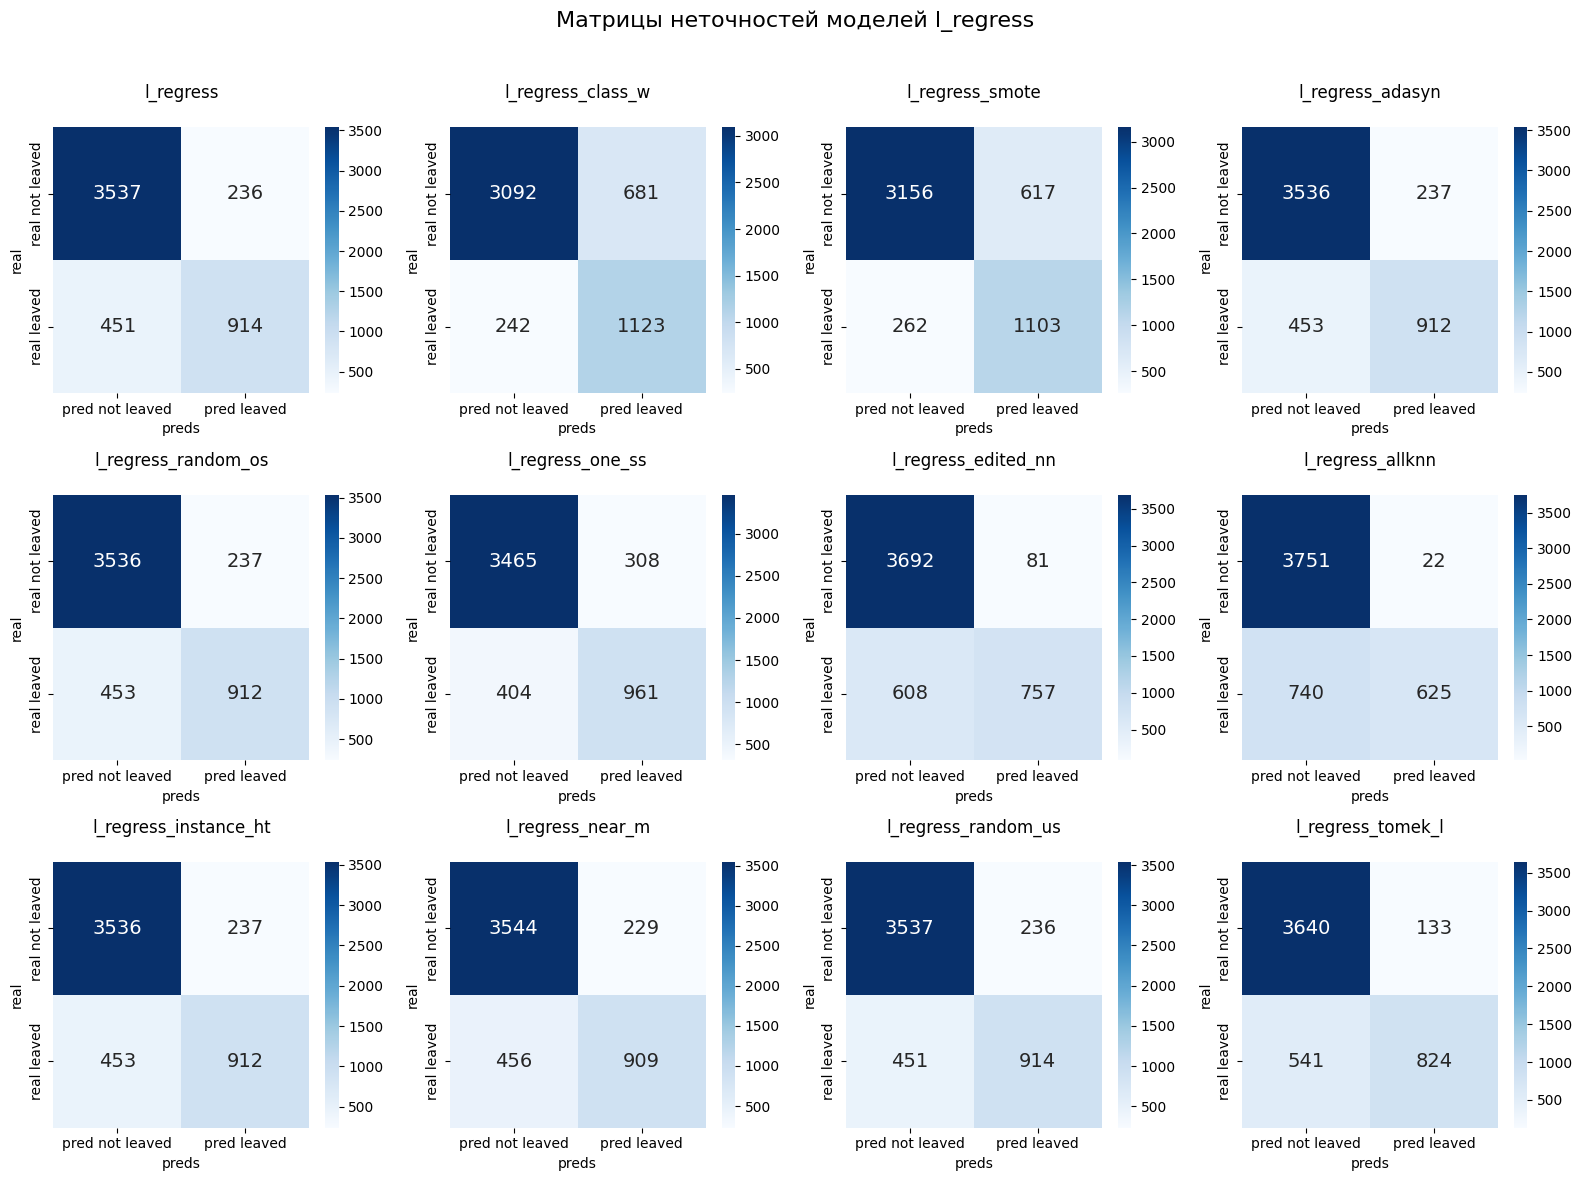

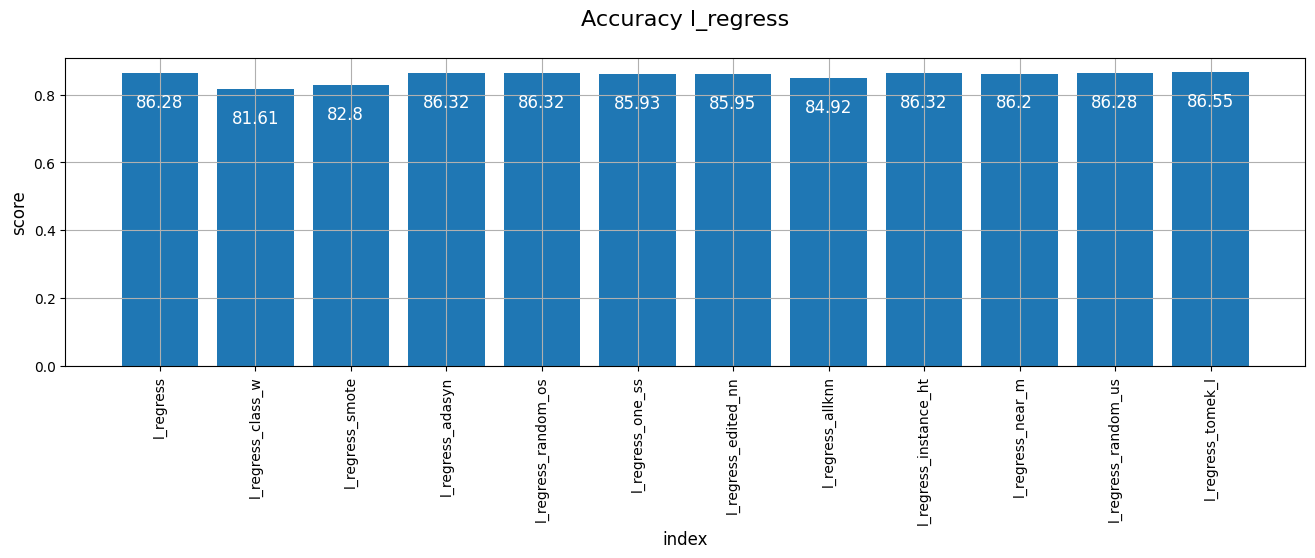

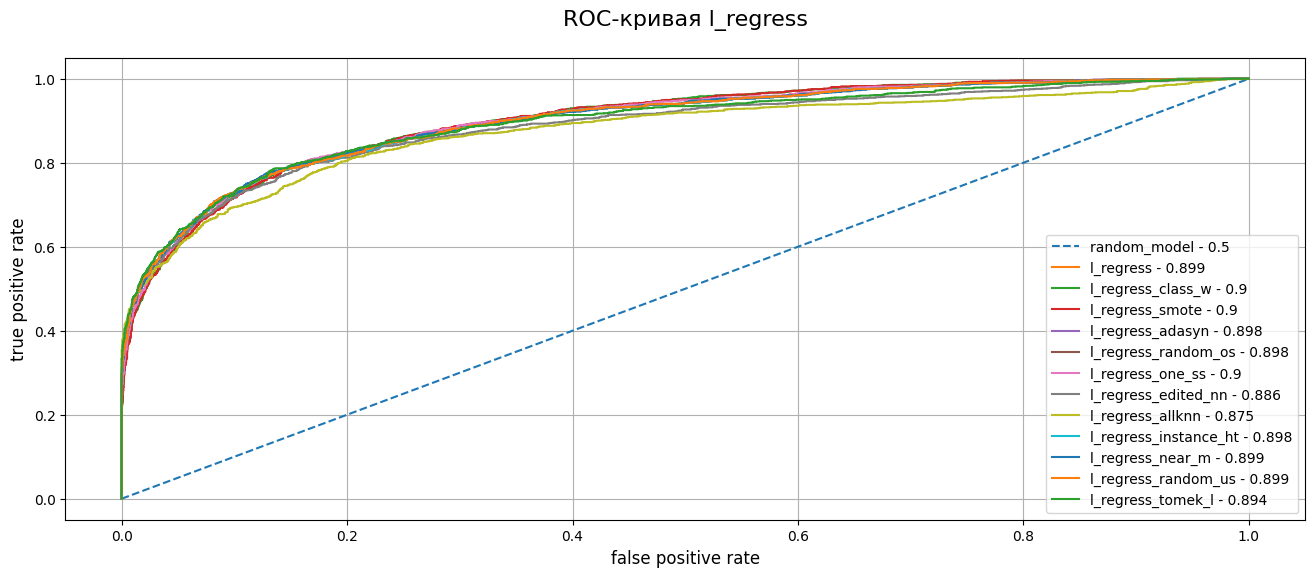

In [256]:
train_multi_models(
    LogisticRegression(), 
    params_lr, 
    X_train, 
    y_train, 
    name='l_regress', 
    save_to=results
)

>Все модели продемонстрировали истинно-положительный уклон - предсказано, что абонент не разорвал контракт, и это правда.
>
>С учётом значений метрик accuracy и ROC-AUC, а также распределения значений по матрице неточностей наилучшую предсказательную способность продемонстрировала модель, обученная с помощью баланса классов методом OneSidedSelection.

Сохранение лучшей модели:

In [257]:
update_best_results('l_regress_one_ss', best_results, results)

---

#### 3.4.2 DecisionTreeClassifier

Задание параметров модели:

In [258]:
params_dtc = {
    'model__criterion': ['gini', 'entropy', 'log_loss'],
    'model__splitter': ['best', 'random'],
    'model__max_depth': [None, *range(1, 31)],
    'model__min_samples_leaf': range(1, 11),
    'model__min_samples_split': range(2, 11),
    'model__random_state': [RANDOM_STATE]
}

Обучение модели с отбором признаков по исследовательскому анализу:

[1/4] Searching with no balancing...
Accuracy: 85.66 %
ROC-AUC: 87.71 %
Estimated time: 0:00:00.722068

---

[2/4] Searching with standard balancing...
Accuracy: 80.36 %
ROC-AUC: 81.07 %
Estimated time: 0:00:00.764949

---

[3/4] Searching with oversampling...

| [1/3] Smote...
Accuracy: 83.98 %
ROC-AUC: 86.0 %
Estimated time: 0:00:01.330945

| [2/3] Adasyn...
Accuracy: 83.71 %
ROC-AUC: 83.77 %
Estimated time: 0:00:01.007600

| [3/3] Random_os...
Accuracy: 83.44 %
ROC-AUC: 77.59 %
Estimated time: 0:00:00.690722

---

[4/4] Searching with undersampling...

| [1/7] One_ss...
Accuracy: 84.24 %
ROC-AUC: 86.83 %
Estimated time: 0:00:02.525500

| [2/7] Edited_nn...
Accuracy: 84.97 %
ROC-AUC: 86.43 %
Estimated time: 0:00:01.957482

| [3/7] Allknn...
Accuracy: 84.18 %
ROC-AUC: 85.6 %
Estimated time: 0:00:04.236994

| [4/7] Instance_ht...
Accuracy: 85.15 %
ROC-AUC: 85.94 %
Estimated time: 0:00:06.061106

| [5/7] Near_m...
Accuracy: 84.1 %
ROC-AUC: 84.08 %
Estimated time: 0:00:01.068218

| [6/7]

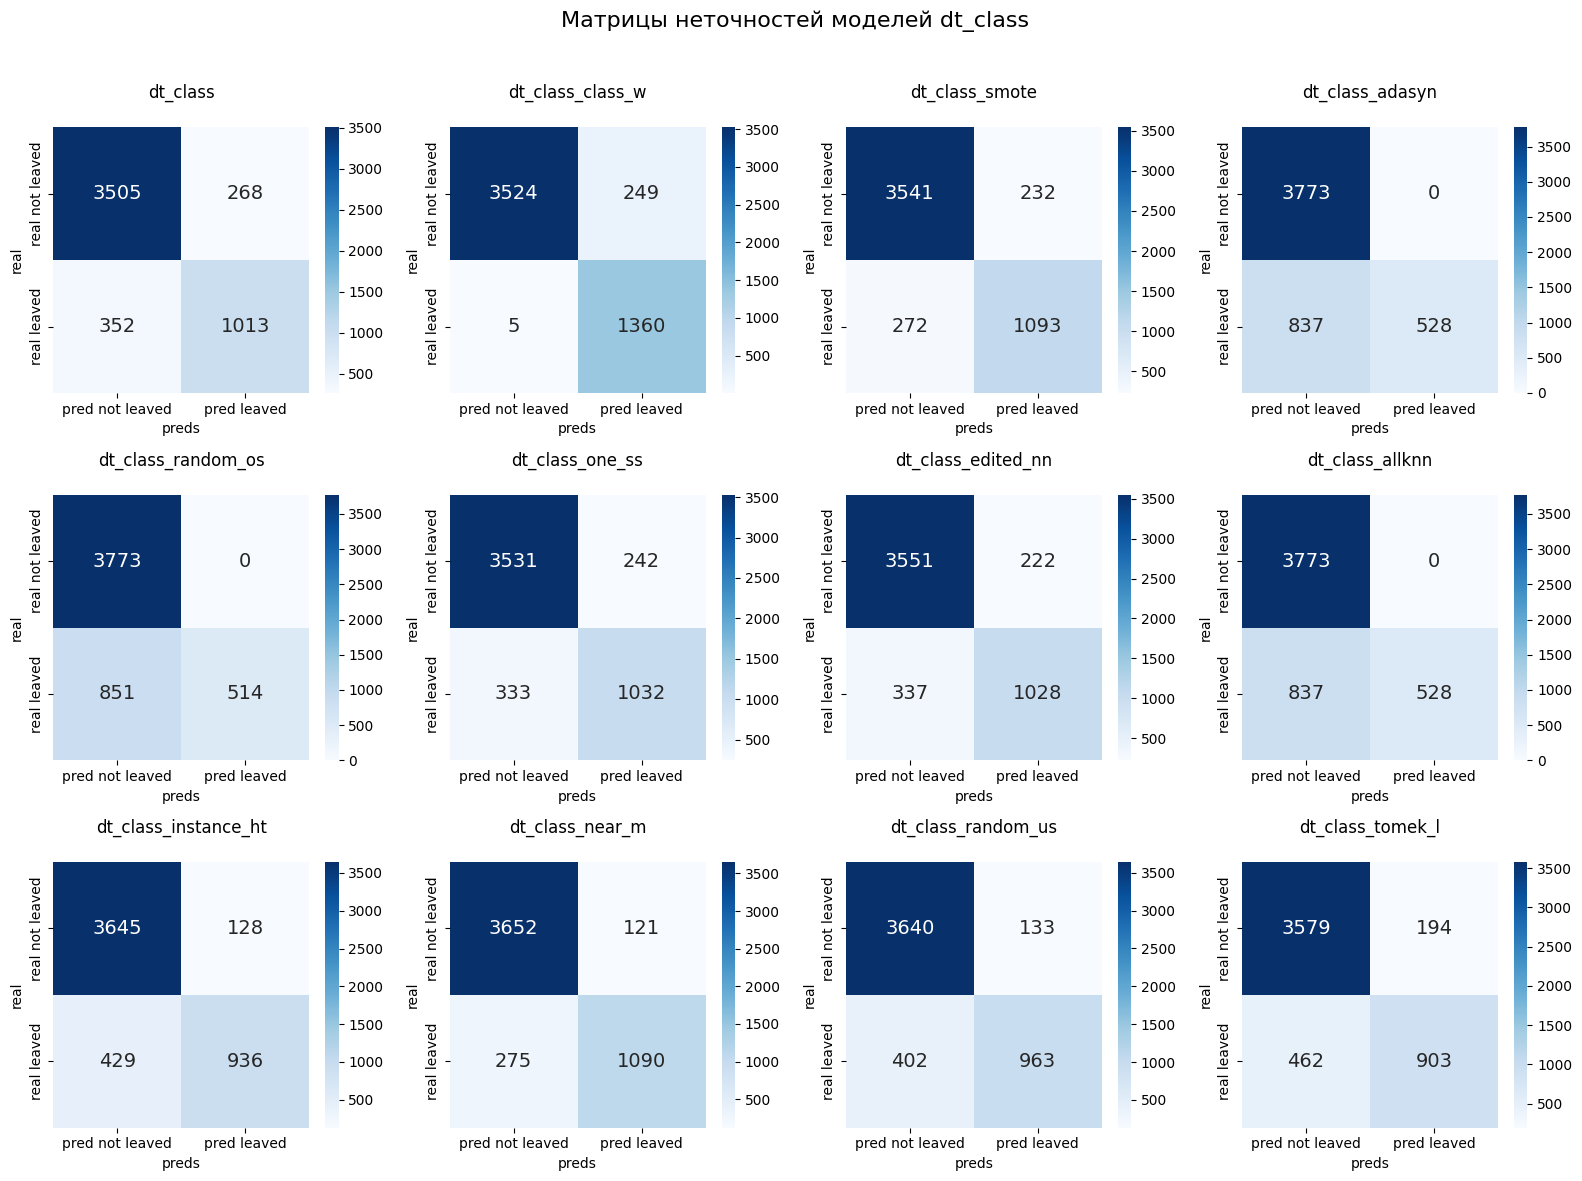

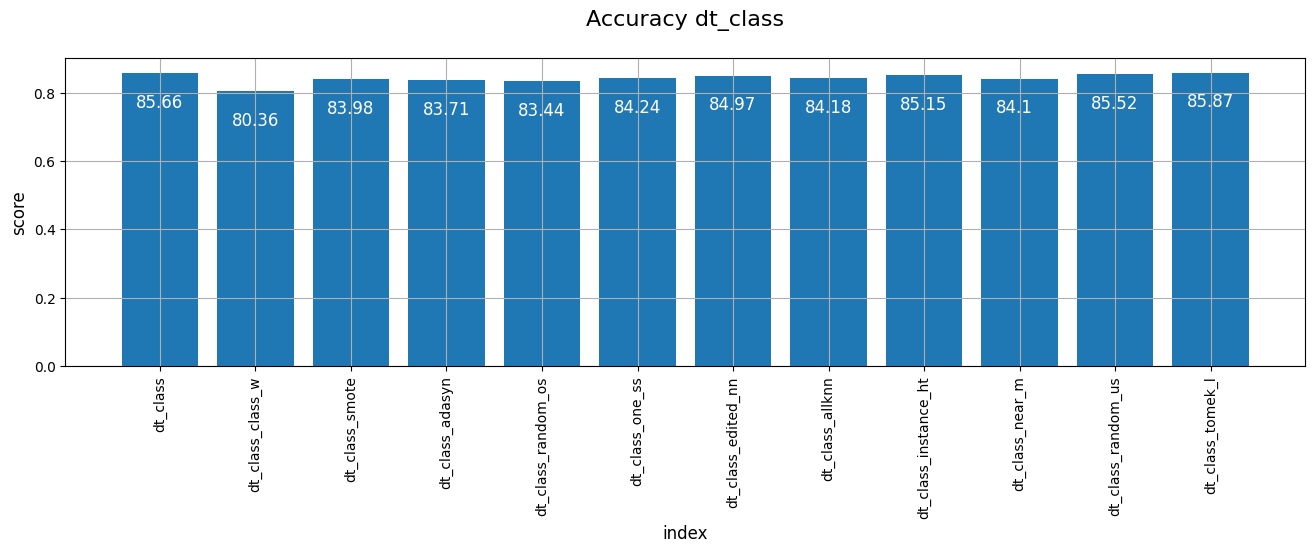

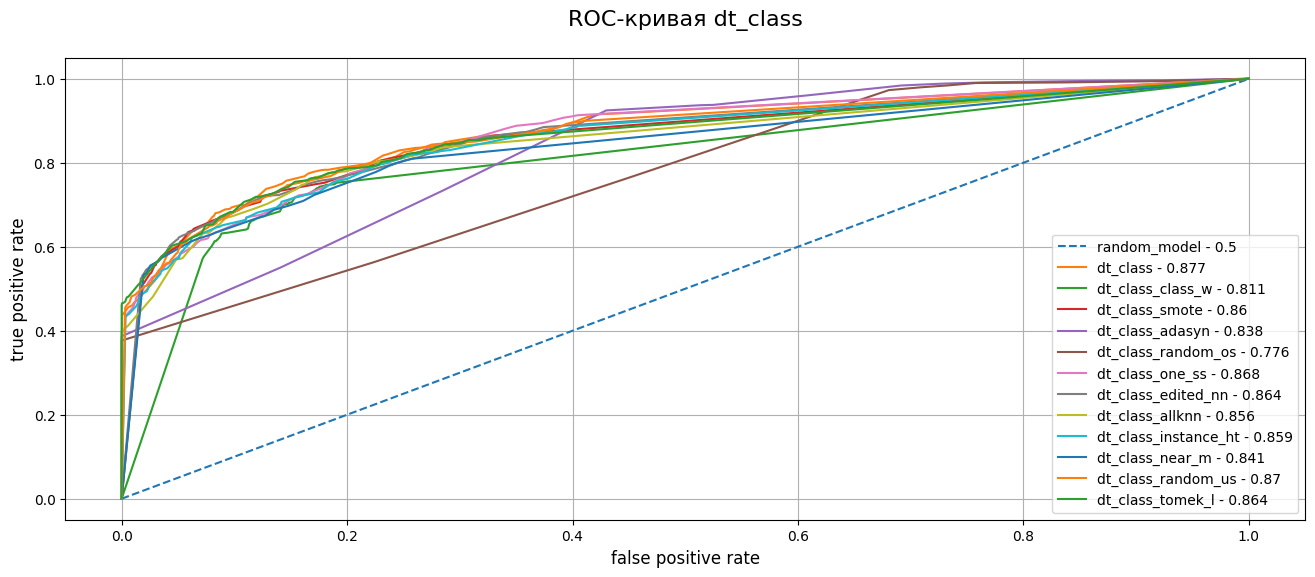

In [259]:
train_multi_models(
    DecisionTreeClassifier(), 
    params_dtc, 
    X_train, 
    y_train, 
    name='dt_class', 
    save_to=results
)

>Все модели продемонстрировали истинно-положительный уклон - предсказано, что абонент не разорвал контракт, и это правда.
>
>С учётом значений метрик accuracy и ROC-AUC, а также распределения значений по матрице неточностей наилучшую предсказательную способность продемонстрировала модель, обученная с помощью баланса классов методом RandomUnderSampler.

Сохранение лучшей модели:

In [260]:
update_best_results('dt_class_random_us', best_results, results)

---

#### 3.4.3 RandomForestClassifier

Задание параметров модели:

In [261]:
params_rfc = {
    'model__n_estimators': range(100, 3000, 100),
    'model__criterion': ['gini', 'entropy', 'log_loss'],
    'model__max_depth': range(1, 51),
    'model__min_samples_leaf': range(1, 11),
    'model__min_samples_split': range(2, 11),
    'model__random_state': [RANDOM_STATE],
    'model__n_jobs': [-1],
    'model__warm_start': [True, False]
}

Обучение модели с отбором признаков по исследовательскому анализу:

[1/4] Searching with no balancing...
Accuracy: 86.61 %
ROC-AUC: 90.44 %
Estimated time: 0:00:46.580266

---

[2/4] Searching with standard balancing...
Accuracy: 85.95 %
ROC-AUC: 90.07 %
Estimated time: 0:00:53.598849

---

[3/4] Searching with oversampling...

| [1/3] Smote...
Accuracy: 86.08 %
ROC-AUC: 90.45 %
Estimated time: 0:01:19.695062

| [2/3] Adasyn...
Accuracy: 86.01 %
ROC-AUC: 90.29 %
Estimated time: 0:01:43.202419

| [3/3] Random_os...
Accuracy: 86.55 %
ROC-AUC: 90.49 %
Estimated time: 0:00:53.165756

---

[4/4] Searching with undersampling...

| [1/7] One_ss...
Accuracy: 86.05 %
ROC-AUC: 90.39 %
Estimated time: 0:00:23.396671

| [2/7] Edited_nn...
Accuracy: 86.06 %
ROC-AUC: 90.37 %
Estimated time: 0:01:04.073644

| [3/7] Allknn...
Accuracy: 84.84 %
ROC-AUC: 87.99 %
Estimated time: 0:01:13.169831

| [4/7] Instance_ht...
Accuracy: 86.59 %
ROC-AUC: 90.38 %
Estimated time: 0:00:52.401472

| [5/7] Near_m...
Accuracy: 85.66 %
ROC-AUC: 90.47 %
Estimated time: 0:00:23.566924

| [6

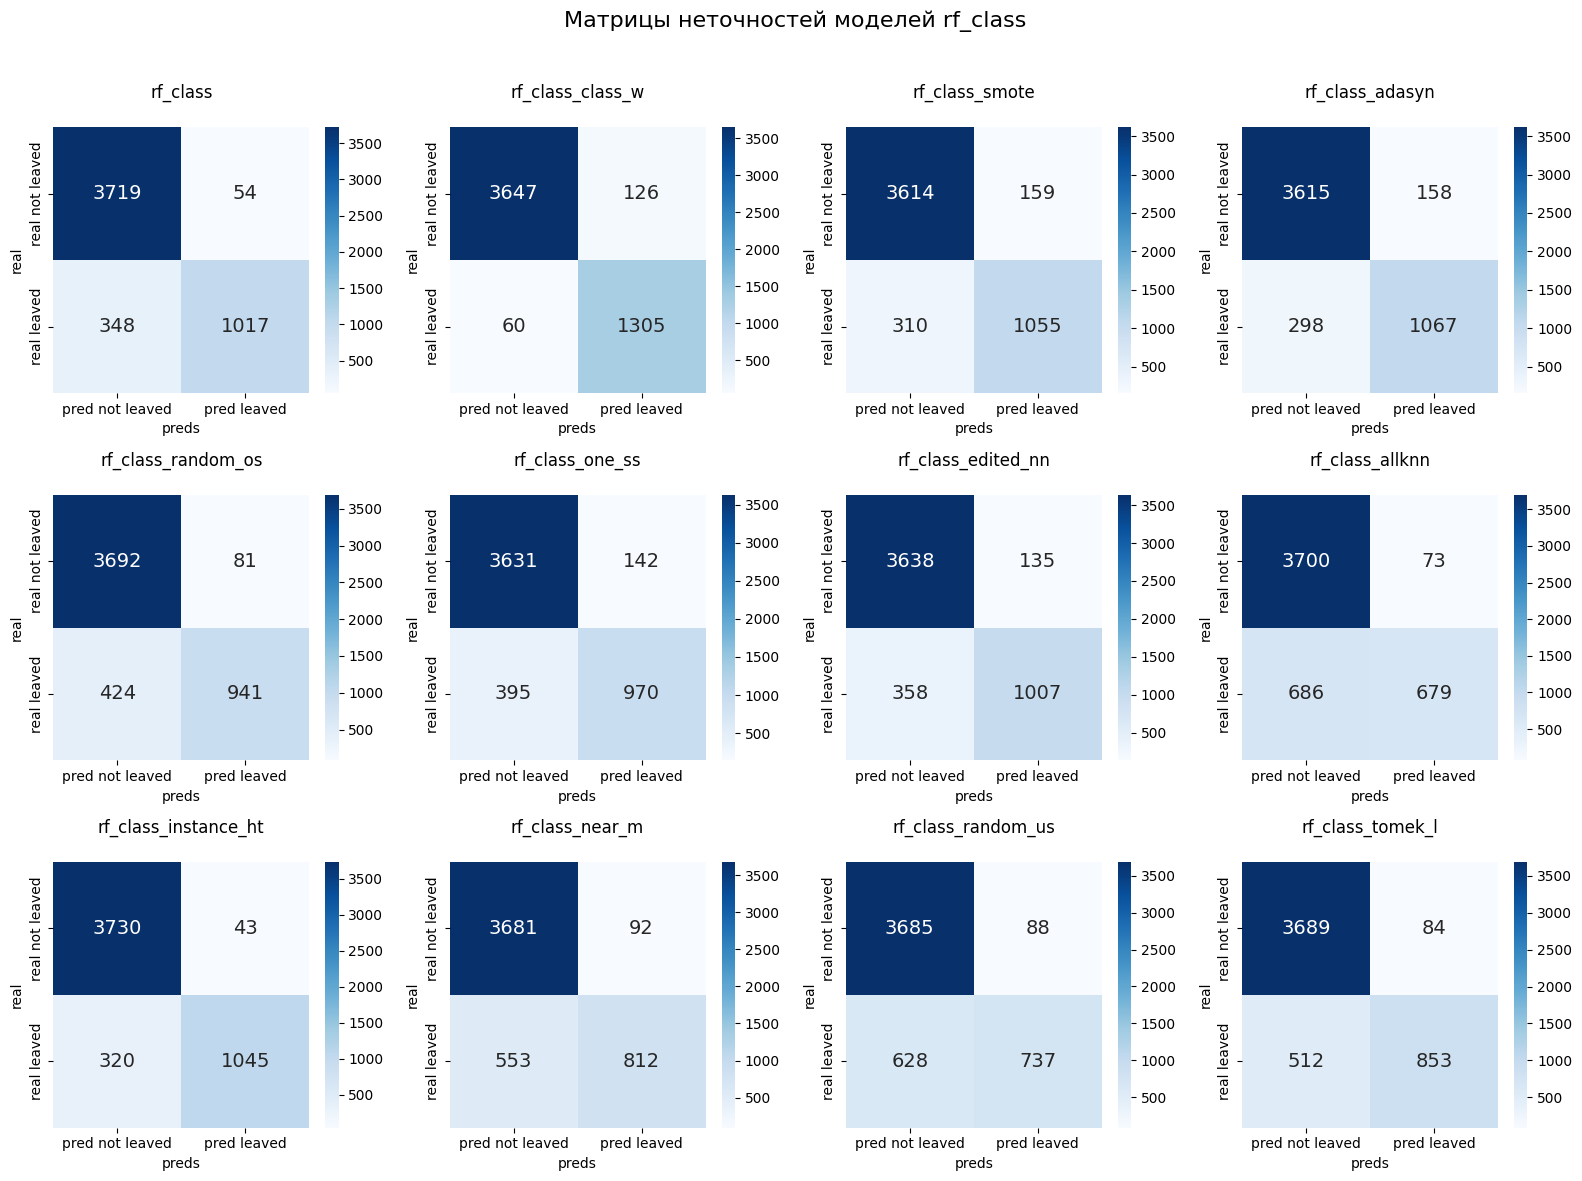

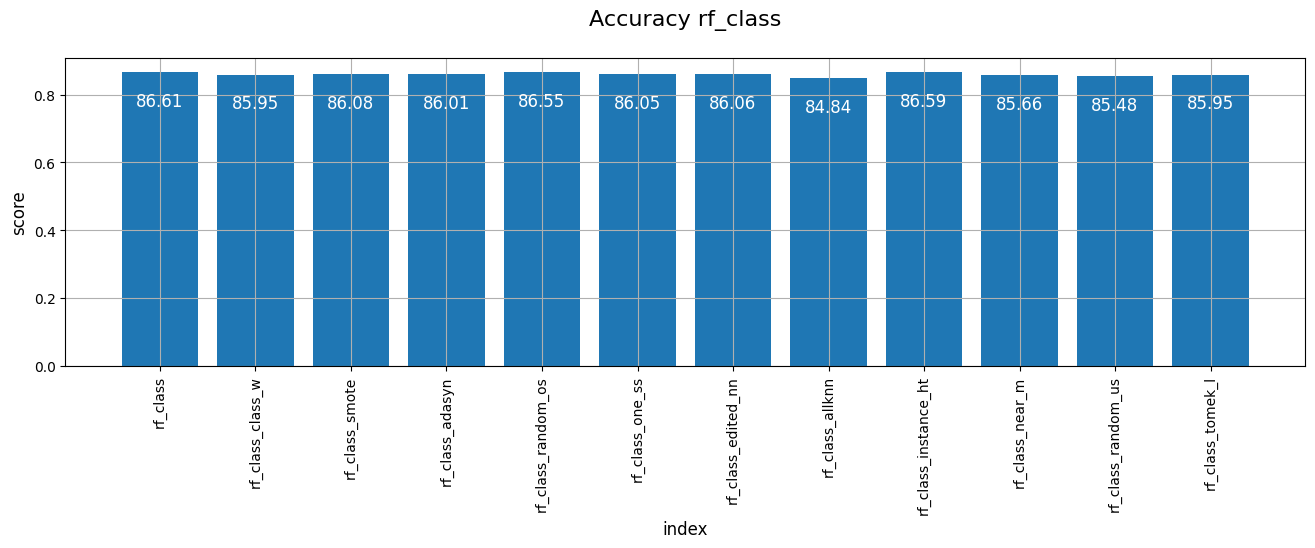

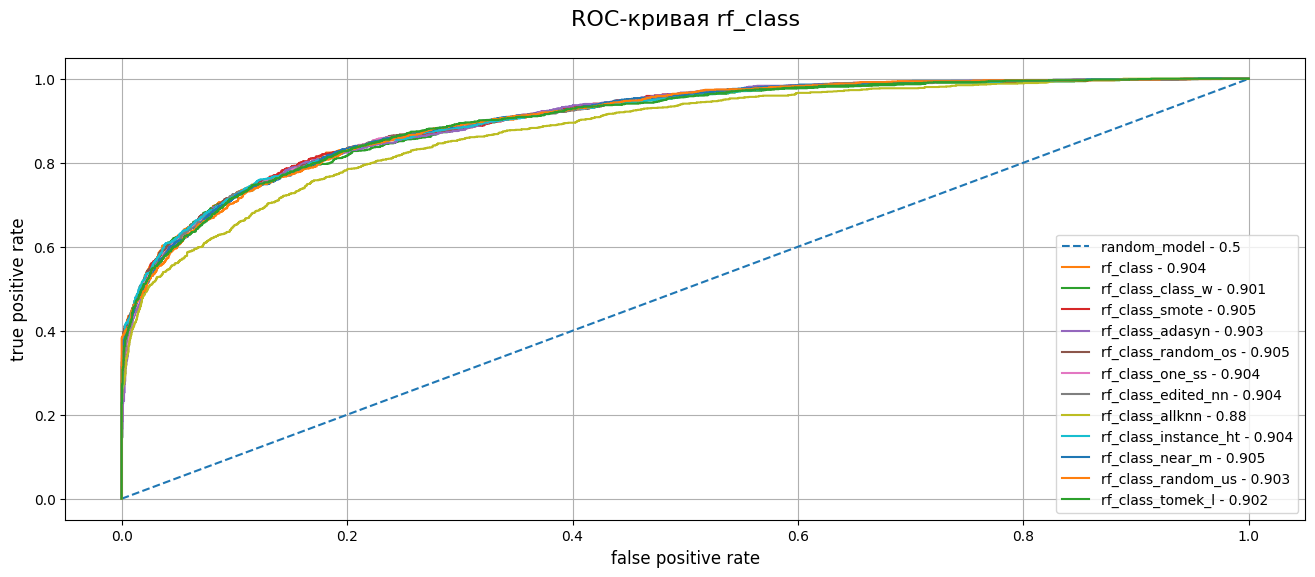

In [262]:
train_multi_models(
    RandomForestClassifier(), 
    params_rfc, 
    X_train, 
    y_train, 
    name='rf_class', 
    save_to=results
)

>Все модели продемонстрировали истинно-положительный уклон - предсказано, что абонент не разорвал контракт, и это правда.
>
>С учётом значений метрик accuracy и ROC-AUC, а также распределения значений по матрице неточностей наилучшую предсказательную способность продемонстрировала модель, обученная без баланса классов.

Сохранение лучшей модели:

In [263]:
update_best_results('rf_class', best_results, results)

---

#### 3.4.4 SVC

Задание параметров модели:

In [264]:
params_svc = {
    'model__C': range(1, 11),
    'model__kernel': ['linear'],
    'model__degree': range(1, 11),
    'model__gamma': ['scale', 'auto'],
    'model__shrinking': [True, False],
    'model__probability': [True],
    'model__random_state': [RANDOM_STATE],
    'model__break_ties': [True, False]
}

Обучение модели с отбором признаков по исследовательскому анализу:

[1/4] Searching with no balancing...
Accuracy: 86.61 %
ROC-AUC: 88.92 %
Estimated time: 0:02:57.368875

---

[2/4] Searching with standard balancing...
Accuracy: 82.23 %
ROC-AUC: 89.85 %
Estimated time: 0:01:45.427933

---

[3/4] Searching with oversampling...

| [1/3] Smote...
Accuracy: 82.95 %
ROC-AUC: 89.84 %
Estimated time: 0:02:51.004078

| [2/3] Adasyn...
Accuracy: 86.61 %
ROC-AUC: 88.91 %
Estimated time: 0:03:35.324428

| [3/3] Random_os...
Accuracy: 86.51 %
ROC-AUC: 88.91 %
Estimated time: 0:02:30.625121

---

[4/4] Searching with undersampling...

| [1/7] One_ss...
Accuracy: 86.24 %
ROC-AUC: 89.21 %
Estimated time: 0:00:34.339545

| [2/7] Edited_nn...
Accuracy: 86.1 %
ROC-AUC: 87.95 %
Estimated time: 0:00:24.252888

| [3/7] Allknn...
Accuracy: 86.16 %
ROC-AUC: 88.5 %
Estimated time: 0:00:41.249736

| [4/7] Instance_ht...
Accuracy: 86.55 %
ROC-AUC: 88.9 %
Estimated time: 0:00:27.416144

| [5/7] Near_m...
Accuracy: 86.59 %
ROC-AUC: 88.91 %
Estimated time: 0:02:15.228891

| [6/7]

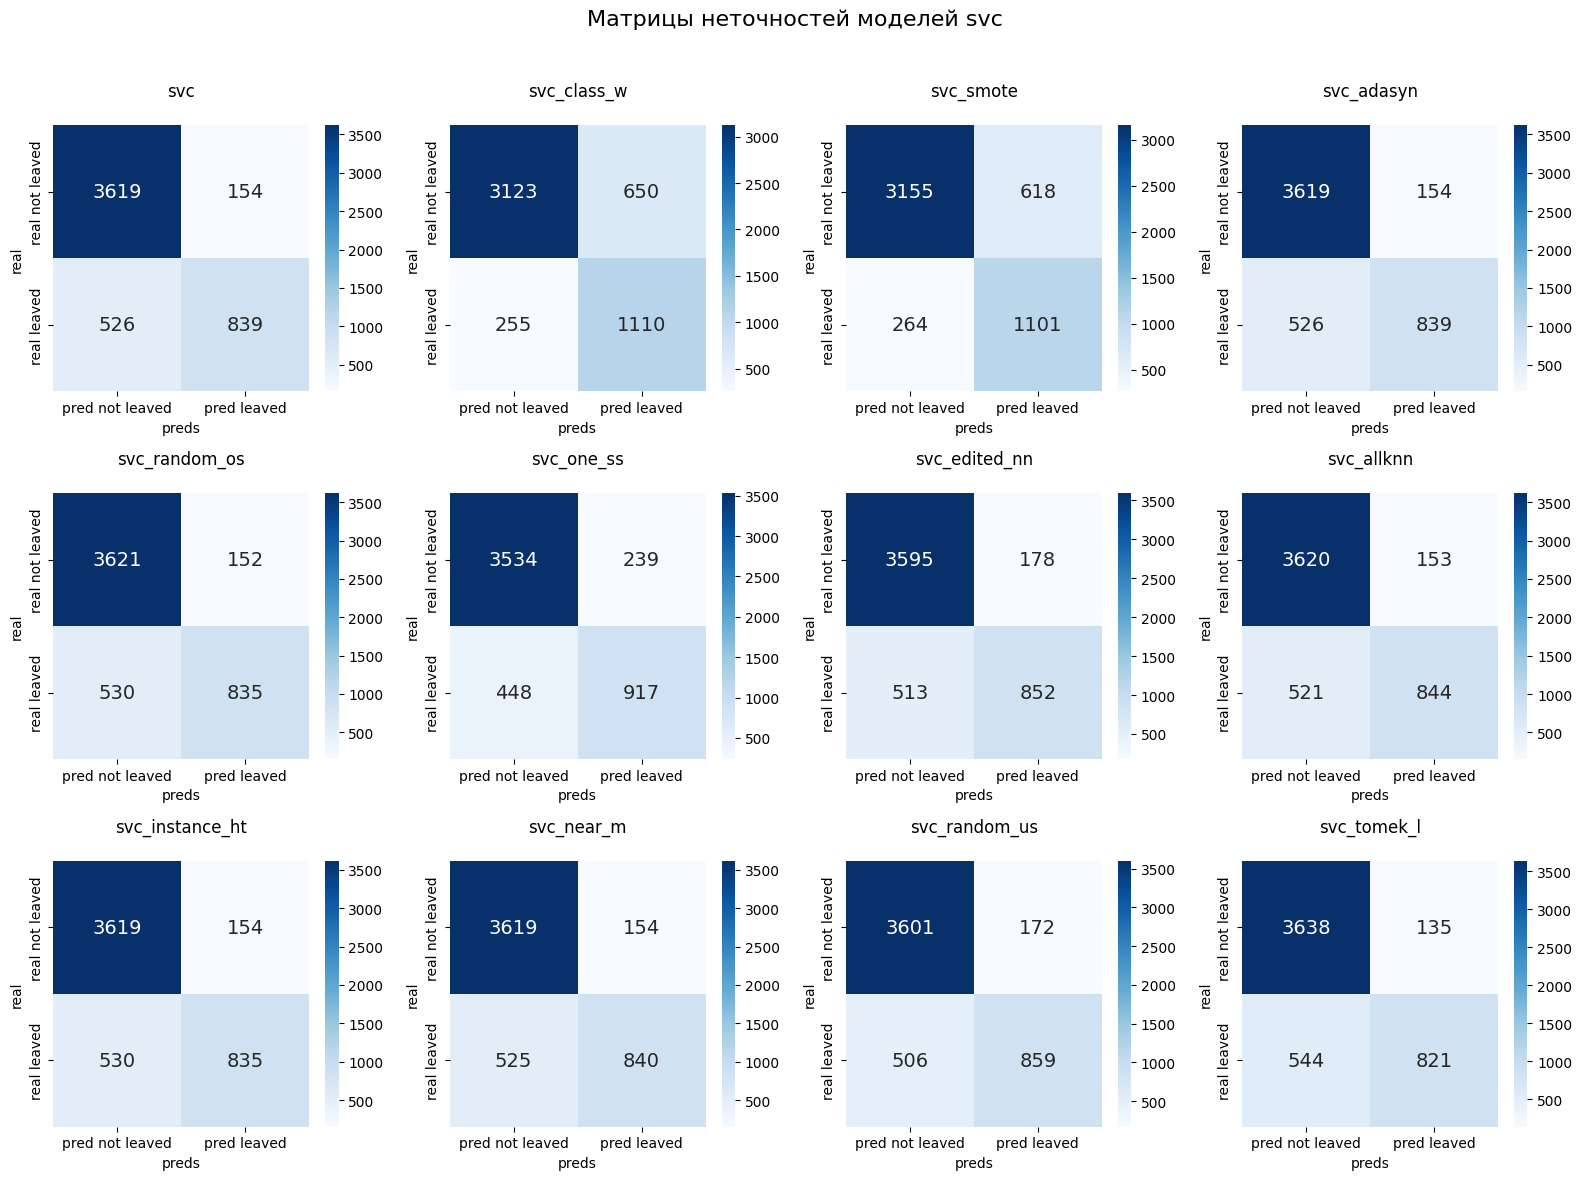

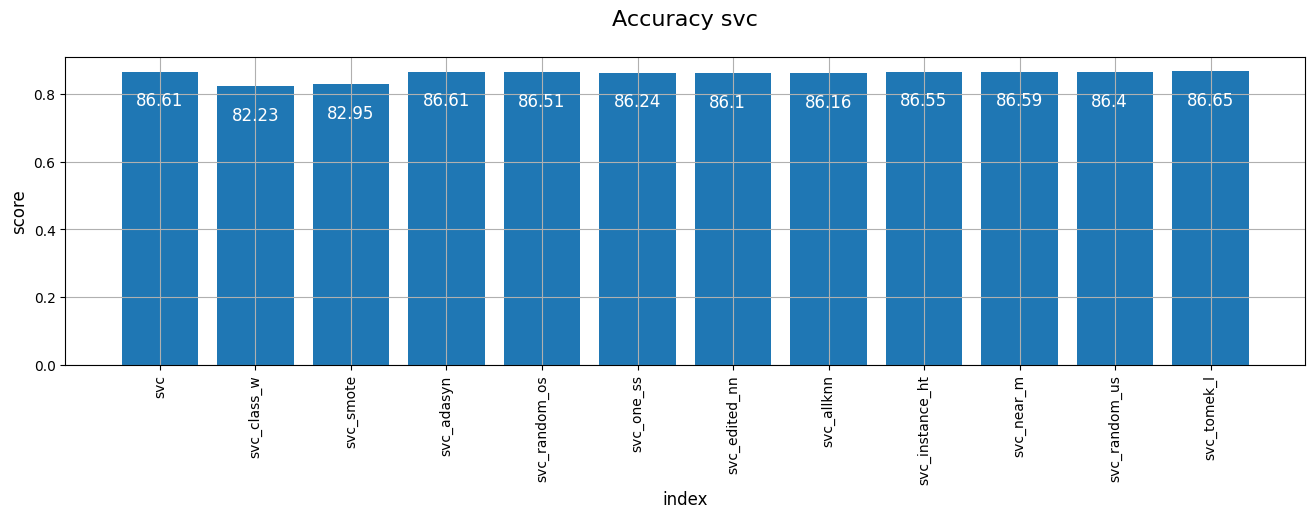

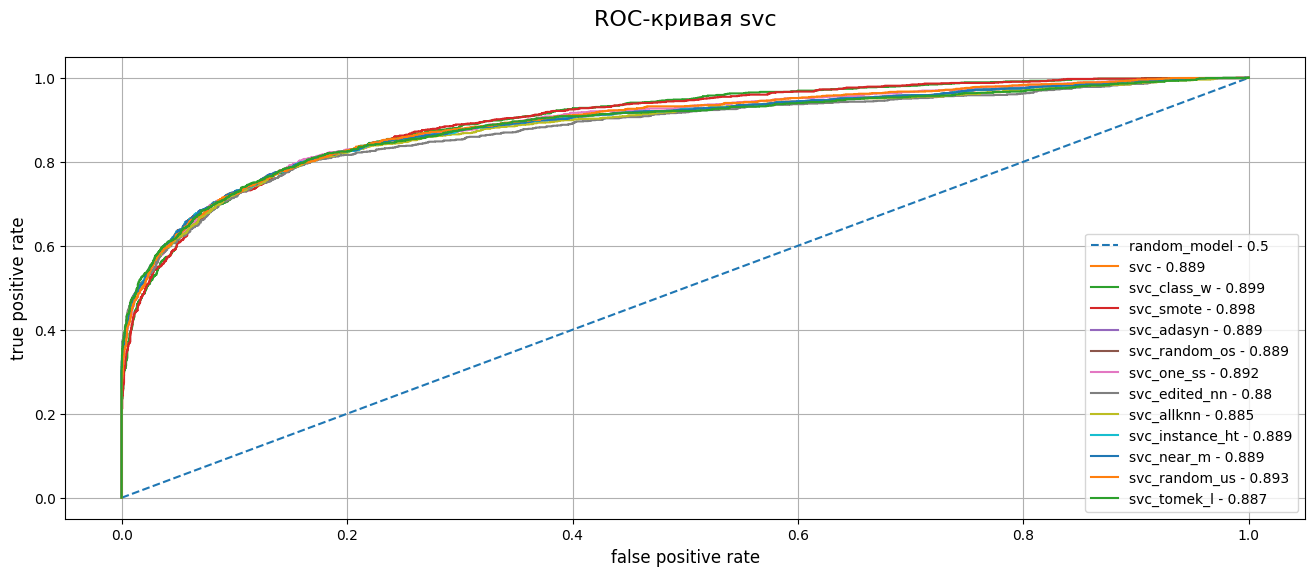

In [265]:
train_multi_models(
    SVC(), 
    params_svc, 
    X_train, 
    y_train, 
    name='svc', 
    save_to=results
)

>Все модели продемонстрировали истинно-положительный уклон - предсказано, что абонент не разорвал контракт, и это правда.
>
>С учётом значений метрик accuracy и ROC-AUC, а также распределения значений по матрице неточностей наилучшую предсказательную способность продемонстрировала модель, обученная с помощью баланса классов методом RandomUnderSampler.

Сохранение лучшей модели:

In [266]:
update_best_results('svc_random_us', best_results, results)

---

#### 3.4.5 GaussianNB

Обучение модели с отбором признаков по исследовательскому анализу:

[1/4] Searching with no balancing...
Accuracy: 75.17 %
ROC-AUC: 85.38 %
Estimated time: 0:00:00.341940

---

[2/4] Searching with standard balancing...
Pass

---

[3/4] Searching with oversampling...

| [1/3] Smote...
Accuracy: 75.07 %
ROC-AUC: 84.81 %
Estimated time: 0:00:01.083823

| [2/3] Adasyn...
Accuracy: 75.17 %
ROC-AUC: 85.38 %
Estimated time: 0:00:00.718172

| [3/3] Random_os...
Accuracy: 75.17 %
ROC-AUC: 85.38 %
Estimated time: 0:00:00.411666

---

[4/4] Searching with undersampling...

| [1/7] One_ss...
Accuracy: 77.66 %
ROC-AUC: 63.26 %
Estimated time: 0:00:02.082809

| [2/7] Edited_nn...
Accuracy: 80.71 %
ROC-AUC: 71.33 %
Estimated time: 0:00:01.158900

| [3/7] Allknn...
Accuracy: 78.61 %
ROC-AUC: 72.94 %
Estimated time: 0:00:07.290960

| [4/7] Instance_ht...
Accuracy: 75.17 %
ROC-AUC: 85.38 %
Estimated time: 0:00:05.960962

| [5/7] Near_m...
Accuracy: 75.17 %
ROC-AUC: 85.38 %
Estimated time: 0:00:01.491560

| [6/7] Random_us...
Accuracy: 75.17 %
ROC-AUC: 85.38 %
Estimated

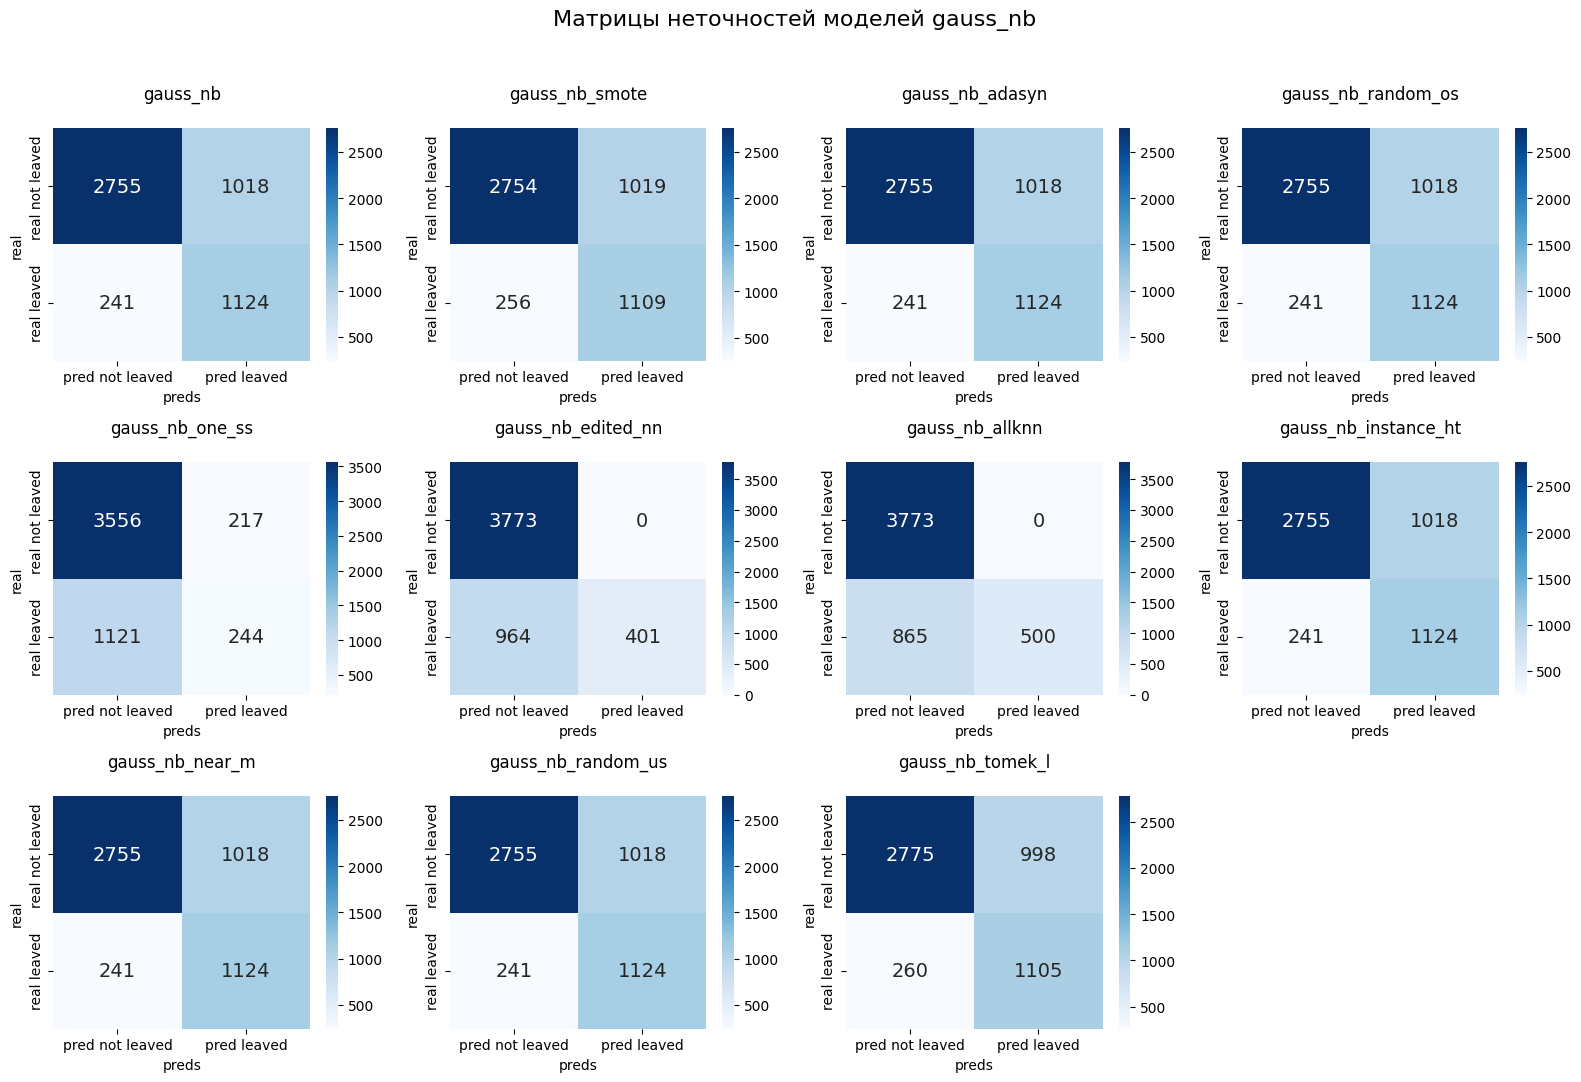

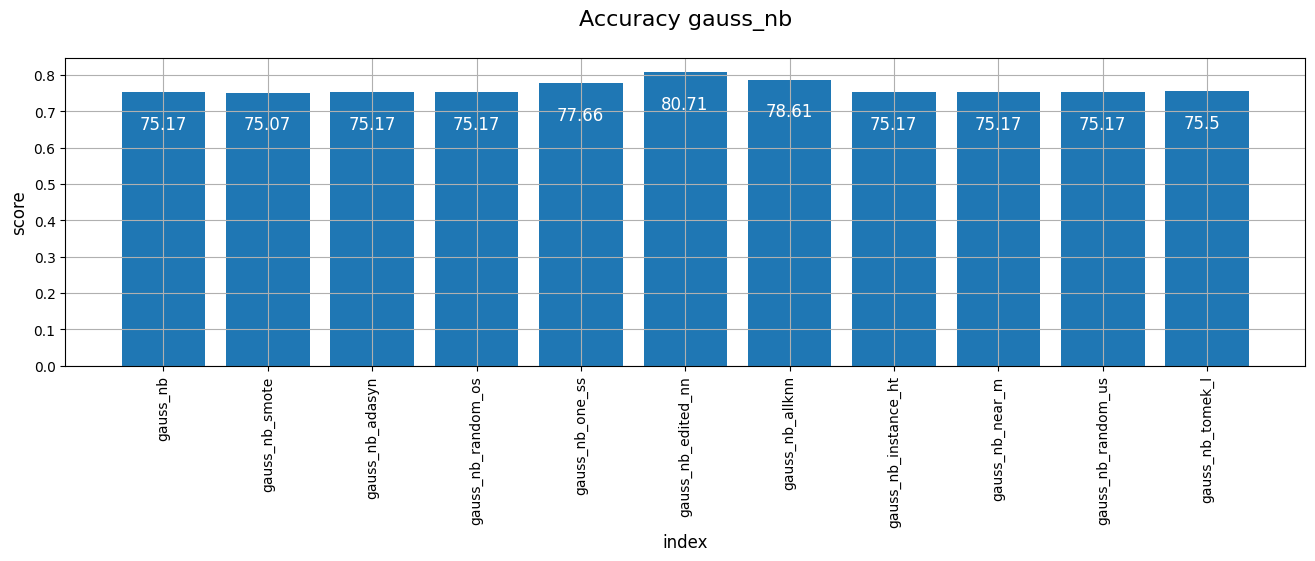

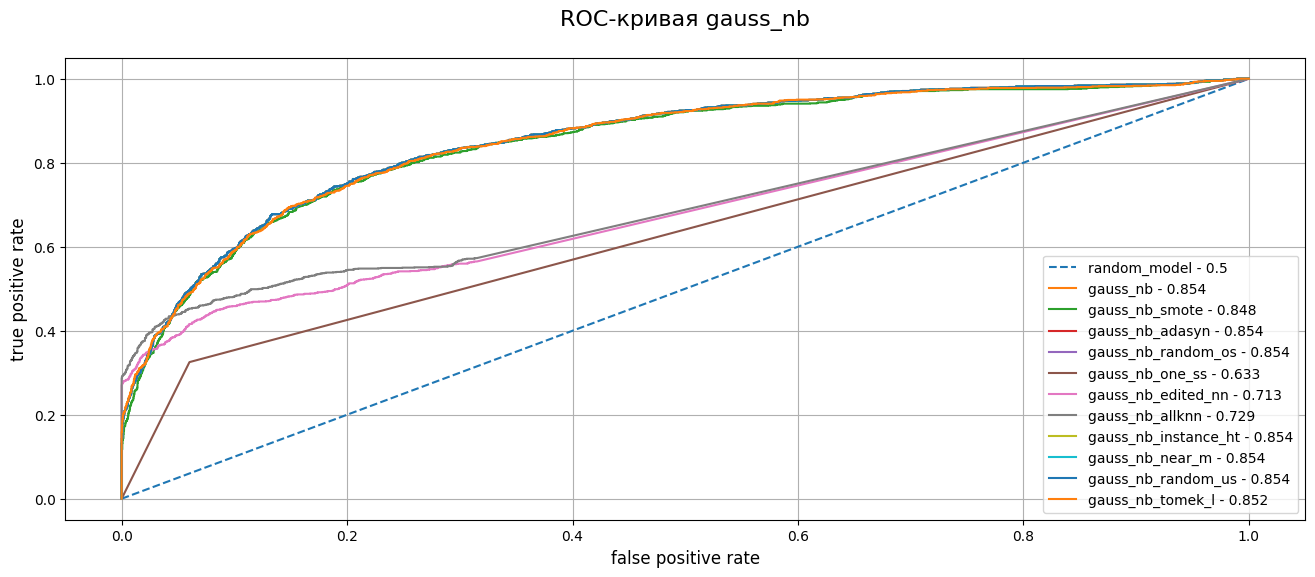

In [267]:
train_multi_models(
    GaussianNB(), 
    None, 
    X_train, 
    y_train, 
    name='gauss_nb', 
    save_to=results,
    shift=-0.23
)

>Все модели продемонстрировали истинно-положительный уклон - предсказано, что абонент не разорвал контракт, и это правда. Однако при этом по сравнению с другими моделями предсказания также больше уходят в сторону ложно-положительных и ложно-отрицательных ответов - когда предсказано одно, а по факту другое.
>
>С учётом неудовлетворительного распределения значений по матрице неточностей, несмотря на значения метрик accuracy и ROC-AUC, данная модель далее рассматриваться не будет.

---

#### 3.4.6 LGBMClassifier

Задание параметров модели:

In [268]:
params_lgbmc = {
    'model__n_estimators': range(100, 3000, 100),
    'model__num_leaves': range(1, 51),
    'model__max_depth': [-1, *range(1, 31)],
    'model__learning_rate': [0.00001, 0.0001, 0.001, 0.01, 0.1],
    'model__random_state': [RANDOM_STATE],
    'model__n_jobs': [-1]
}

Обучение модели с отбором признаков по исследовательскому анализу:

[1/4] Searching with no balancing...
Accuracy: 87.62 %
ROC-AUC: 91.4 %
Estimated time: 0:00:35.871869

---

[2/4] Searching with standard balancing...
Accuracy: 85.54 %
ROC-AUC: 91.63 %
Estimated time: 0:00:14.964936

---

[3/4] Searching with oversampling...

| [1/3] Smote...
Accuracy: 87.33 %
ROC-AUC: 91.96 %
Estimated time: 0:00:18.786719

| [2/3] Adasyn...
Accuracy: 87.86 %
ROC-AUC: 92.01 %
Estimated time: 0:00:16.873114

| [3/3] Random_os...
Accuracy: 87.6 %
ROC-AUC: 91.67 %
Estimated time: 0:00:13.070038

---

[4/4] Searching with undersampling...

| [1/7] One_ss...
Accuracy: 86.8 %
ROC-AUC: 90.86 %
Estimated time: 0:00:13.851422

| [2/7] Edited_nn...
Accuracy: 87.21 %
ROC-AUC: 92.01 %
Estimated time: 0:00:12.141359

| [3/7] Allknn...
Accuracy: 84.39 %
ROC-AUC: 82.43 %
Estimated time: 0:00:20.399340

| [4/7] Instance_ht...
Accuracy: 85.21 %
ROC-AUC: 89.55 %
Estimated time: 0:00:16.792133

| [5/7] Near_m...
Accuracy: 87.39 %
ROC-AUC: 91.68 %
Estimated time: 0:00:12.311551

| [6/7]

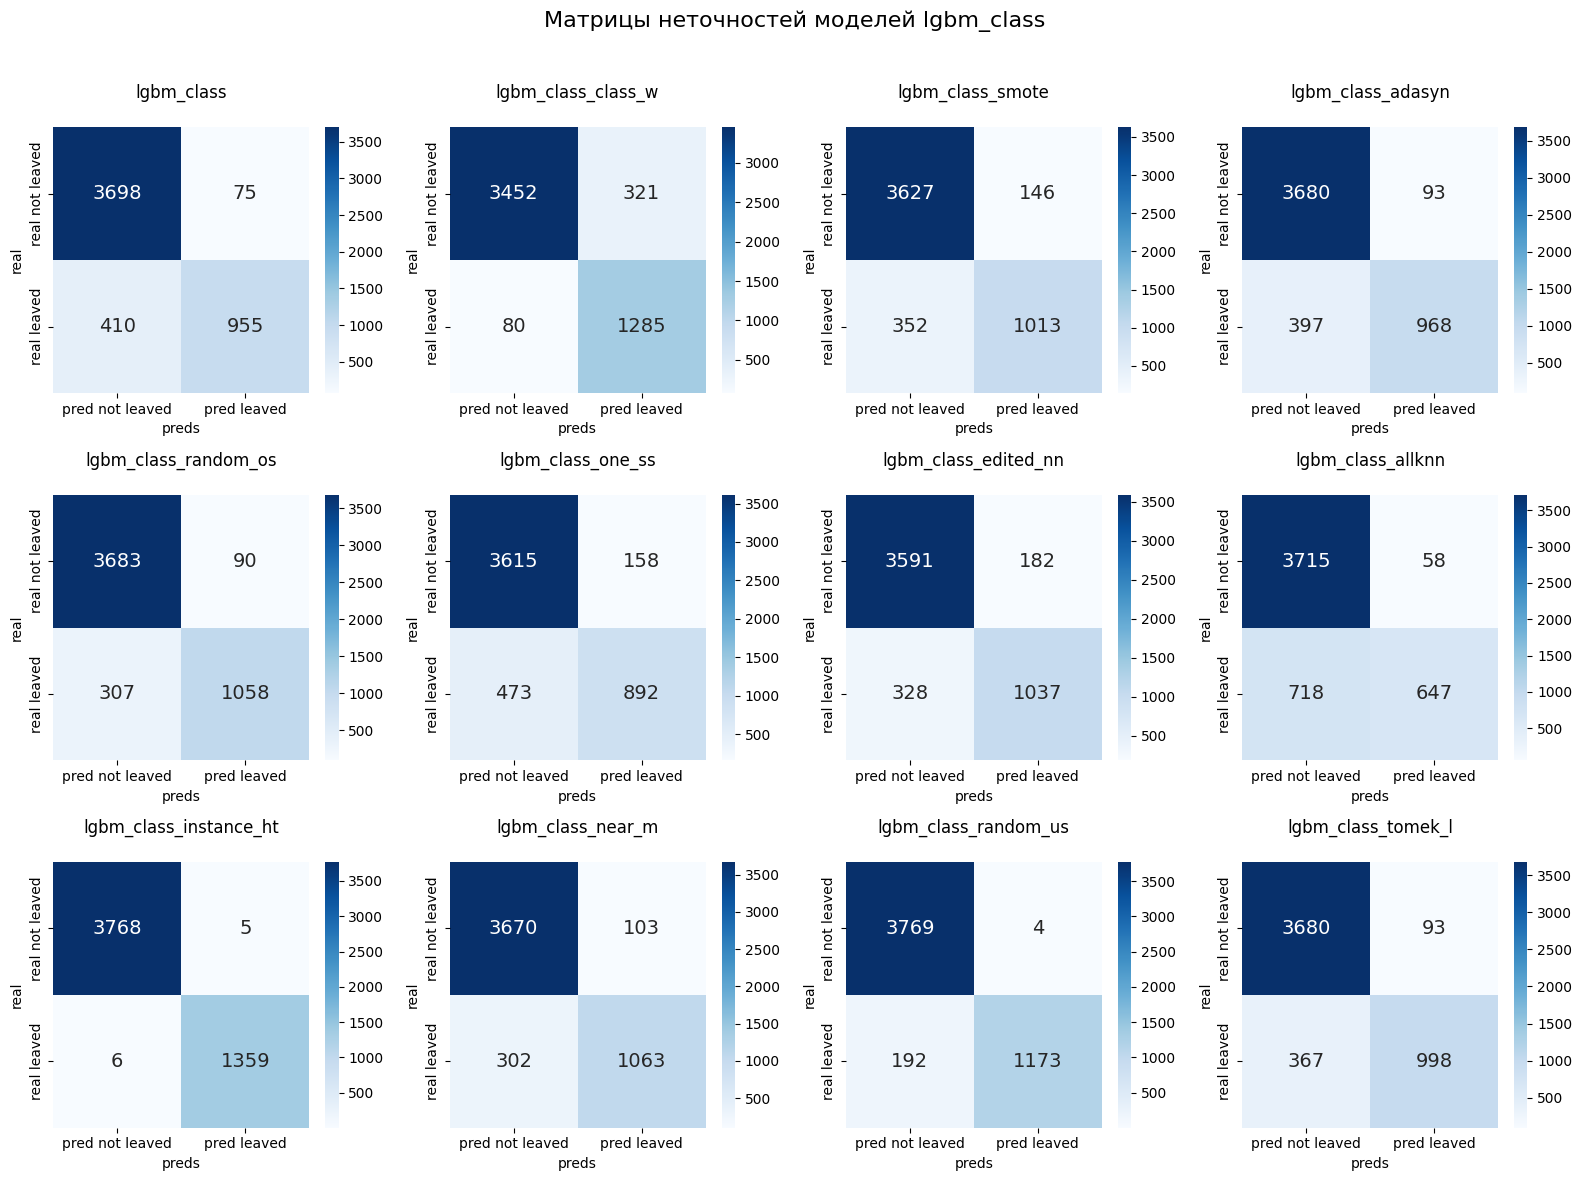

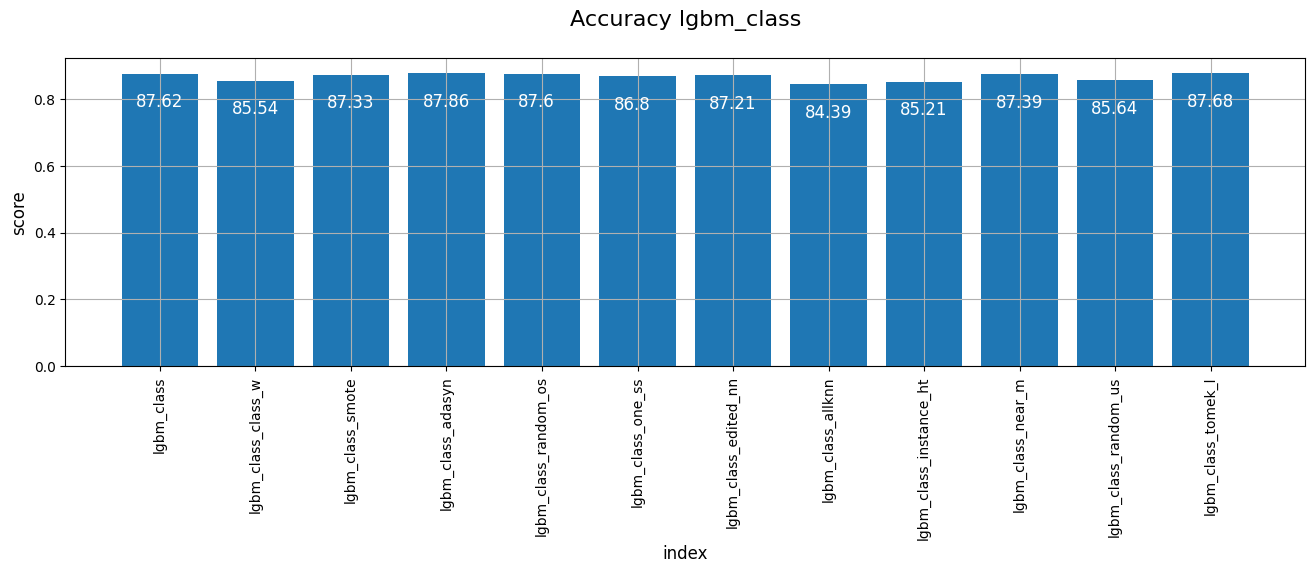

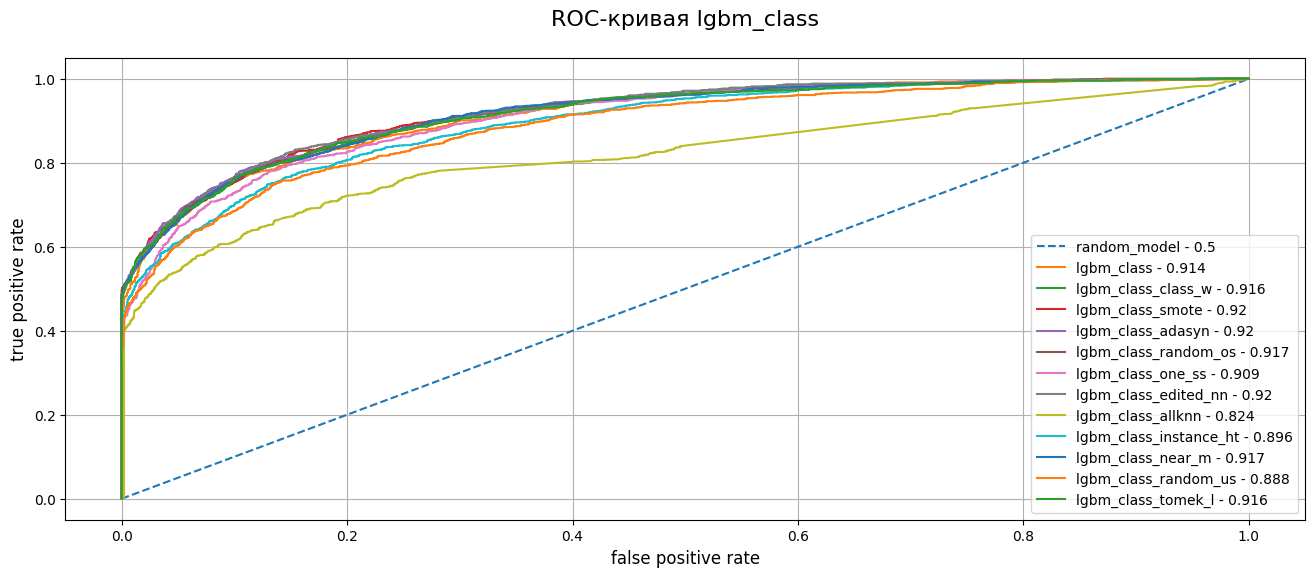

In [269]:
train_multi_models(
    LGBMClassifier(), 
    params_lgbmc, 
    X_train, 
    y_train, 
    name='lgbm_class', 
    save_to=results
)

>Все модели продемонстрировали истинно-положительный уклон - предсказано, что абонент не разорвал контракт, и это правда.
>
>С учётом значений метрик accuracy и ROC-AUC, а также распределения значений по матрице неточностей наилучшую предсказательную способность продемонстрировала модель, обученная с помощью баланса классов EditedNearestNeighbours.

Сохранение лучшей модели:

In [270]:
update_best_results('lgbm_class_edited_nn', best_results, results)

---

#### 3.4.7 CatBoostClassifier

Поскольку алгоритм применяет различные техники кодирования к категориальным признакам, обучение будет произведено на нетрансформированных признаках. А ввиду процесса долгого обучения будет рассмотрена только модель без балана классов.

Задание параметров модели:

In [271]:
params_cbc = {
    'model__n_estimators': range(100, 3000, 100),
    'model__max_depth': range(1, 17),
    'model__learning_rate': [0.00001, 0.0001, 0.001, 0.01, 0.1]
}

Обучение модели:

Searching...
Accuracy: 88.19 %
ROC-AUC: 92.19 %
Estimated time: 0:26:20.882866

---

Finished



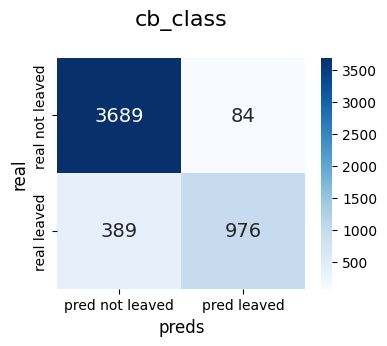

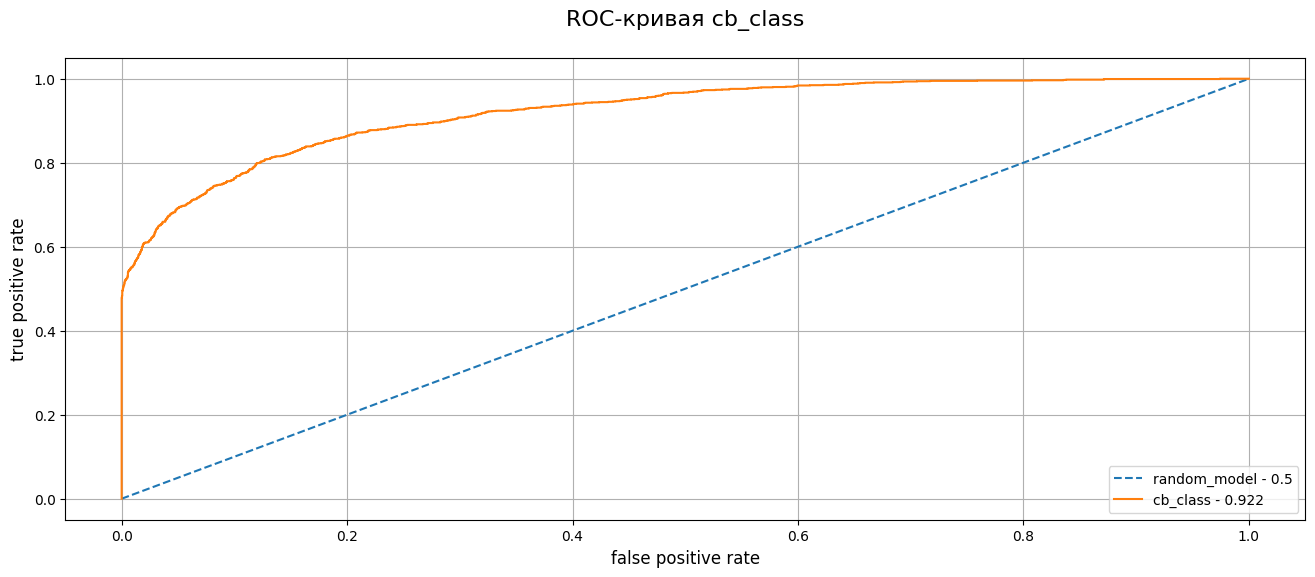

In [272]:
train_model(
    Pipeline(
        steps=[
            ('model', CatBoostClassifier(cat_features=cat_cols, verbose=0))
        ]
    ),
    params_cbc, 
    X_train, 
    y_train, 
    name='cb_class', 
    save_to=results,
    single=True,
    plot_charts=True
)

>Модель продемонстрировала истинно-положительный уклон - предсказано, что абонент не разорвал контракт, и это правда.
>
>С учётом значений метрик accuracy и ROC-AUC, а также распределения значений по матрице неточностей модель продемонстрировала хорошую предсказательную способность без баланса классов.

Сохранение лучшей модели:

In [273]:
update_best_results('cb_class', best_results, results)

---

#### 3.4.8 XGBClassifier

Задание параметров модели:

In [274]:
params_xgb = {
    'model__n_estimators': range(100, 3000, 100),
    'model__max_leaves': range(0, 51),
    'model__max_depth': [-1, *range(1, 31)],
    'model__learning_rate': [0.00001, 0.0001, 0.001, 0.01, 0.1],
    'model__n_jobs': [-1],
    'model__random_state': [RANDOM_STATE],
    'model__eta': np.arange(0.1, 1, 0.1)
}

Обучение модели с отбором признаков по исследовательскому анализу:

[1/4] Searching with no balancing...
Accuracy: 88.03 %
ROC-AUC: 92.07 %
Estimated time: 0:02:16.224166

---

[2/4] Searching with standard balancing...
Pass

---

[3/4] Searching with oversampling...

| [1/3] Smote...
Accuracy: 87.33 %
ROC-AUC: 92.36 %
Estimated time: 0:02:12.067625

| [2/3] Adasyn...
Accuracy: 86.78 %
ROC-AUC: 91.19 %
Estimated time: 0:01:42.353295

| [3/3] Random_os...
Accuracy: 87.58 %
ROC-AUC: 92.0 %
Estimated time: 0:01:53.392661

---

[4/4] Searching with undersampling...

| [1/7] One_ss...
Accuracy: 80.38 %
ROC-AUC: 63.08 %
Estimated time: 0:00:29.089953

| [2/7] Edited_nn...
Accuracy: 85.42 %
ROC-AUC: 87.01 %
Estimated time: 0:01:01.617825

| [3/7] Allknn...
Accuracy: 84.45 %
ROC-AUC: 85.02 %
Estimated time: 0:00:44.080932

| [4/7] Instance_ht...
Accuracy: 86.69 %
ROC-AUC: 90.33 %
Estimated time: 0:02:42.639623

| [5/7] Near_m...
Accuracy: 87.13 %
ROC-AUC: 90.91 %
Estimated time: 0:01:01.843788

| [6/7] Random_us...
Accuracy: 86.86 %
ROC-AUC: 89.86 %
Estimated 

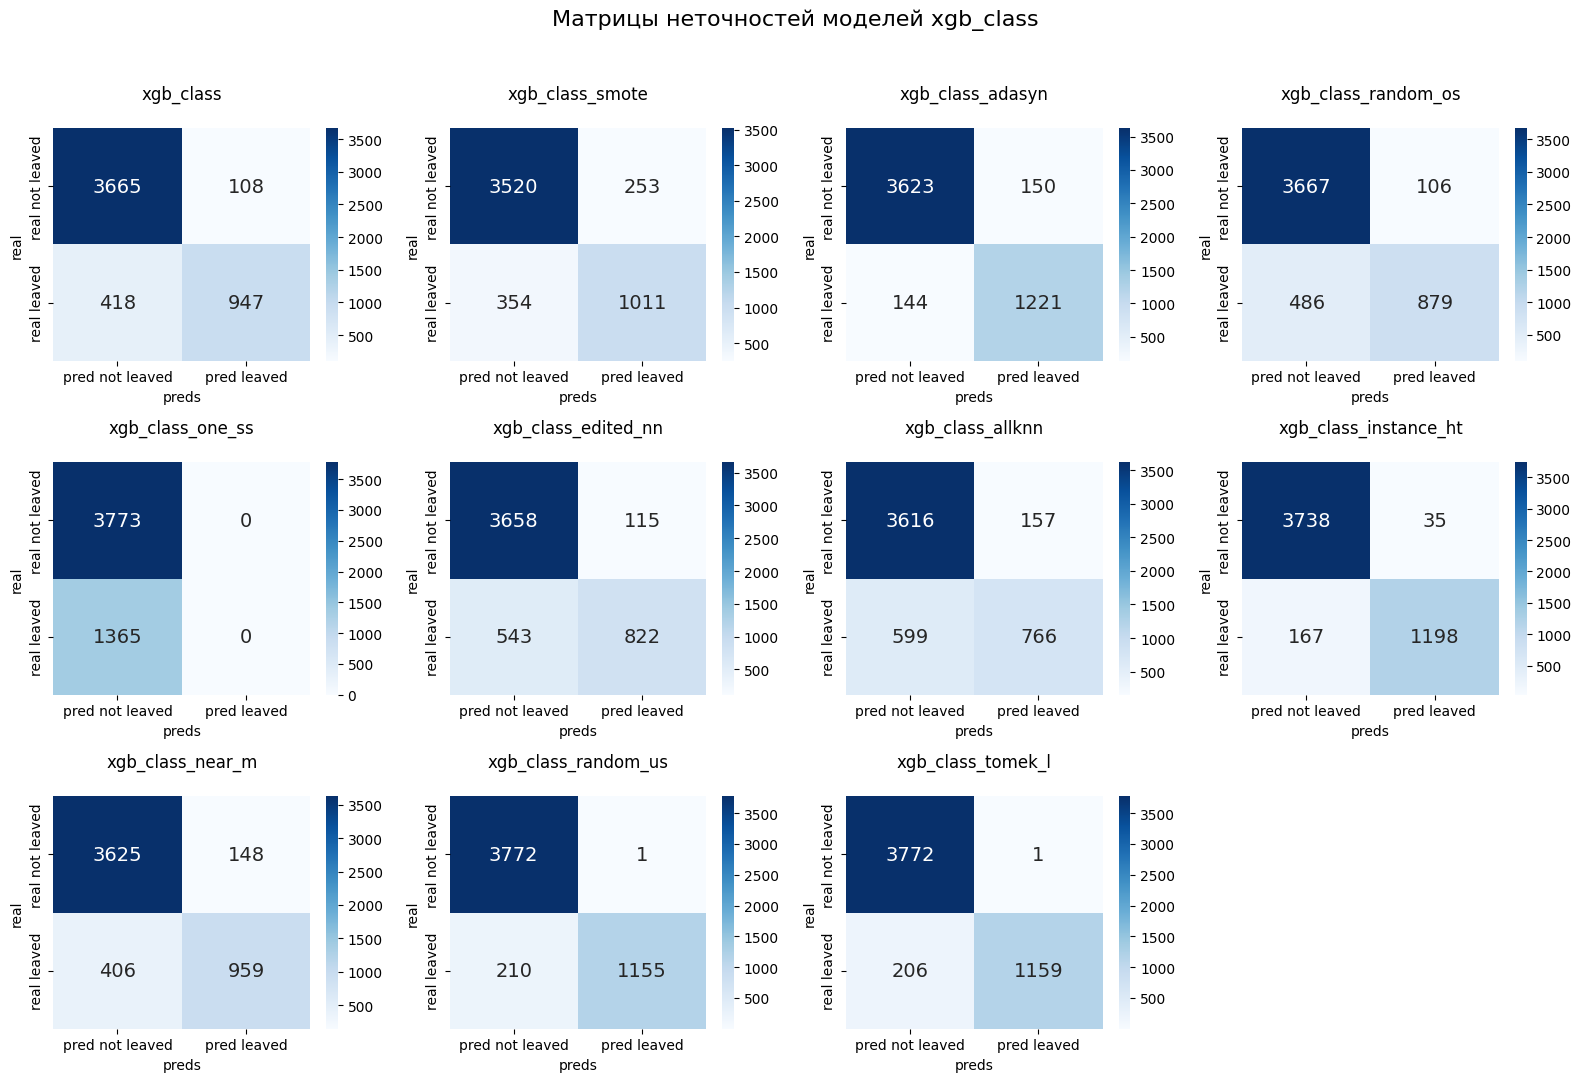

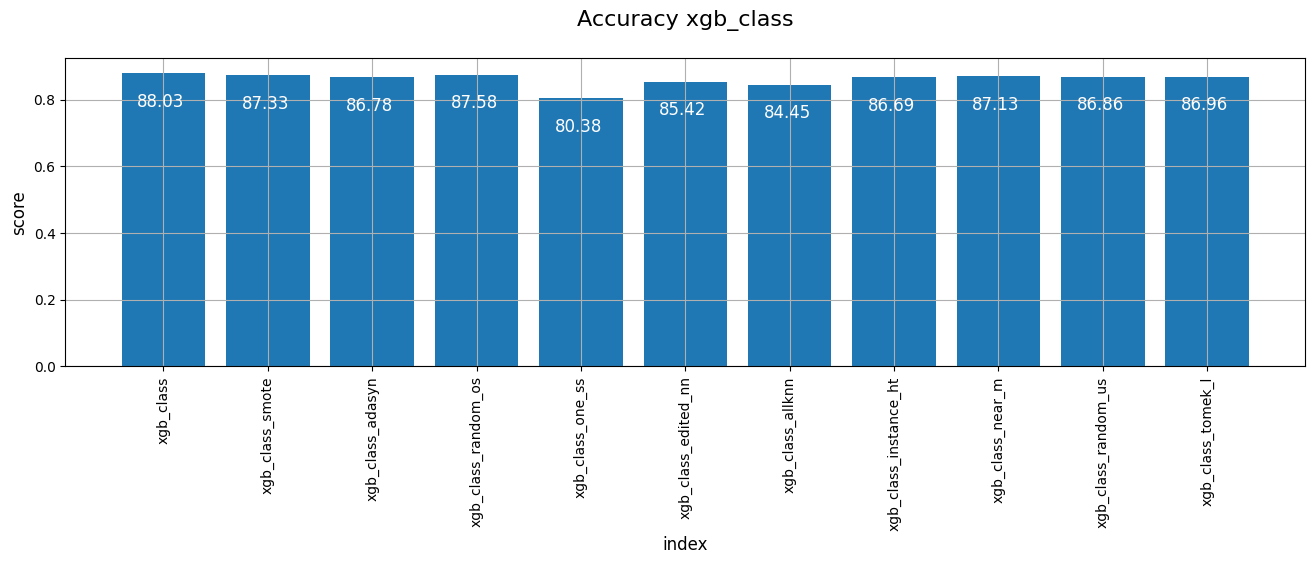

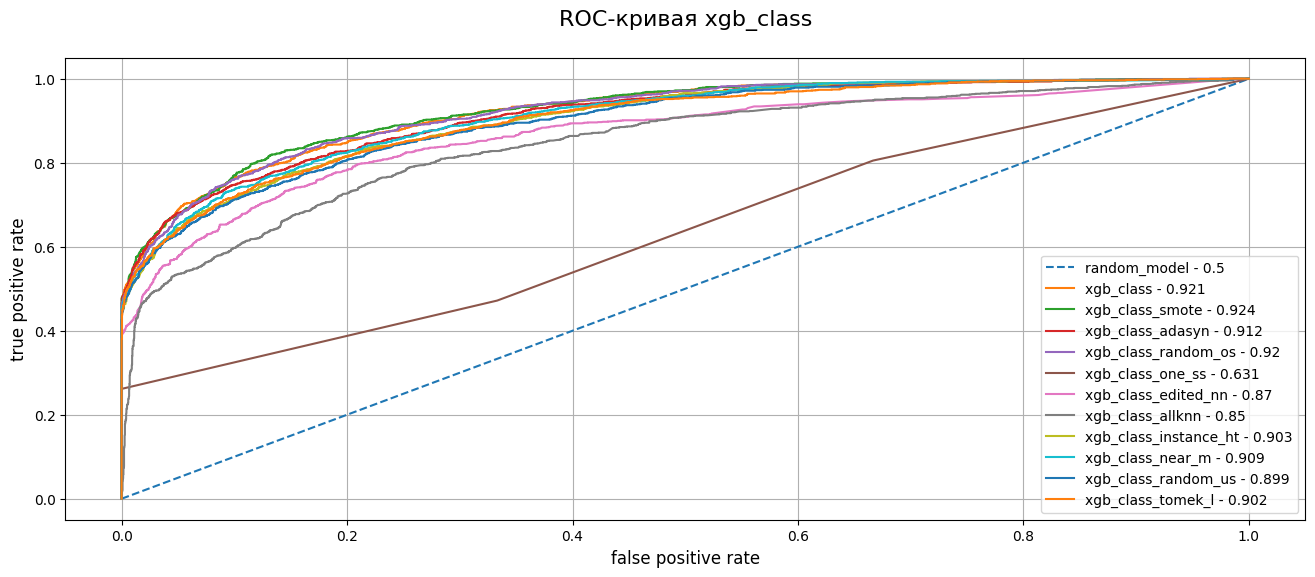

In [275]:
train_multi_models(
    XGBClassifier(), 
    params_xgb, 
    X_train, 
    y_train, 
    name='xgb_class', 
    save_to=results
)

>Все модели продемонстрировали истинно-положительный уклон - предсказано, что абонент не разорвал контракт, и это правда.
>
>С учётом значений метрик accuracy и ROC-AUC, а также распределения значений по матрице неточностей наилучшую предсказательную способность продемонстрировала модель, обученная с помощью баланса классов SMOTE.

Сохранение лучшей модели:

In [276]:
update_best_results('xgb_class_smote', best_results, results)

---

#### 3.4.9 Нейронная сеть

Задание функции, генерирующей вариации списков элементов фиксированной длины:

In [277]:
def product_values(values: list, repeat: int) -> list:
    return [list(values_set) 
            for values_set in itertools.product(values, repeat=repeat)]

---

Трансформирование признаков:

In [278]:
X_train_t = preprocessor.fit_transform(X_train)
X_test_t = preprocessor.transform(X_test)

Преобразование признаков объектов и целевых признаков тренировочной и тестовой выборок в тензоры:

In [279]:
X_train_t = torch.FloatTensor(X_train_t)
X_test_t = torch.FloatTensor(X_test_t)

y_train_t = torch.FloatTensor(y_train.values)
y_test_t = torch.FloatTensor(y_test.values)

---

Задание класса нейросети:

In [280]:
class Net(nn.Module):
    def __init__(self, 
                 activations: list = None,
                 dropouts: list = None,
                 n_in_neurons: int = X_train_t.shape[1],
                 batch_norm: bool = False) -> None:
        
        super().__init__()
        
        self.layers = []
        exponents = [1, 2, 4, 2]
        total_layers = 3
        
        for i in range(1, len(exponents) + 1):
            n_pred = n_in_neurons * exponents[i-1]
            n_next = n_in_neurons * exponents[i] if i != len(exponents) else 1
            
            # linear layer
            layer = nn.Linear(n_pred, n_next)
            self.layers.append(layer)
            
            i = i-1
            
            # batch normalization
            if batch_norm and i == 0:
                norm = nn.BatchNorm1d(n_next)
                self.layers.append(norm)
            
            if i < total_layers and (activations is not None or dropouts is not None):                
                # dropout
                if dropouts[i] is not None and i > 0:
                    drop = dropouts[i]
                    self.layers.append(drop)

                # activation function
                if activations[i] is not None:
                    act = activations[i]
                    self.layers.append(act)
        
        # output layer activation function
        self.layers.append(nn.Sigmoid())
        
        self.layers_sequence = nn.Sequential(*self.layers)
        
            
    def forward(self, x):
        x = self.layers_sequence(x)
        return x

---

Задание констант:

In [281]:
CRITERION = nn.BCELoss
OPTIMIZER = torch.optim.Adam

LEARN_R = 1e-3
N_EPOCHS = 10000
BATCH_S = 32

Задание оптимизатора процесса слежения за обучением:

In [282]:
classifier = NeuralNetClassifier(
    module=Net,
    criterion=CRITERION,
    optimizer=OPTIMIZER,
    lr=LEARN_R,
    max_epochs=N_EPOCHS,
    batch_size=BATCH_S, 
    train_split=ValidSplit(cv=0.25),
    verbose=0,
    callbacks=[
        EpochScoring(scoring=accuracy_score, name='accuracy'),
        EarlyStopping(monitor='accuracy', patience=5)
    ]
) 

Задание параметров поиска:

In [283]:
params_nn = {
    'module__activations': product_values([
        nn.ReLU(), nn.Tanh(), nn.ELU(), nn.Sigmoid(), None
    ], 3),
    'module__batch_norm': [True, False],
    'module__dropouts': product_values([
        nn.Dropout(p=0.1), 
        nn.Dropout(p=0.2), 
        nn.Dropout(p=0.3), 
        nn.Dropout(p=0.4), 
        nn.Dropout(p=0.5), 
        None
    ], 3)
}

Обучение модели с отбором признаков по исследовательскому анализу:

Searching...
Accuracy: 86.69 %
ROC-AUC: 89.42 %
Estimated time: 0:00:19.290304

---

Finished



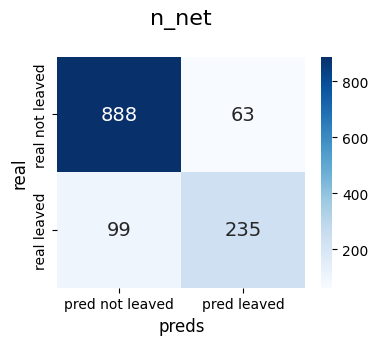

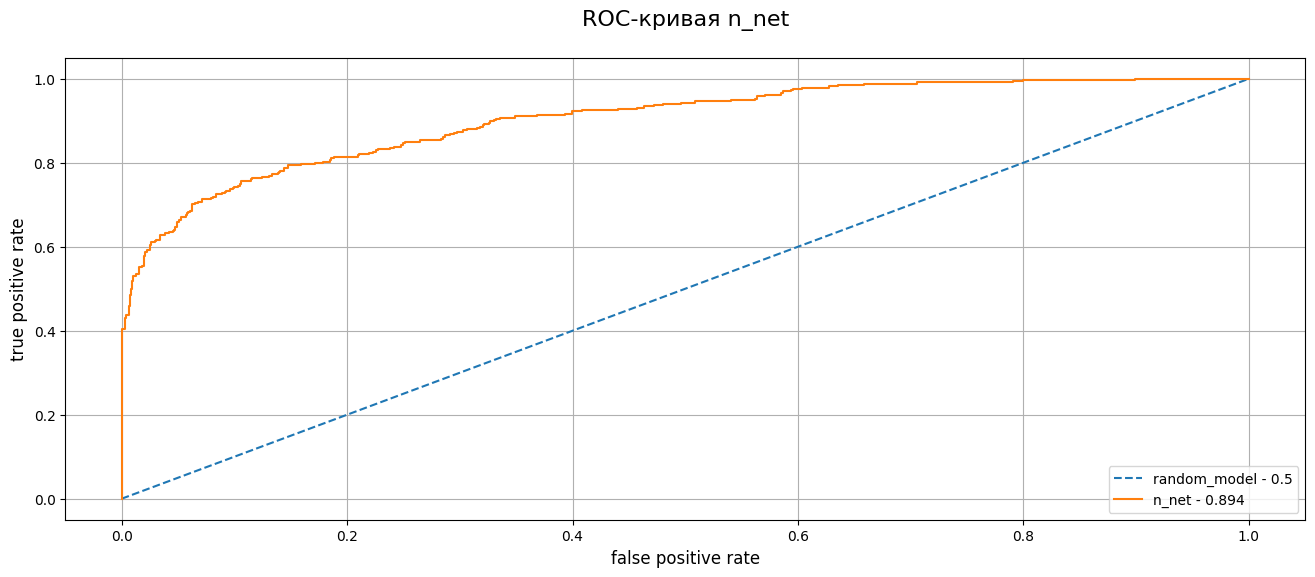

In [284]:
train_model(
    classifier, 
    params_nn, 
    X_train_t, 
    y_train_t.reshape(-1, 1), 
    name='n_net', 
    save_to=results,
    single=True,
    plot_charts=True
)

>Модель продемонстрировала истинно-положительный уклон - предсказано, что абонент не разорвал контракт, и это правда.
>
>С учётом значений метрик accuracy и ROC-AUC, а также распределения значений по матрице неточностей модель продемонстрировала хорошую предсказательную способность без баланса классов.

Сохранение лучшей модели:

In [285]:
update_best_results('n_net', best_results, results)

<div style="background-color: blue; opacity: 0.2; height: 2px; margin: 10px 0;"></div>

### 3.5 Выбор модели

Выведение на экран графика значений метрик:

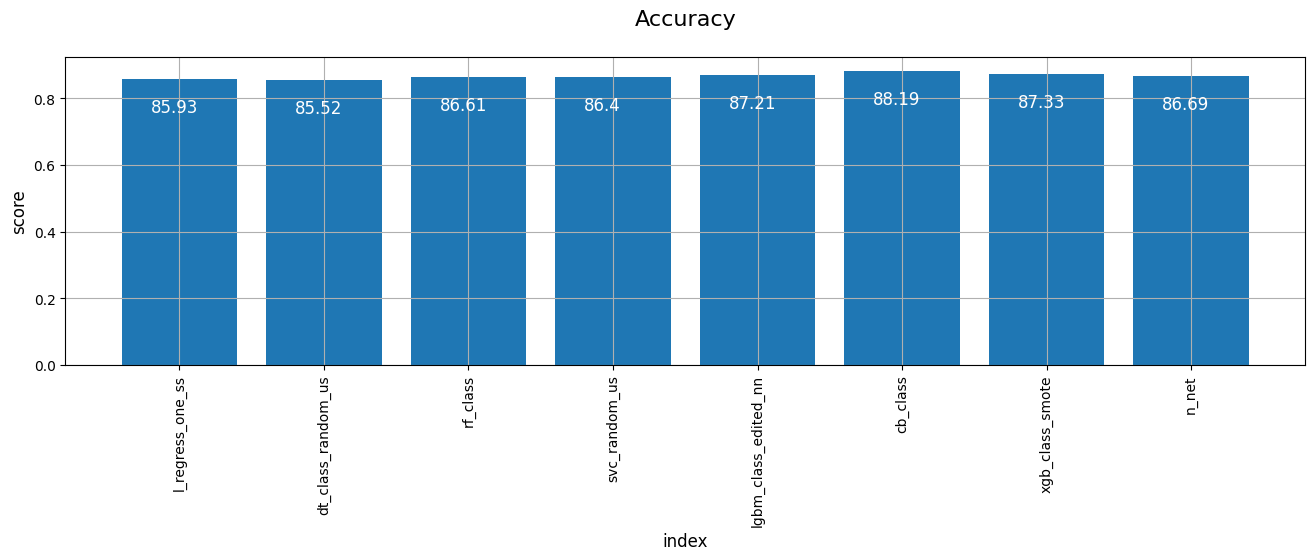

In [286]:
plot_bar(convert_to_dataframe(best_results), shift=-0.2)

Выведение на экран графика ROC-кривой:

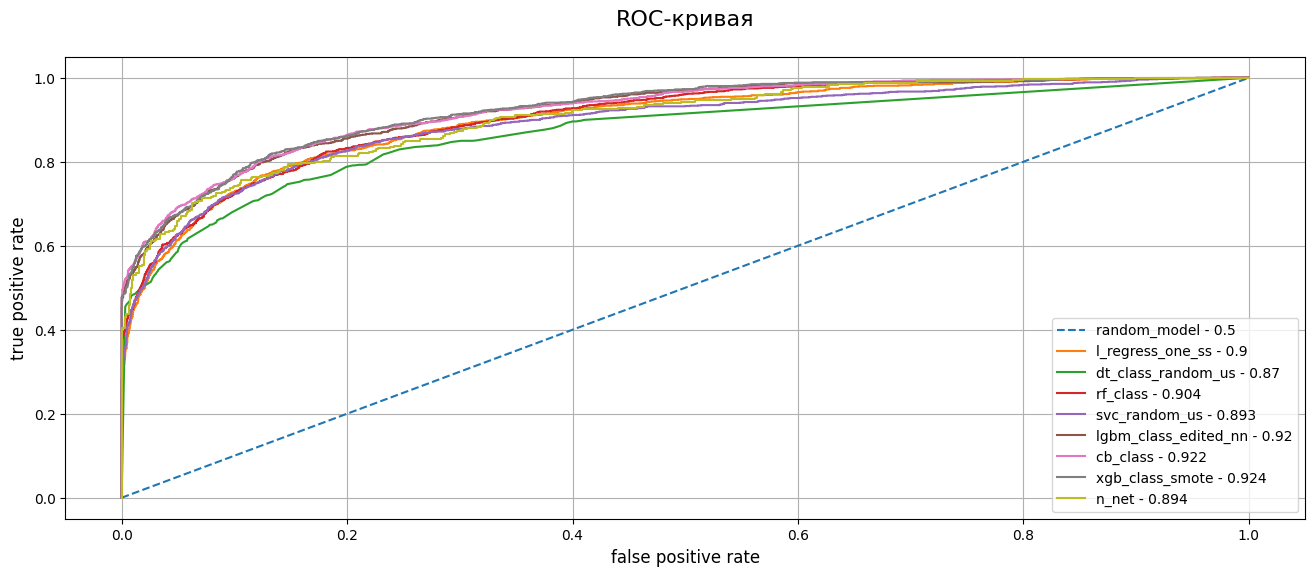

In [287]:
plot_roc_curve(best_results)

>С учётом значений метрик accuracy и ROC-AUC, а также распределения значений по матрице неточностей наилучшую предсказательную способность продемонстрировала модель CatBoostClassifier, обученная без баланса классов.

<div style="background-color: #296eaa10; border: 2px dashed #296eaa; border-radius: 5px; padding: 15px 30px">
    
**Вывод**

* В качестве эталона была выбрана модель CatBoostClassifier.

</div>

<div style="background-color: blue; height: 2px; margin: 10px 0;"></div>

## 4 Тестирование модели

Задание функции, выводящей график важности признаков:

In [288]:
def plot_importances(name: str, results: dict) -> pd.DataFrame:
    font_s = 12
    
    model = results[name]['model']
    estimator = model.named_steps['model']
    
    
    # column names
    if 'cb_class' not in name:
        columns = model.named_steps['preprocessor'].get_feature_names_out()
    
    
    col_name = ['feature_importance']
    
    # coefs
    if 'regress' in name or 'svc' in name:
        coefs = pd.DataFrame(
            estimator.coef_[0],
            columns=col_name,
            index=columns
        )
        
    elif 'gauss' in name:
        importances = np.abs(estimator.theta_[1] - estimator.theta_[0])
        
        coefs = pd.DataFrame(
            importances,
            columns=col_name,
            index=columns
        )
    
    elif 'cb_class' in name:
        coefs = pd.DataFrame(
            estimator.get_feature_importance(), 
            columns=col_name,
            index=X_train.columns
        )
        
    else:        
        coefs = pd.DataFrame(
            estimator.feature_importances_, 
            columns=col_name,     
            index=columns
        )
    
       
    coefs = coefs.sort_values(coefs.columns[0], ascending=False)
    
    coefs.plot.barh(figsize=(16, 8))
    
    plt.title(f'Важность признаков модели {name}\n', fontsize=font_s+4)
    
    plt.xlabel('importance', fontsize=font_s)
    plt.ylabel('features', fontsize=font_s)

    plt.grid()
    plt.show()
    
    
    return coefs

Задание функции построения графика точности и полноты:

In [289]:
def plot_precision_recall(model,
                          X_test: np.ndarray,
                          y_true: np.ndarray) -> None:
    
    probabs_pred = model.predict_proba(X_test)[:, 1]
    
    precision, recall, _ = precision_recall_curve(y_true, probabs_pred)
    disp = PrecisionRecallDisplay(precision=precision, recall=recall)
    disp.plot()

    plt.grid()
    plt.show()

<div style="background-color: blue; opacity: 0.2; height: 2px; margin: 10px 0;"></div>

### 4.1 Получение предсказаний

Задание имени лучшей модели:

In [290]:
model_name = 'cb_class'

Задание лучшей модели:

In [291]:
model = results[model_name]['model']

Обучение модели:

In [292]:
model.fit(X_train, y_train)

Pipeline(steps=[('model',
                 <catboost.core.CatBoostClassifier object at 0x000001C28C074B80>)])

Выведение на экран параметров модели:

In [293]:
print('Параметры модели:\n', model.get_params())

Параметры модели:
 {'memory': None, 'steps': [('model', <catboost.core.CatBoostClassifier object at 0x000001C28C074B80>)], 'verbose': False, 'model': <catboost.core.CatBoostClassifier object at 0x000001C28C074B80>, 'model__learning_rate': 0.01, 'model__verbose': 0, 'model__max_depth': 8, 'model__n_estimators': 1600, 'model__cat_features': ['type', 'payment_method', 'internet_service', 'monthly_charges_group', 'total_charges_group']}


Получение предсказаний:

In [294]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

<div style="background-color: blue; opacity: 0.2; height: 2px; margin: 10px 0;"></div>

### 4.2 Метрики

Выведение на экран значений метрик:

In [295]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print('Accuracy:', round(accuracy_score(y_test, y_pred) * 100, 2), '%')
print('ROC-AUC:', round(roc_auc_score(y_test, y_pred_proba) * 100, 2), '%')

print('\nPrecision:', round(tp / (tp + fp) * 100, 2), '%')
print('Recall:', round(tp / (tp + fn) * 100, 2), '%')

Accuracy: 88.56 %
ROC-AUC: 92.61 %

Precision: 89.09 %
Recall: 65.51 %


Выведение на экран матрицы неточностей:

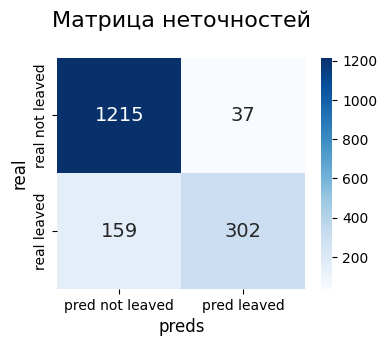

In [296]:
plot_corr_matrix(y_test, y_pred, 'Матрица неточностей')

>Значения имеют истинно-положительный уклон - предсказано, что абонент не разорвал контракт, и это правда.

Выведение на экран графика ROC-кривой:

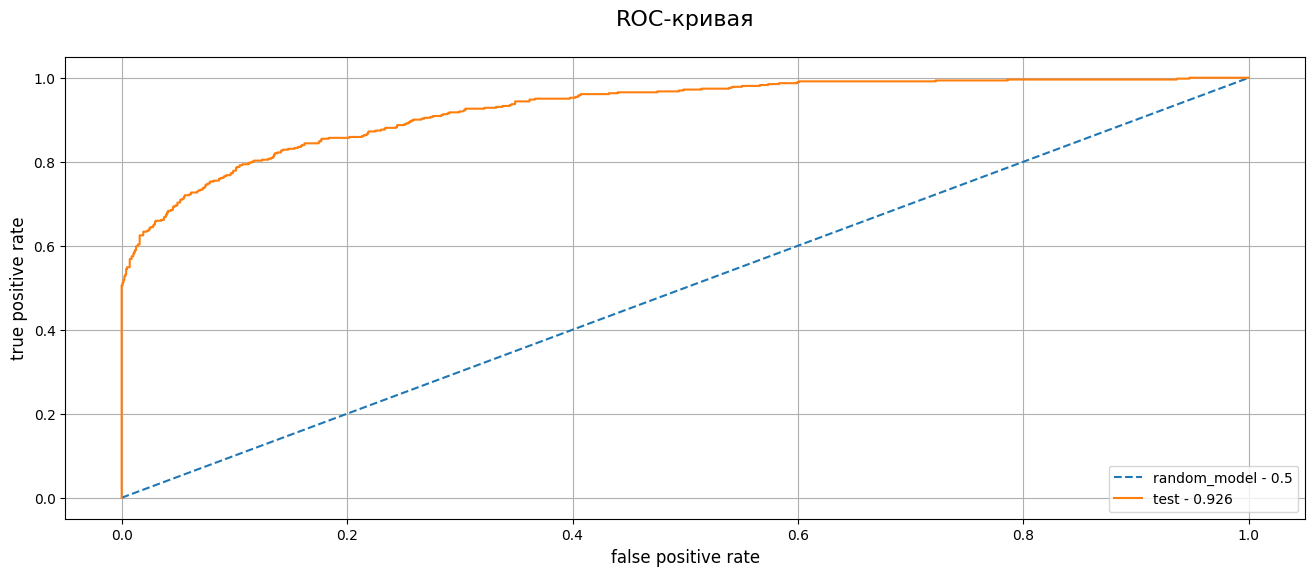

In [297]:
plot_roc_curve({
    'test': {
        'fpr_tpr_auc_roc': roc_curve(y_test, y_pred_proba),
        'roc_auc': roc_auc_score(y_test, y_pred_proba)
    }
})

>Значение метрики ROC-AUC удовлетворяет условию обучения модели - порог значения 0.85.

Выведение на экран графика полноты и точности:

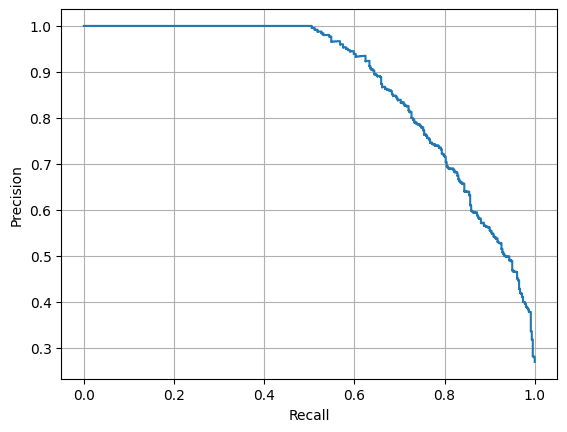

In [298]:
plot_precision_recall(model, X_test, y_test)

>Поведение точности и полноты корректно.

<div style="background-color: #296eaa10; border: 2px dashed #296eaa; border-radius: 5px; padding: 15px 30px">
    
**Вывод**

* Модель продемонстрировала хорошую предсказательную способность на тестовой выборке.

</div>

<div style="background-color: blue; opacity: 0.2; height: 2px; margin: 10px 0;"></div>

### 4.3 Важность признаков

Выведение на экран графика важности признаков:

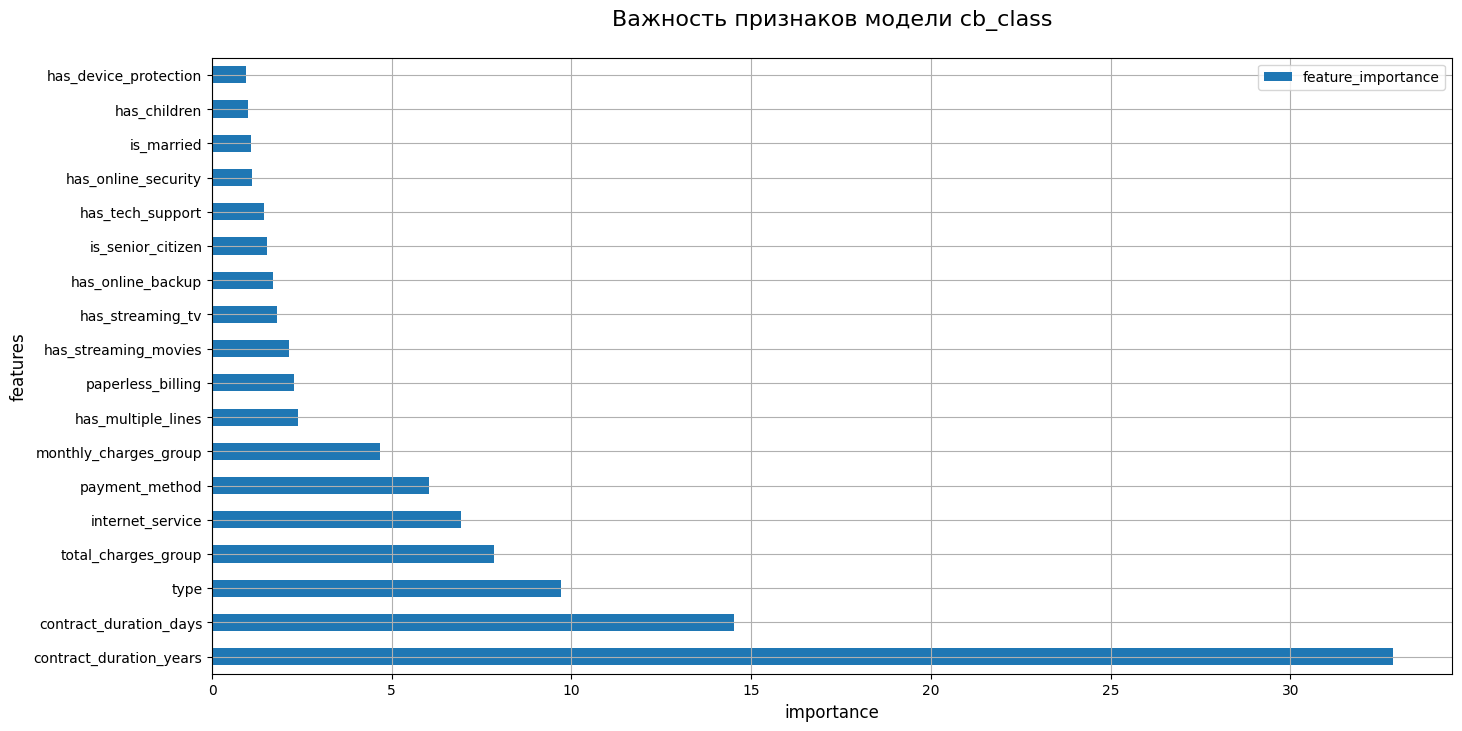

In [299]:
coefs = plot_importances(model_name, results)

>Наибольшую важность представляет собой сгенерированный признак `contract_duration_years` - разрыв контракта абонентом напрямую зависит от длительности контракта в годах.
>
>Стоит отметить, что тип оплаты и общие расходы также влияют на решение абонентов разорвать контракт.

Построение графика распределения значений целевого признака от длительности контракта в годах:

Распределение значений в столбце contract_duration_years по значениям столбца target:


contract_duration_years  count  fraction                target
1                        0    189      0.11     Разорвали договор
0                        0      0      0.00  Не разорвали договор
2                        1   1116      0.65  Не разорвали договор
3                        1    247      0.14     Разорвали договор
4                        2    136      0.08  Не разорвали договор
5                        2     25      0.01     Разорвали договор

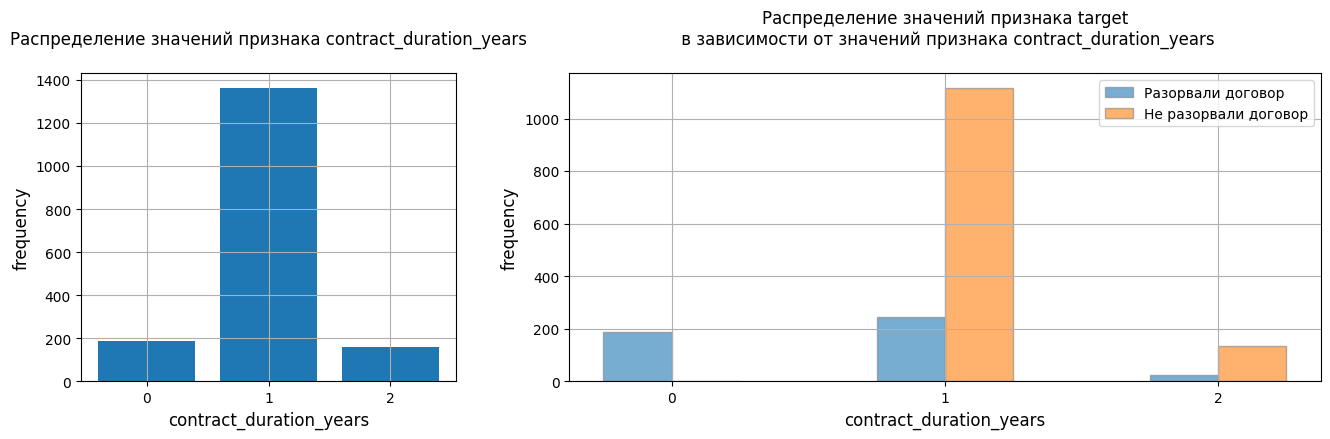

In [300]:
plot_multi_bar(
    data=X_test.join(y_test),
    col_x='contract_duration_years'
)

>Большинство разорванных договоров приходится на срок контракта до года и от года до двух лет.

Выведение на экран графика распределения значений длительности контракта в днях в зависимости от длительности контракта в годах:

С фильтром по столбцу contract_duration_years по значению 1


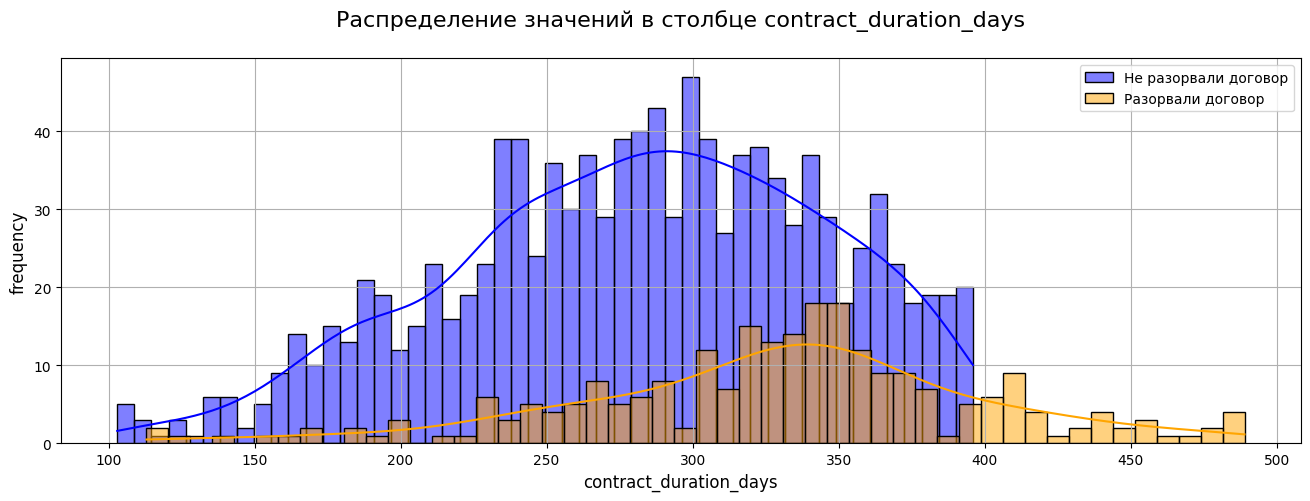


С фильтром по столбцу contract_duration_years по значению 0


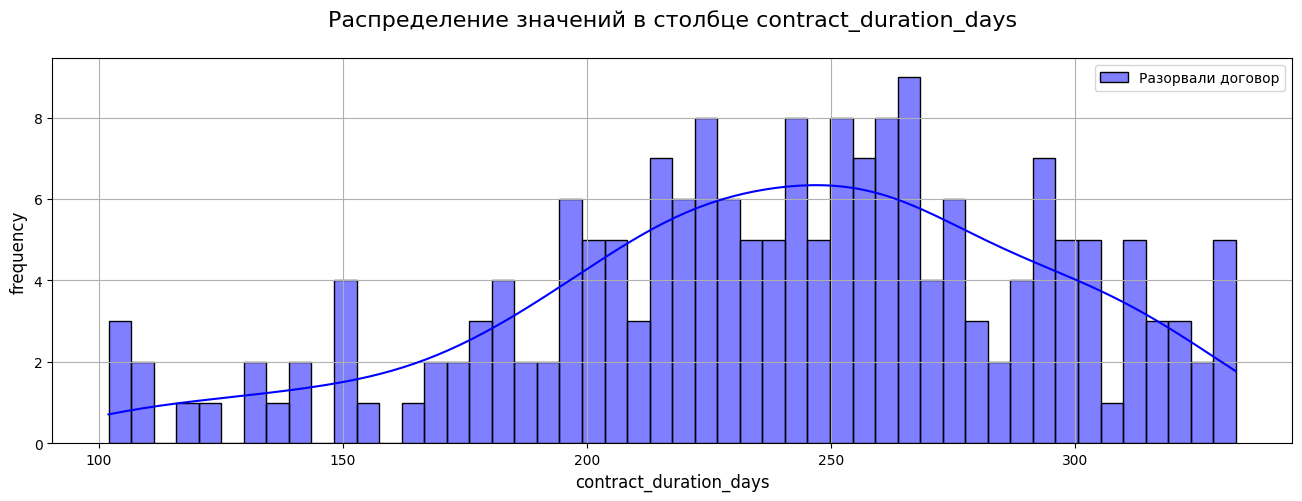


С фильтром по столбцу contract_duration_years по значению 2


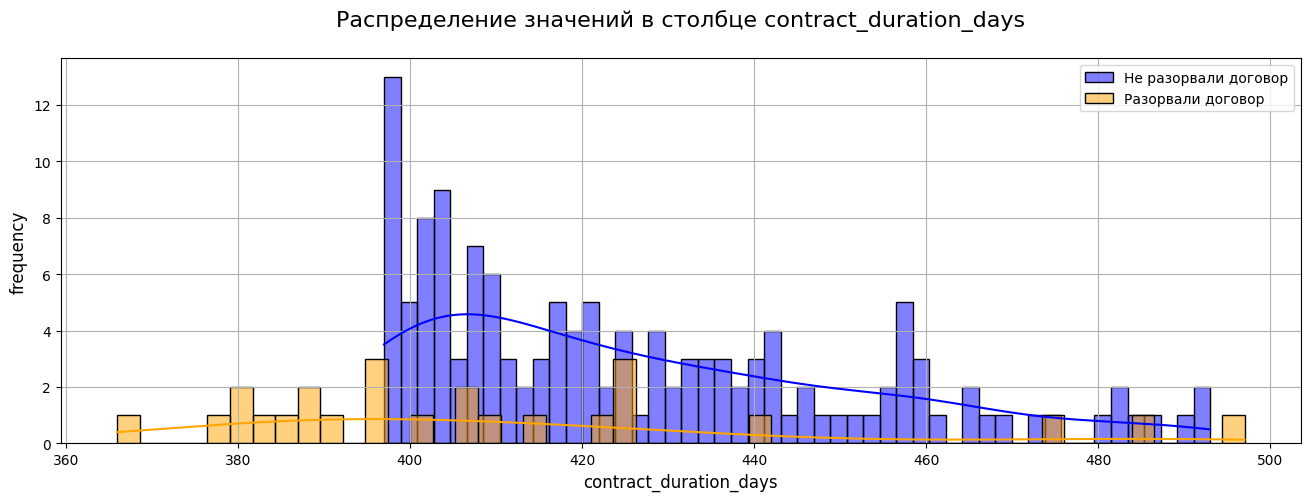

In [301]:
plot_multi_hist_filter(
    data=X_test.join(y_test),
    col_filter='contract_duration_years',
    col_x='contract_duration_days'
)

>* Абоненты склонны разрывать контракт к концу второго года со дня его заключения.
>
>* Абоненты разрывают контракты, заключённые менее года назад.
>
>* Абоненты разрывают контракты в начале третьего года со дня заключения.

Выведение на экран графика распределения значений длительности контракта в годах в зависимости от типа платежа:

Распределение значений в столбце type по значениям столбца target:


type  contract_duration_years  fraction  count  \
0   month-to-month                        0      0.00      0   
1   month-to-month                        0      0.10    165   
2   month-to-month                        1      0.28    472   
3   month-to-month                        1      0.13    226   
4   month-to-month                        2      0.04     64   
5   month-to-month                        2      0.01     20   
11        one year                        2      0.00      5   
10        one year                        2      0.02     32   
9         one year                        1      0.01     14   
8         one year                        1      0.18    301   
7         one year                        0      0.01     20   
6         one year                        0      0.00      0   
12        two year                        0      0.00      0   
13        two year                        0      0.00      4   
14        two year                        1      0.20    343   
15        two year                        1      0.00      7   
16        two year                        2      0.02     40   
17        two year                        2      0.00      0   

                  target  
0   Не разорвали договор  
1      Разорвали договор  
2   Не разорвали договор  
3      Разорвали договор  
4   Не разорвали договор  
5      Разорвали договор  
11     Разорвали договор  
10  Не разорвали договор  
9      Разорвали договор  
8   Не разорвали договор  
7      Разорвали договор  
6   Не разорвали договор  
12  Не разорвали договор  
13     Разорвали договор  
14  Не разорвали договор  
15     Разорвали договор  
16  Не разорвали договор  
17     Разорвали договор

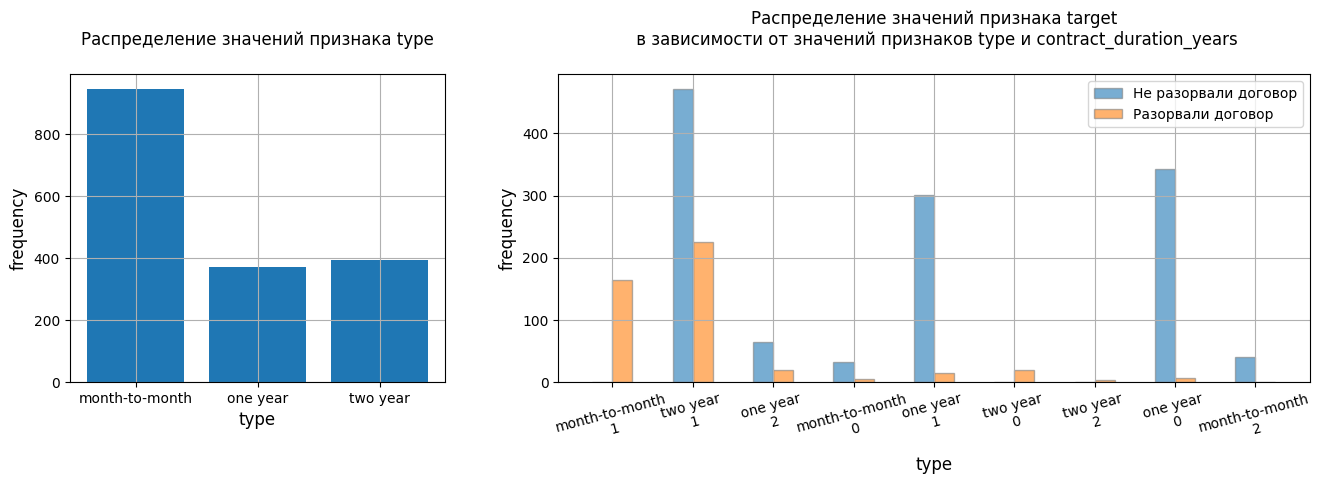

In [302]:
plot_multi_bar(
    data=X_test.join(y_test),
    col_x='type',
    col_y='contract_duration_years'
)

>Большинство абонентов разрывают контракт при платеже раз в год.

Выведение на экран графика распределения значений общих расходов в зависимости от длительности контракта в годах:

С фильтром по столбцу contract_duration_years по значению 1


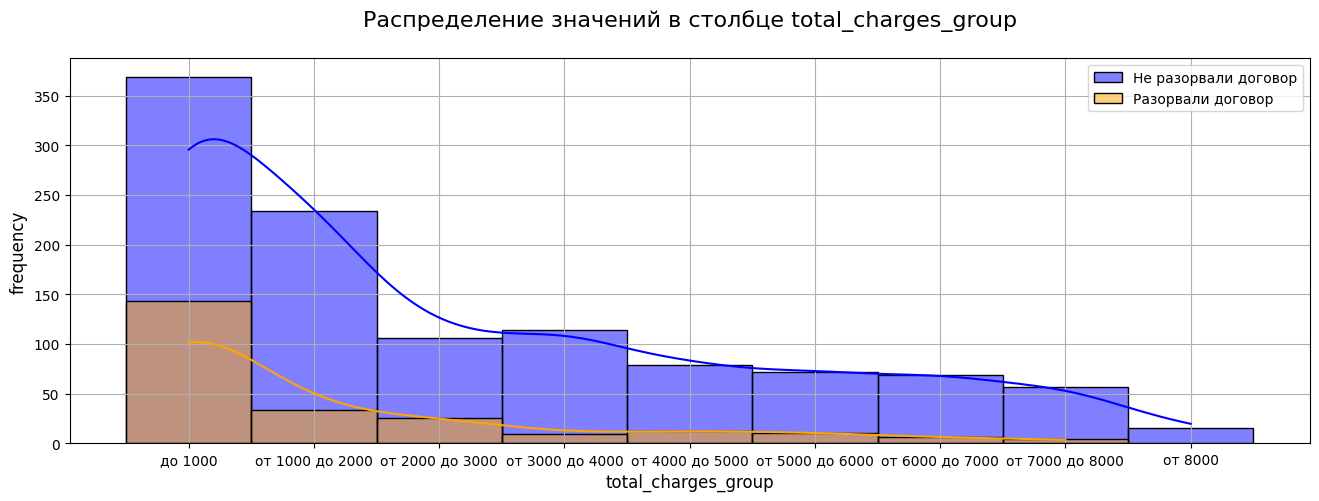


С фильтром по столбцу contract_duration_years по значению 0


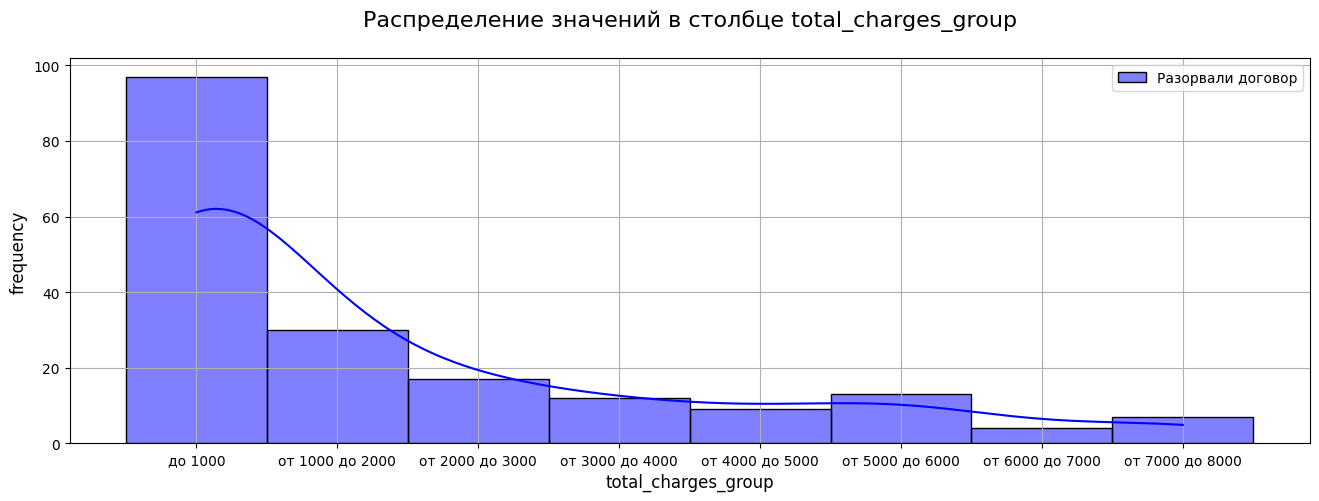


С фильтром по столбцу contract_duration_years по значению 2


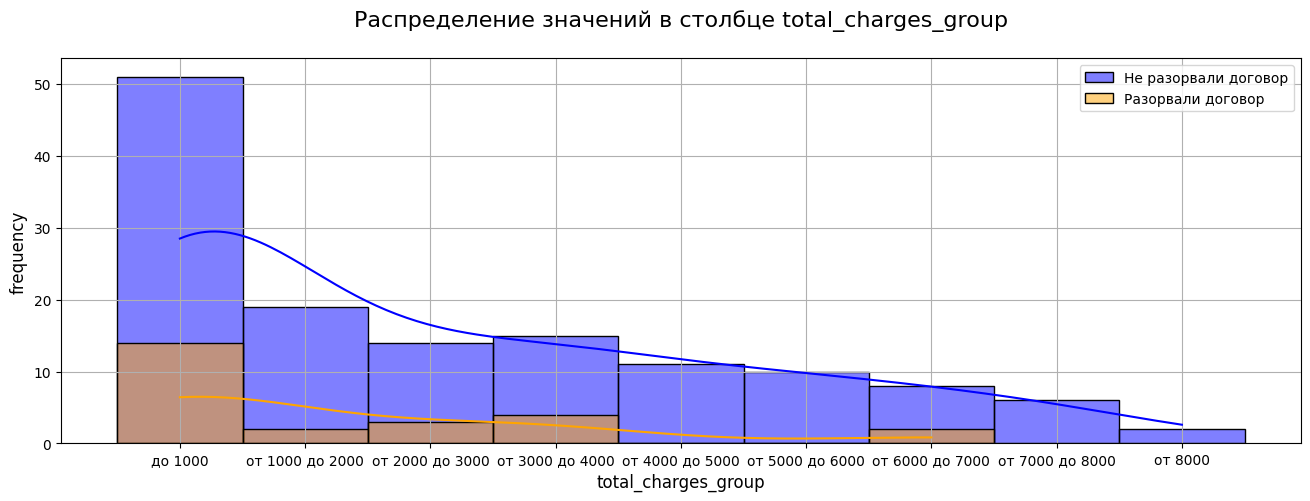

In [303]:
plot_multi_hist_filter(
    data=X_test.join(y_test),
    col_filter='contract_duration_years',
    col_x='total_charges_group'
)

>Больший отток абонентов приходится на группу клиентов с длительностью контракта год и два и общими расходами до 1000.

<div style="background-color: #296eaa10; border: 2px dashed #296eaa; border-radius: 5px; padding: 15px 30px">
    
**Вывод**

* Группа потенциально уходящих клиентов представляет собой абонентов со следующими характеристиками:
    * Контракт заключён менее года назад.
    * Подходит к концу второй год контракта с даты его заключения.
    * Идёт начало третьего года контракта.
    * Платёж осуществляется раз в год.
    * Общий платёж до 1000.

</div>

<div style="background-color: blue; opacity: 0.2; height: 2px; margin: 10px 0;"></div>

### 4.4 Вменяемость модели

Задание произвольного набора предсказаний:

In [304]:
pred_random = np.random.randint(0, 2, size=len(y_test))

Выведение на экран значения метрики:

In [305]:
print('Accuracy:', round(accuracy_score(y_test, pred_random) * 100, 2), '%')

Accuracy: 49.1 %


<div style="background-color: #296eaa10; border: 2px dashed #296eaa; border-radius: 5px; padding: 15px 30px">
    
**Вывод**

* Модель вменяема.

</div>

<div style="background-color: blue; height: 2px; margin: 10px 0;"></div>

## 5 Общий вывод

**Признаки**

В ходе проведённого исследования были обработаны и проанализированы предоставленные данные, на их основе сгенерированы новые признаки и отобраны важные признаки по результатам исследовательского анализа данных.

В важные для построения модели признаки не вошли:

* *Пол абонента* - было обнаружено, что абоненты разрывают контракты одинаково вне зависимости от пола.
* Сгенерированный признак с *продолжительностью контракта по количеству месяцев* - более информативными показали себя общее количество дней и лет с начала контракта.
* *Ежемесячные расходы* - на их основании был сгенерирован новый признак, подразделяющий абонентов на категории по расходам.
* *Общие расходы* - на их основании был сгенерирован новый признак, подразделяющий абонентов на категории по расходам.

---

**Данные**

Поскольку было обнаружено, что классы в целевом признаке несбалансированы, при обучении моделей были учтены алгоритмы, задачей которых является балансирование классов: oversampling и undersampling.

В ходе обучения на основании значений метрик **accuracy** и **ROC-AUC**, а также распределения значений по матрице неточностей были отобраны лучшие модели, обученные как на исходных, так и на сбалансированных данных. 

---

**Лучшая модель**

Лучшей среди них стала модель **CatBoostClassifier**:

* accuracy = 0.88
* ROC-AUC = 0.92 (при пороговом значении 0.85)
* Обучена на несбалансированных данных
* `n_estimators = 1600`
* `max_depth = 8`
* `learning_rate = 0.01`

Таким образом, модель выполняет поставленную перед ней задачу по предсказанию оттока абонентов.

---

**Способы дальнейшего улучшения модели**

Модель возможно улучшить за счёт:

* *Увеличения входных данных* для наиболее точного определения характеристик абонентов, которые потенциально могут разорвать договор.
* *Добавления важных признаков* (например, возраста абонента, его заработной платы, наличия работы, индивидуальных расходов по тарифам и услугам, группы расходов, особенностей и обстоятельств перехода на тариф и его выбора, наличие просроченных платежей), которые позволят точнее определить причины ухода пользователей и выработать правильную методику по их удержанию.

---

**Бизнес-рекомендации**

Группа потенциально уходящих клиентов представляет собой абонентов со следующими характеристиками:

* Контракт заключён менее года назад.
* Подходит к концу второй год контракта с даты его заключения.
* Идёт начало третьего года контракта.
* Платёж осуществляется раз в год.
* Общий платёж до 1000.

Этой группе клиентов можно предложить некоторые промокоды и специальные условия, чтобы удержать их от разрыва договора. Также можно собрать обратную связь, чтобы понять, что может не устраивать абонентов на данный момент и предложить им персональные условия.

Стоит отметить, что в силу отсутствия более детальной информации о самих абонентах и их персональном взаимодействии с тарифами, на данный момент невозможно сделать им такие предложения, которые могли бы полностью удовлетворить потребности потенциально уходящих абонентов, без обратной связи с самими клиентами.

<div style="text-align: center; font-size: 20px; padding: 15px 0;">
    <a href="#Содержание" data-toc-modified-id="Содержание" style="text-decoration: none; color: #296eaa; border: 2px dashed #296eaa; opacity: 0.8; border-radius: 3px; padding: 10px 80px;">
        В начало файла ↑
    </a>
</div>